In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from datlib.FRED import *
from datlib.plots import *

data_codes  = {"GDP": "GDP",
               "Real GDP": "GDPC1",
               "Capital Stock": "RKNANPUSA666NRUG",
               "Population": "B230RC0A052NBEA",
               "GDP Deflator": "GDPDEF"}
start = datetime.datetime(1975, 1, 1)
end = datetime.datetime.today()
data = gather_data(data_codes = data_codes, 
                   start = start, 
                   end = end, 
                   freq = "A")

In [2]:
data

GDP     Real GDP  Capital Stock  Population  GDP Deflator
DATE                                                                         
1975-12-31   1684.90500   5648.46175     24870554.0    215981.0      29.82150
1976-12-31   1873.41250   5952.80900     25504852.0    218086.0      31.46750
1977-12-31   2081.82500   6228.07650     26279792.0    220289.0      33.41850
1978-12-31   2351.59875   6572.81900     27203124.0    222629.0      35.76175
1979-12-31   2627.32625   6780.92375     28174168.0    225106.0      38.74150
1980-12-31   2857.30850   6763.51375     28983298.0    227726.0      42.24700
1981-12-31   3207.04125   6935.15325     29770398.0    230008.0      46.24400
1982-12-31   3343.78925   6810.12000     30400942.0    232218.0      49.10050
1983-12-31   3634.03650   7122.29050     31125584.0    234333.0      51.01200
1984-12-31   4037.61400   7637.70400     32101154.0    236394.0      52.85775
1985-12-31   4338.98050   7956.16950     33160380.0    238506.0      54.53150
1986-12-31   4579.63250   8231.66350     34217176.0    240683.0      55.63250
1987-12-31   4855.21625   8516.41825     35245908.0    242843.0      57.00375
1988-12-31   5236.43800   8872.15425     36263700.0    245061.0      59.01325
1989-12-31   5641.57950   9197.99750     37283484.0    247387.0      61.33125
1990-12-31   5963.14450   9371.46800     38223836.0    250181.0      63.63150
1991-12-31   6158.12925   9361.32200     38987084.0    253530.0      65.77950
1992-12-31   6520.32725   9691.06875     39793464.0    256922.0      67.27675
1993-12-31   6858.55850   9957.74625     40663208.0    260282.0      68.87275
1994-12-31   7287.23650  10358.92325     41620812.0    263455.0      70.34250
1995-12-31   7639.74925  10636.97875     42632688.0    266588.0      71.81975
1996-12-31   8073.12175  11038.26600     43758388.0    269714.0      73.13300
1997-12-31   8577.55250  11529.15700     44977188.0    272958.0      74.39475
1998-12-31   9062.81675  12045.82400     46345160.0    276154.0      75.23225
1999-12-31   9631.17175  12623.36100     47827892.0    279328.0      76.29125
2000-12-31  10250.95200  13138.03525     49368260.0    282398.0      78.02075
2001-12-31  10581.92900  13263.41700     50734816.0    285225.0      79.78200
2002-12-31  10929.10825  13488.35700     51925832.0    287955.0      81.02425
2003-12-31  11456.44950  13865.51925     53184000.0    290626.0      82.61875
2004-12-31  12217.19575  14399.69600     54572836.0    293262.0      84.83650
2005-12-31  13039.19700  14901.26900     56084488.0    295993.0      87.49850
2006-12-31  13815.58300  15315.94325     57575292.0    298818.0      90.20100
2007-12-31  14474.22700  15623.87150     58915288.0    301696.0      92.63800
2008-12-31  14769.86150  15642.96200     59981812.0    304543.0      94.42250
2009-12-31  14478.06675  15236.26225     60510768.0    307240.0      95.02275
2010-12-31  15048.97000  15648.99100     61054676.0    309774.0      96.16150
2011-12-31  15599.73175  15891.53400     61672648.0    312010.0      98.16100
2012-12-31  16253.97000  16253.97000     62435632.0    314212.0      99.99850
2013-12-31  16843.19575  16553.34750     63232928.0    316357.0     101.74750
2014-12-31  17550.68775  16932.05175     64124212.0    318631.0     103.64850
2015-12-31  18206.02350  17390.29525     65057816.0    320918.0     104.68950
2016-12-31  18695.10575  17680.27375     65974060.0    323186.0     105.73675
2017-12-31  19479.62250  18079.08400     66942704.0    325220.0     107.74175
2018-12-31  20527.15875  18606.78650     68007352.0    326949.0     110.31675
2019-12-31  21372.58225  19032.67150     69059064.0    328527.0     112.29025
2020-12-31  20893.74550  18384.68725            NaN    330152.0     113.63300
2021-12-31  22993.47100  19427.20500            NaN    331383.0     118.32925

In [3]:
# convert GDP measures from billions to millions
data["GDP"] = data["GDP"].mul(1000)
data["Real GDP"] = data["Real GDP"].mul(1000)
# convert population measures from 1000s to millions
data["Population"] = data["Population"].div(1000)
# Recenter the GDP Deflator to be 1.00 (i.e., index = 100) in 2017
data["GDP Deflator"] = data["GDP Deflator"].div(data.loc["2017"]["GDP Deflator"].values[0])
data

GDP     Real GDP  Capital Stock  Population  GDP Deflator
DATE                                                                         
1975-12-31   1684905.00   5648461.75     24870554.0     215.981      0.276787
1976-12-31   1873412.50   5952809.00     25504852.0     218.086      0.292064
1977-12-31   2081825.00   6228076.50     26279792.0     220.289      0.310172
1978-12-31   2351598.75   6572819.00     27203124.0     222.629      0.331921
1979-12-31   2627326.25   6780923.75     28174168.0     225.106      0.359577
1980-12-31   2857308.50   6763513.75     28983298.0     227.726      0.392114
1981-12-31   3207041.25   6935153.25     29770398.0     230.008      0.429212
1982-12-31   3343789.25   6810120.00     30400942.0     232.218      0.455724
1983-12-31   3634036.50   7122290.50     31125584.0     234.333      0.473465
1984-12-31   4037614.00   7637704.00     32101154.0     236.394      0.490597
1985-12-31   4338980.50   7956169.50     33160380.0     238.506      0.506132
1986-12-31   4579632.50   8231663.50     34217176.0     240.683      0.516350
1987-12-31   4855216.25   8516418.25     35245908.0     242.843      0.529078
1988-12-31   5236438.00   8872154.25     36263700.0     245.061      0.547729
1989-12-31   5641579.50   9197997.50     37283484.0     247.387      0.569243
1990-12-31   5963144.50   9371468.00     38223836.0     250.181      0.590593
1991-12-31   6158129.25   9361322.00     38987084.0     253.530      0.610529
1992-12-31   6520327.25   9691068.75     39793464.0     256.922      0.624426
1993-12-31   6858558.50   9957746.25     40663208.0     260.282      0.639239
1994-12-31   7287236.50  10358923.25     41620812.0     263.455      0.652881
1995-12-31   7639749.25  10636978.75     42632688.0     266.588      0.666592
1996-12-31   8073121.75  11038266.00     43758388.0     269.714      0.678781
1997-12-31   8577552.50  11529157.00     44977188.0     272.958      0.690491
1998-12-31   9062816.75  12045824.00     46345160.0     276.154      0.698265
1999-12-31   9631171.75  12623361.00     47827892.0     279.328      0.708094
2000-12-31  10250952.00  13138035.25     49368260.0     282.398      0.724146
2001-12-31  10581929.00  13263417.00     50734816.0     285.225      0.740493
2002-12-31  10929108.25  13488357.00     51925832.0     287.955      0.752023
2003-12-31  11456449.50  13865519.25     53184000.0     290.626      0.766822
2004-12-31  12217195.75  14399696.00     54572836.0     293.262      0.787406
2005-12-31  13039197.00  14901269.00     56084488.0     295.993      0.812113
2006-12-31  13815583.00  15315943.25     57575292.0     298.818      0.837196
2007-12-31  14474227.00  15623871.50     58915288.0     301.696      0.859815
2008-12-31  14769861.50  15642962.00     59981812.0     304.543      0.876378
2009-12-31  14478066.75  15236262.25     60510768.0     307.240      0.881949
2010-12-31  15048970.00  15648991.00     61054676.0     309.774      0.892518
2011-12-31  15599731.75  15891534.00     61672648.0     312.010      0.911077
2012-12-31  16253970.00  16253970.00     62435632.0     314.212      0.928131
2013-12-31  16843195.75  16553347.50     63232928.0     316.357      0.944365
2014-12-31  17550687.75  16932051.75     64124212.0     318.631      0.962009
2015-12-31  18206023.50  17390295.25     65057816.0     320.918      0.971671
2016-12-31  18695105.75  17680273.75     65974060.0     323.186      0.981391
2017-12-31  19479622.50  18079084.00     66942704.0     325.220      1.000000
2018-12-31  20527158.75  18606786.50     68007352.0     326.949      1.023900
2019-12-31  21372582.25  19032671.50     69059064.0     328.527      1.042217
2020-12-31  20893745.50  18384687.25            NaN     330.152      1.054679
2021-12-31  22993471.00  19427205.00            NaN     331.383      1.098267

In [4]:
# y = Py / P
data["Real GDP"] = data["GDP"].div(data["GDP Deflator"])
data

GDP      Real GDP  Capital Stock  Population  GDP Deflator
DATE                                                                          
1975-12-31   1684905.00  6.087374e+06     24870554.0     215.981      0.276787
1976-12-31   1873412.50  6.414388e+06     25504852.0     218.086      0.292064
1977-12-31   2081825.00  6.711835e+06     26279792.0     220.289      0.310172
1978-12-31   2351598.75  7.084814e+06     27203124.0     222.629      0.331921
1979-12-31   2627326.25  7.306705e+06     28174168.0     225.106      0.359577
1980-12-31   2857308.50  7.286942e+06     28983298.0     227.726      0.392114
1981-12-31   3207041.25  7.471937e+06     29770398.0     230.008      0.429212
1982-12-31   3343789.25  7.337312e+06     30400942.0     232.218      0.455724
1983-12-31   3634036.50  7.675399e+06     31125584.0     234.333      0.473465
1984-12-31   4037614.00  8.230006e+06     32101154.0     236.394      0.490597
1985-12-31   4338980.50  8.572831e+06     33160380.0     238.506      0.506132
1986-12-31   4579632.50  8.869233e+06     34217176.0     240.683      0.516350
1987-12-31   4855216.25  9.176756e+06     35245908.0     242.843      0.529078
1988-12-31   5236438.00  9.560277e+06     36263700.0     245.061      0.547729
1989-12-31   5641579.50  9.910668e+06     37283484.0     247.387      0.569243
1990-12-31   5963144.50  1.009688e+07     38223836.0     250.181      0.590593
1991-12-31   6158129.25  1.008654e+07     38987084.0     253.530      0.610529
1992-12-31   6520327.25  1.044211e+07     39793464.0     256.922      0.624426
1993-12-31   6858558.50  1.072925e+07     40663208.0     260.282      0.639239
1994-12-31   7287236.50  1.116167e+07     41620812.0     263.455      0.652881
1995-12-31   7639749.25  1.146091e+07     42632688.0     266.588      0.666592
1996-12-31   8073121.75  1.189357e+07     43758388.0     269.714      0.678781
1997-12-31   8577552.50  1.242239e+07     44977188.0     272.958      0.690491
1998-12-31   9062816.75  1.297906e+07     46345160.0     276.154      0.698265
1999-12-31   9631171.75  1.360155e+07     47827892.0     279.328      0.708094
2000-12-31  10250952.00  1.415592e+07     49368260.0     282.398      0.724146
2001-12-31  10581929.00  1.429039e+07     50734816.0     285.225      0.740493
2002-12-31  10929108.25  1.453295e+07     51925832.0     287.955      0.752023
2003-12-31  11456449.50  1.494017e+07     53184000.0     290.626      0.766822
2004-12-31  12217195.75  1.551575e+07     54572836.0     293.262      0.787406
2005-12-31  13039197.00  1.605589e+07     56084488.0     295.993      0.812113
2006-12-31  13815583.00  1.650220e+07     57575292.0     298.818      0.837196
2007-12-31  14474227.00  1.683411e+07     58915288.0     301.696      0.859815
2008-12-31  14769861.50  1.685330e+07     59981812.0     304.543      0.876378
2009-12-31  14478066.75  1.641599e+07     60510768.0     307.240      0.881949
2010-12-31  15048970.00  1.686124e+07     61054676.0     309.774      0.892518
2011-12-31  15599731.75  1.712230e+07     61672648.0     312.010      0.911077
2012-12-31  16253970.00  1.751257e+07     62435632.0     314.212      0.928131
2013-12-31  16843195.75  1.783548e+07     63232928.0     316.357      0.944365
2014-12-31  17550687.75  1.824379e+07     64124212.0     318.631      0.962009
2015-12-31  18206023.50  1.873682e+07     65057816.0     320.918      0.971671
2016-12-31  18695105.75  1.904961e+07     65974060.0     323.186      0.981391
2017-12-31  19479622.50  1.947962e+07     66942704.0     325.220      1.000000
2018-12-31  20527158.75  2.004802e+07     68007352.0     326.949      1.023900
2019-12-31  21372582.25  2.050685e+07     69059064.0     328.527      1.042217
2020-12-31  20893745.50  1.981052e+07            NaN     330.152      1.054679
2021-12-31  22993471.00  2.093613e+07            NaN     331.383      1.098267

C:\Users\JLCat\GithubRepositories\Macroeconomics-Growth-and-Monetary-Equilibrium\Data Homework Assignments\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


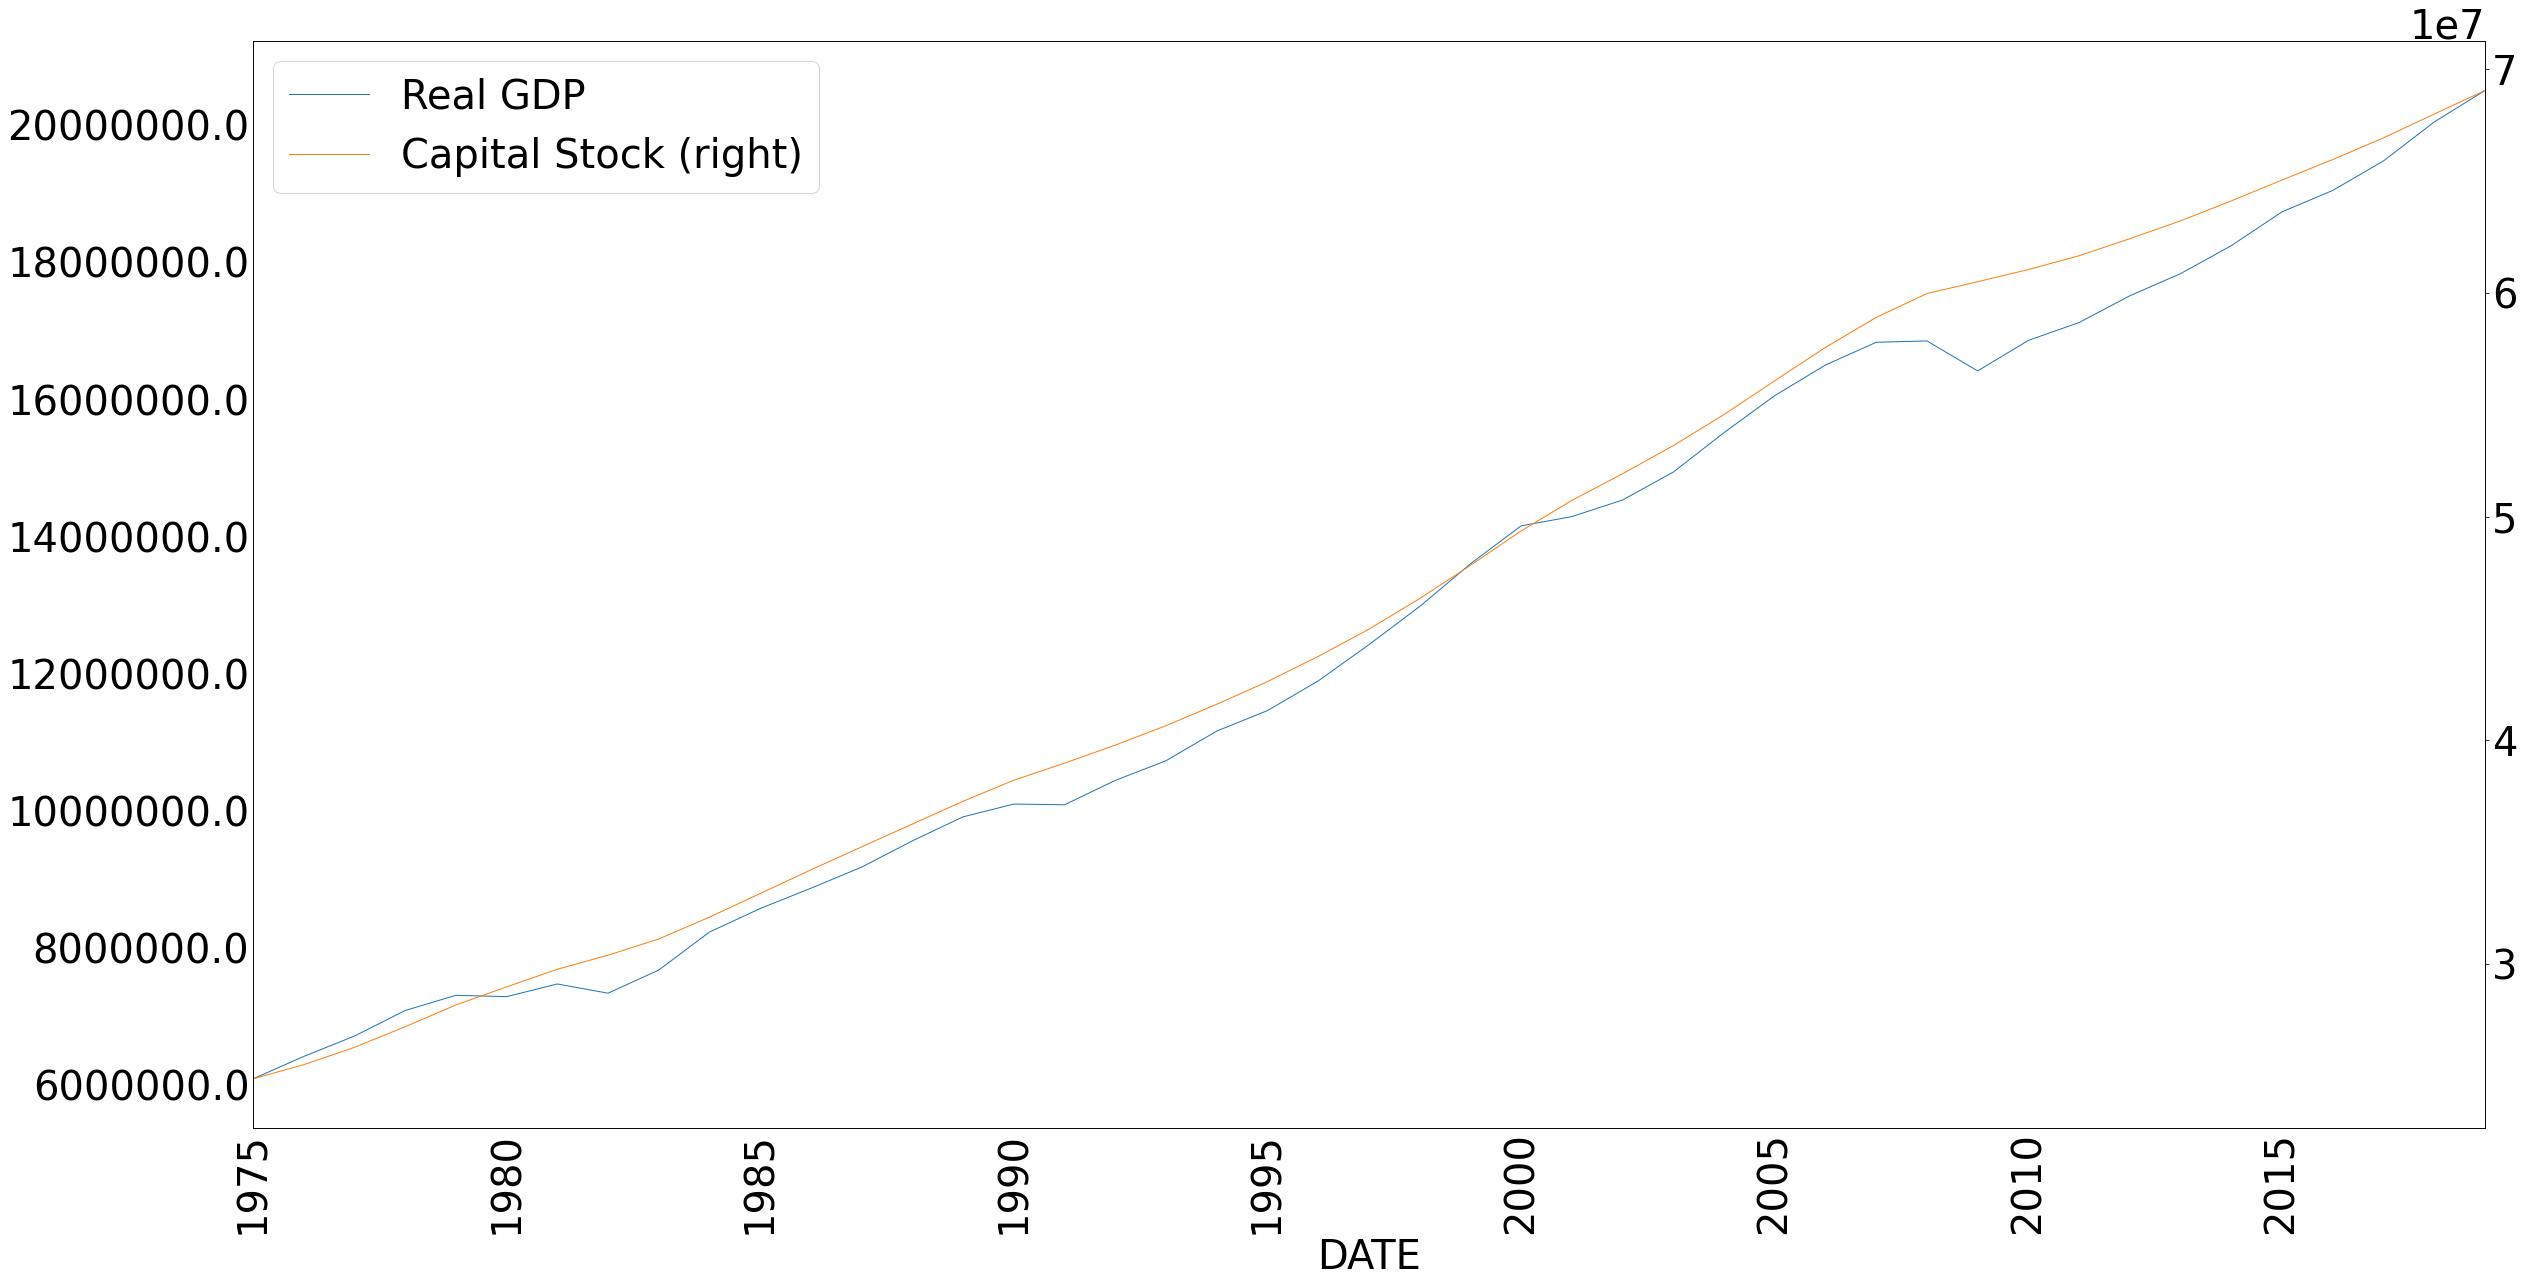

In [5]:
plt.rcParams.update({"font.size":40})
# choose our variables to plot
plot_vars = ["Real GDP", "Capital Stock"]
# create a dataframe with only the variables that I want to plot
plot_data = data[plot_vars]
# use different y-axis measures for each variable. This make it easier to compare
plot_lines(plot_data, secondary_y = ["Capital Stock"])

C:\Users\JLCat\GithubRepositories\Macroeconomics-Growth-and-Monetary-Equilibrium\Data Homework Assignments\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


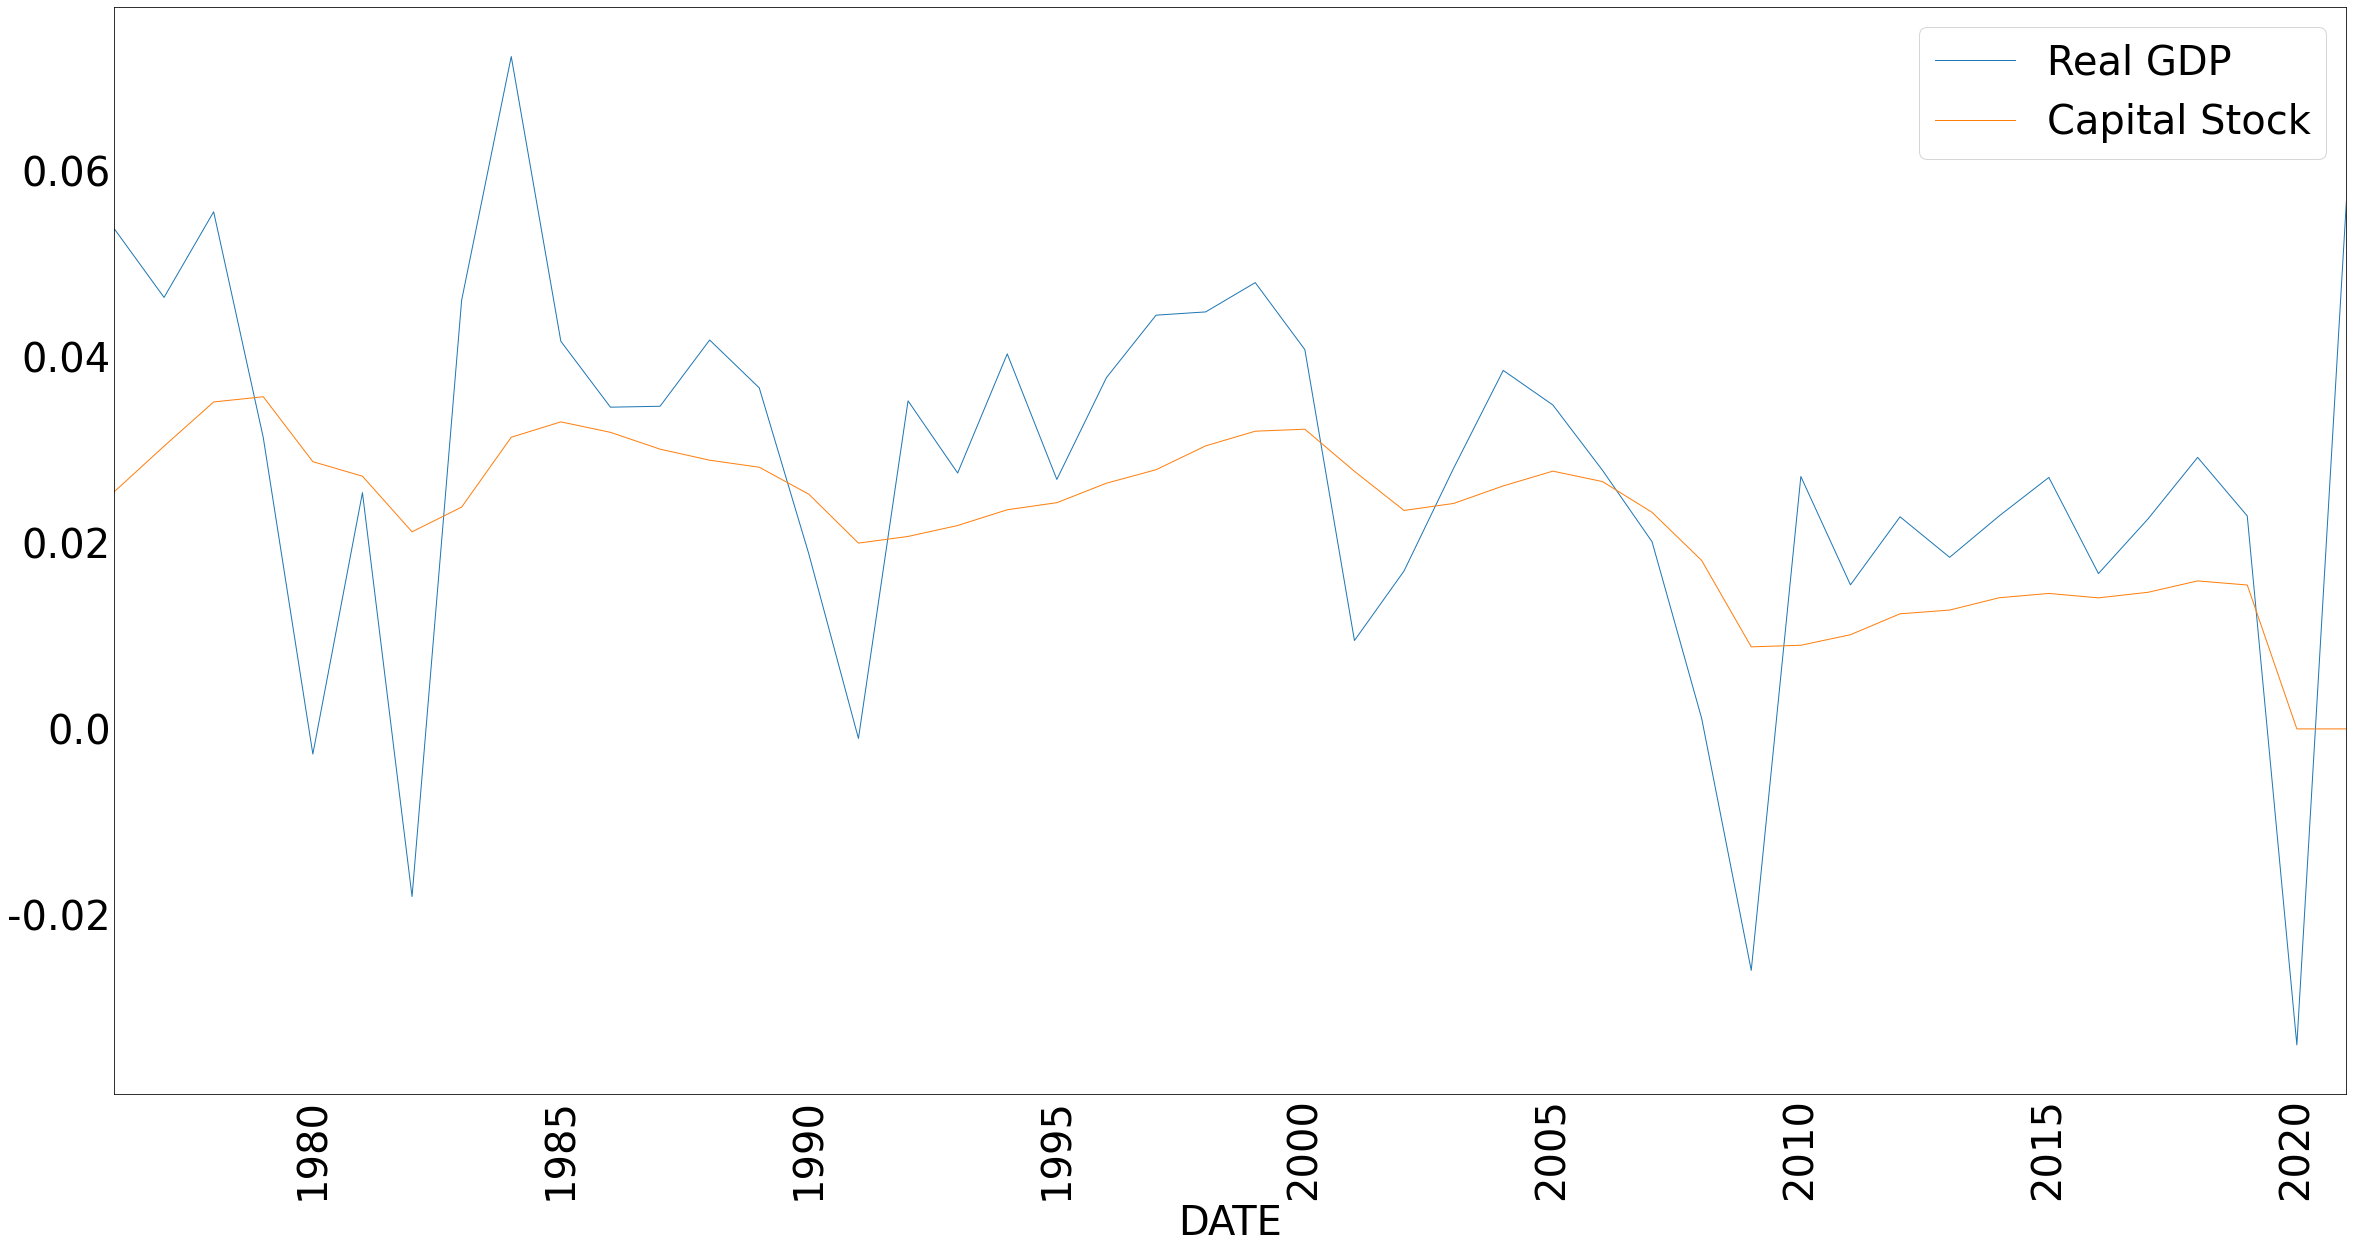

In [8]:
plt.rcParams.update({"font.size":40})
# choose our variables to plot
plot_vars = ["Real GDP", "Capital Stock"]
# create a dataframe with only the variables that I want to plot
plot_data = data[plot_vars]
# use different y-axis measures for each variable. This make it easier to compare
# plot rates of change over time
plot_lines(plot_data.pct_change())

C:\Users\JLCat\GithubRepositories\Macroeconomics-Growth-and-Monetary-Equilibrium\Data Homework Assignments\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


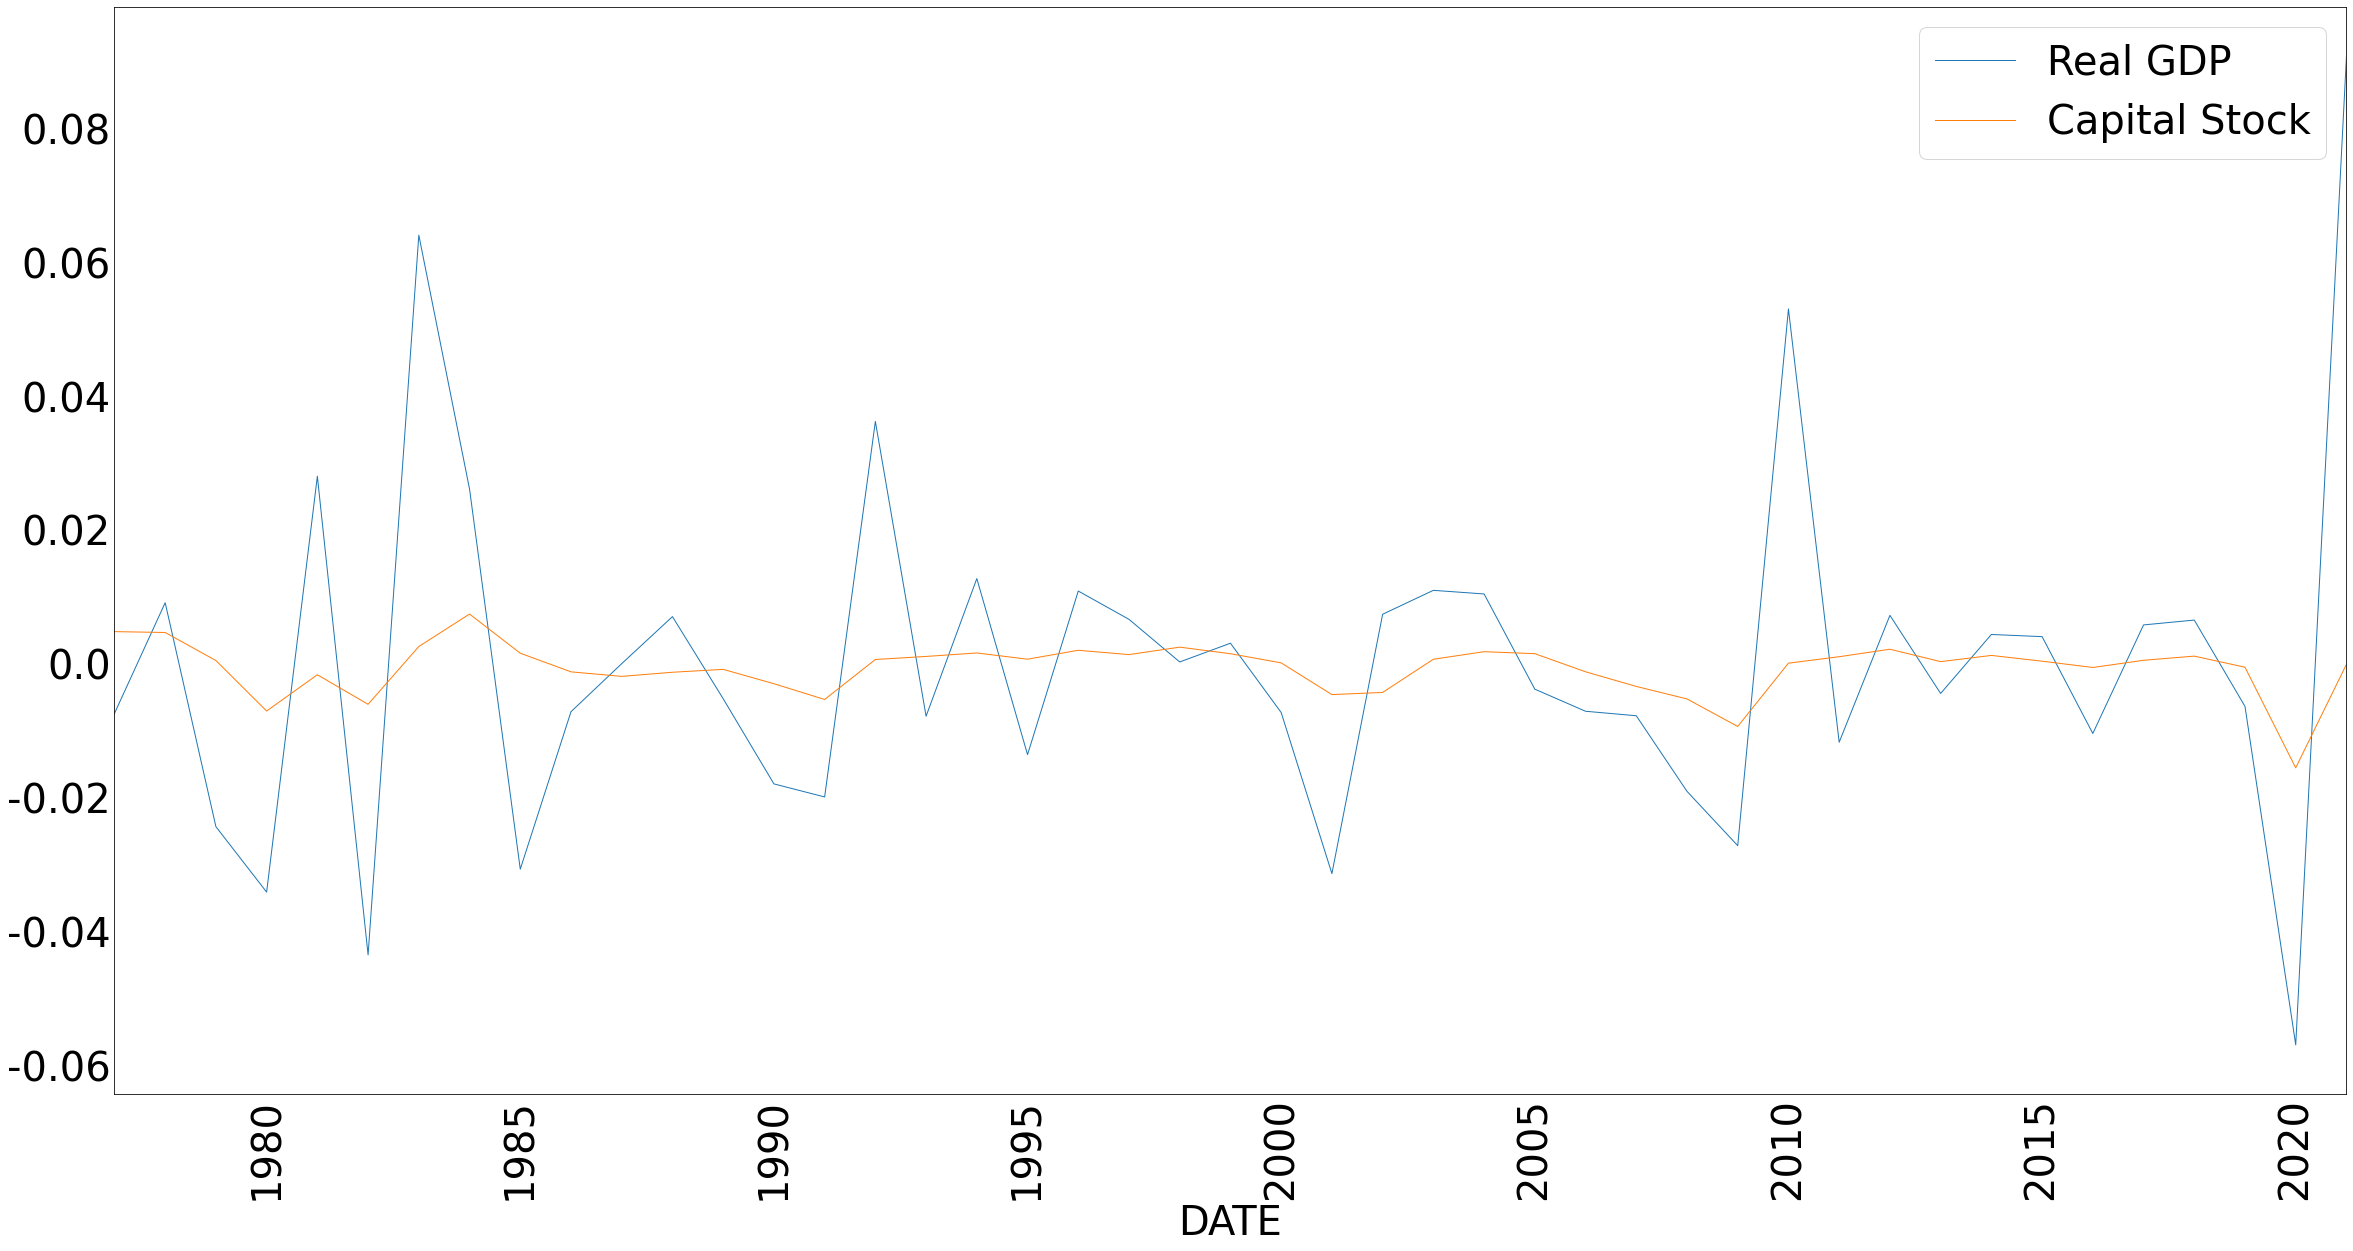

In [9]:
plt.rcParams.update({"font.size":40})
# choose our variables to plot
plot_vars = ["Real GDP", "Capital Stock"]
# create a dataframe with only the variables that I want to plot
plot_data = data[plot_vars]
# use different y-axis measures for each variable. This make it easier to compare
# plot rates of change over time
plot_lines(plot_data.pct_change().diff())

C:\Users\JLCat\GithubRepositories\Macroeconomics-Growth-and-Monetary-Equilibrium\Data Homework Assignments\datlib\plots.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = figsize)


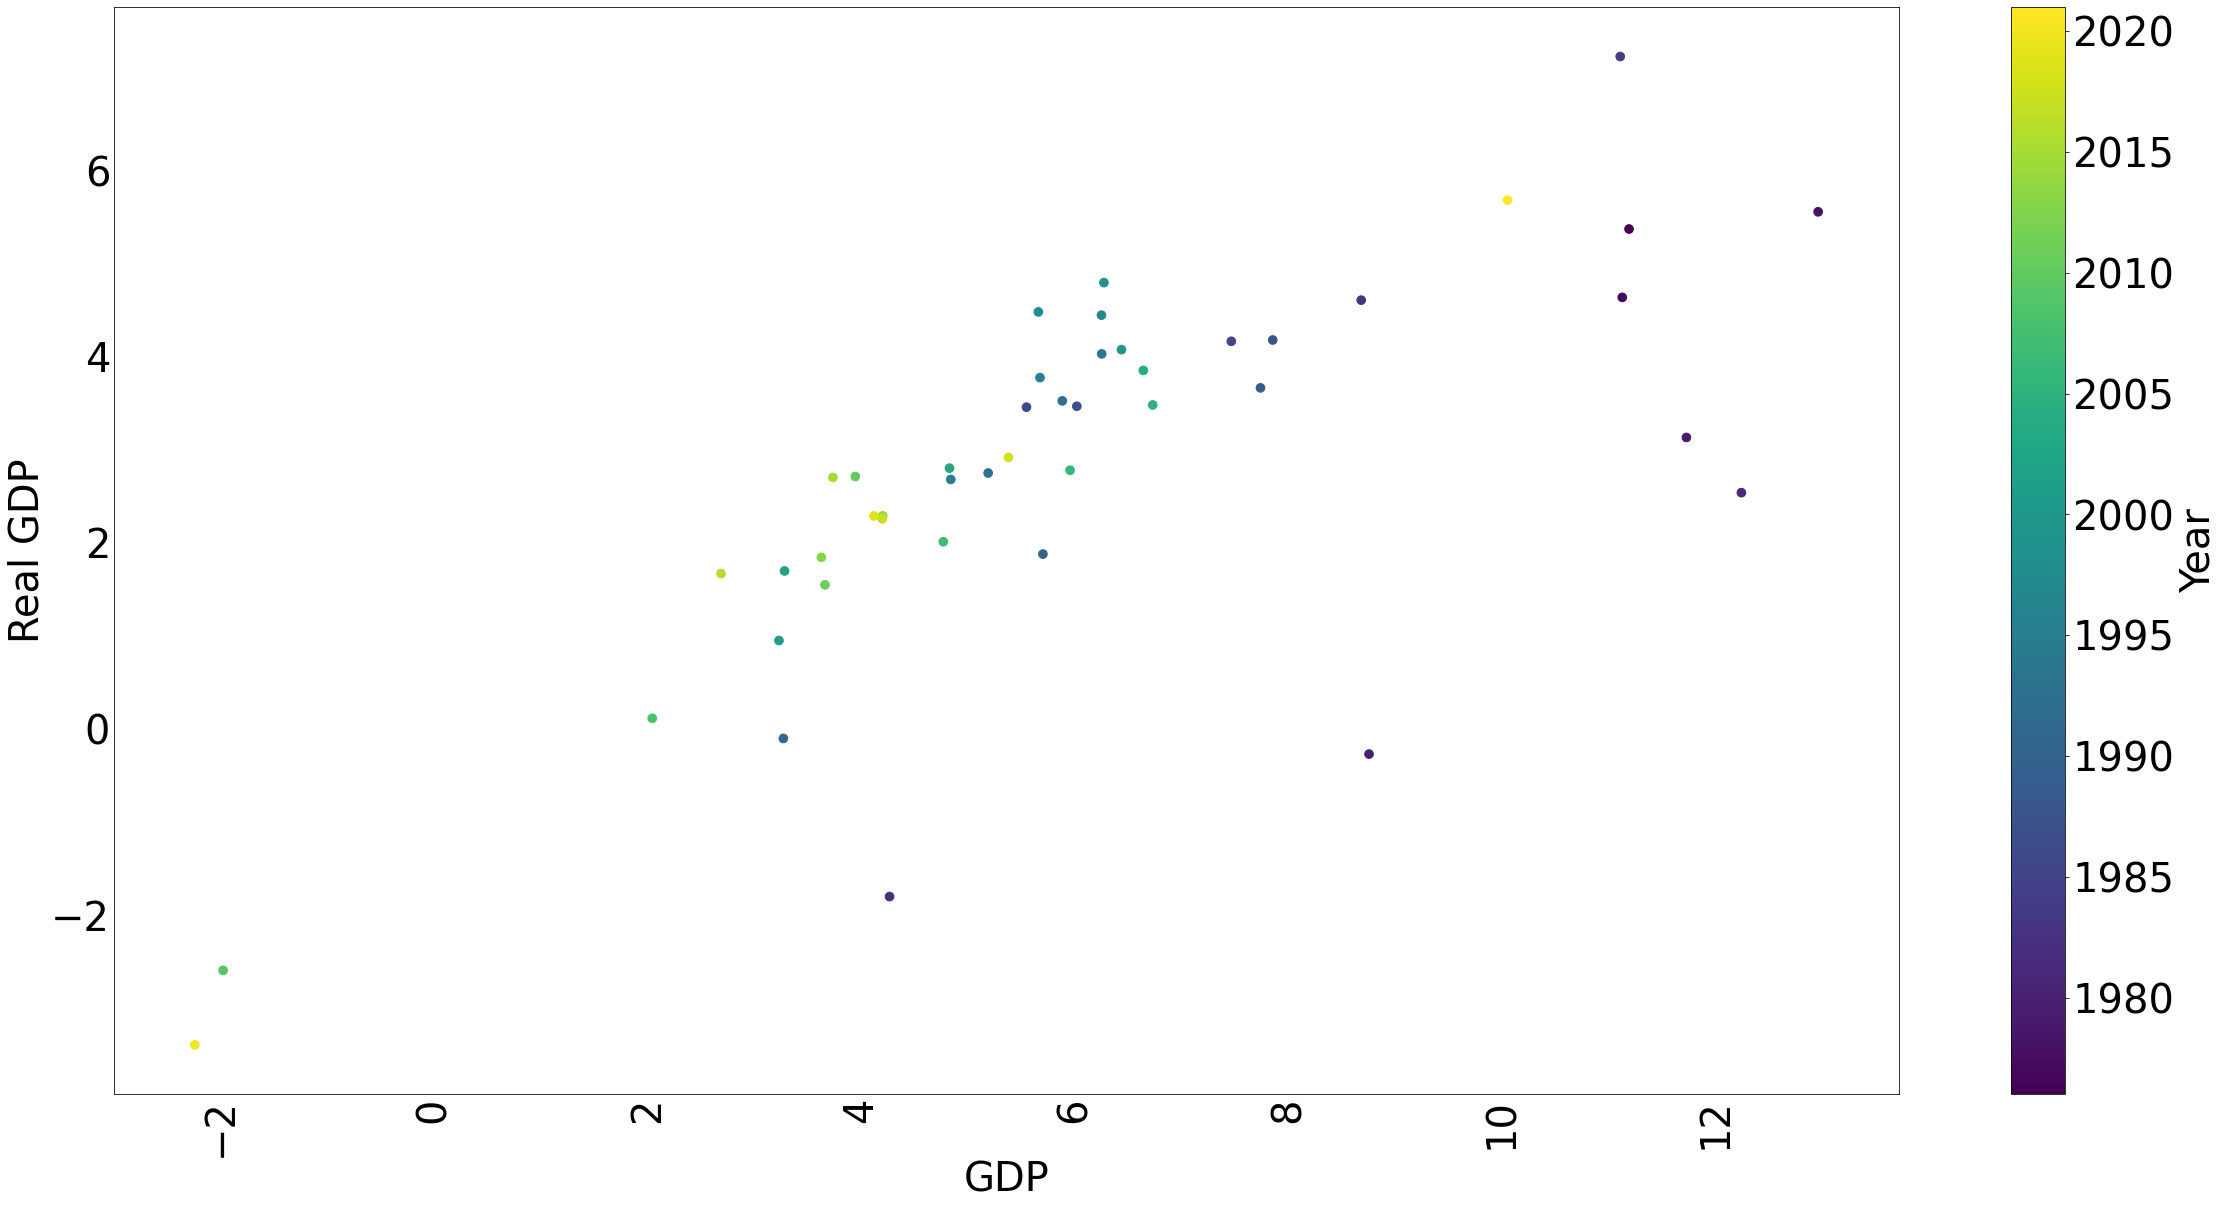

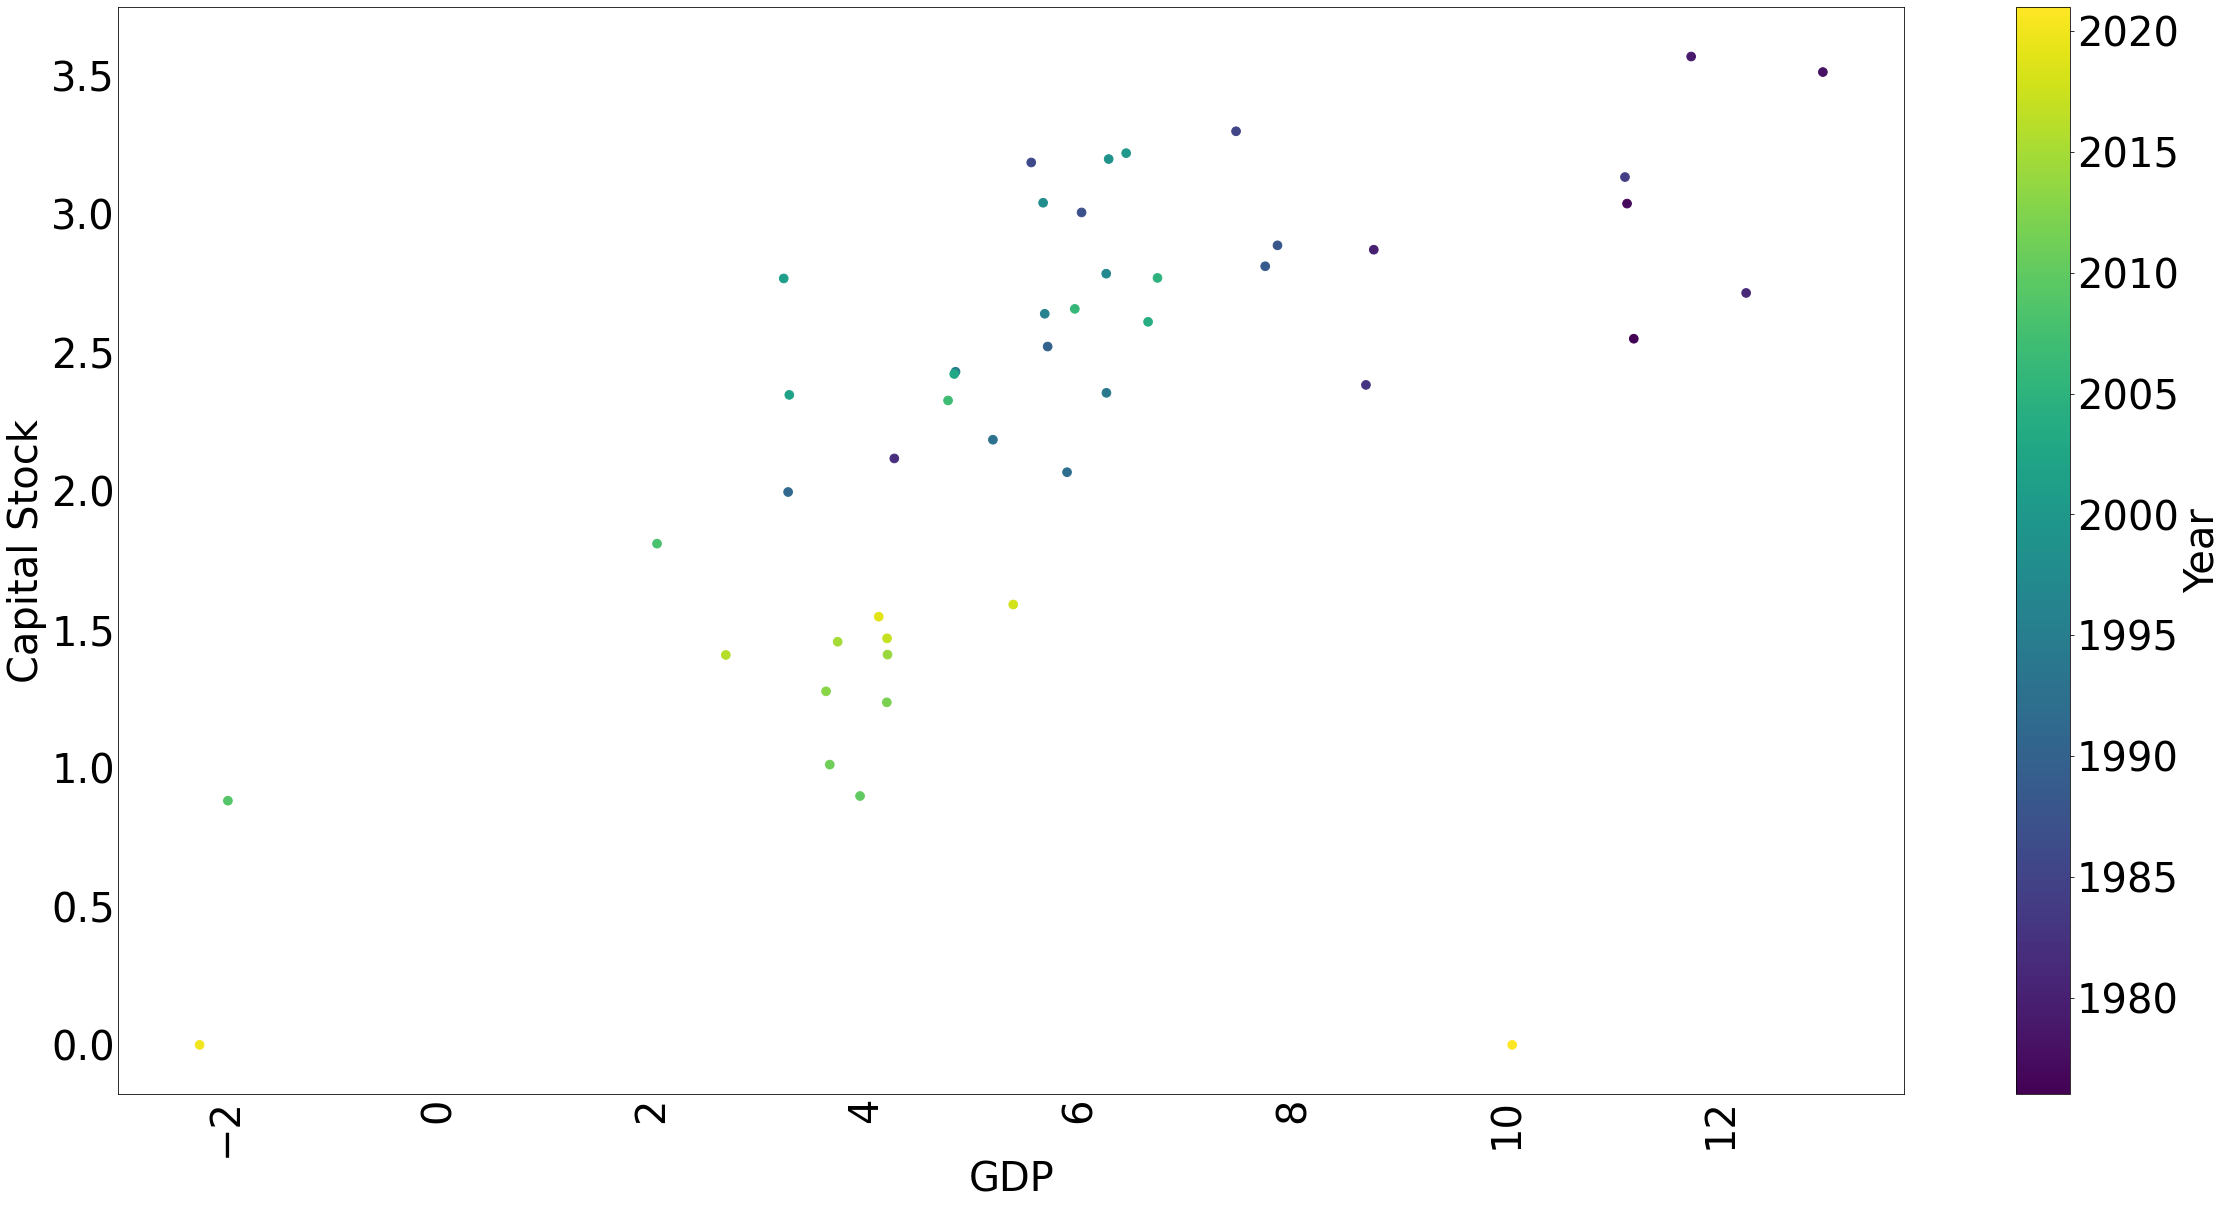

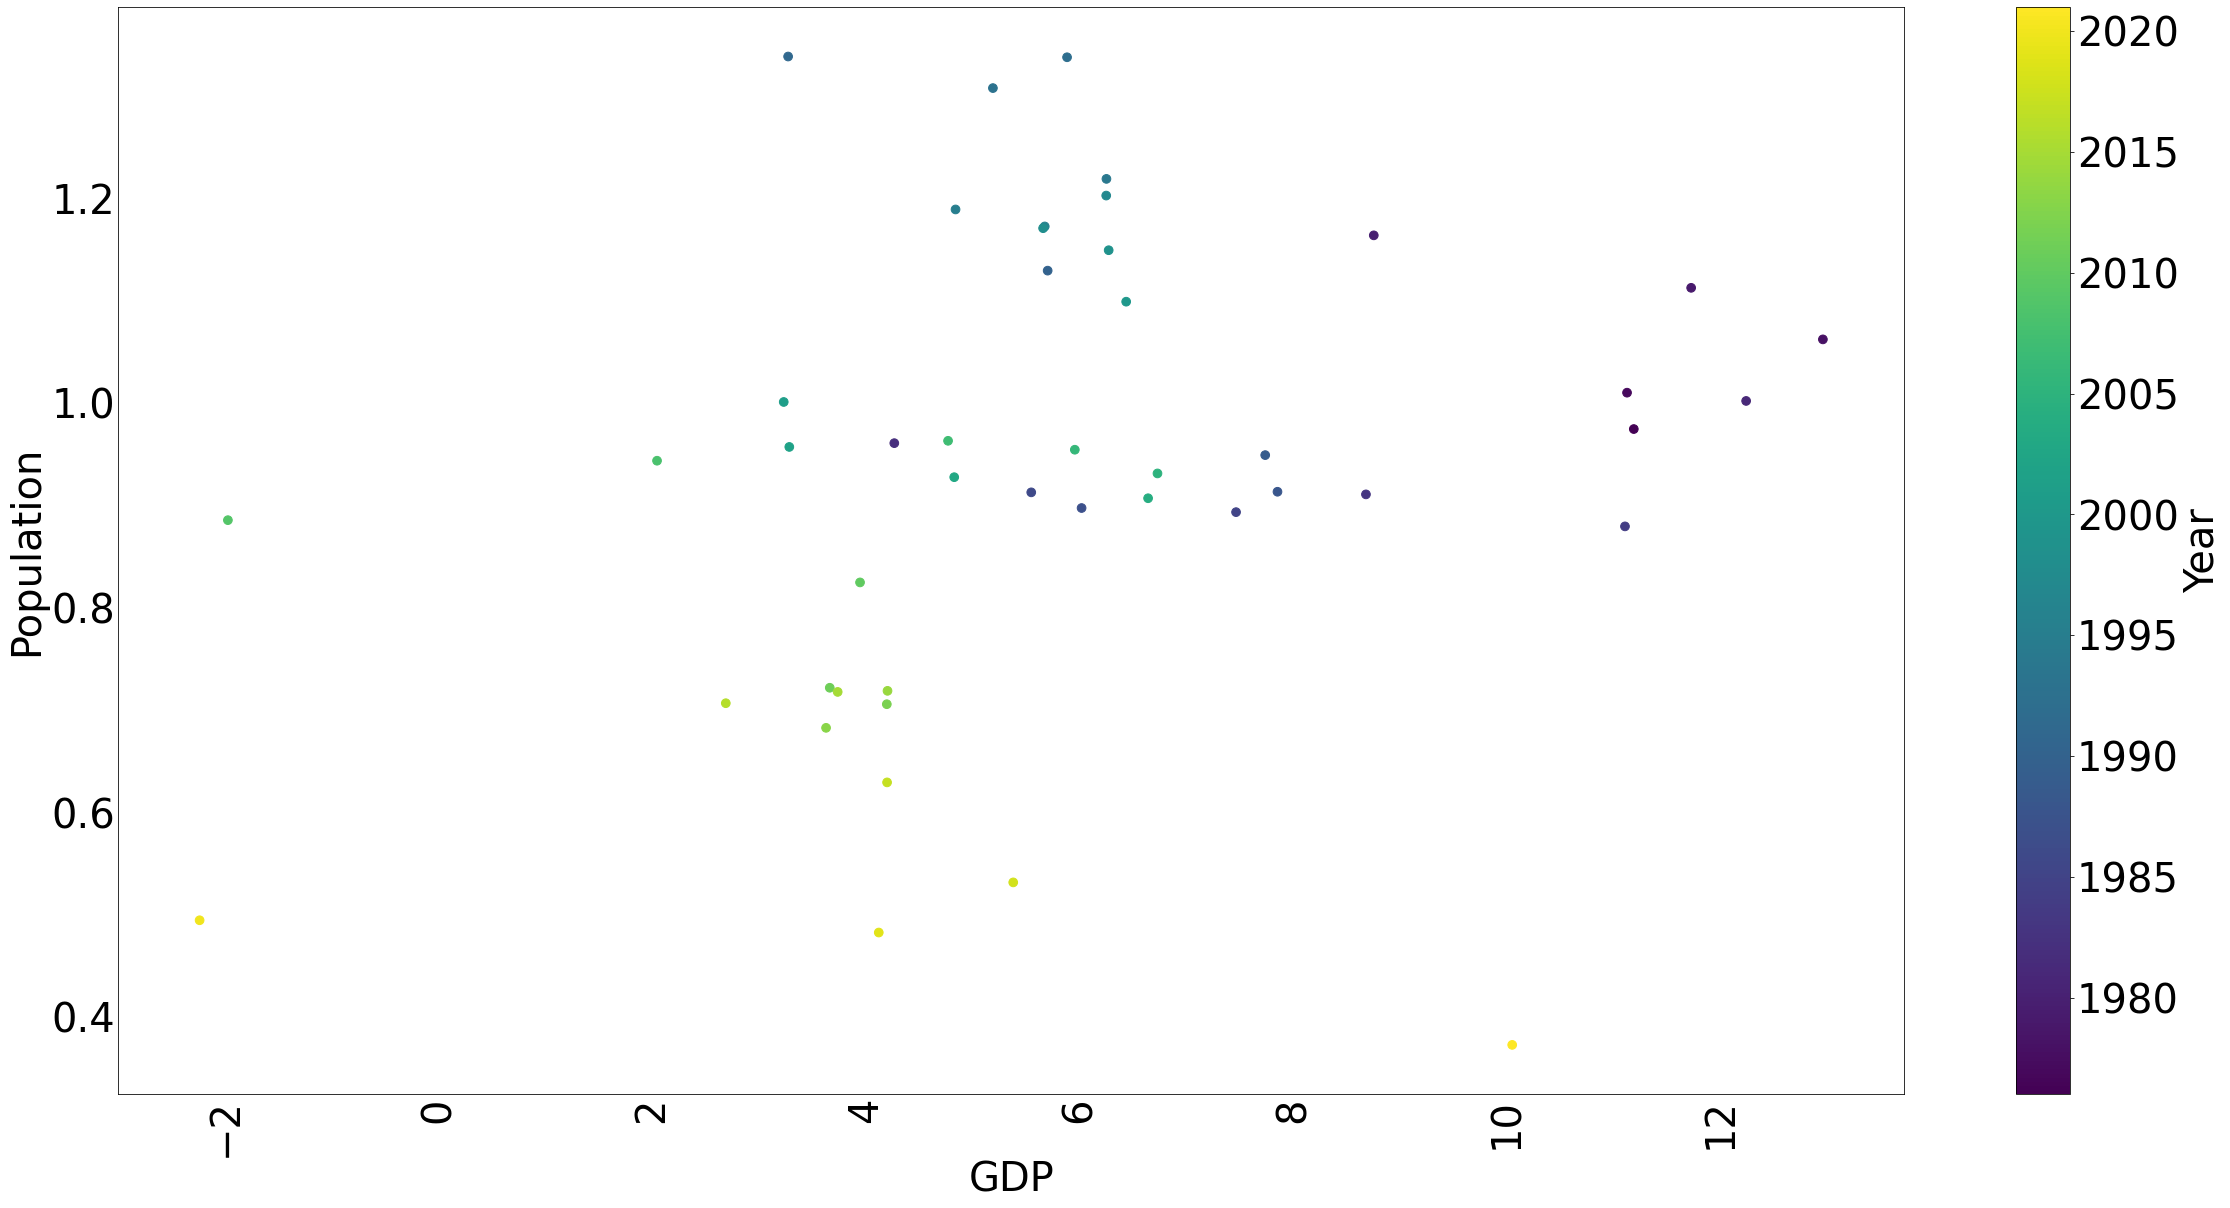

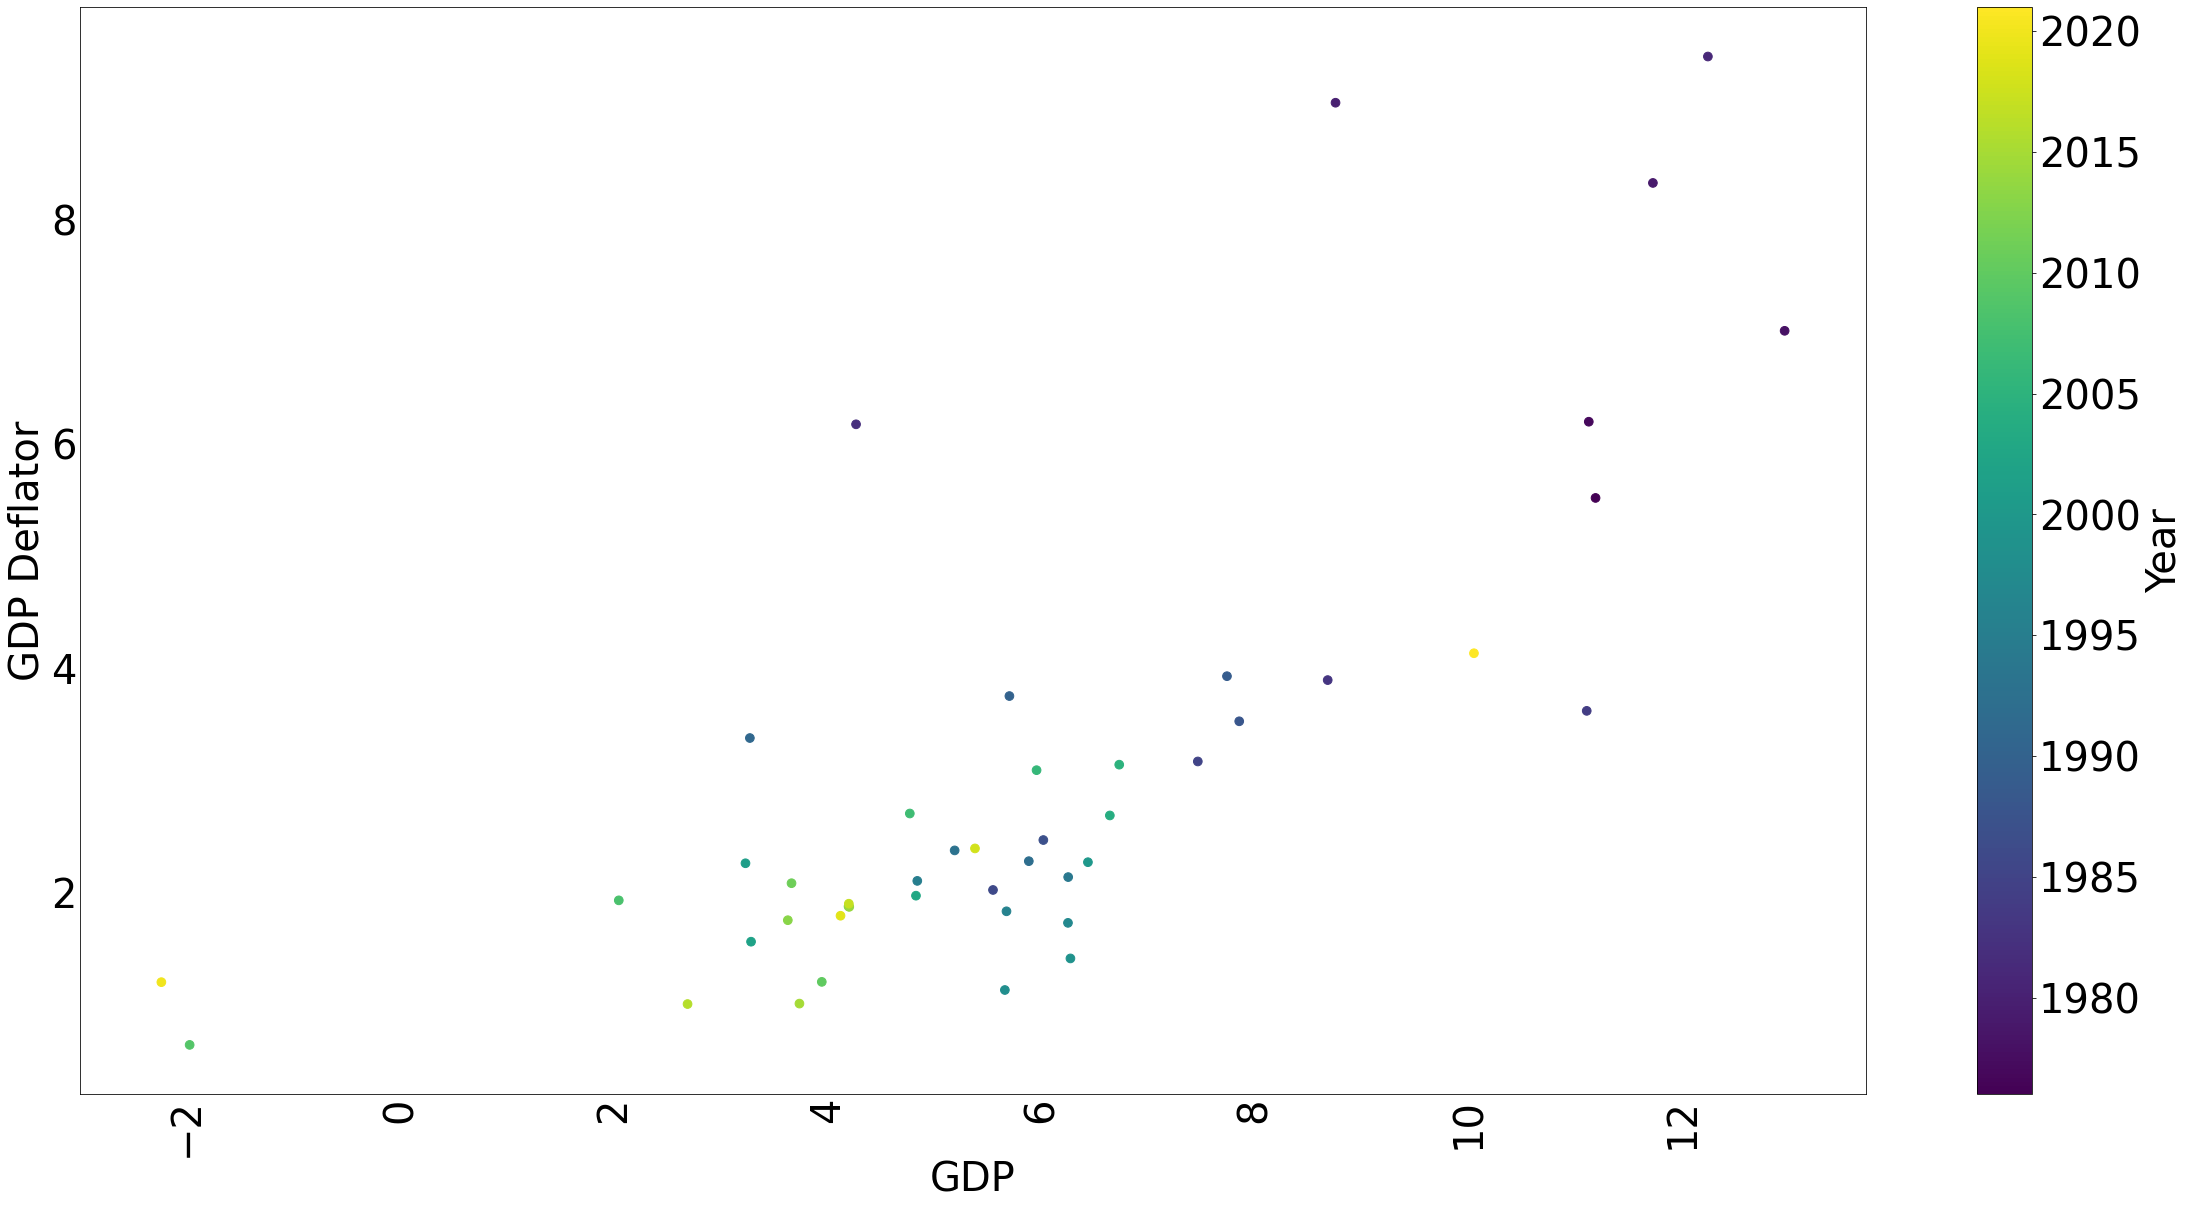

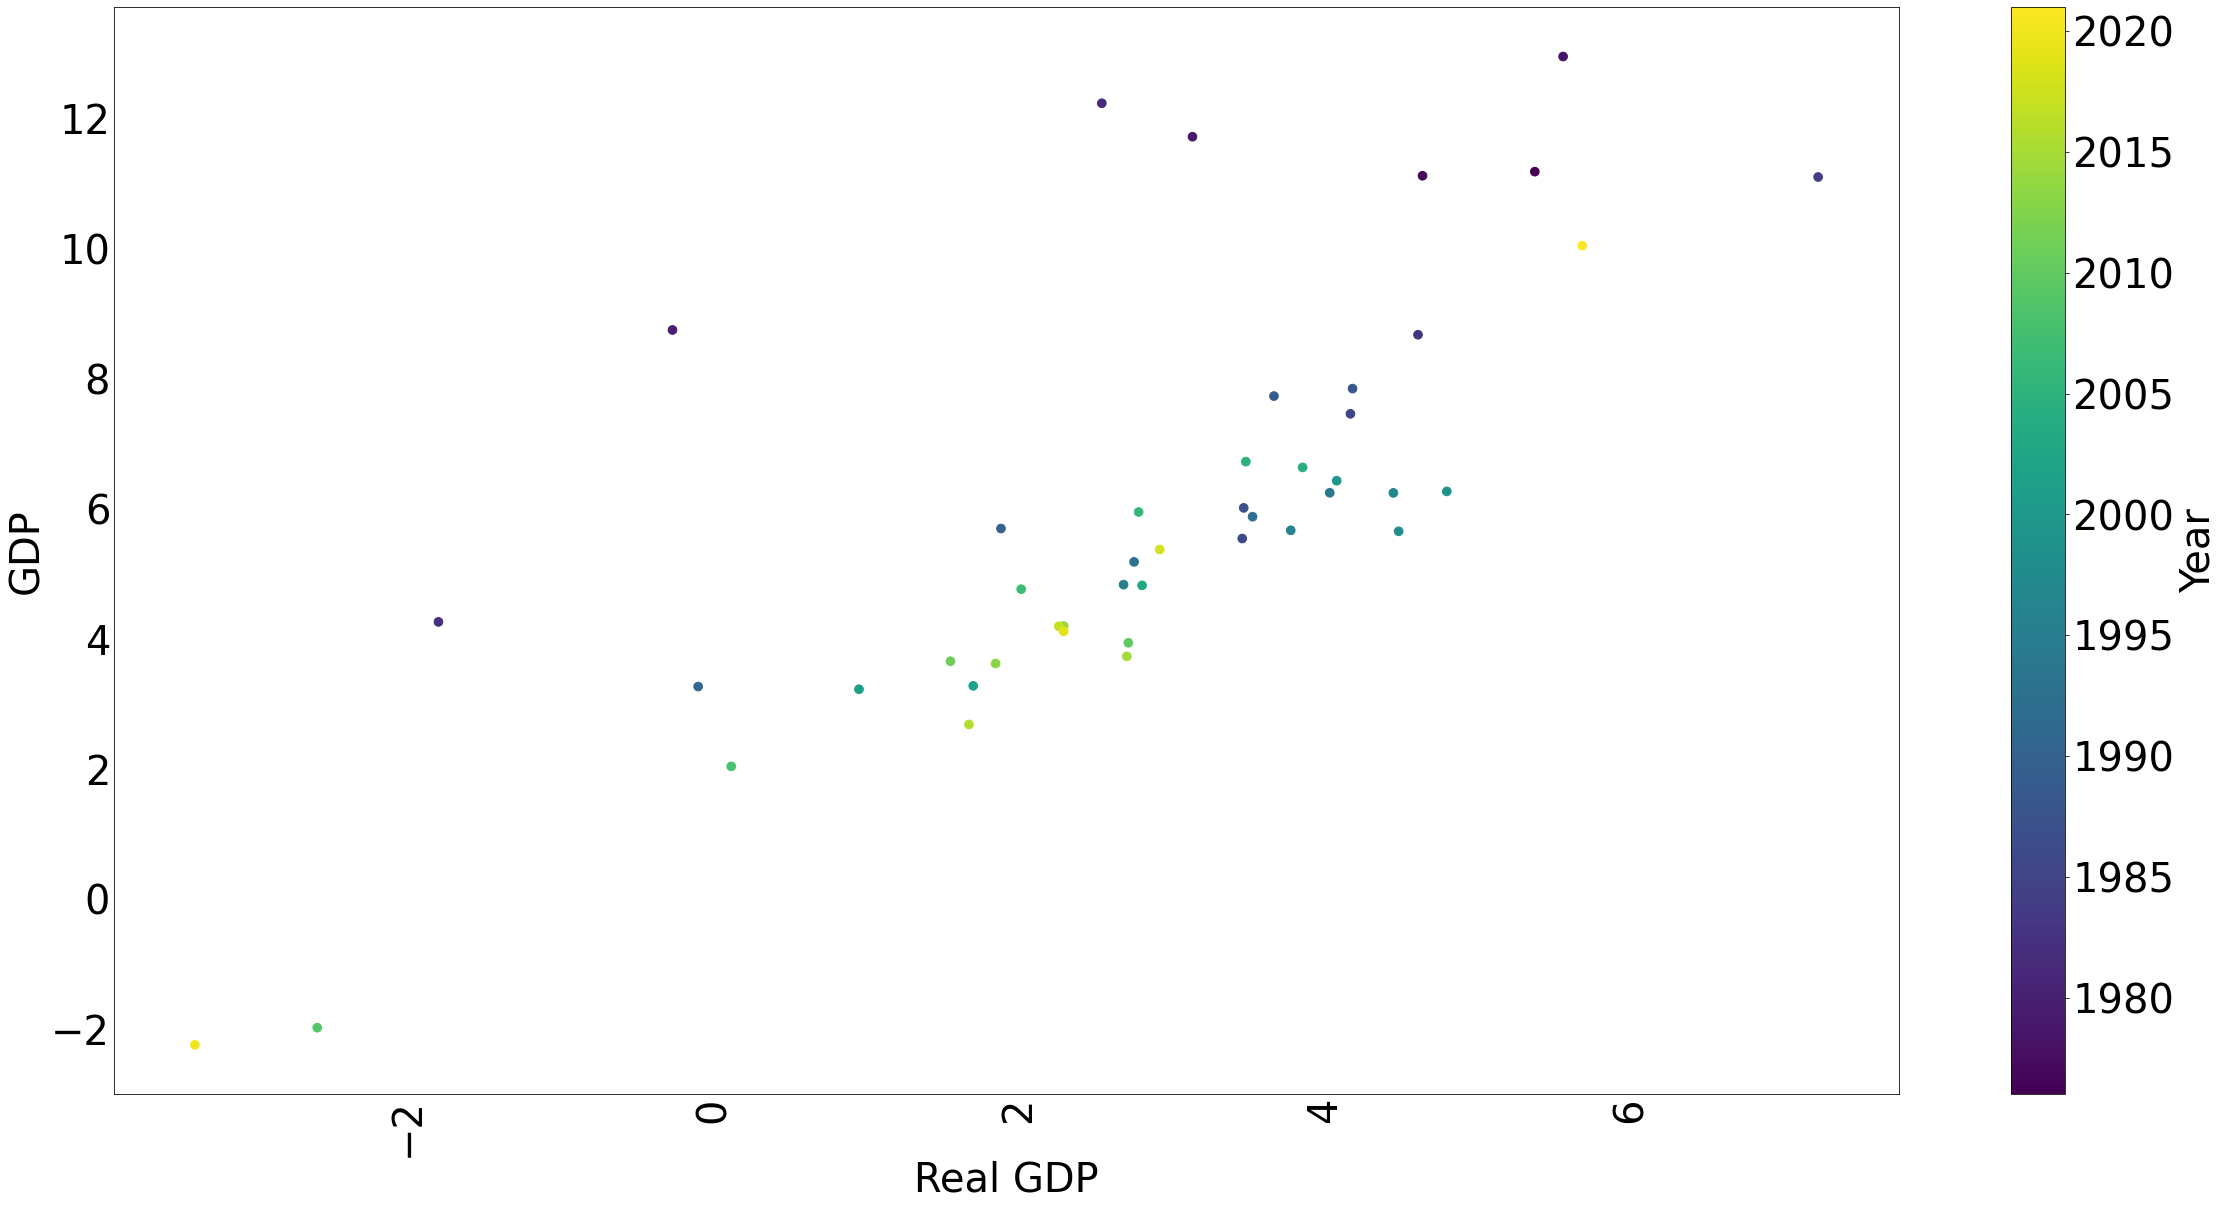

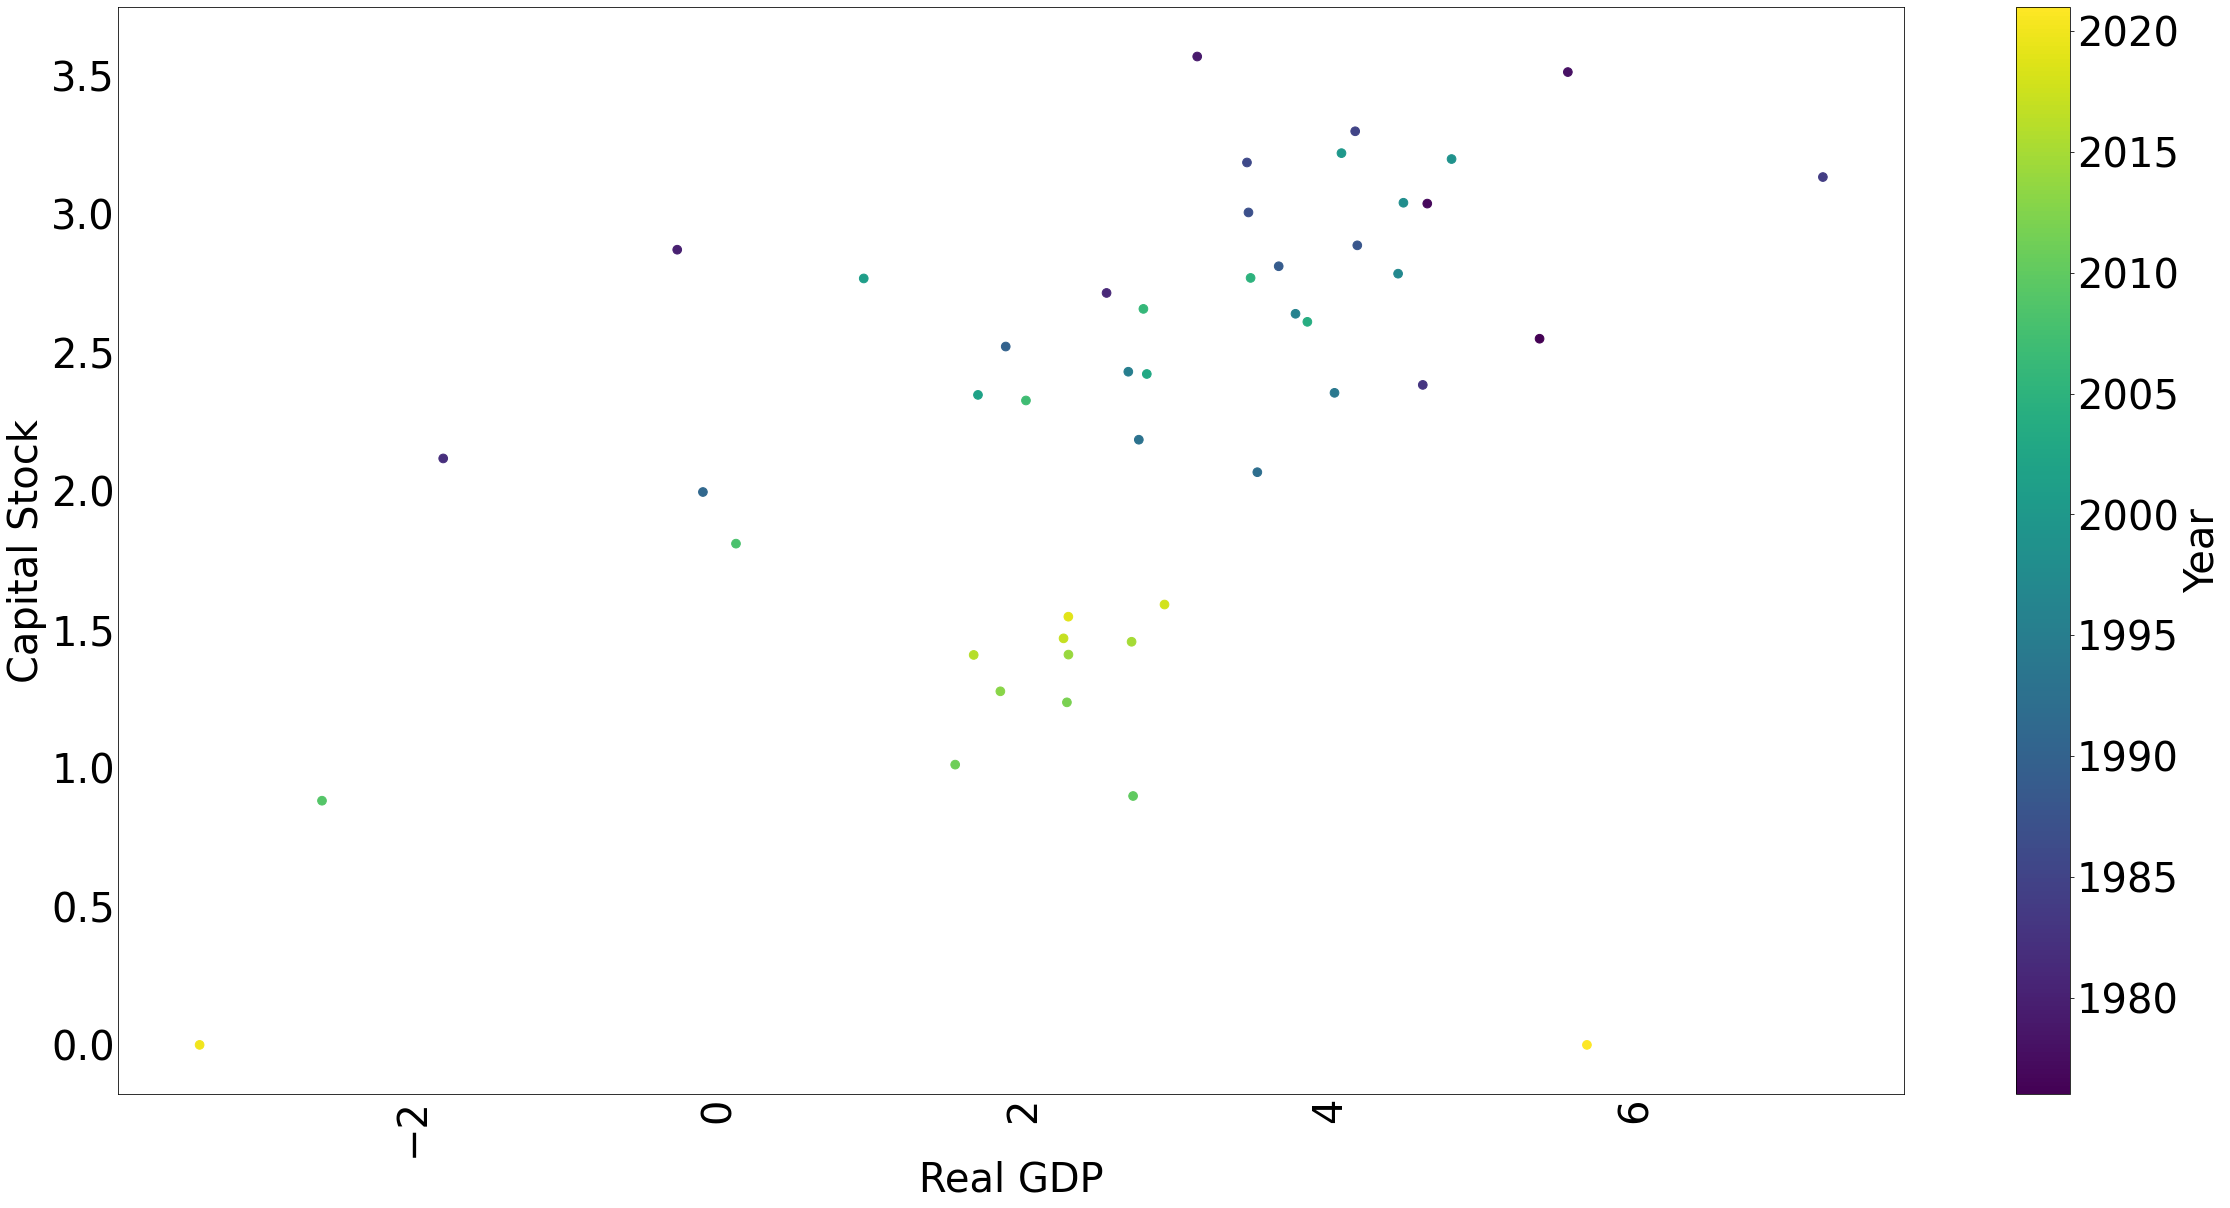

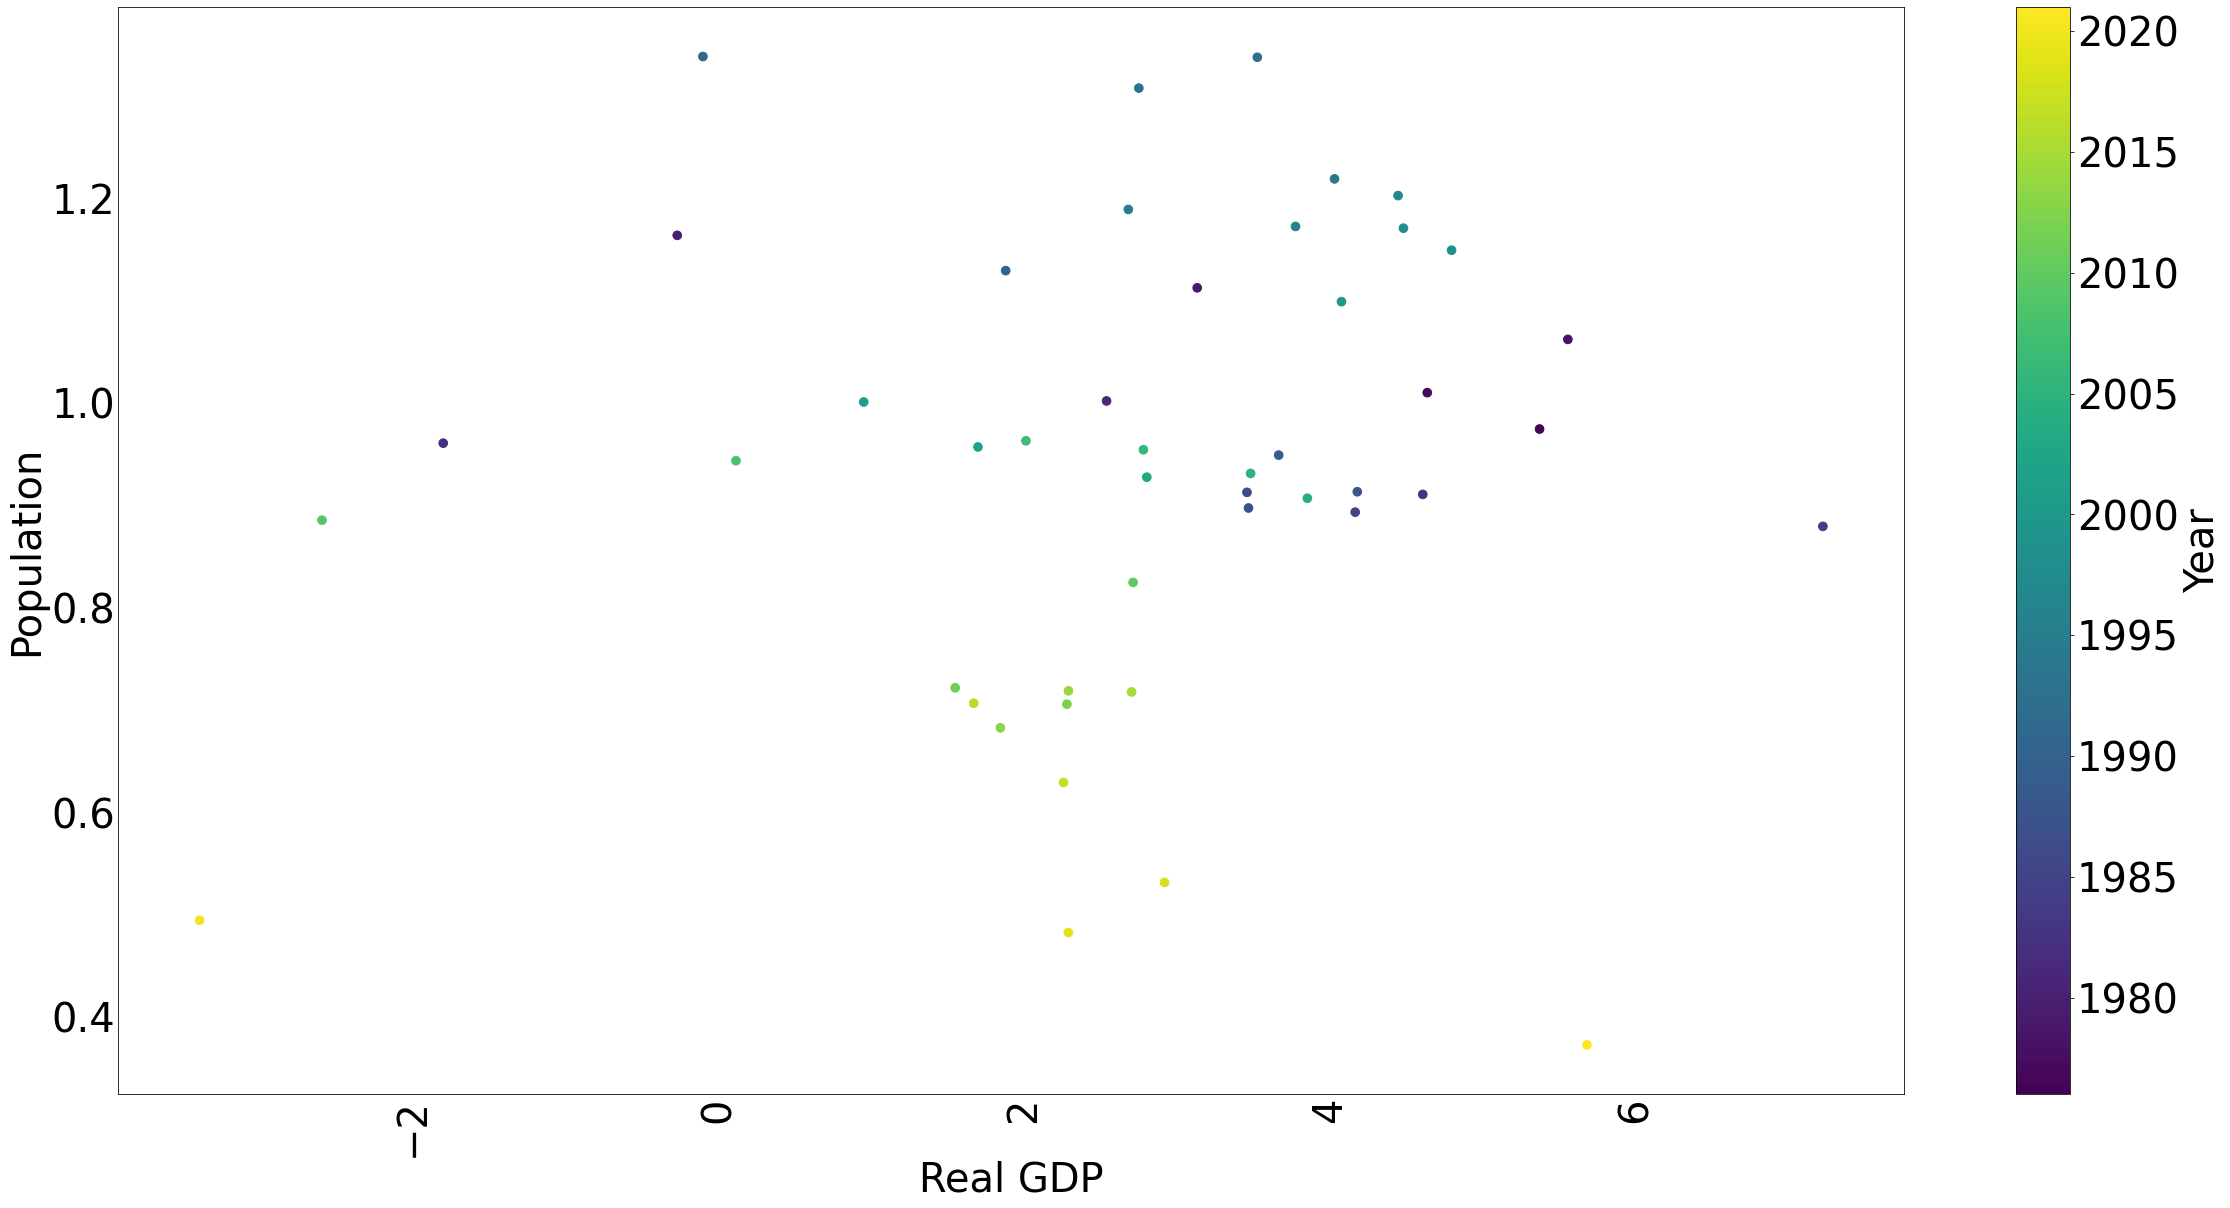

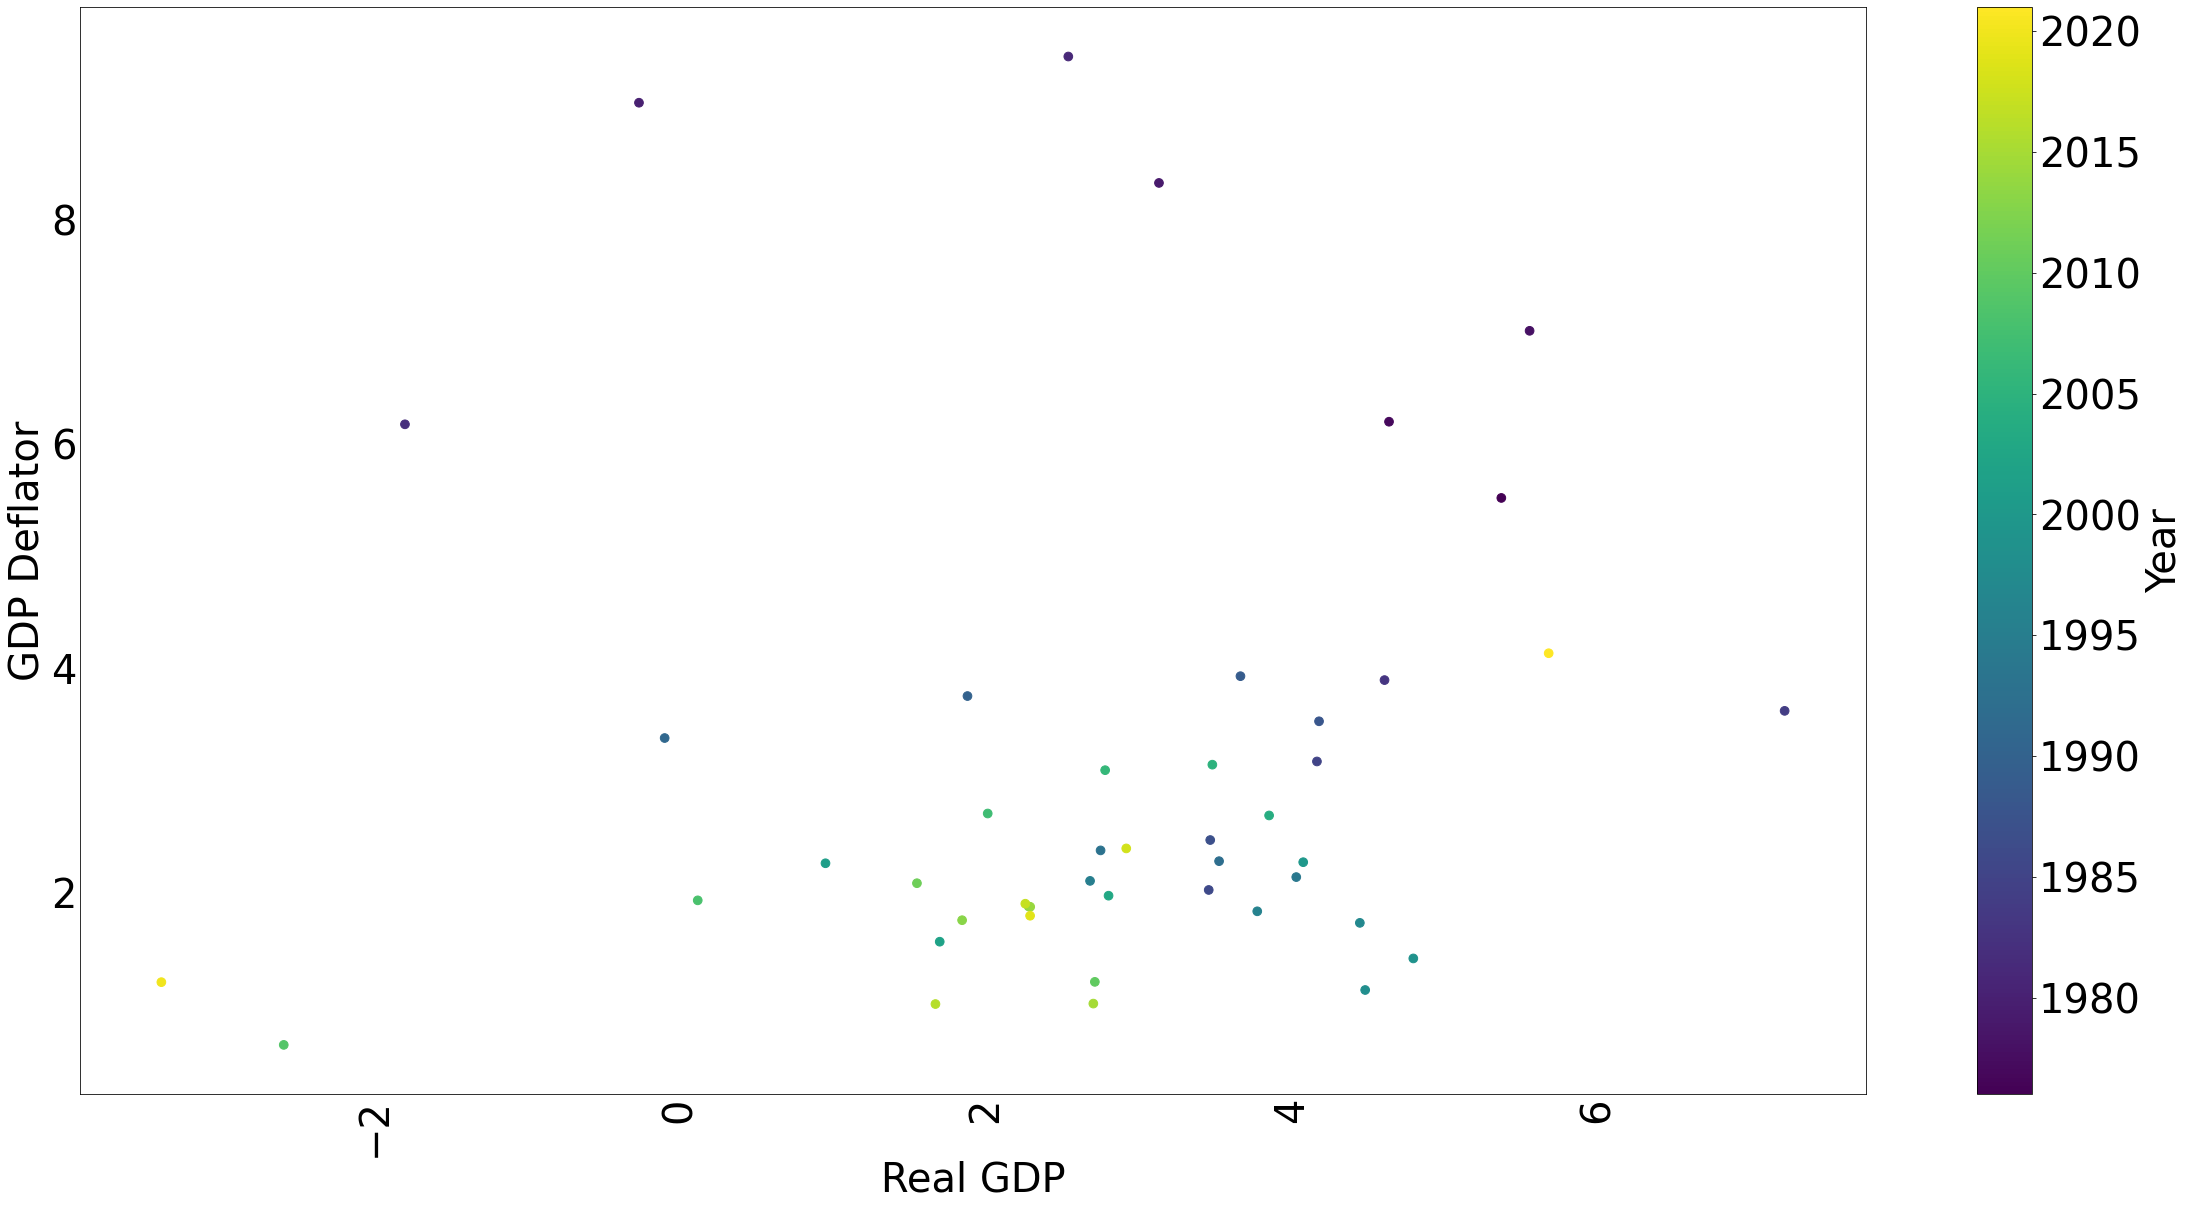

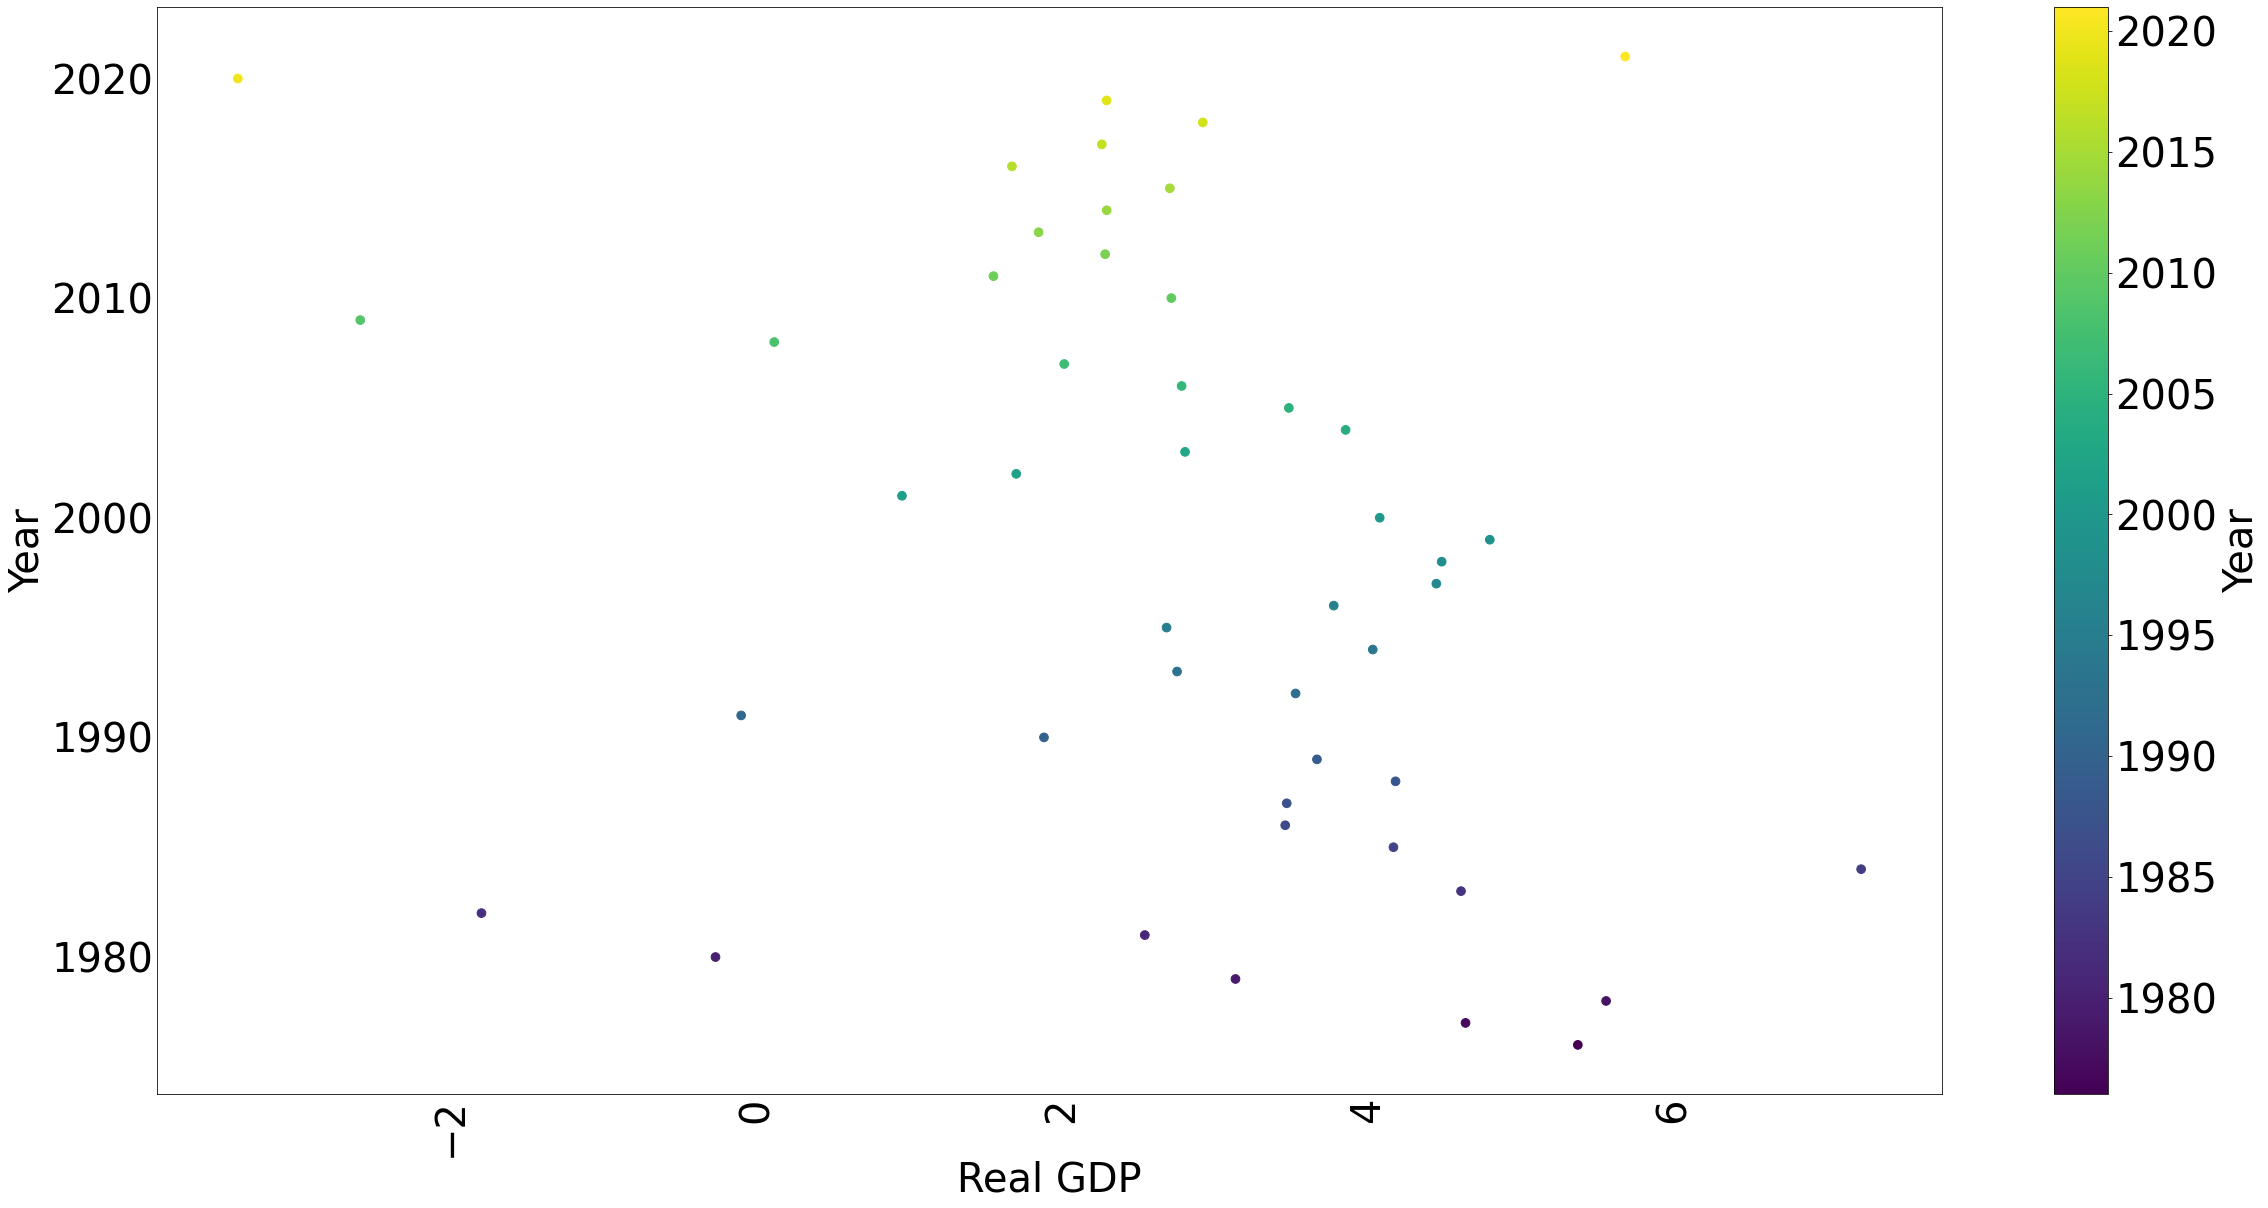

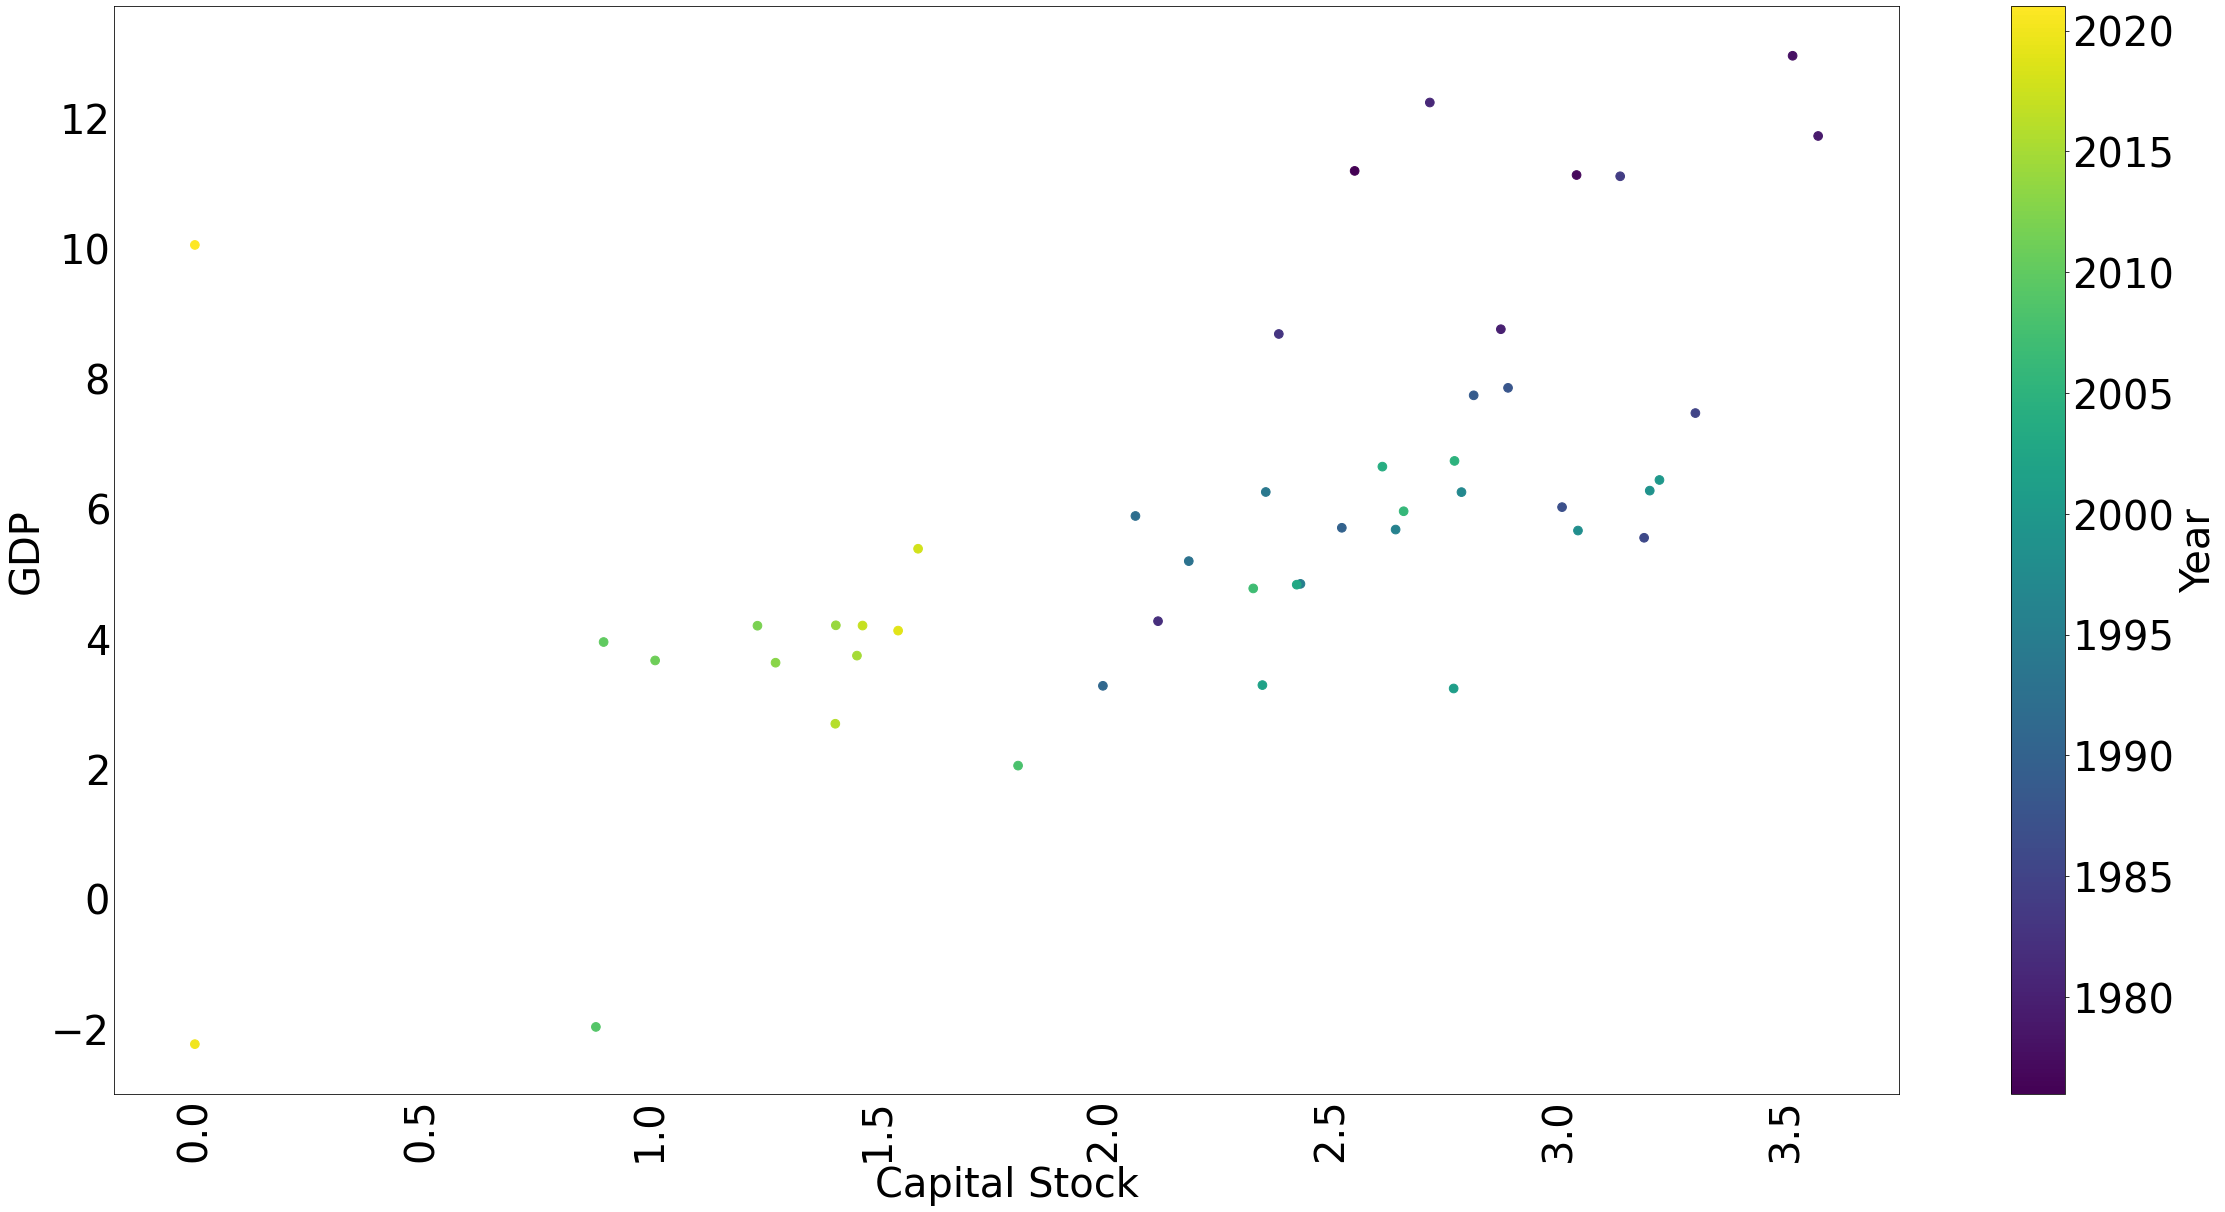

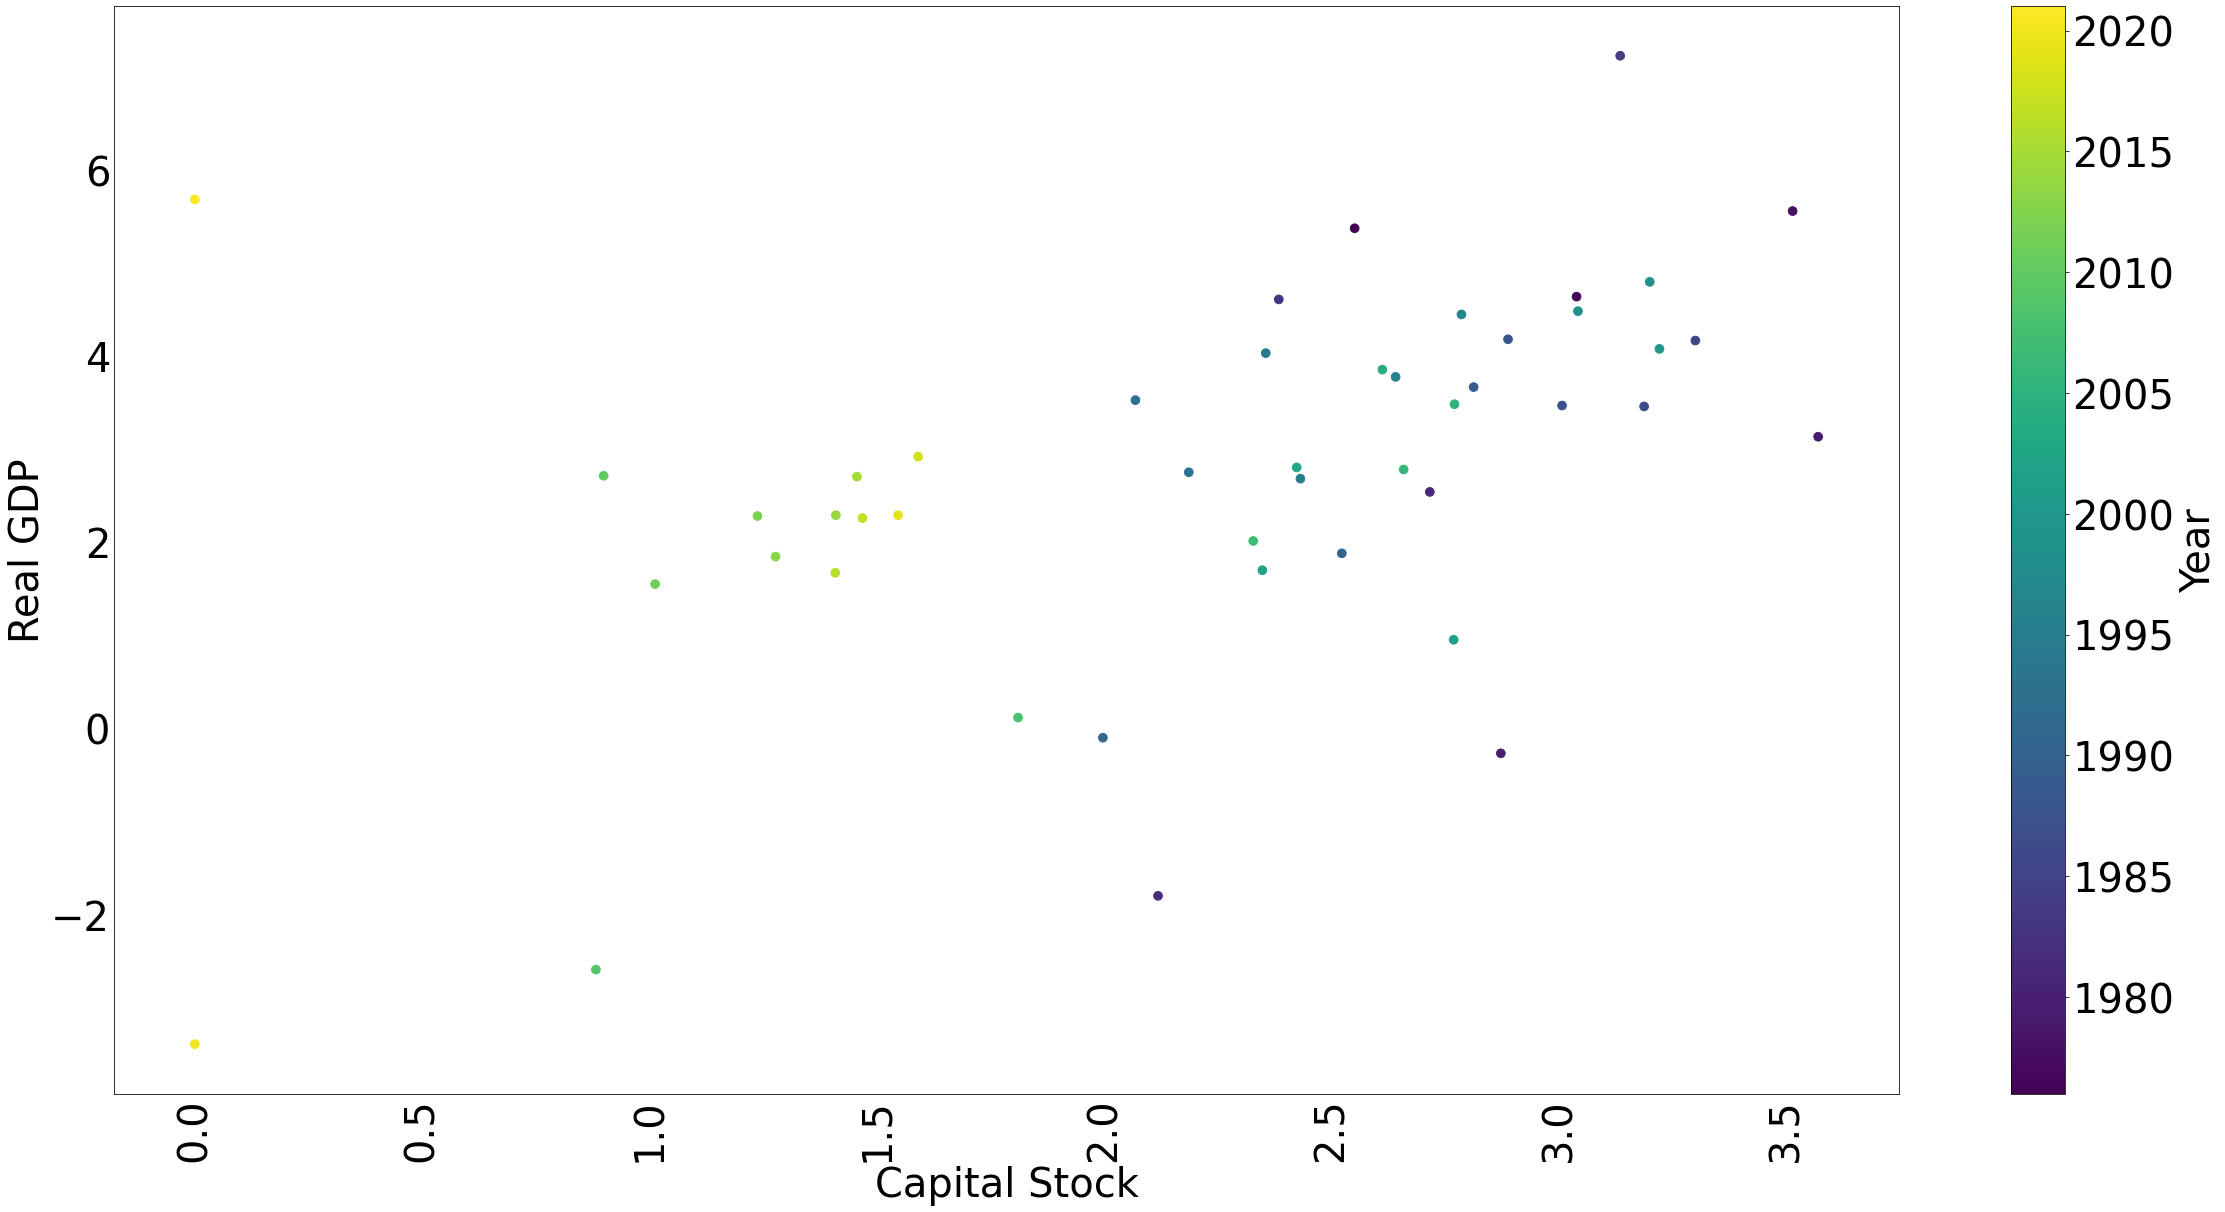

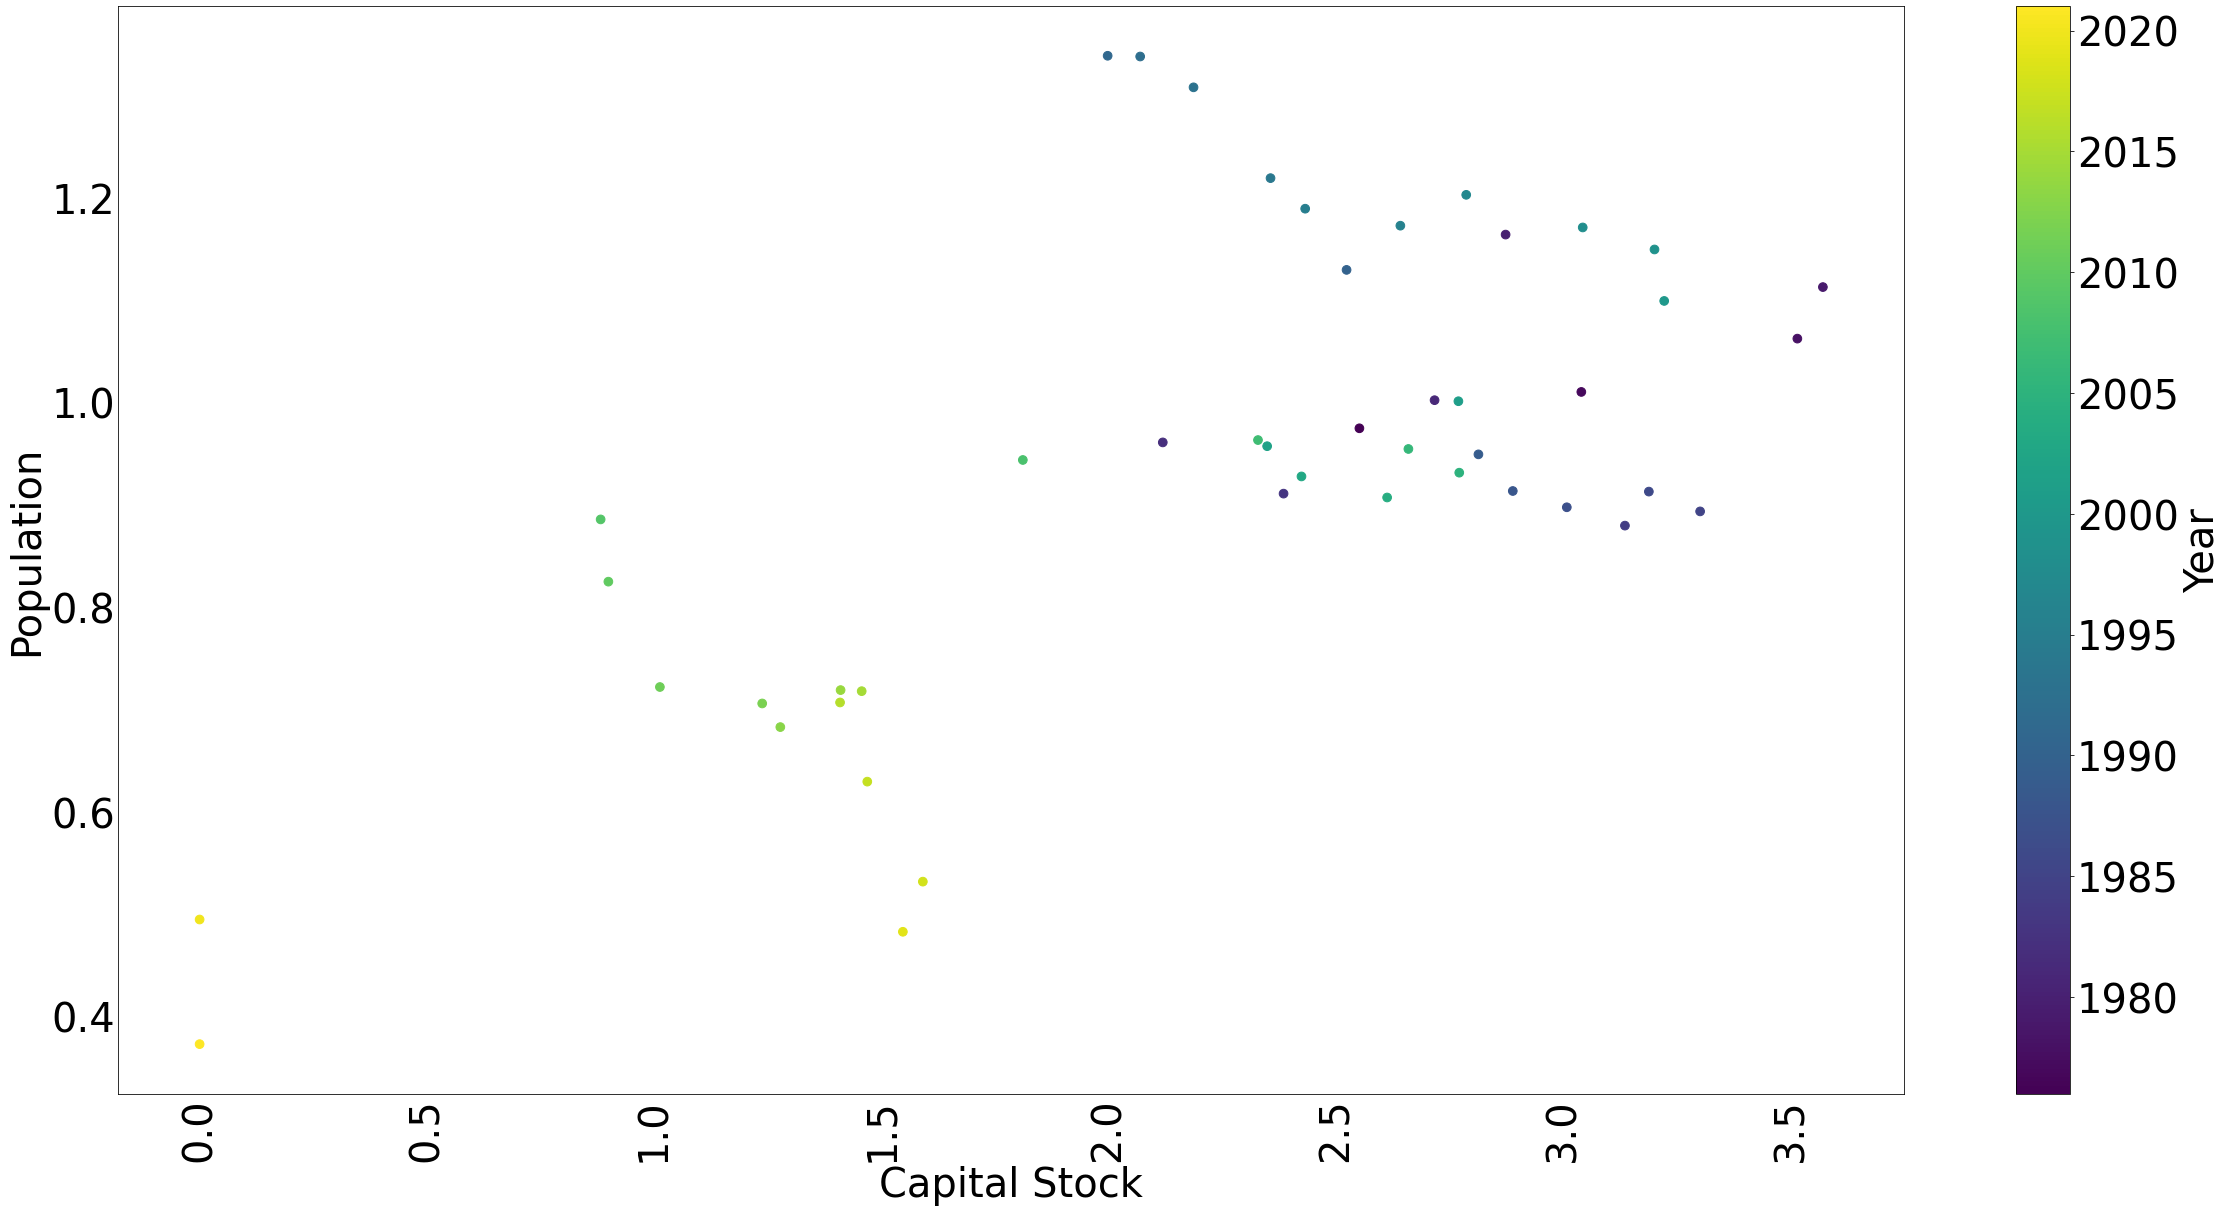

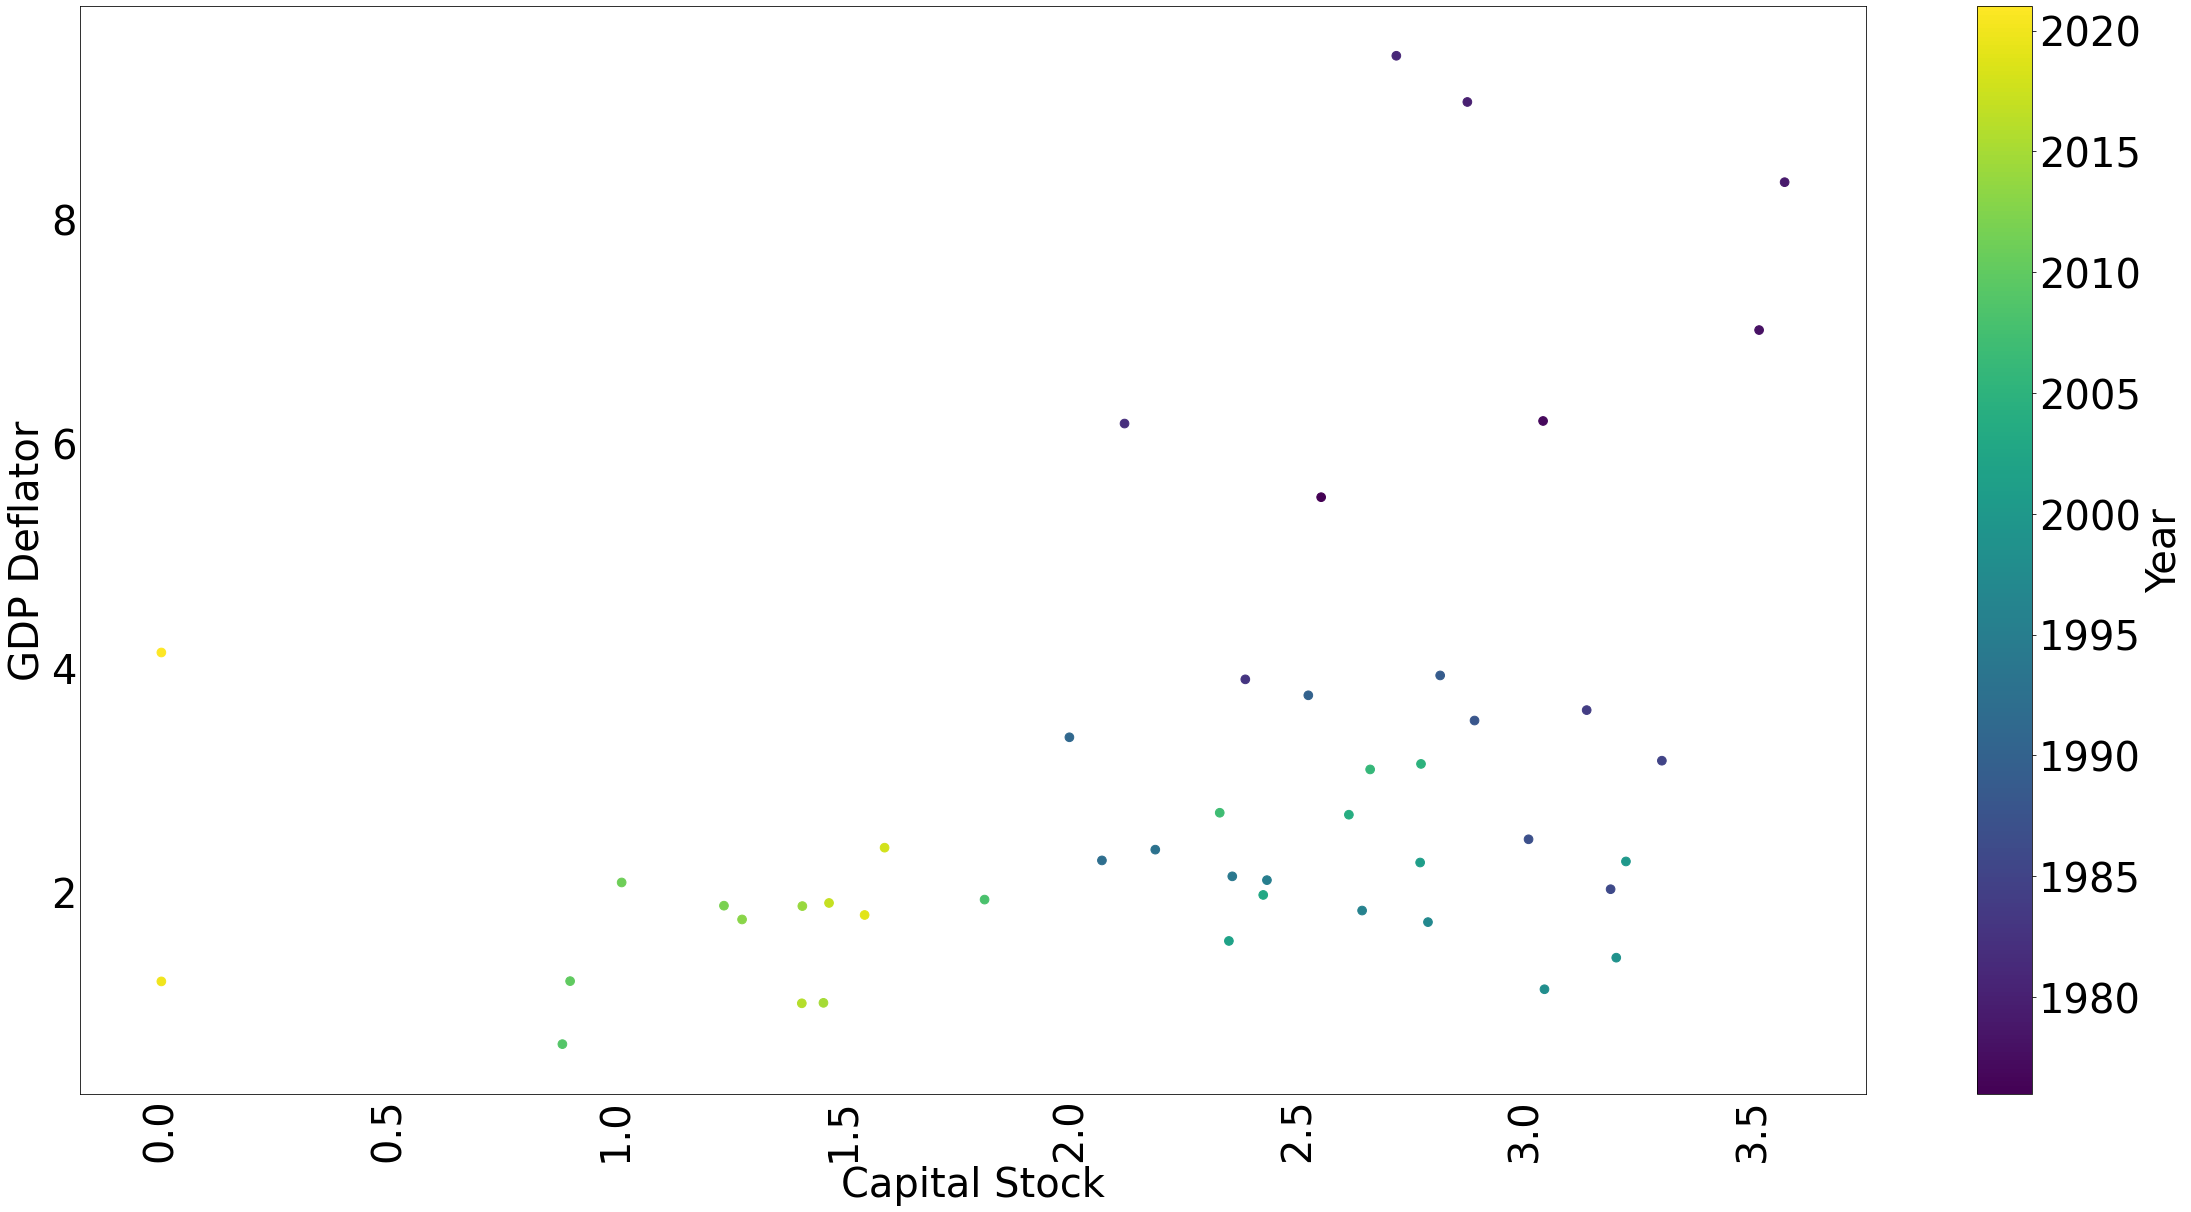

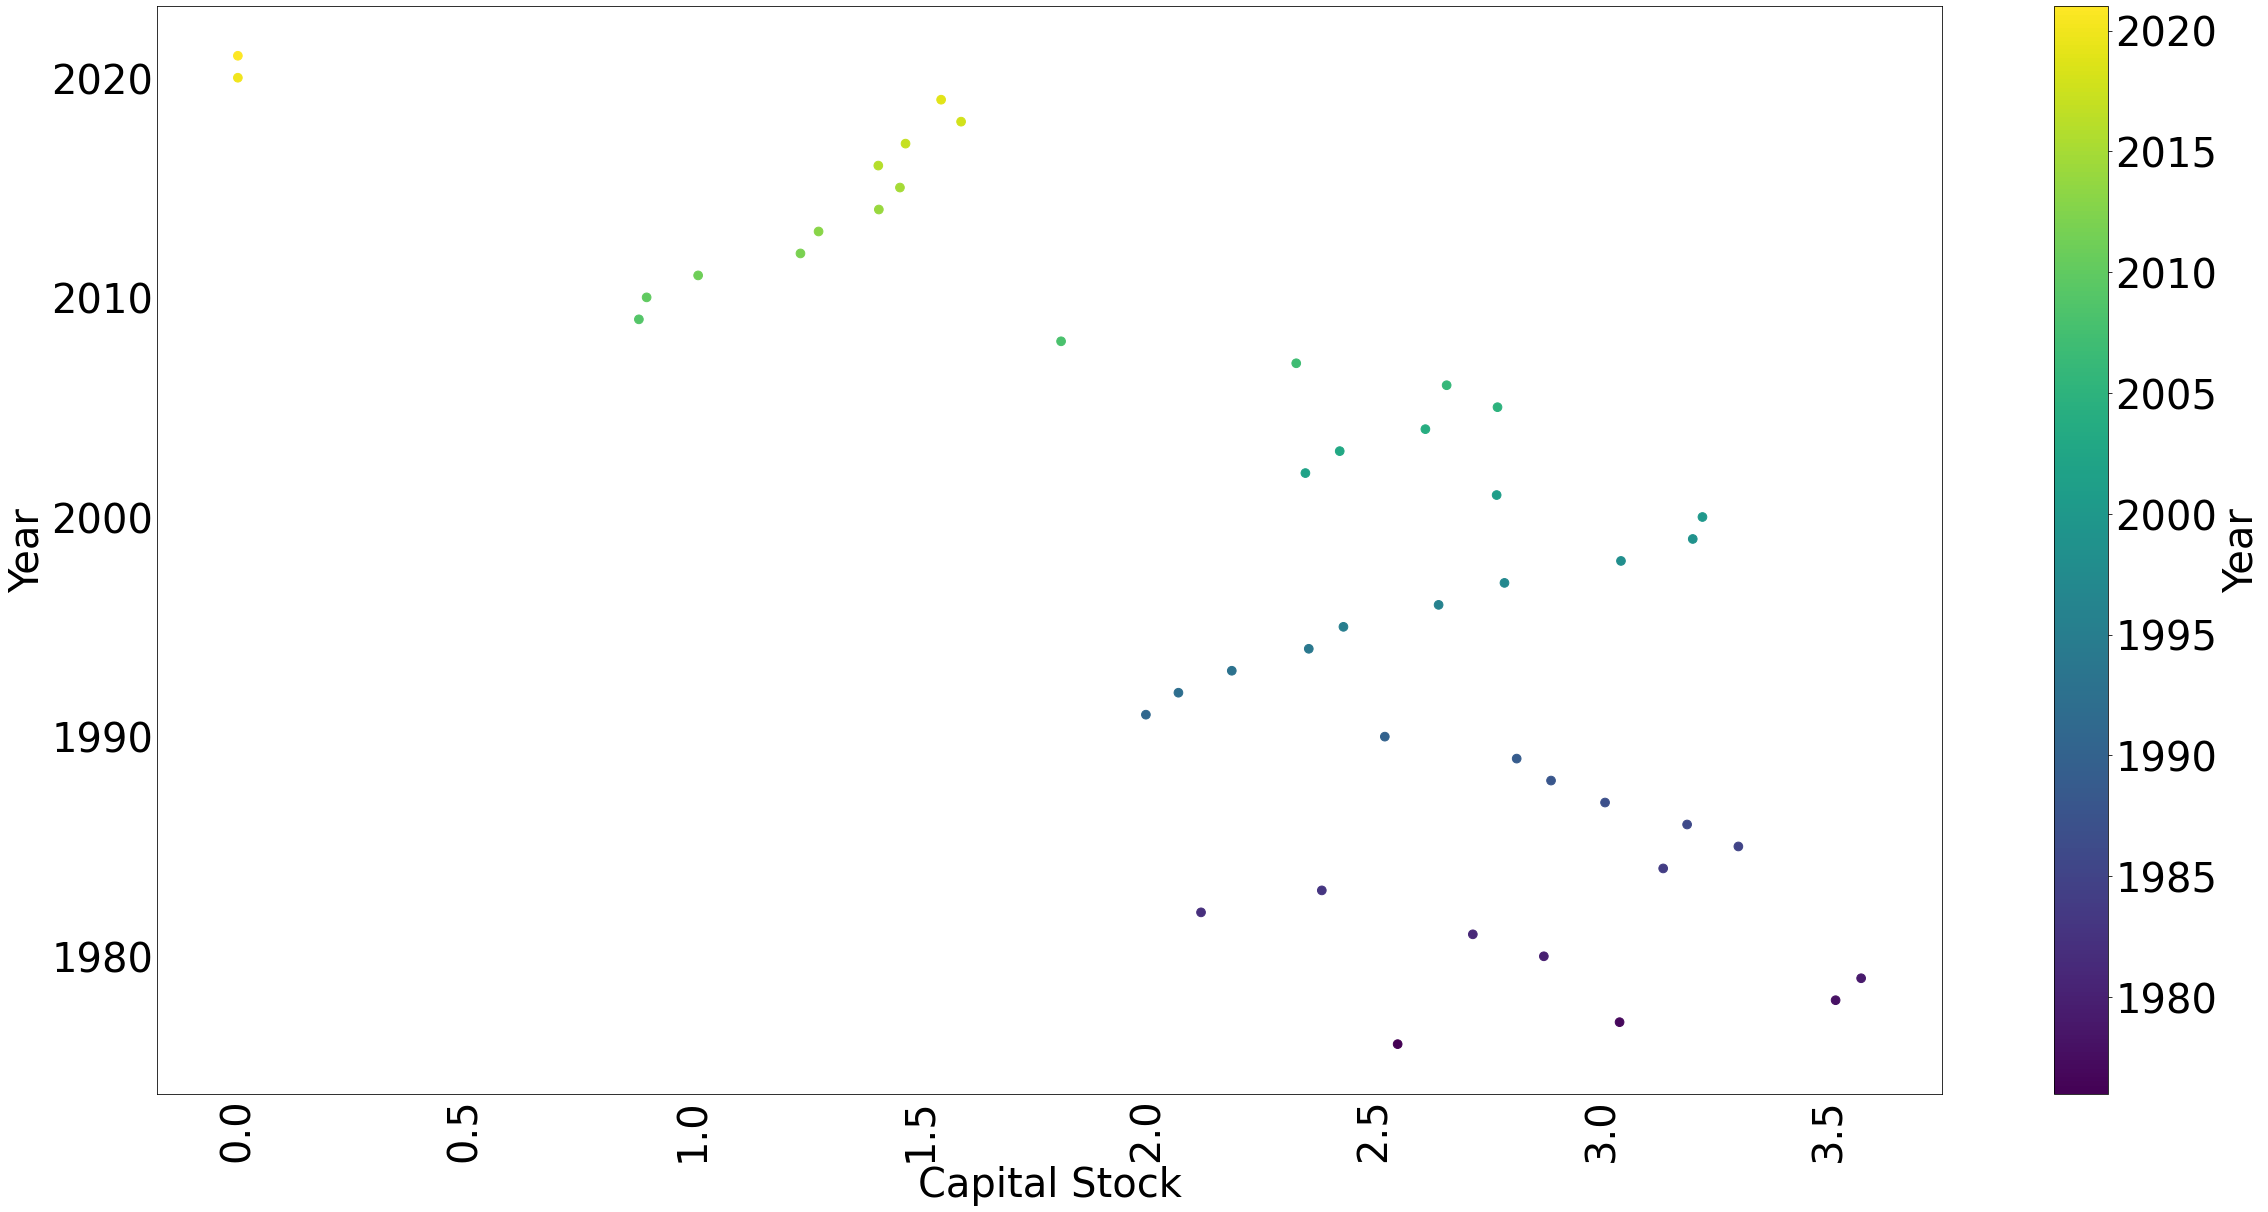

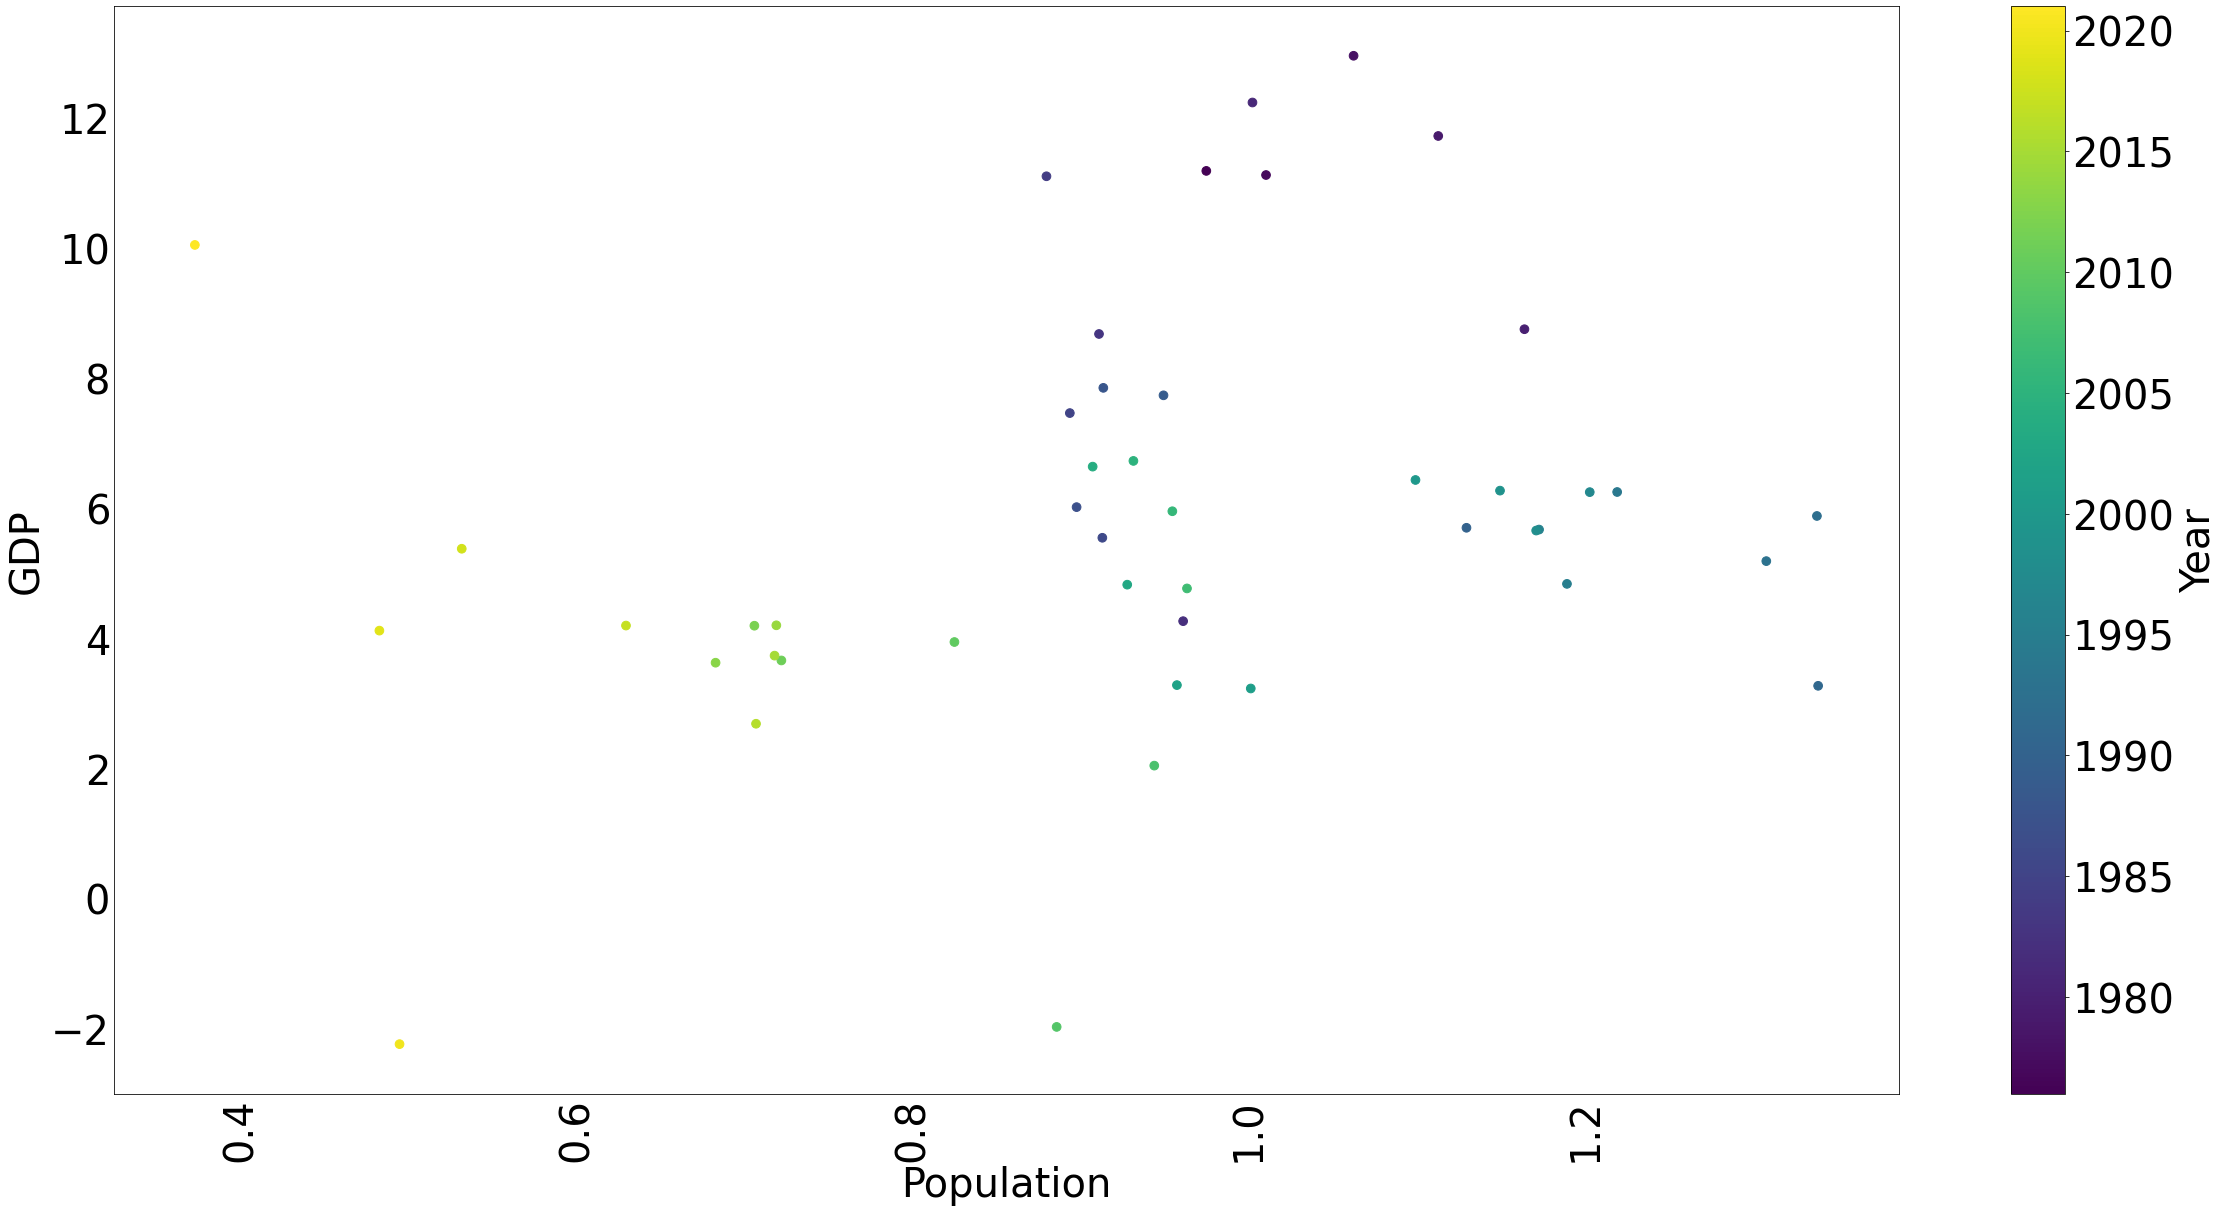

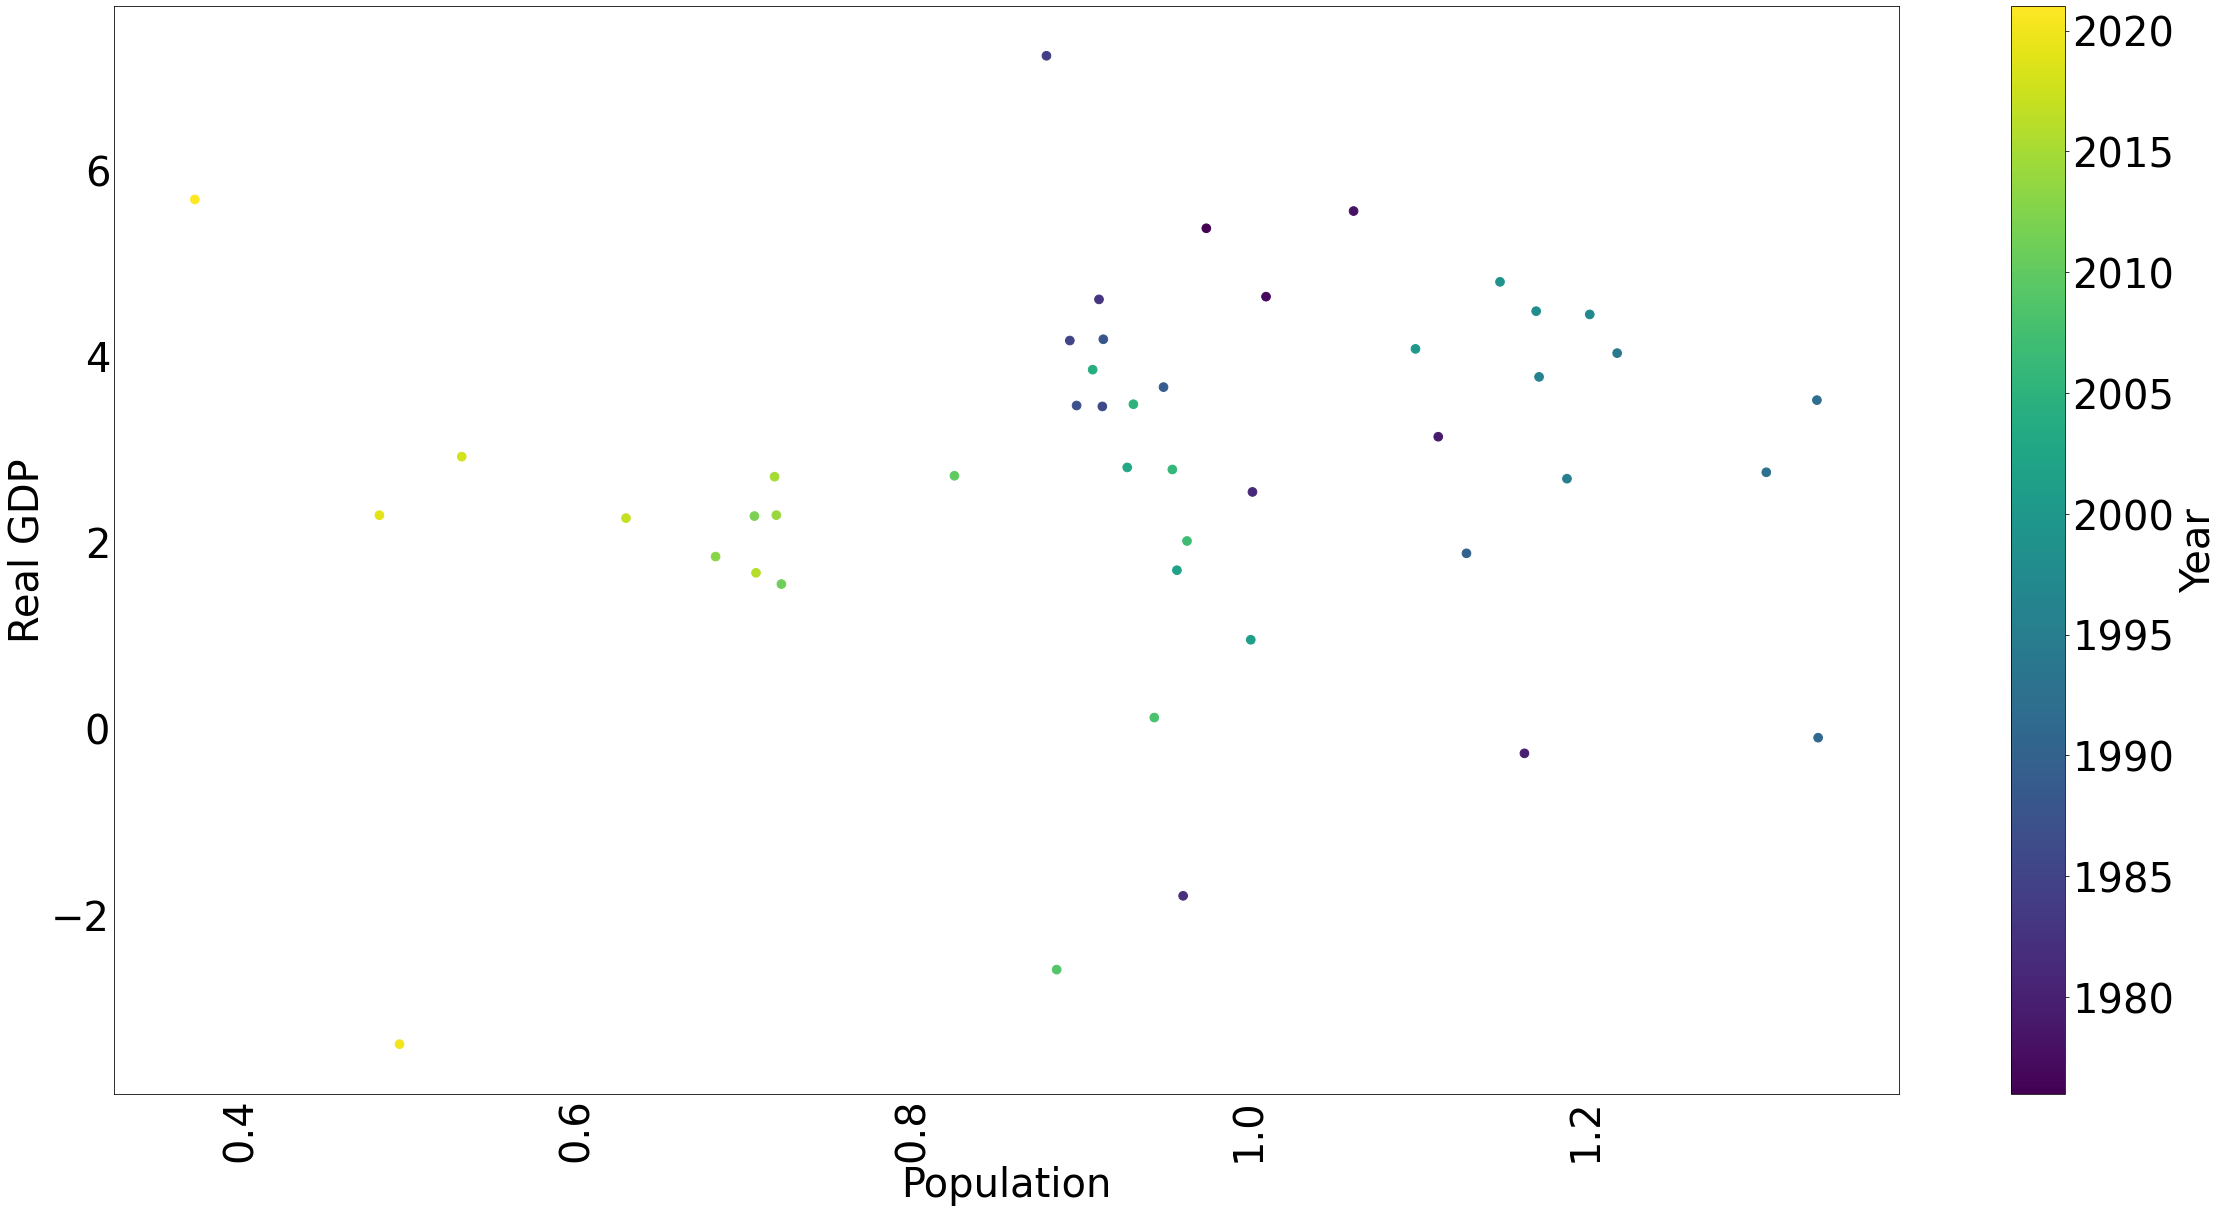

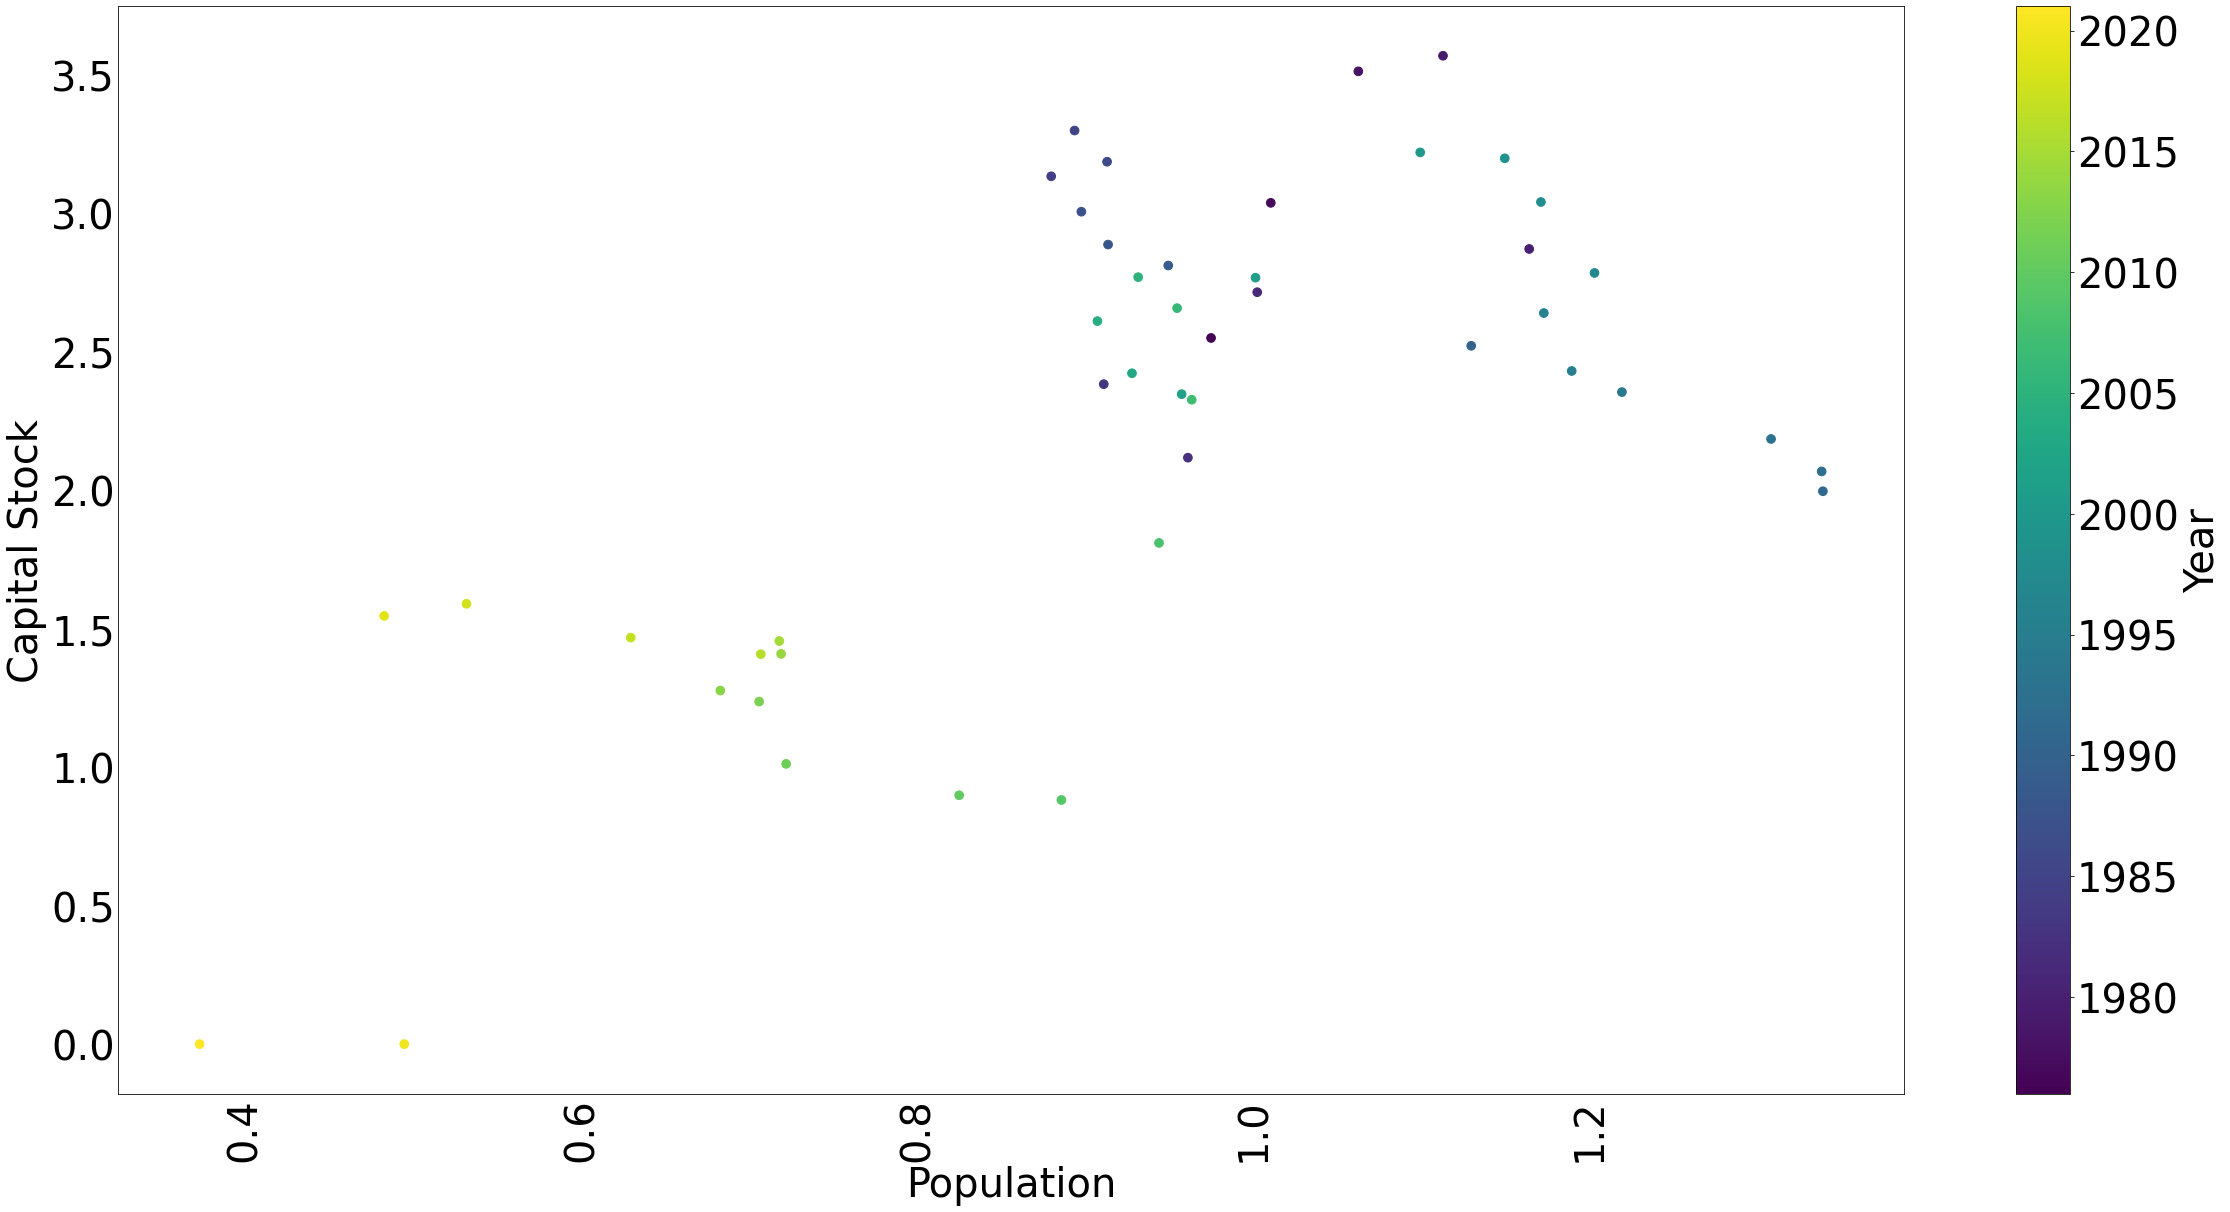

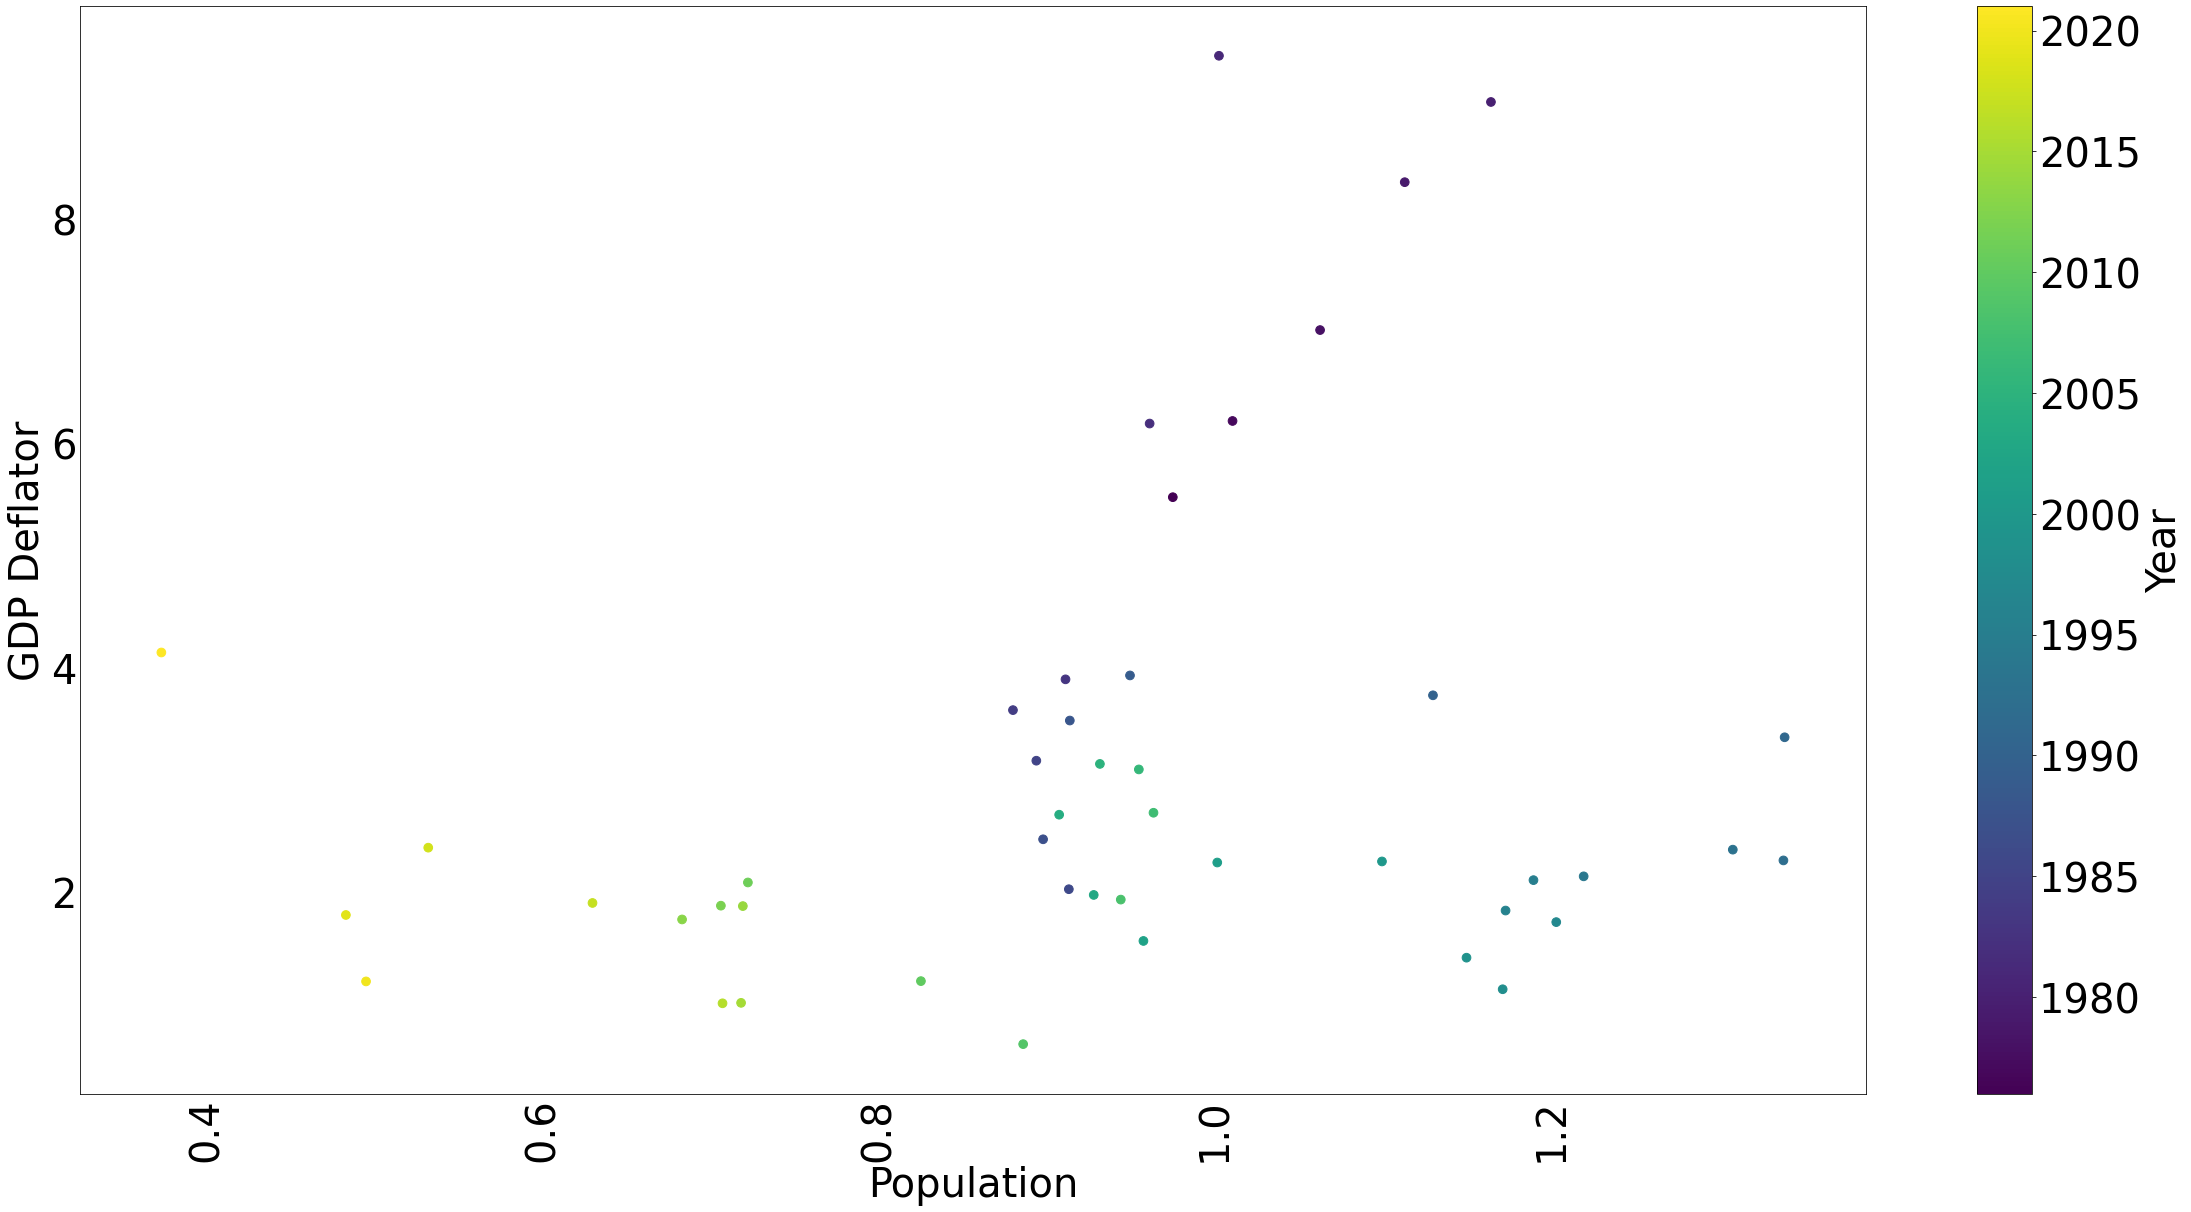

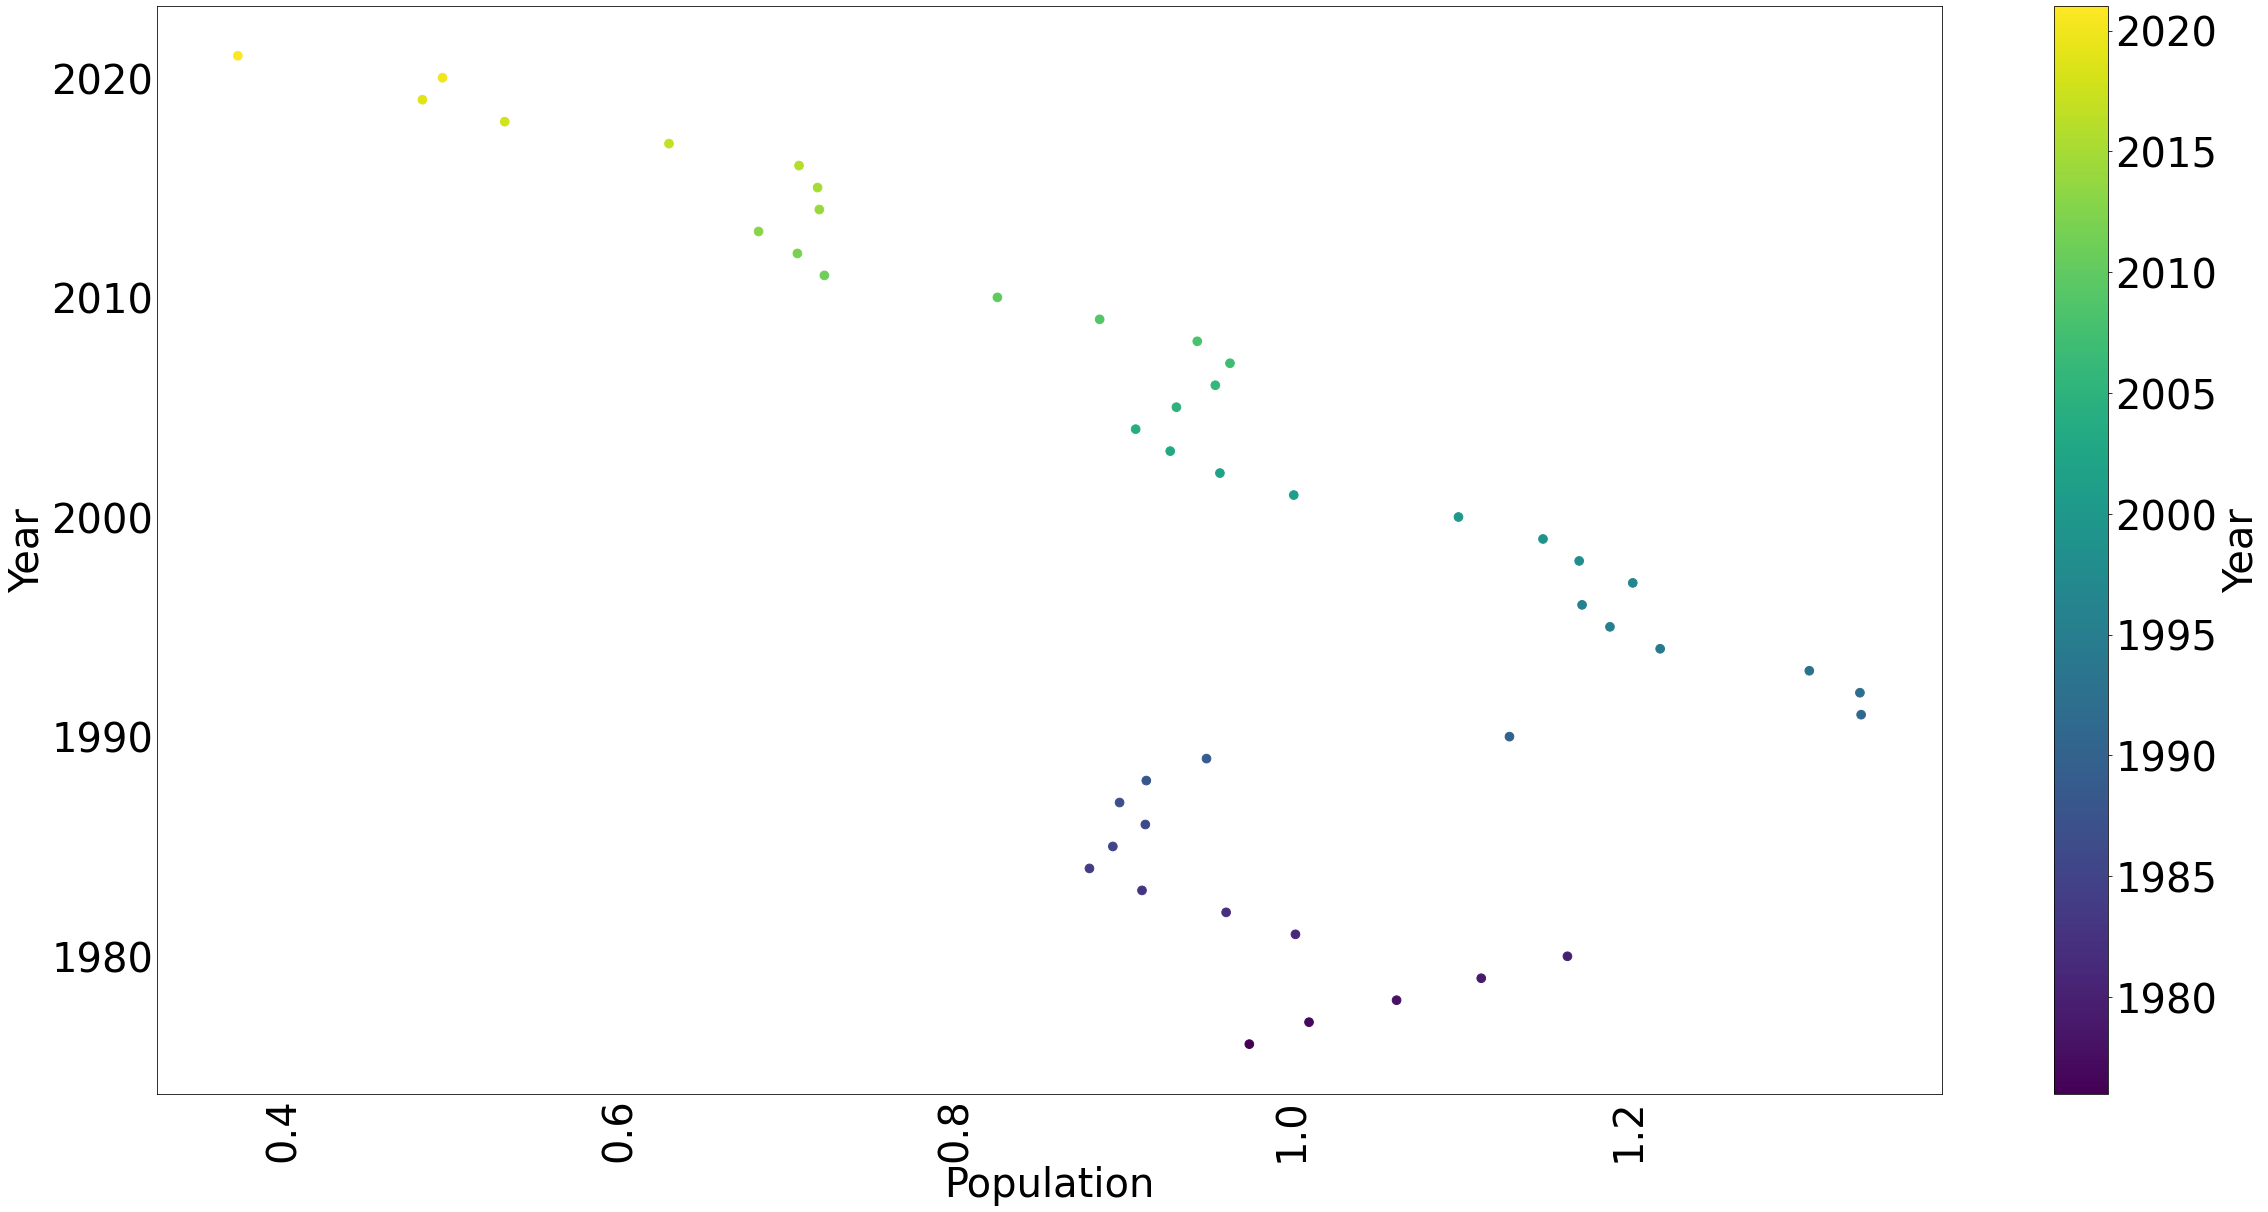

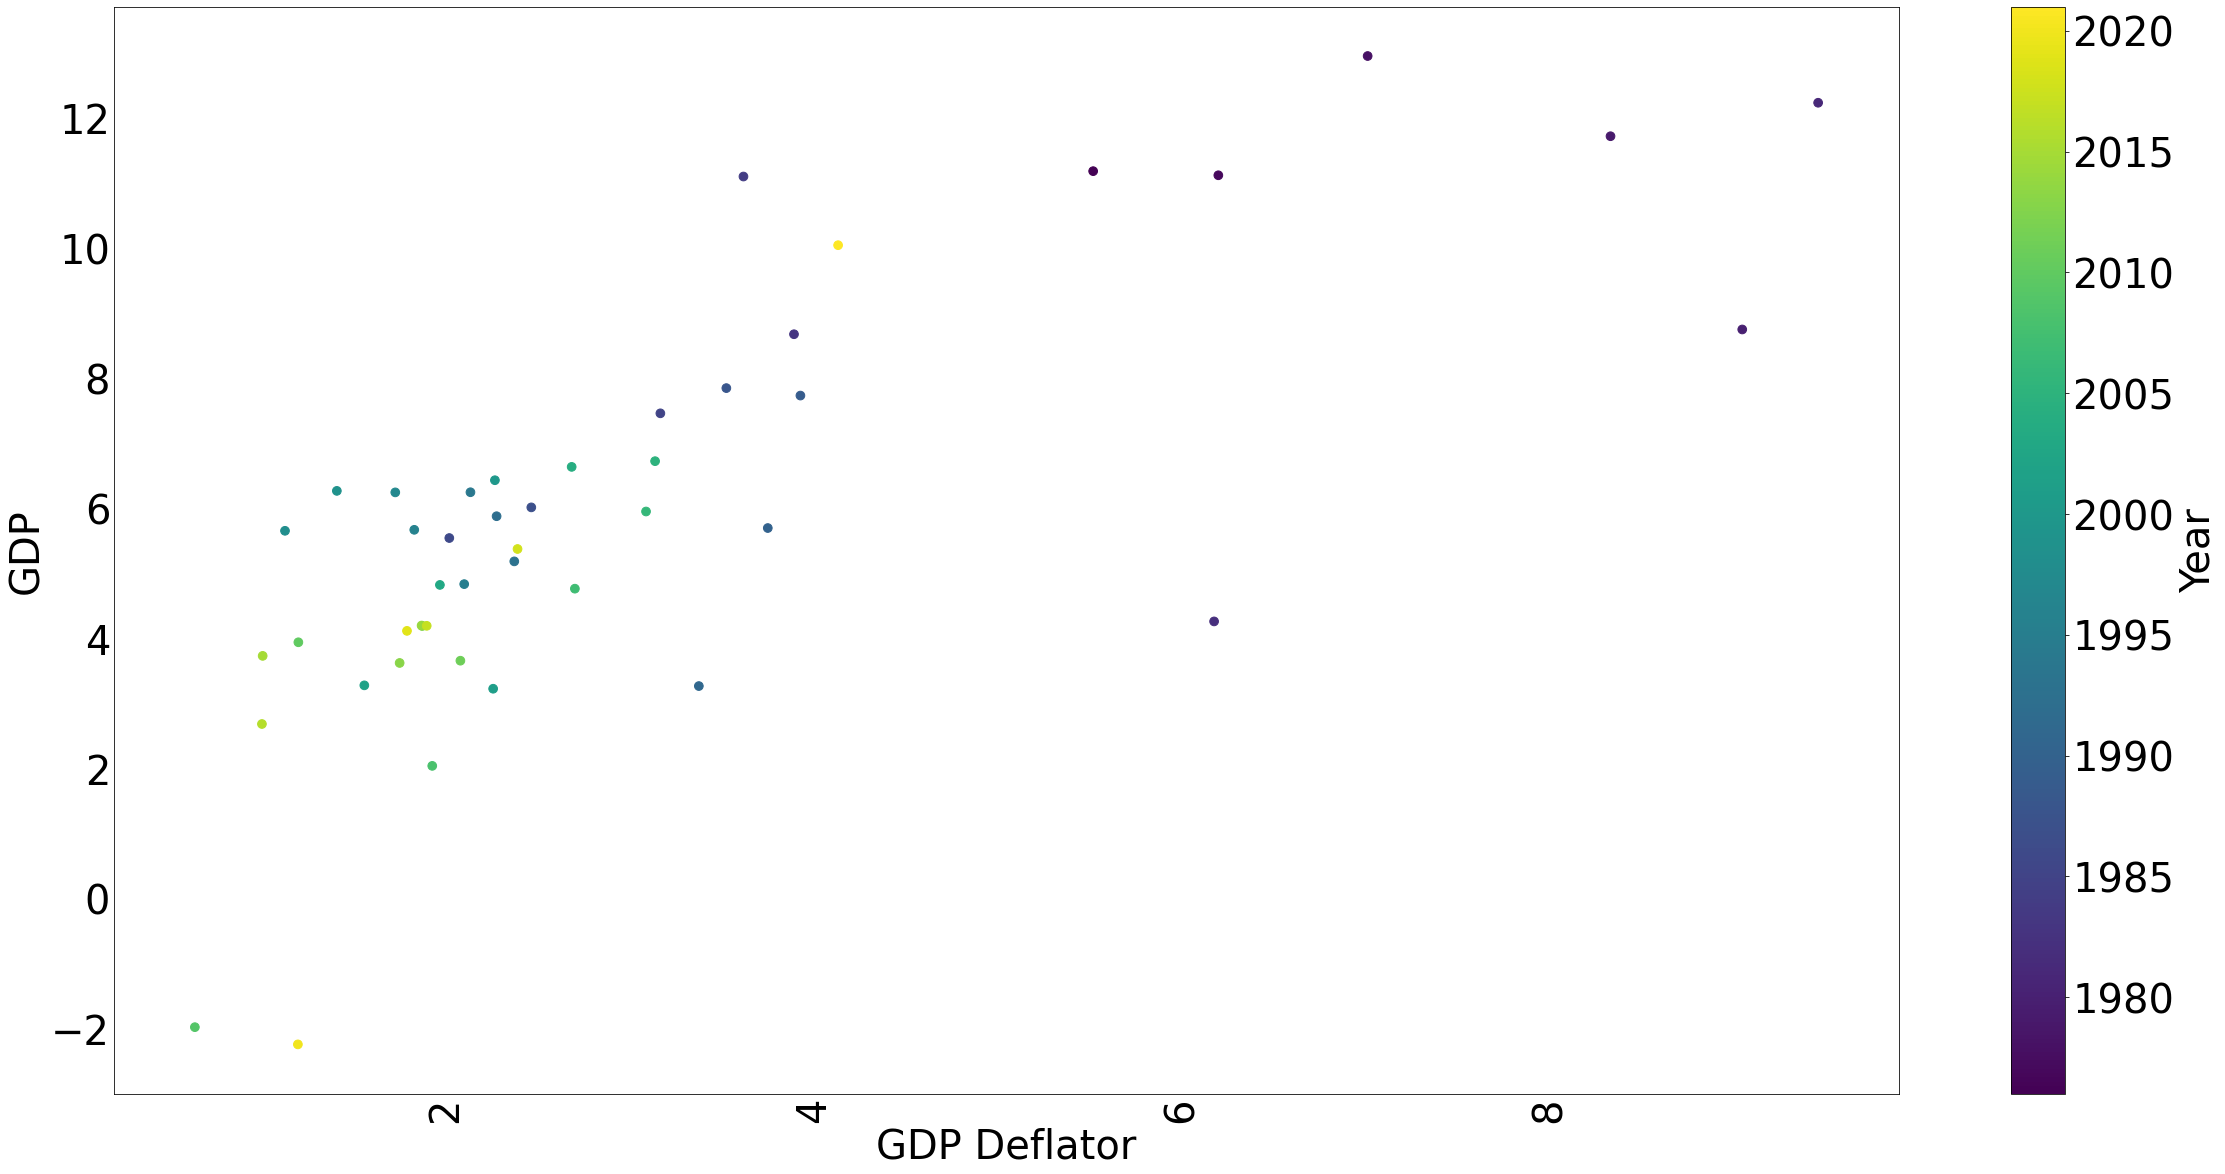

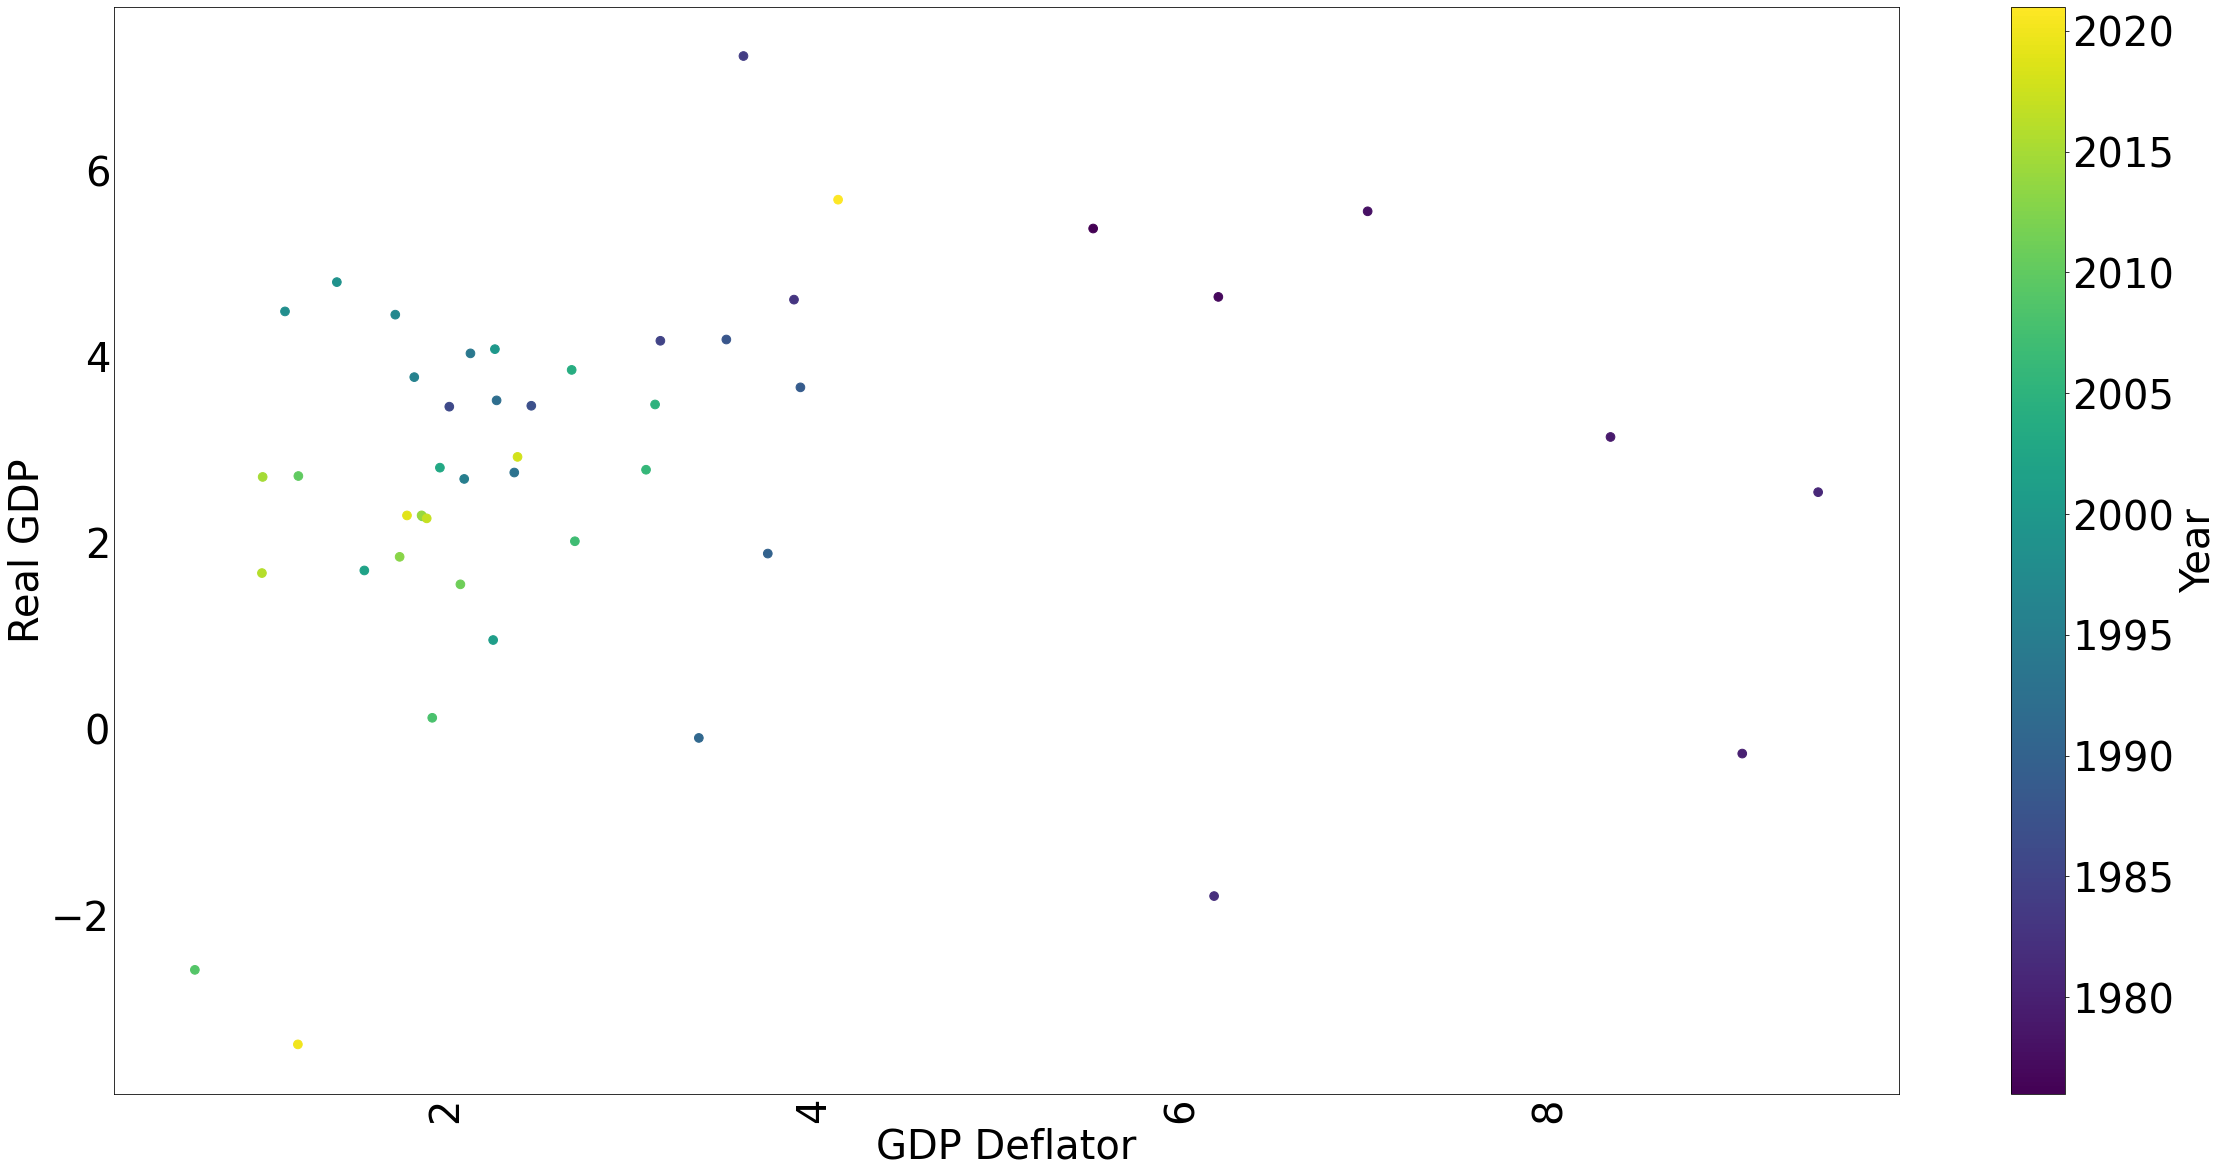

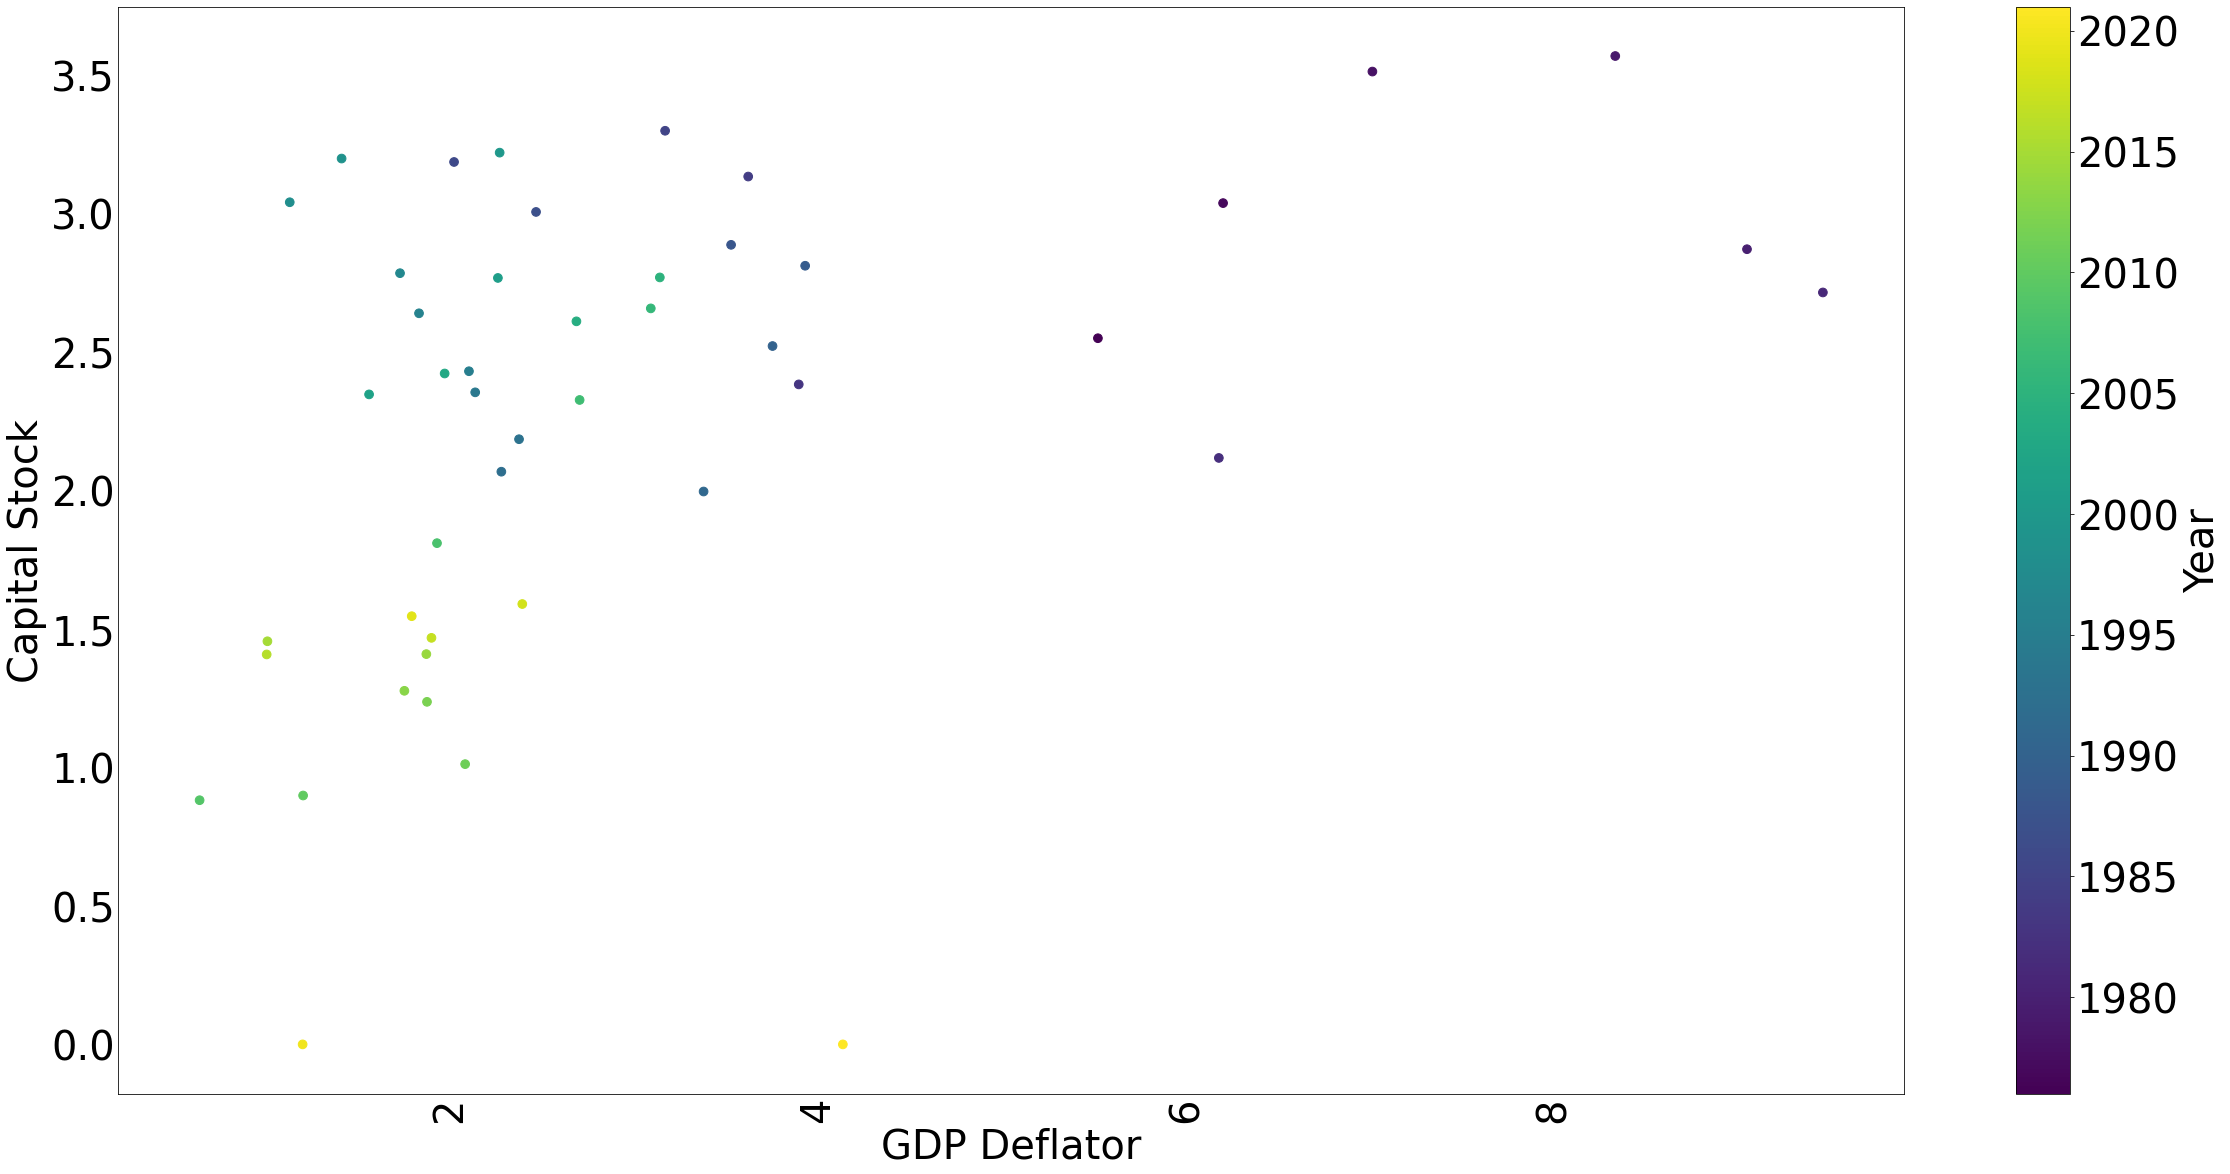

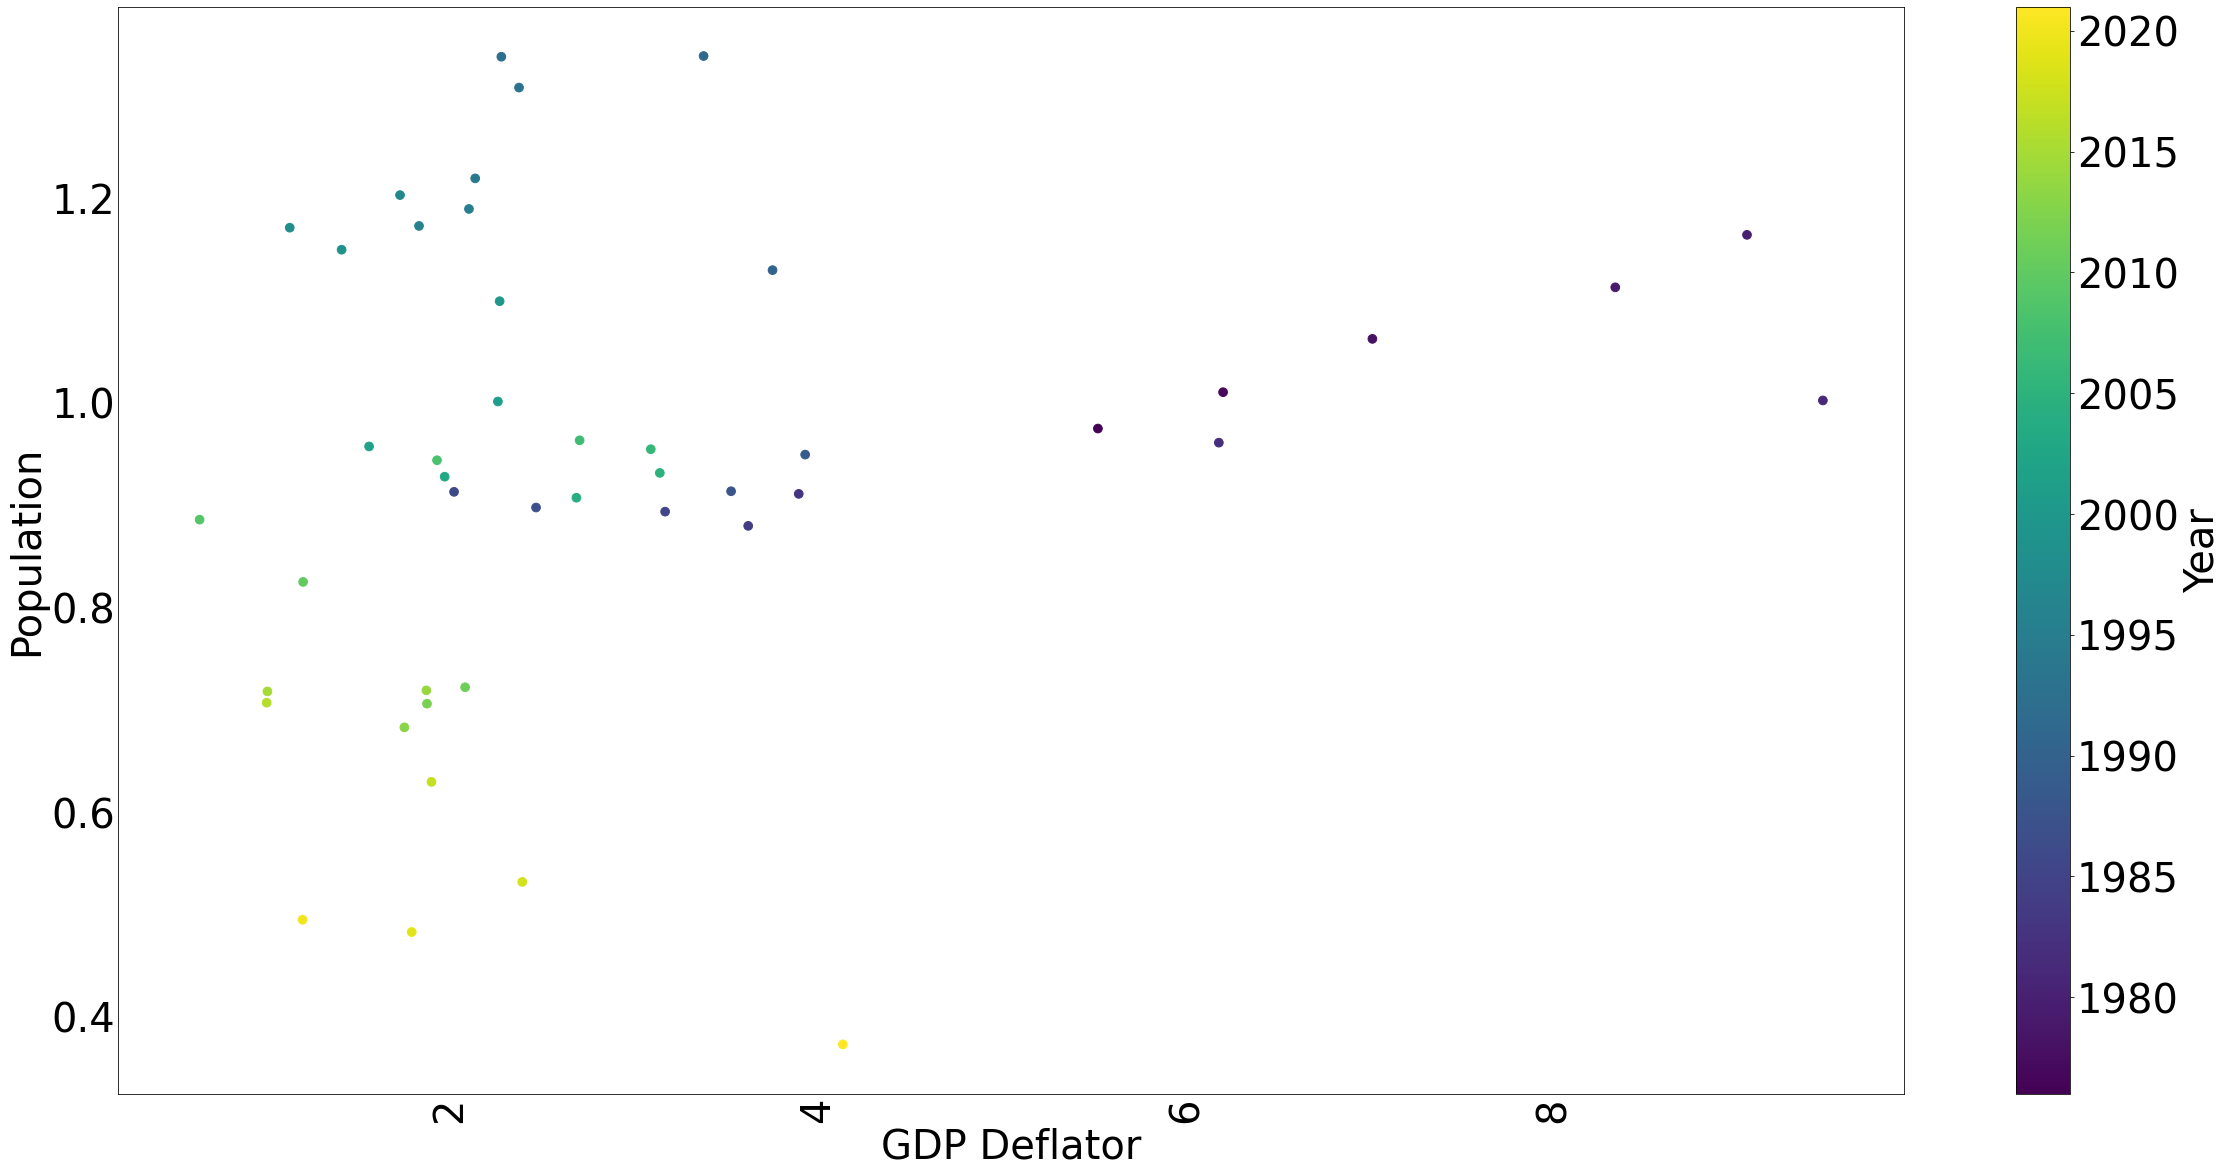

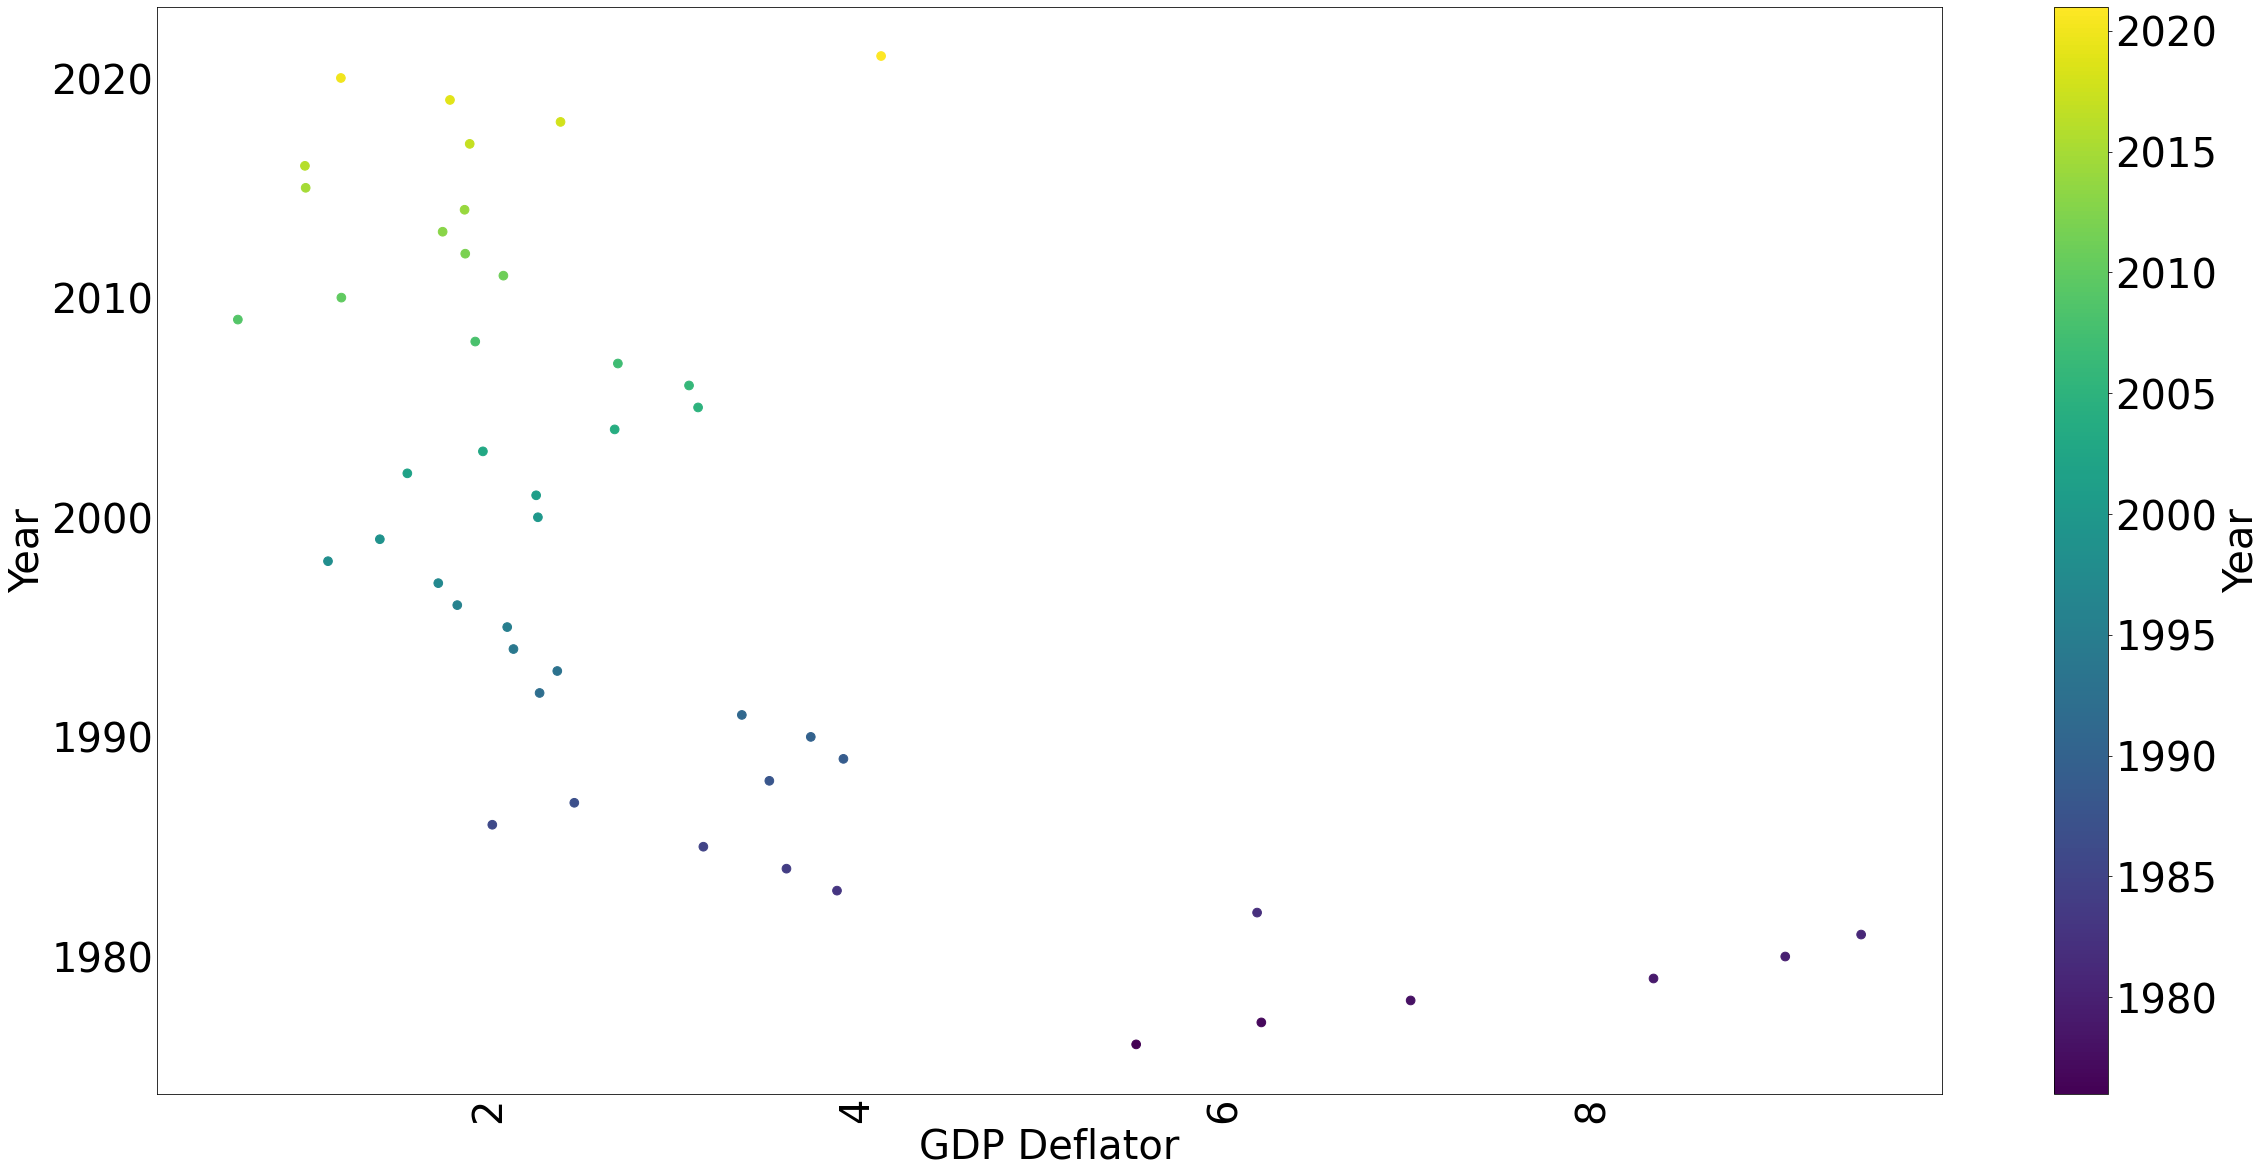

In [10]:
plot_scatter(data.pct_change().mul(100))

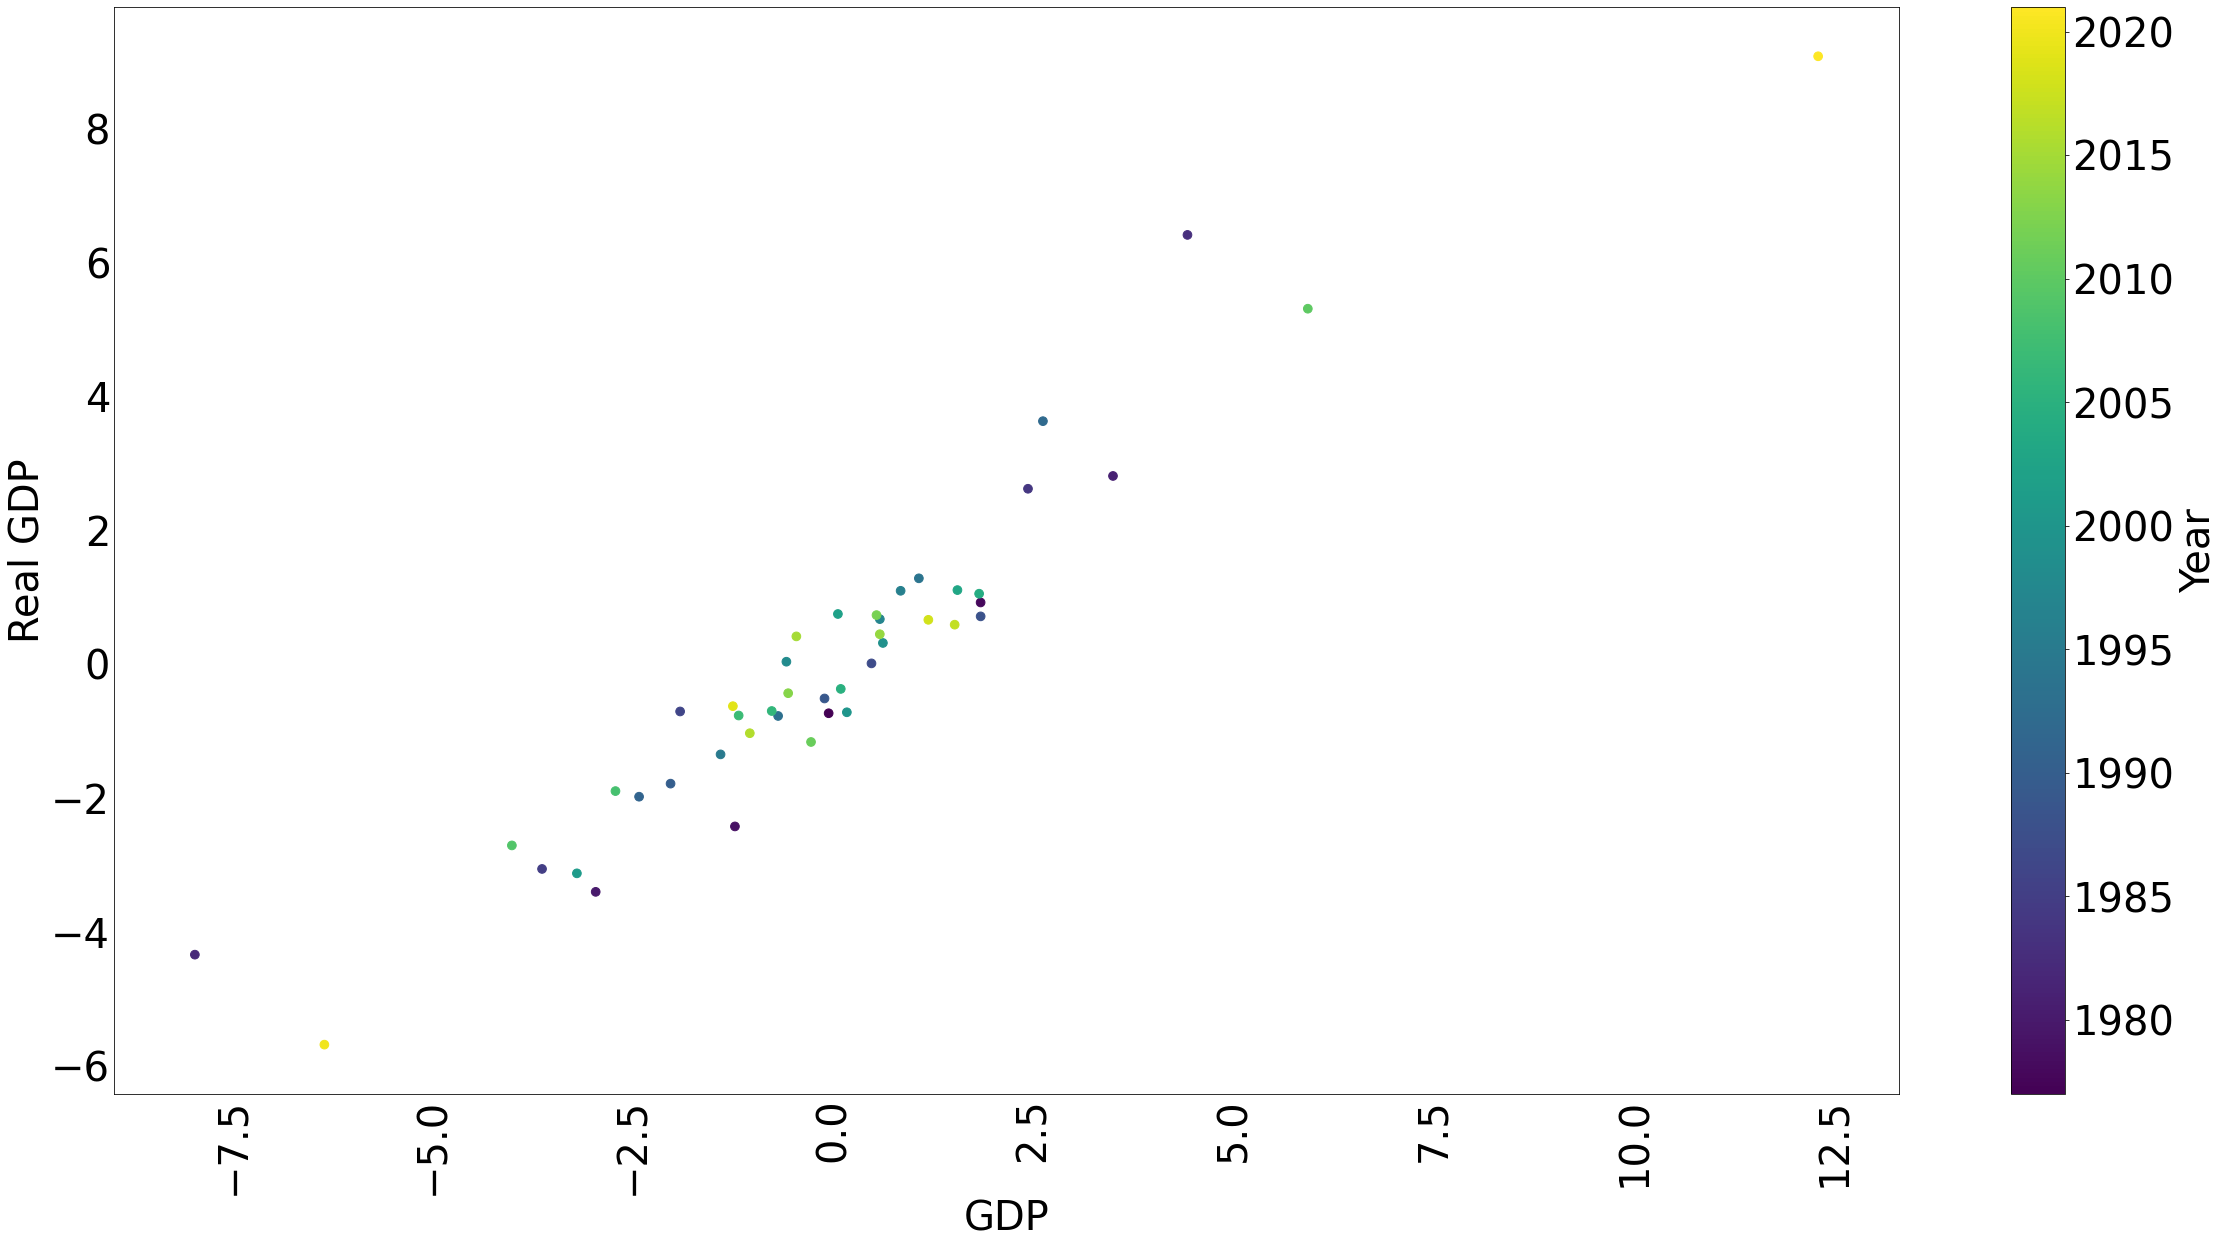

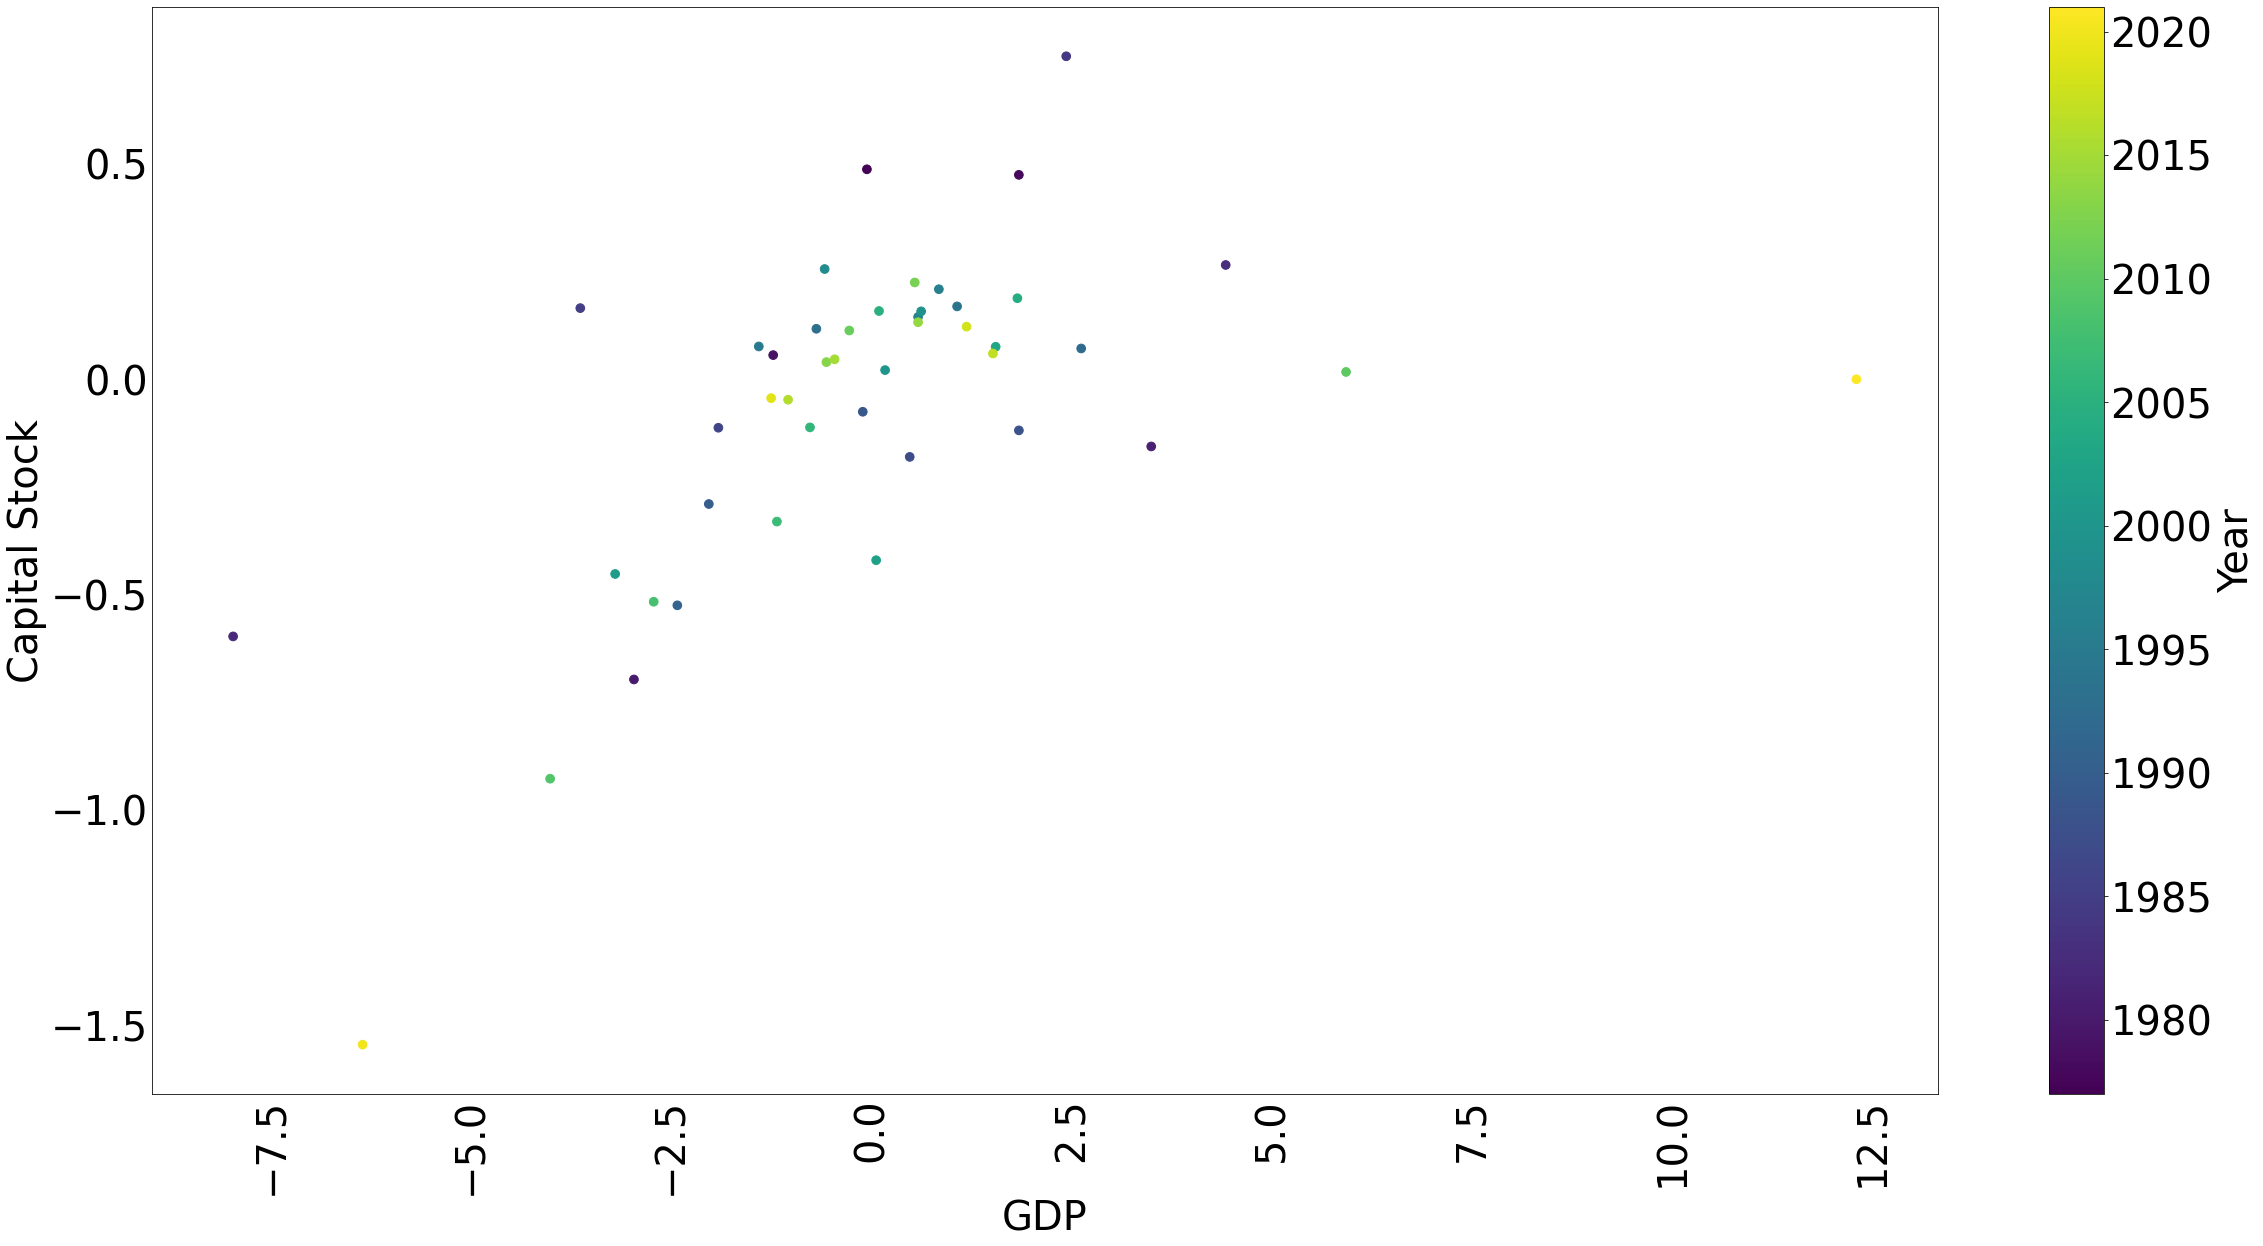

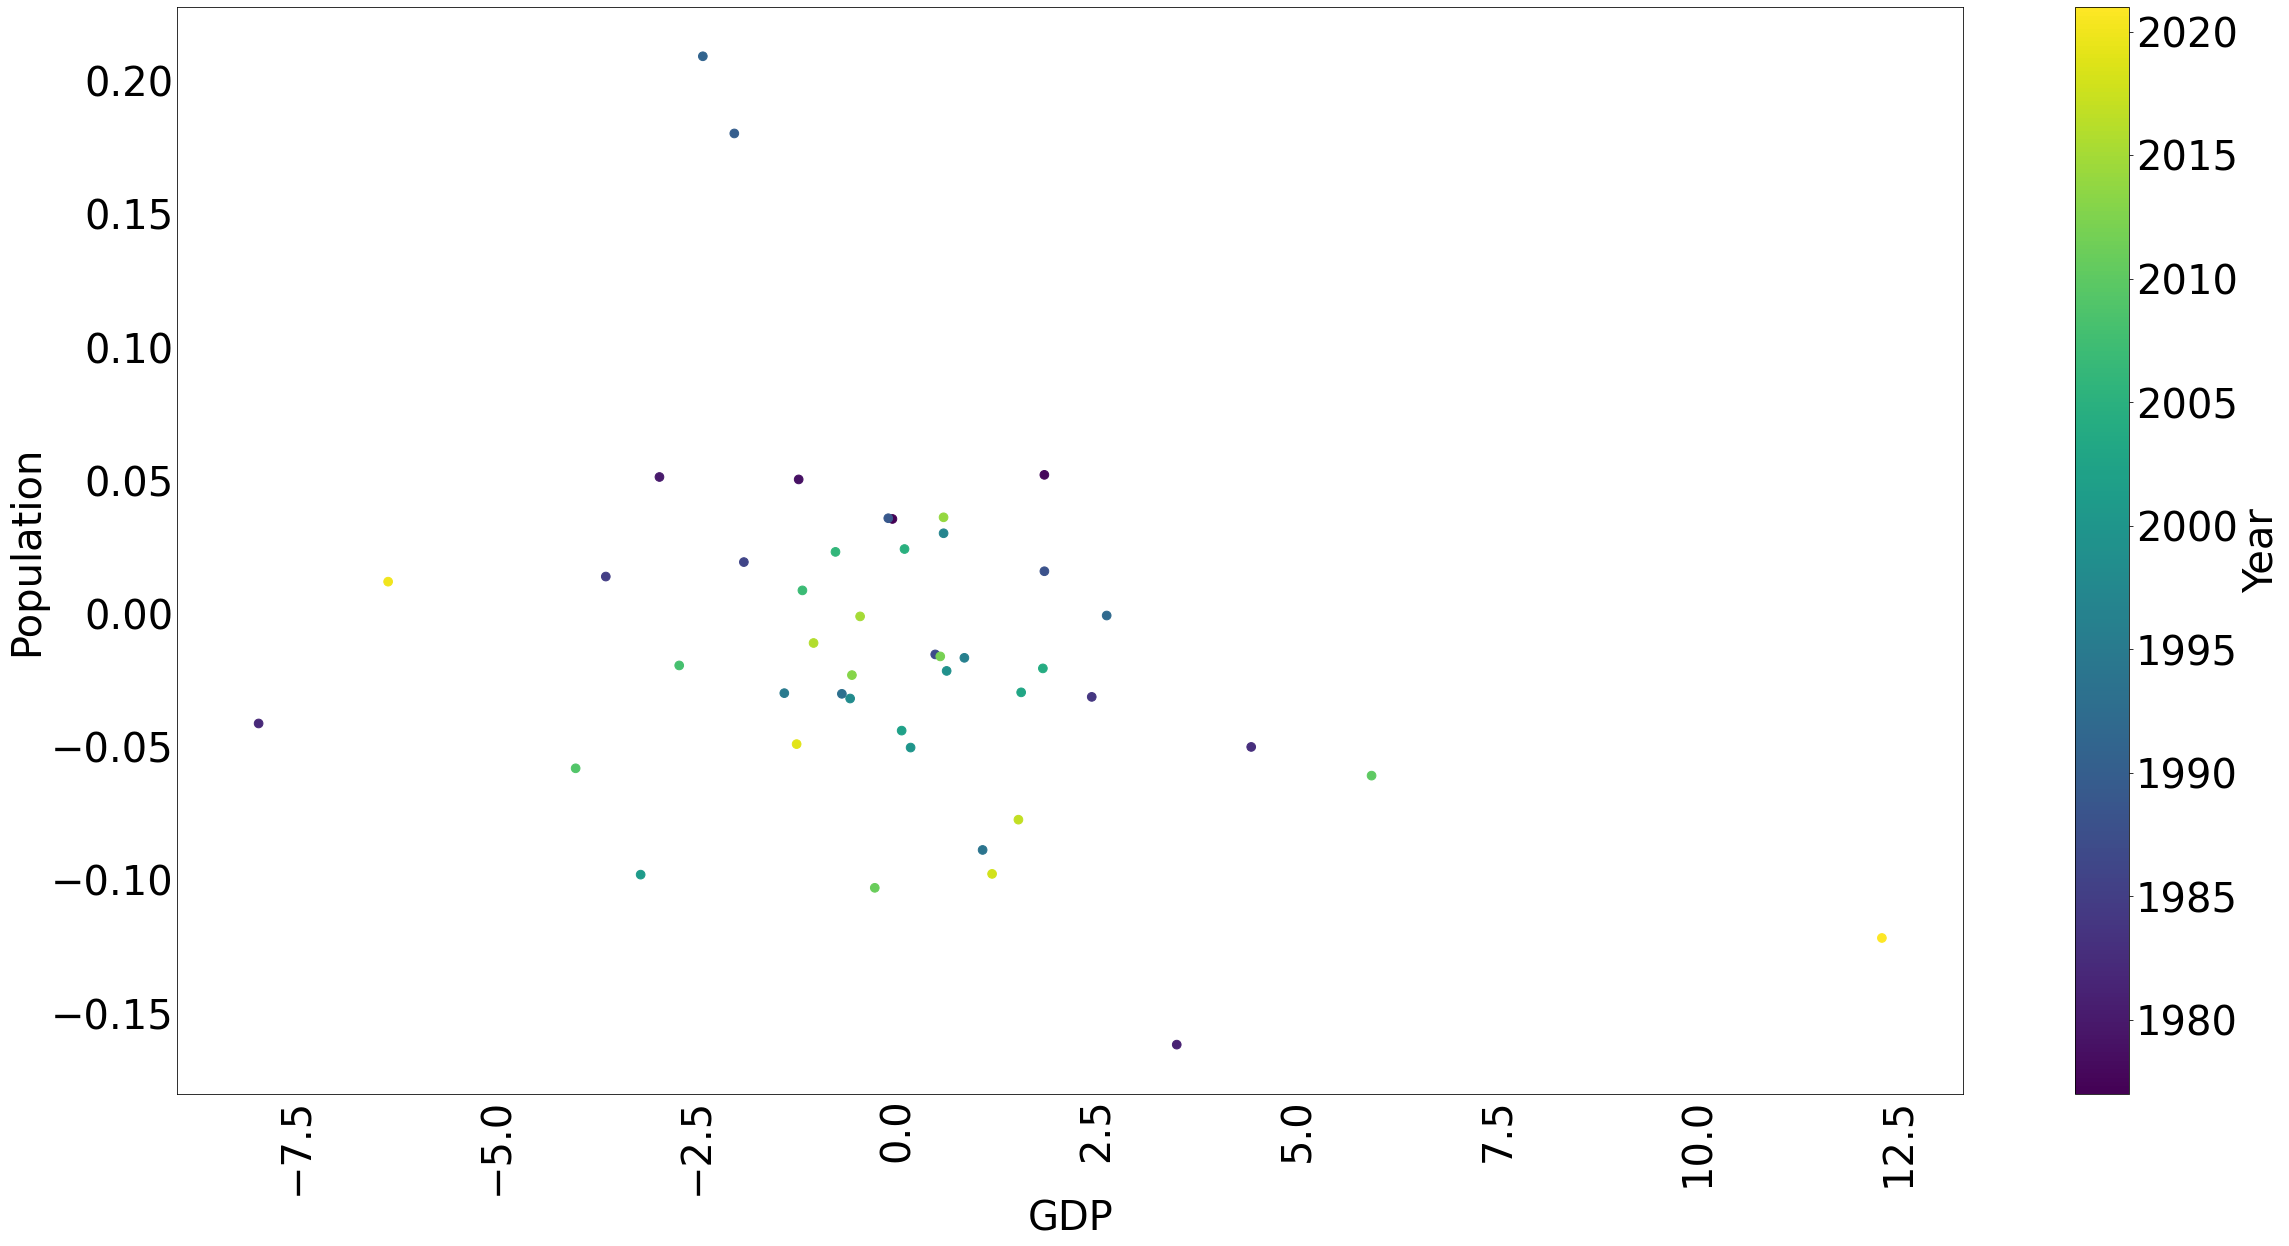

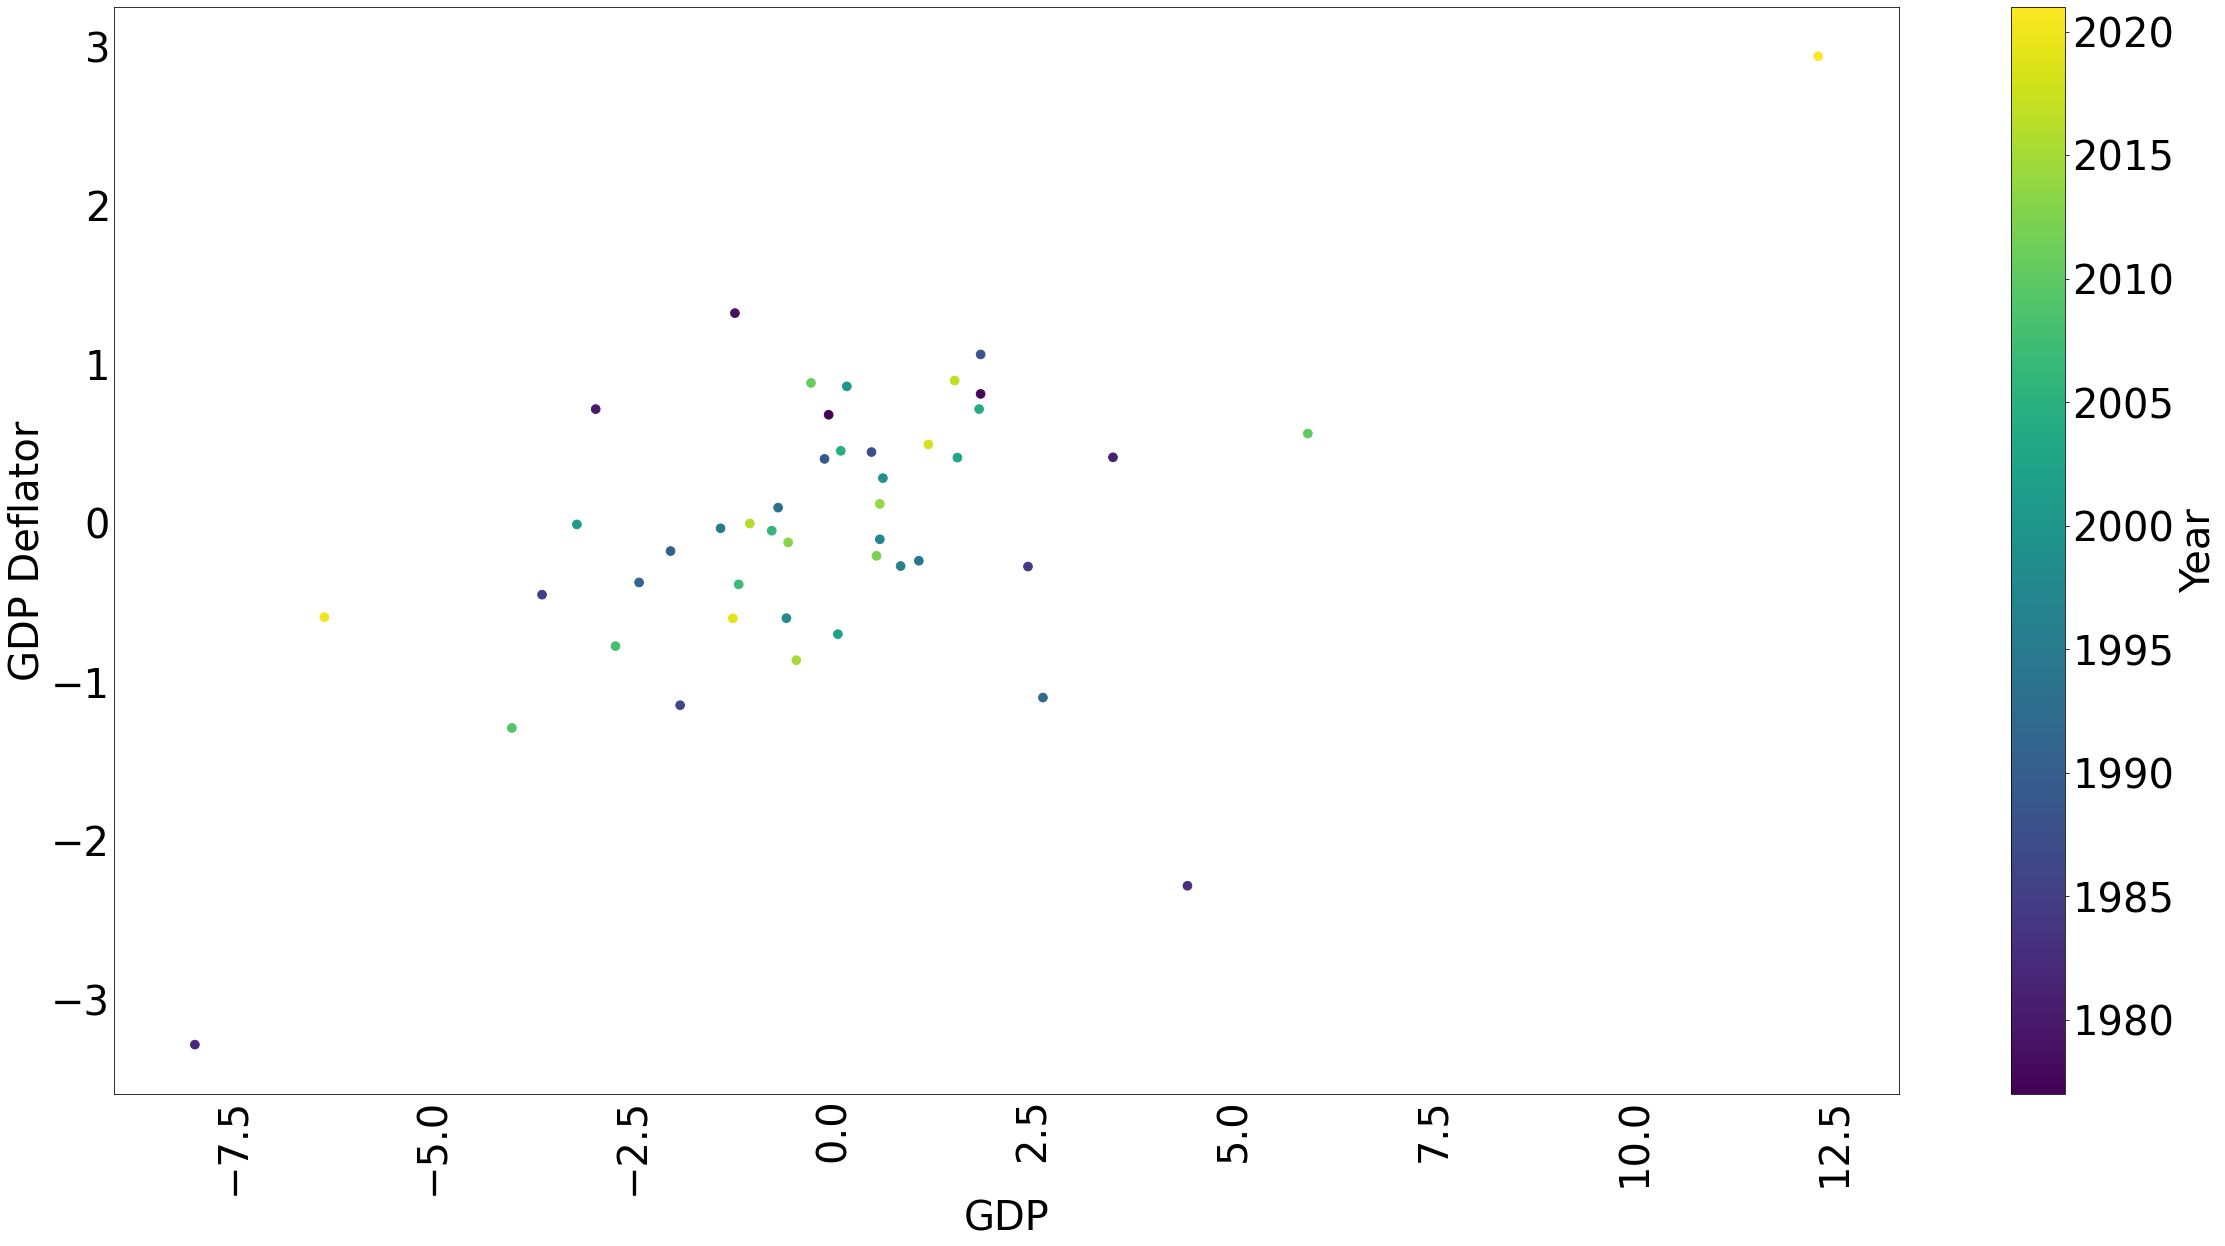

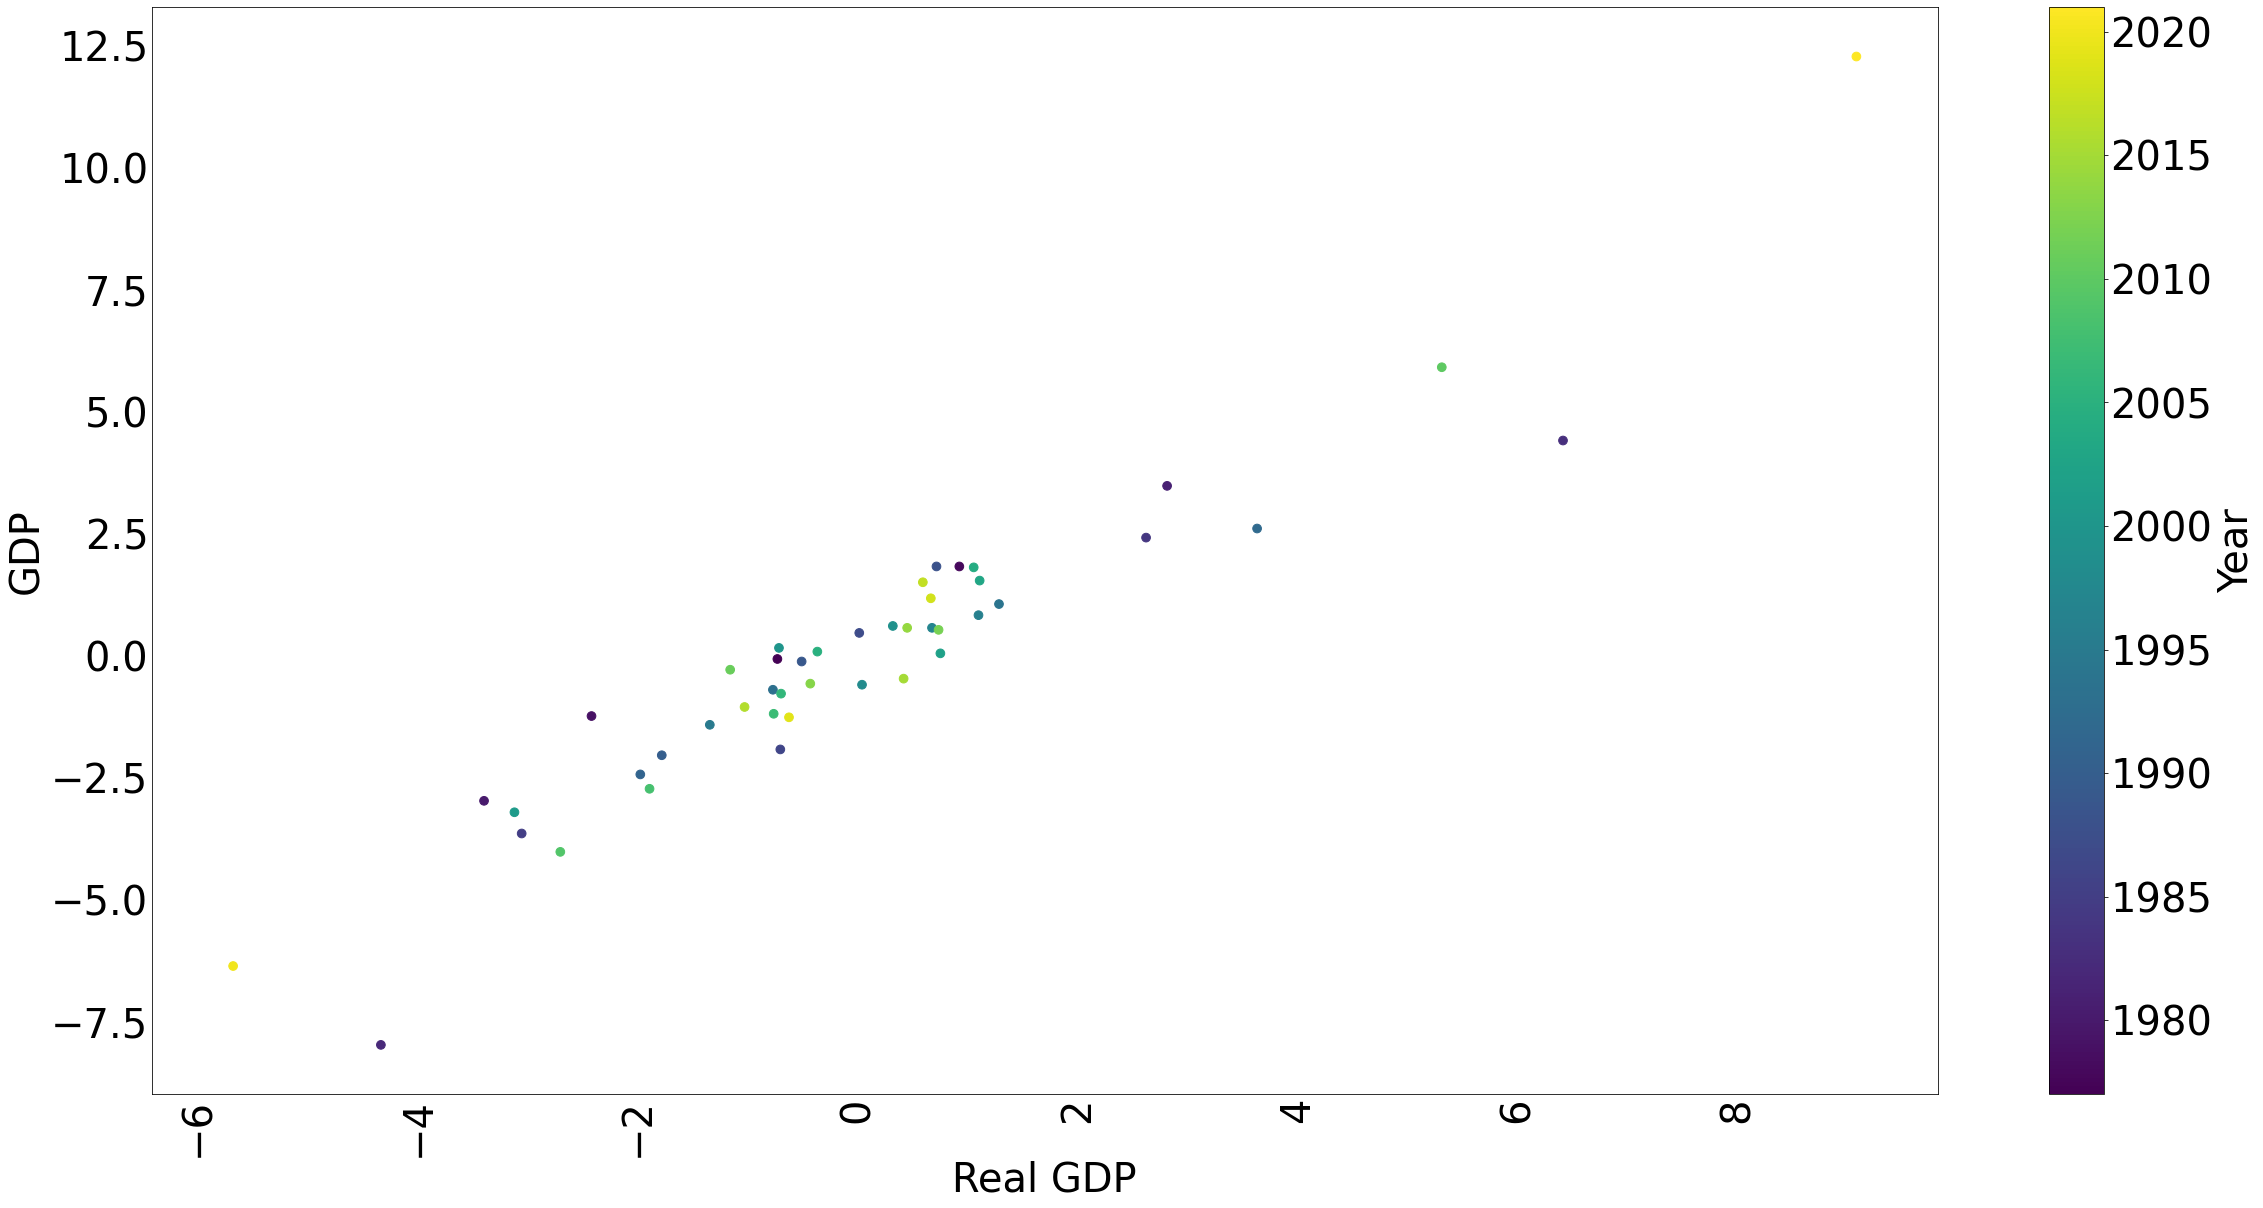

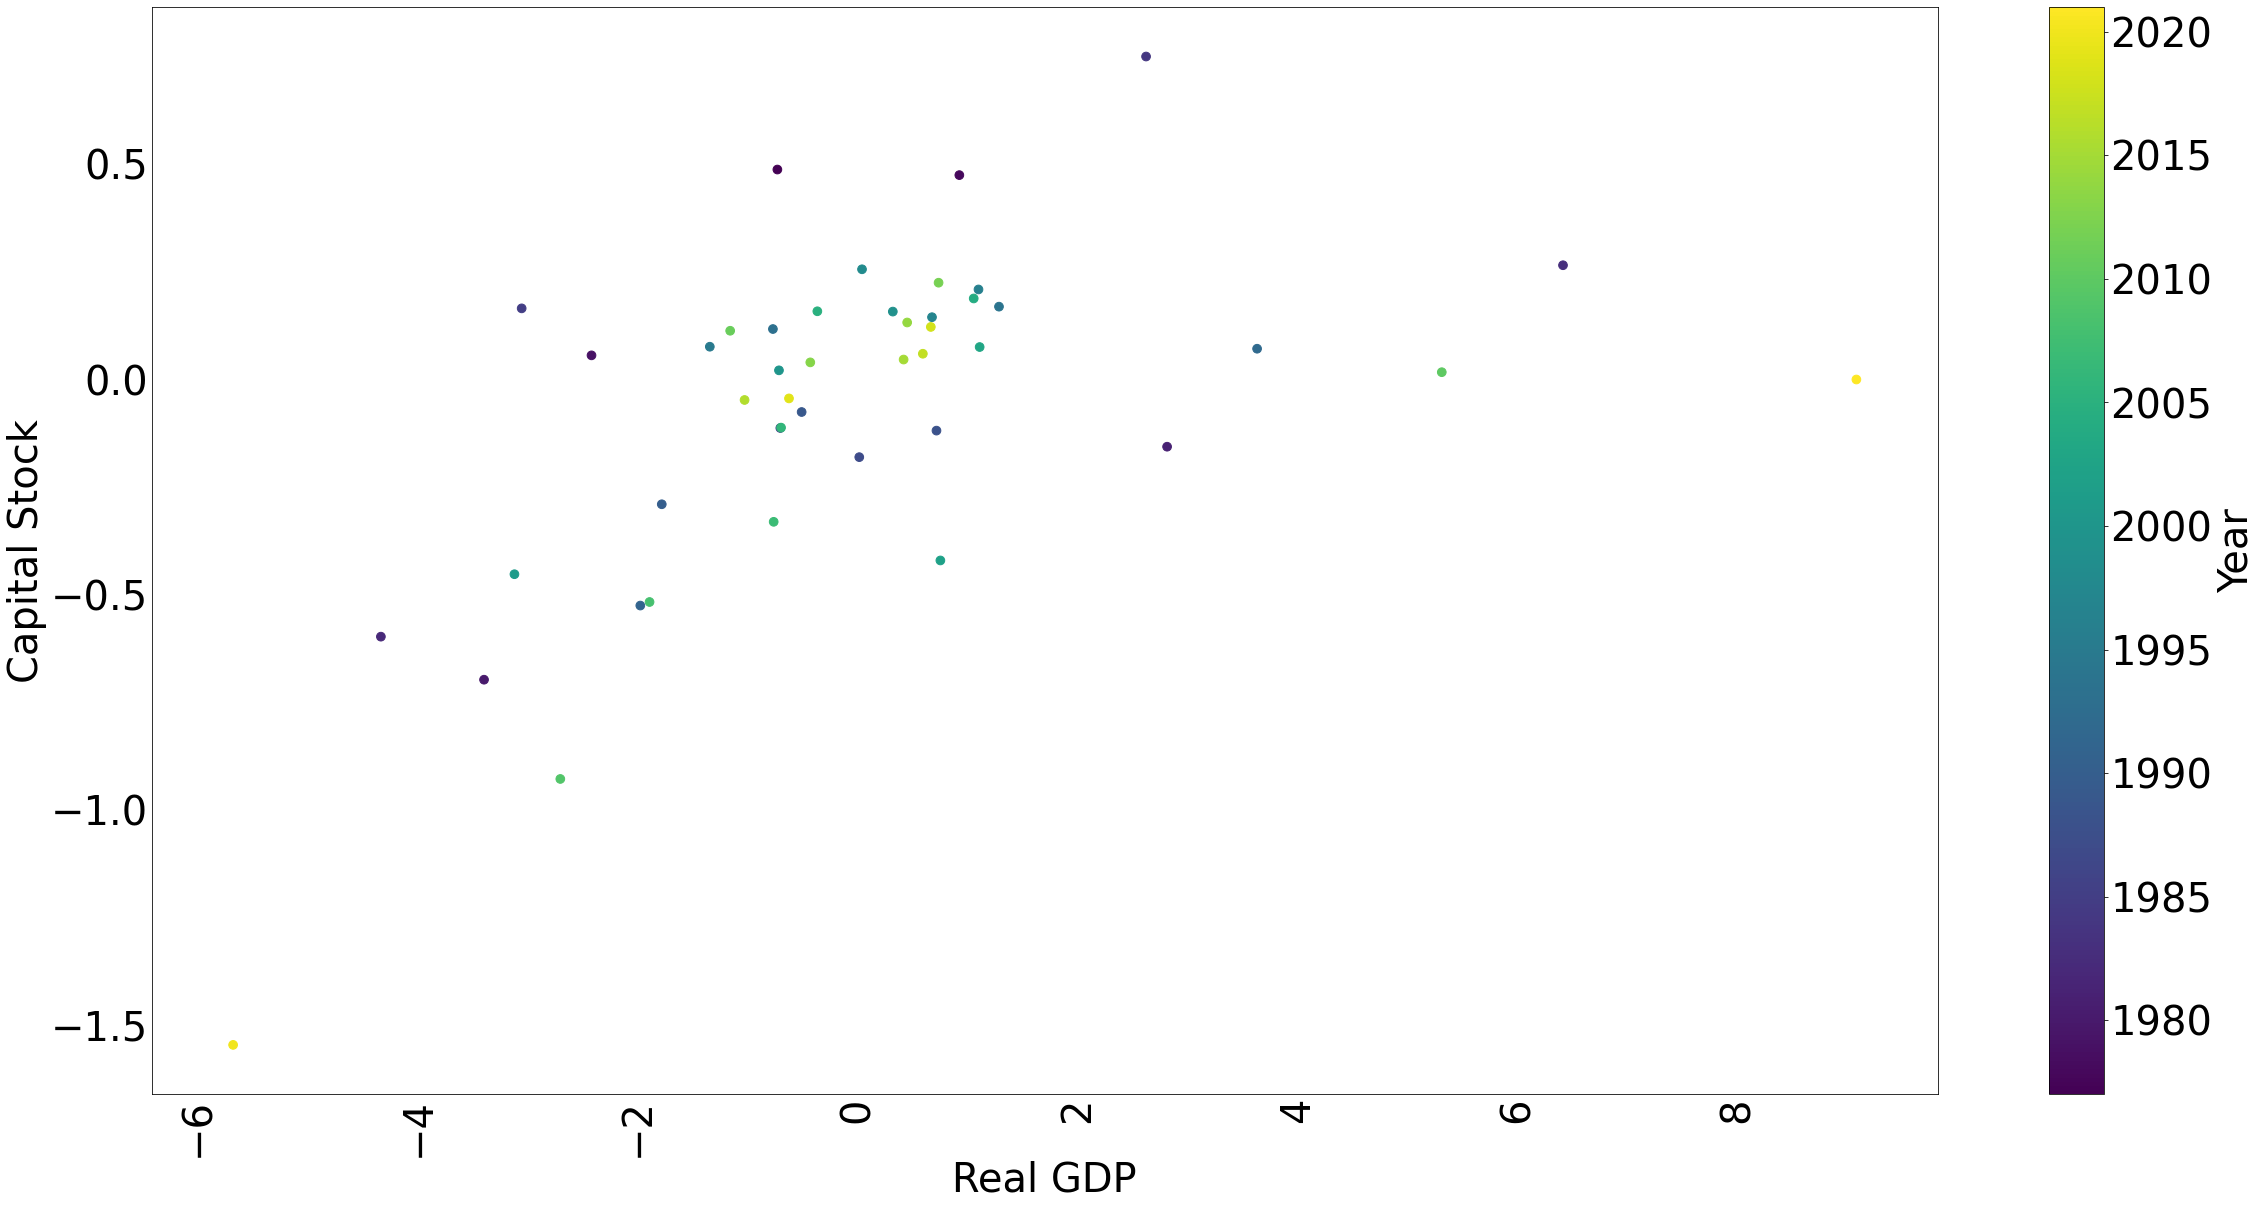

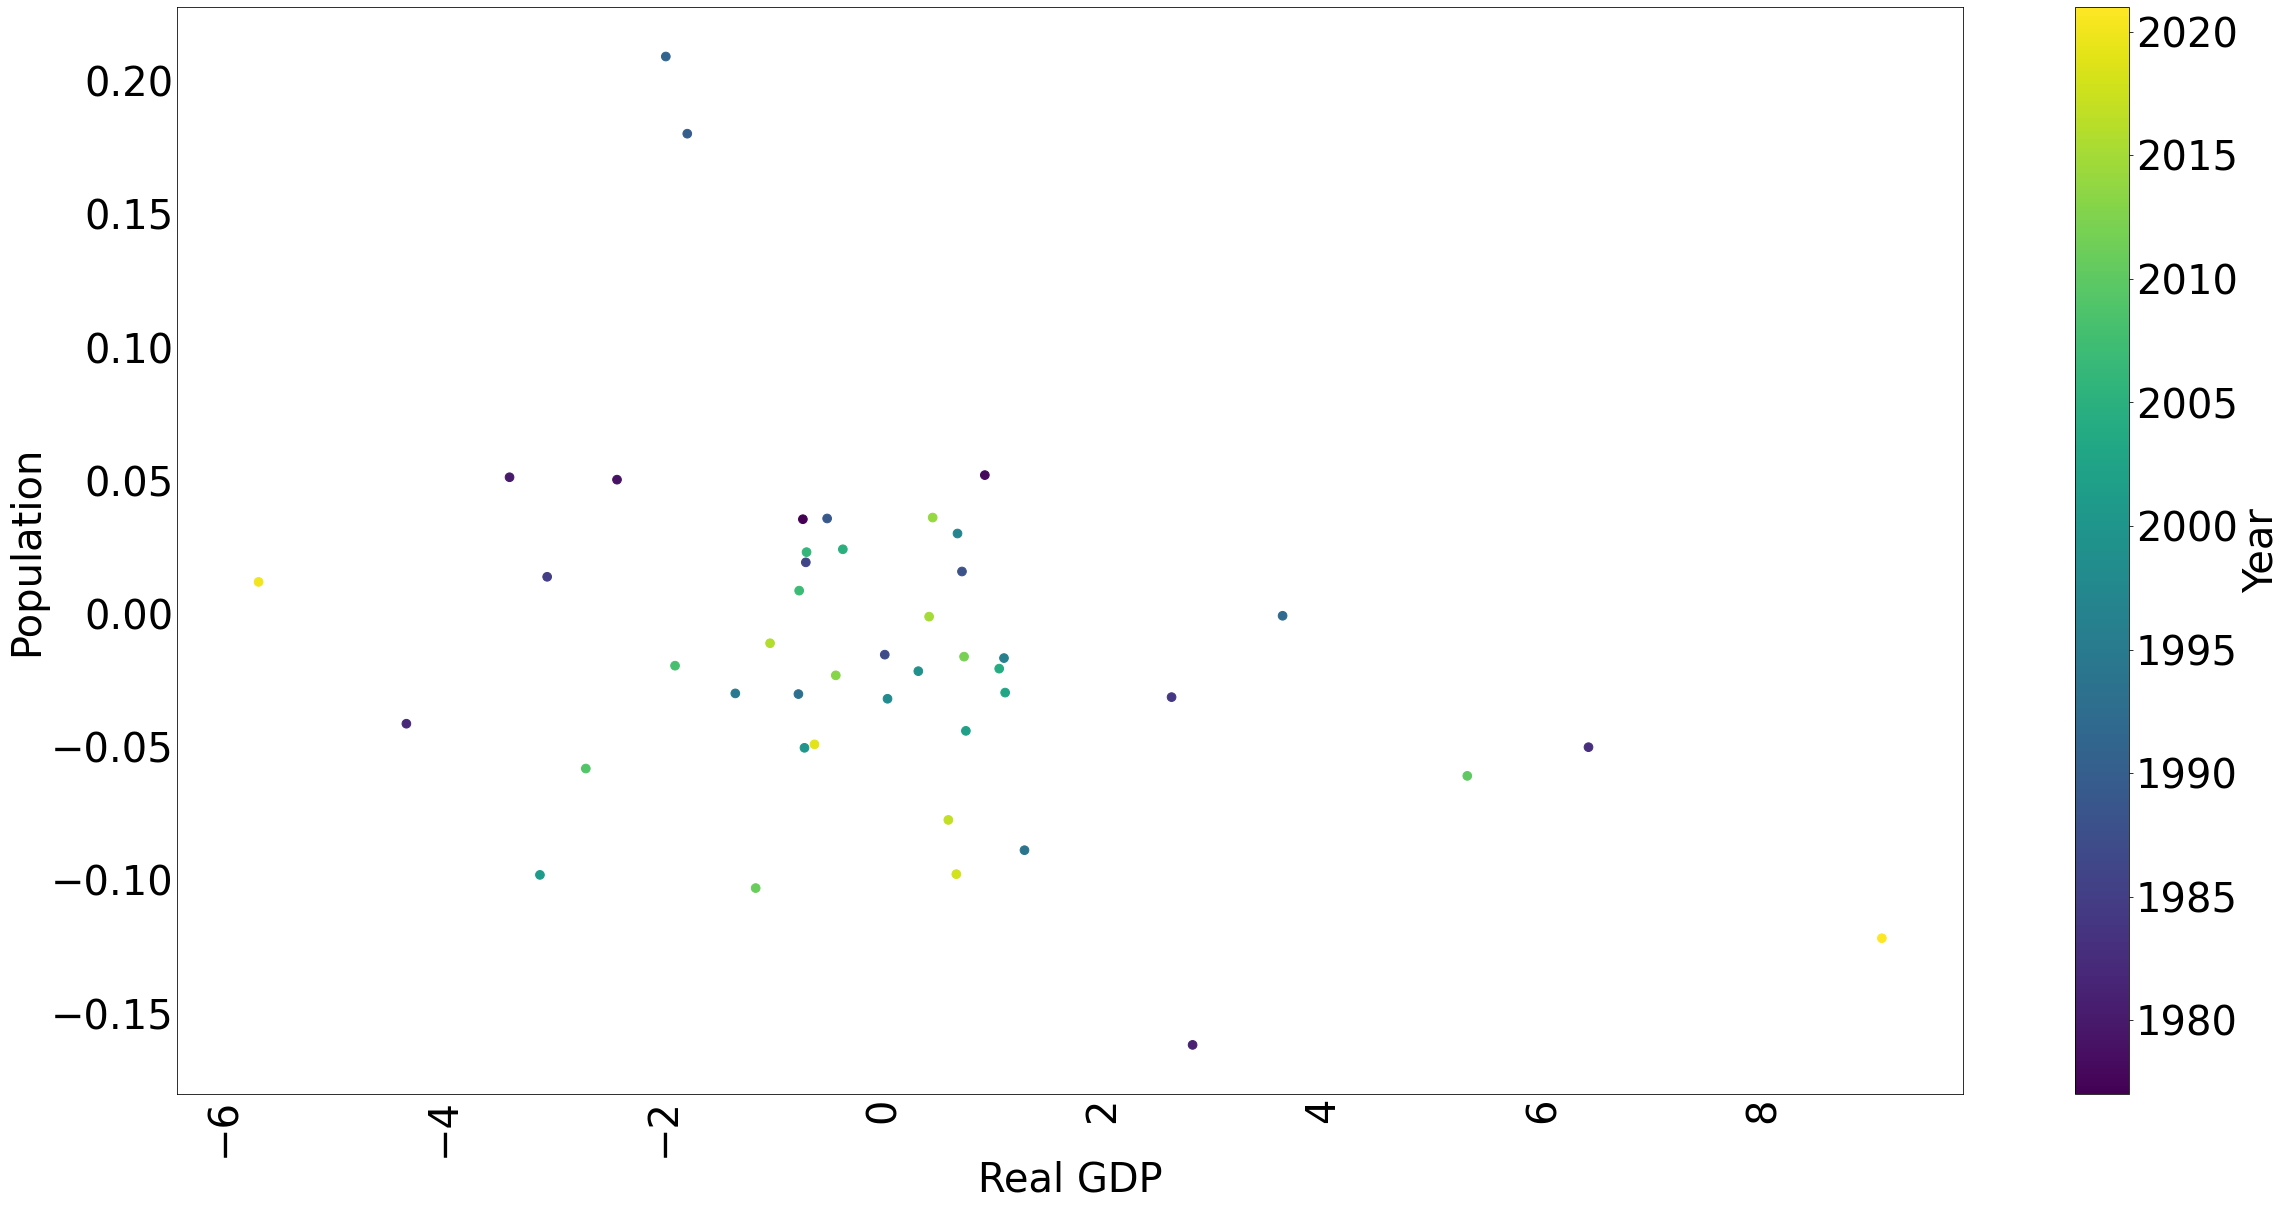

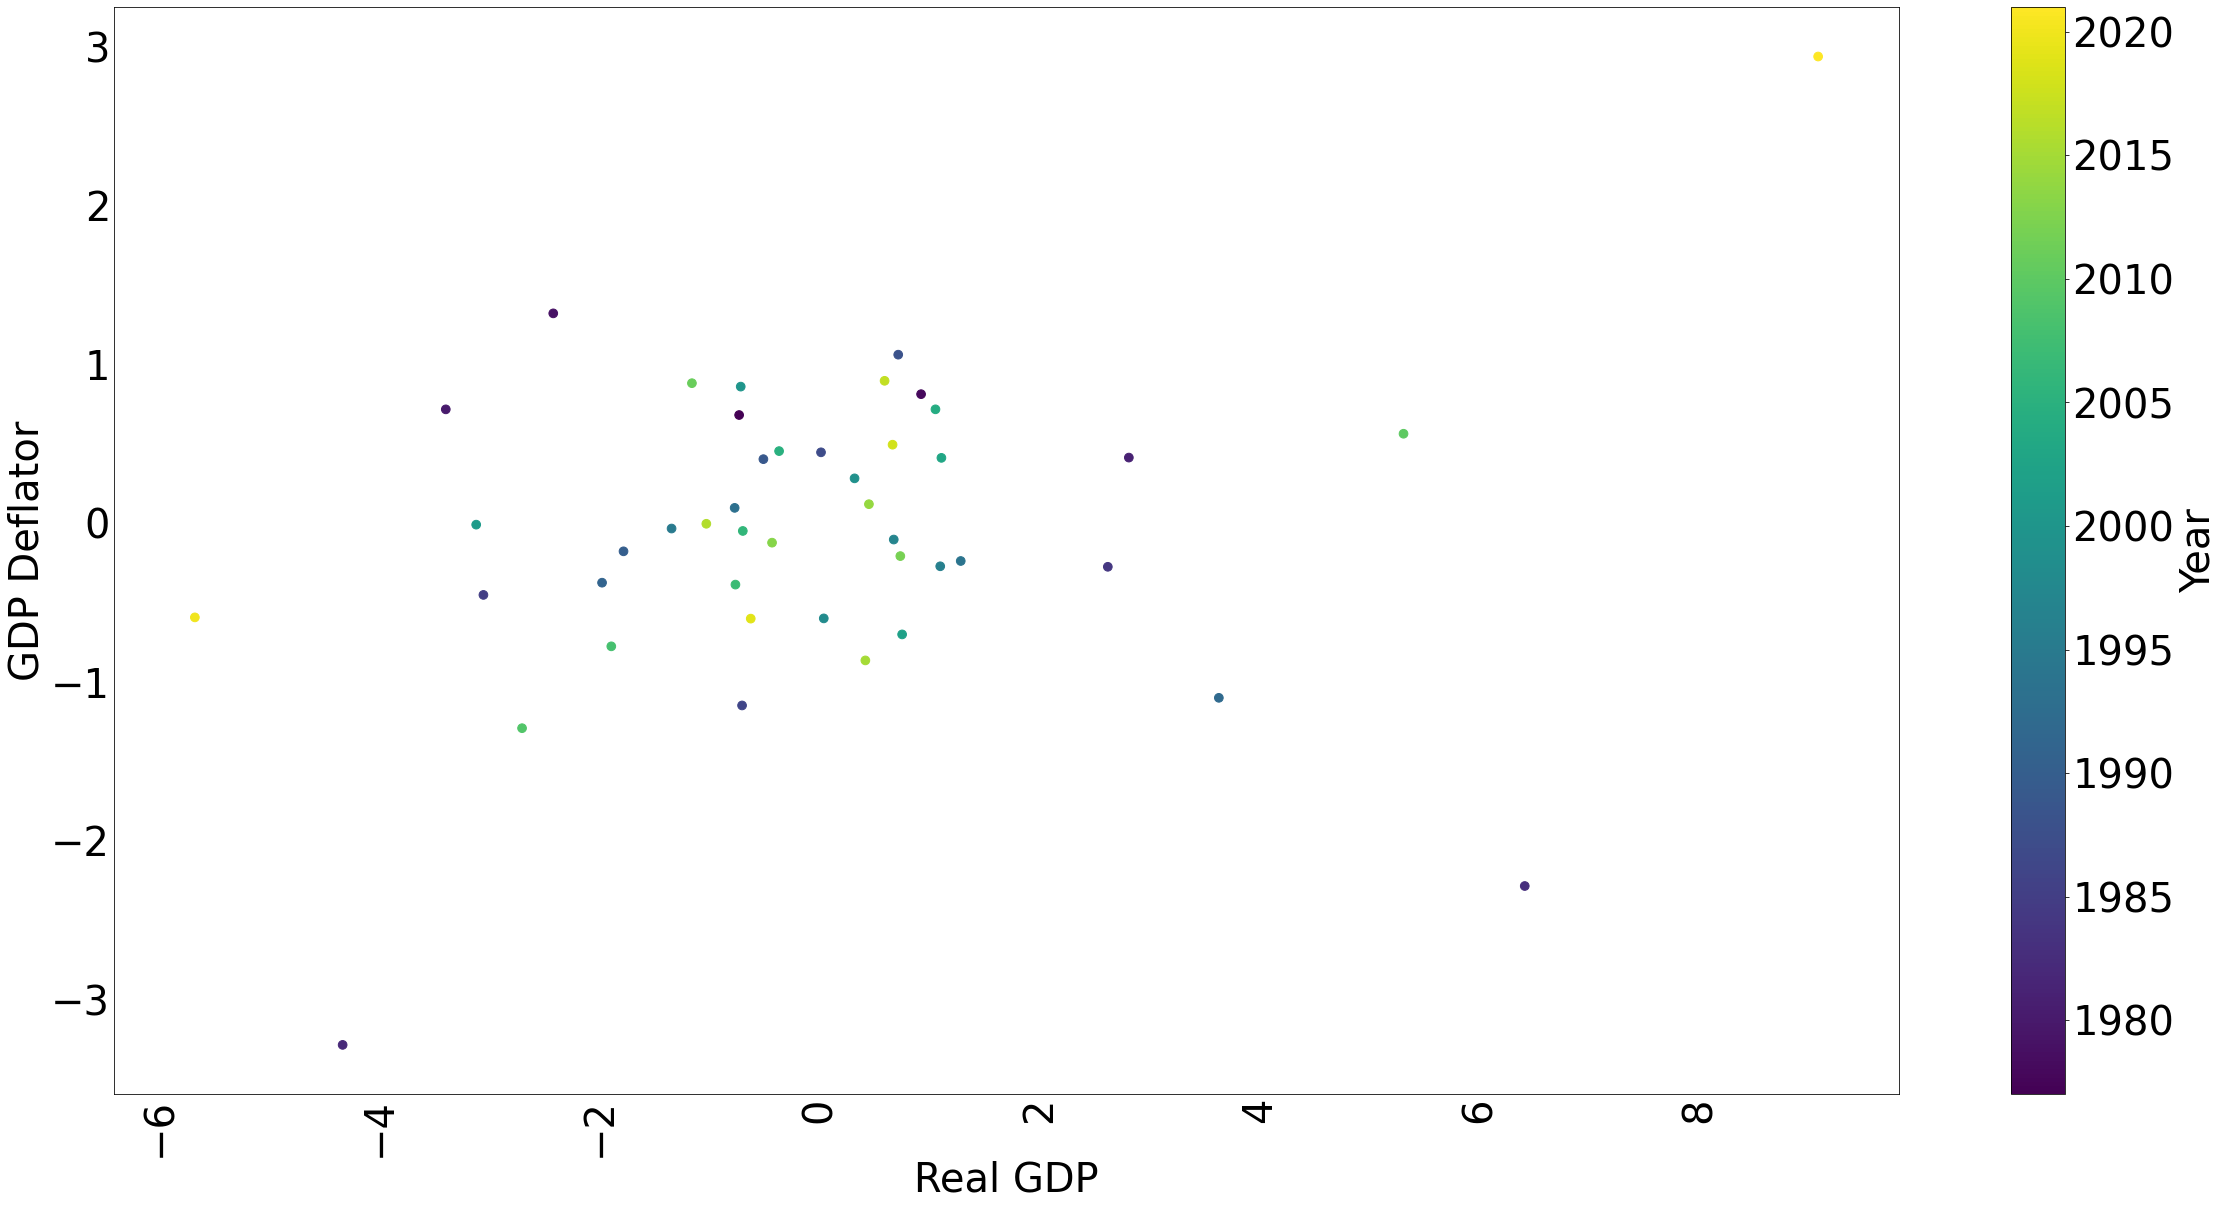

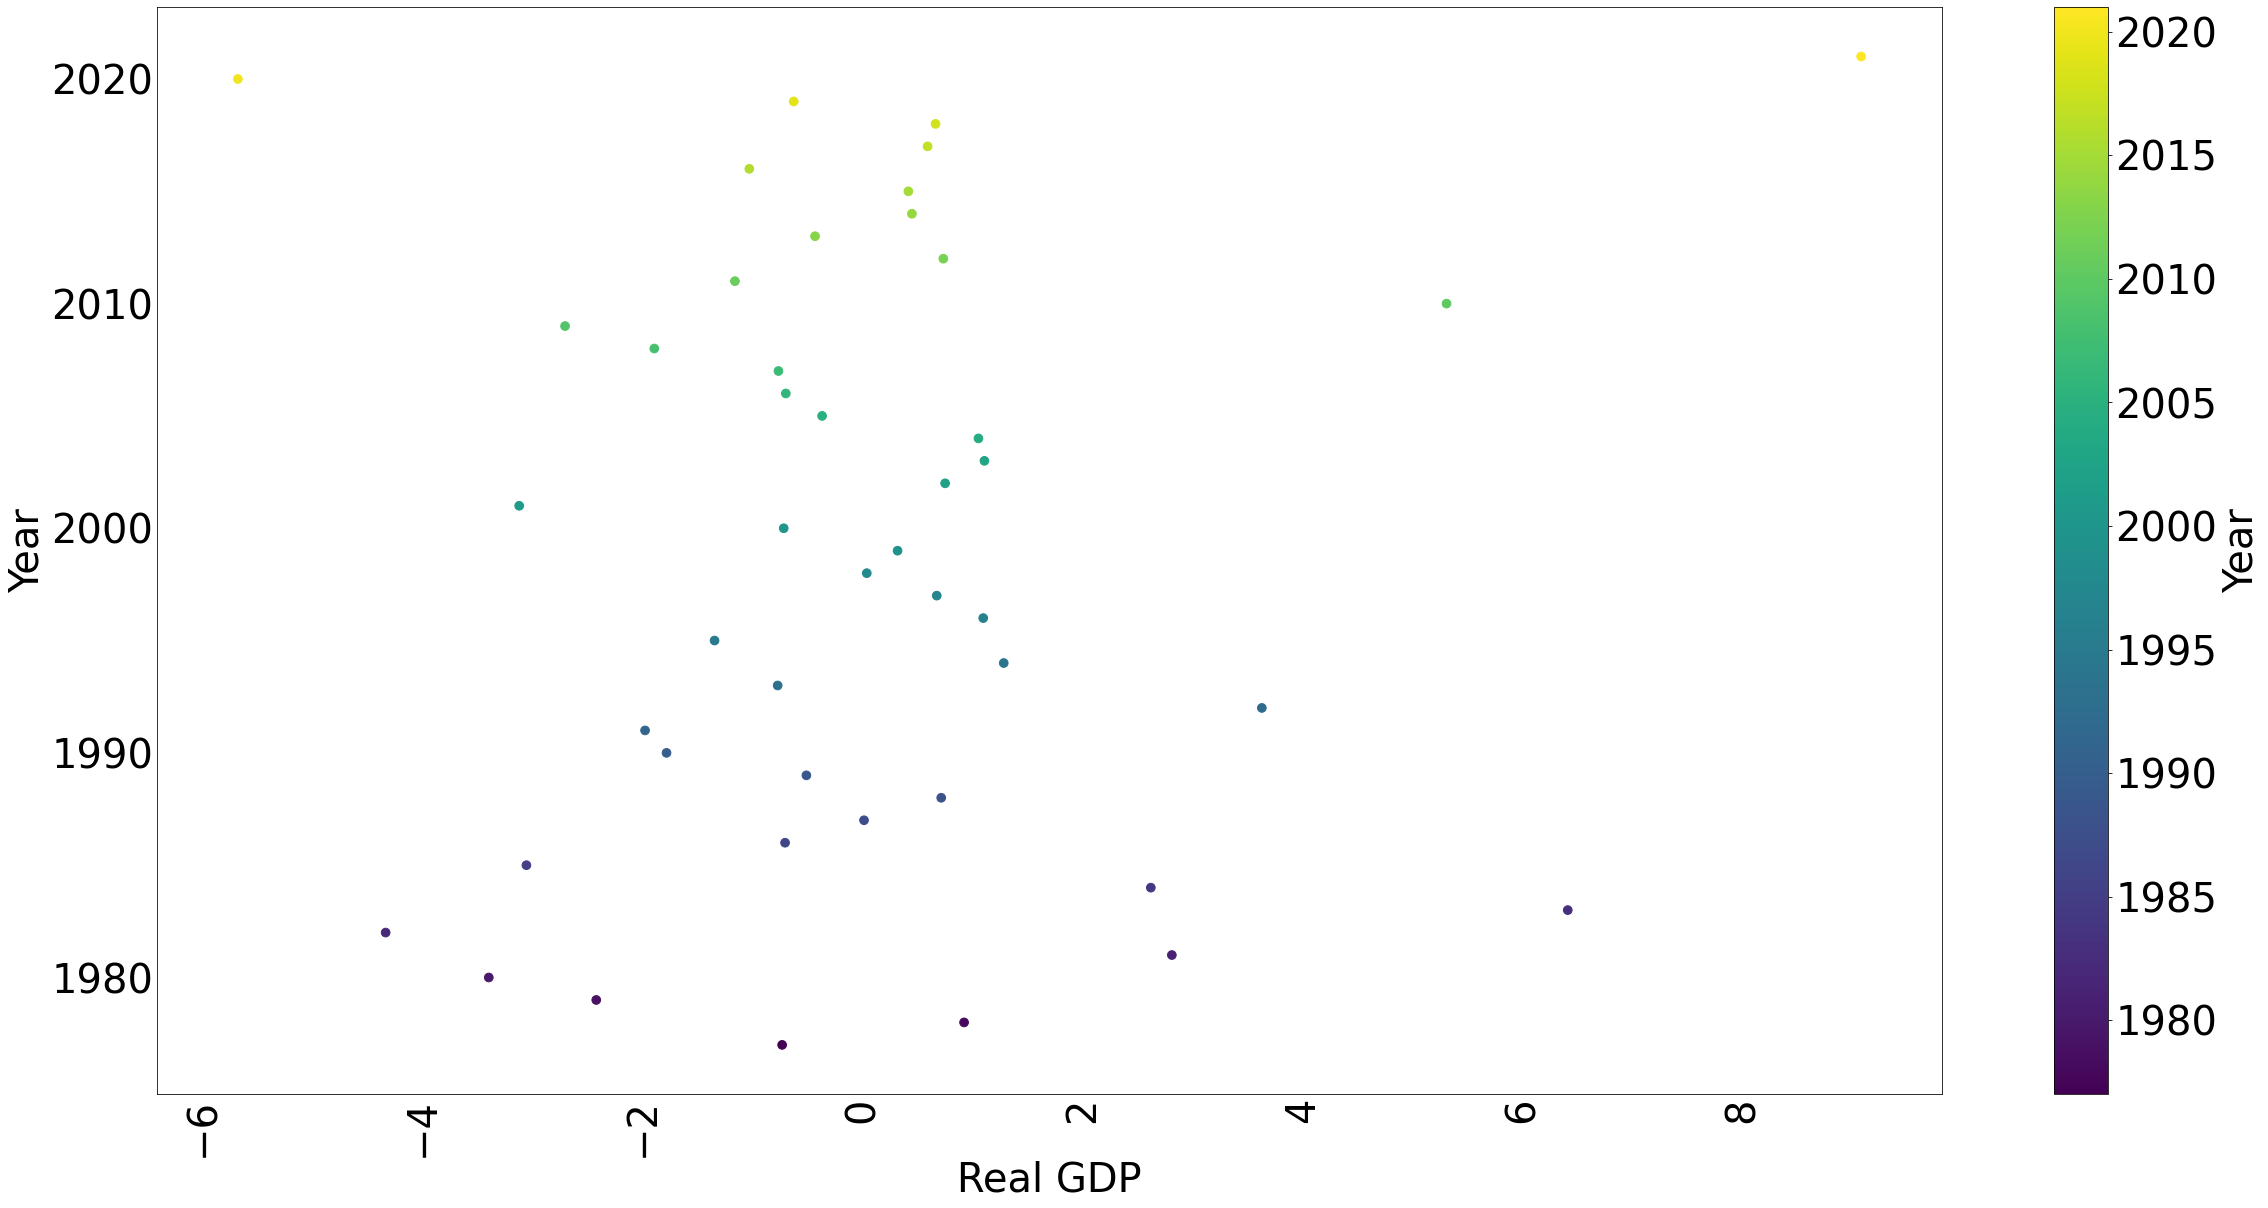

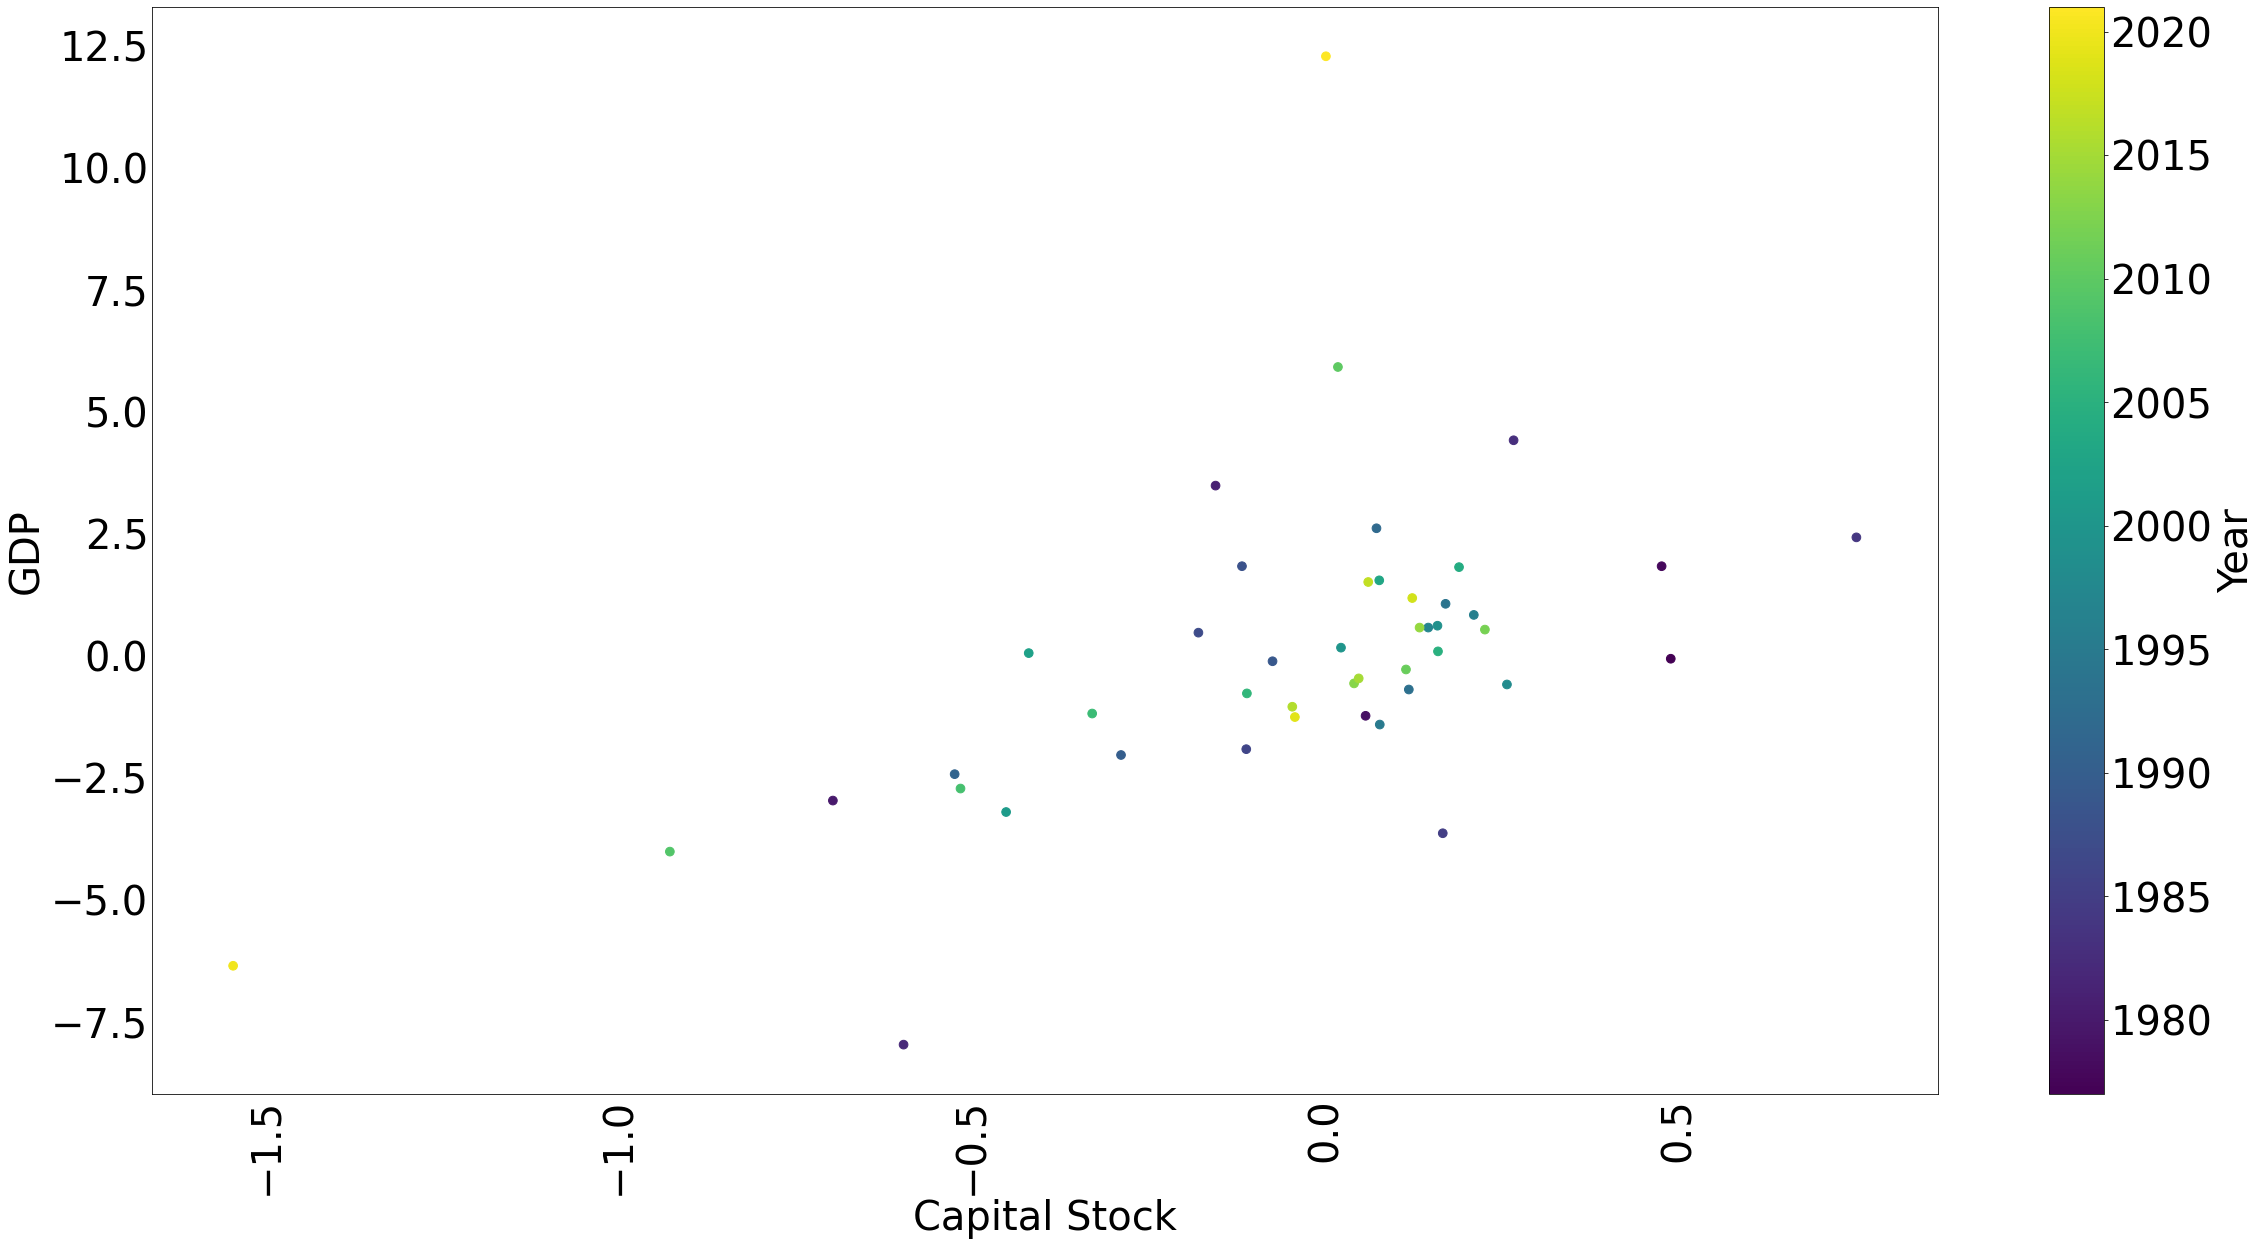

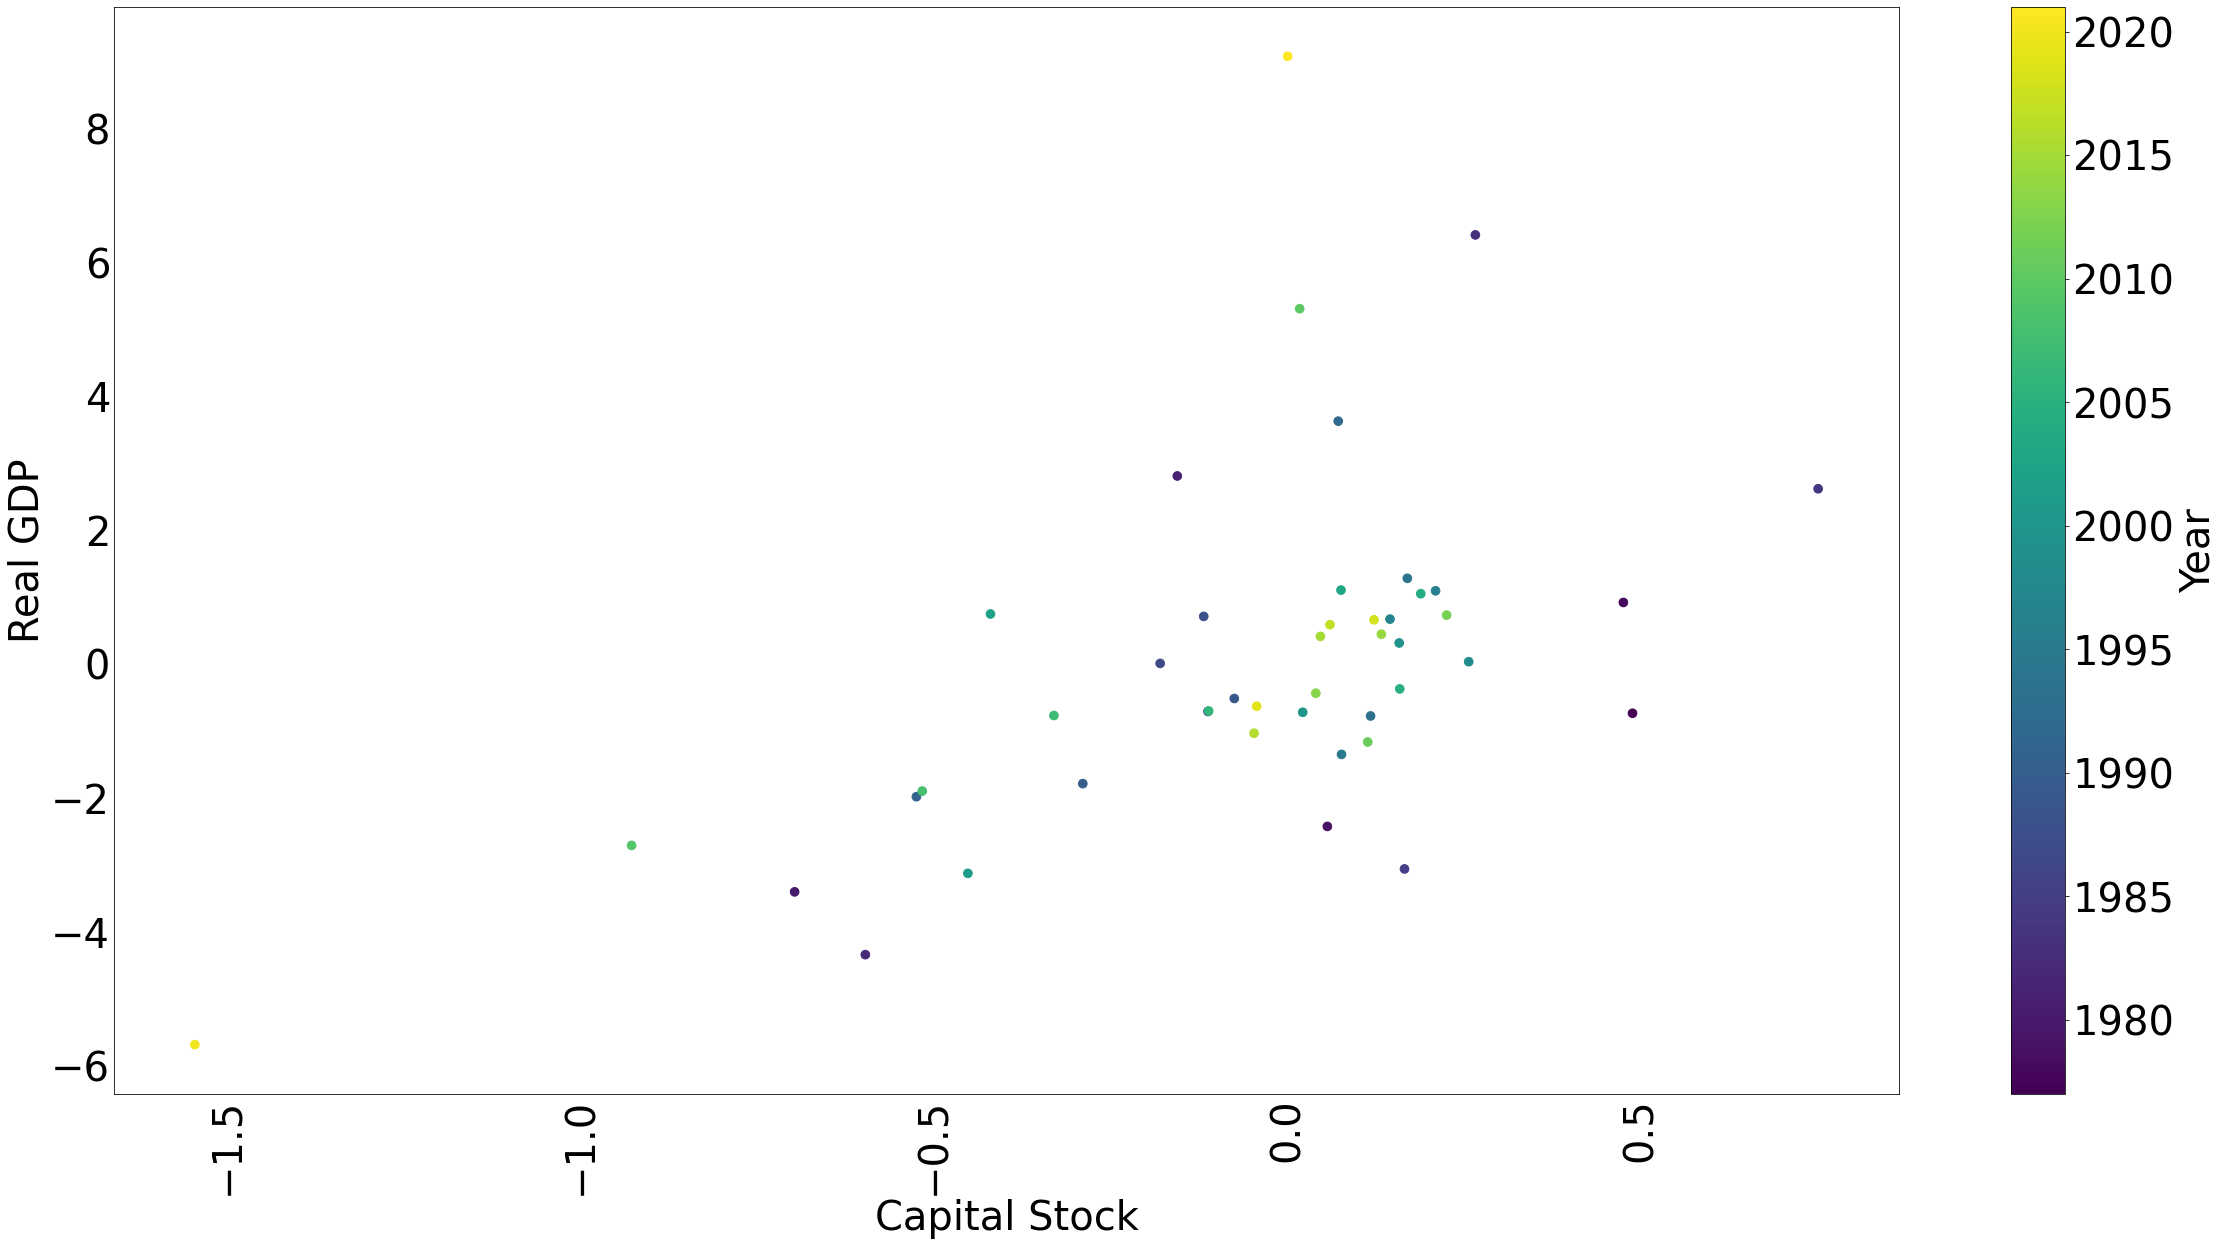

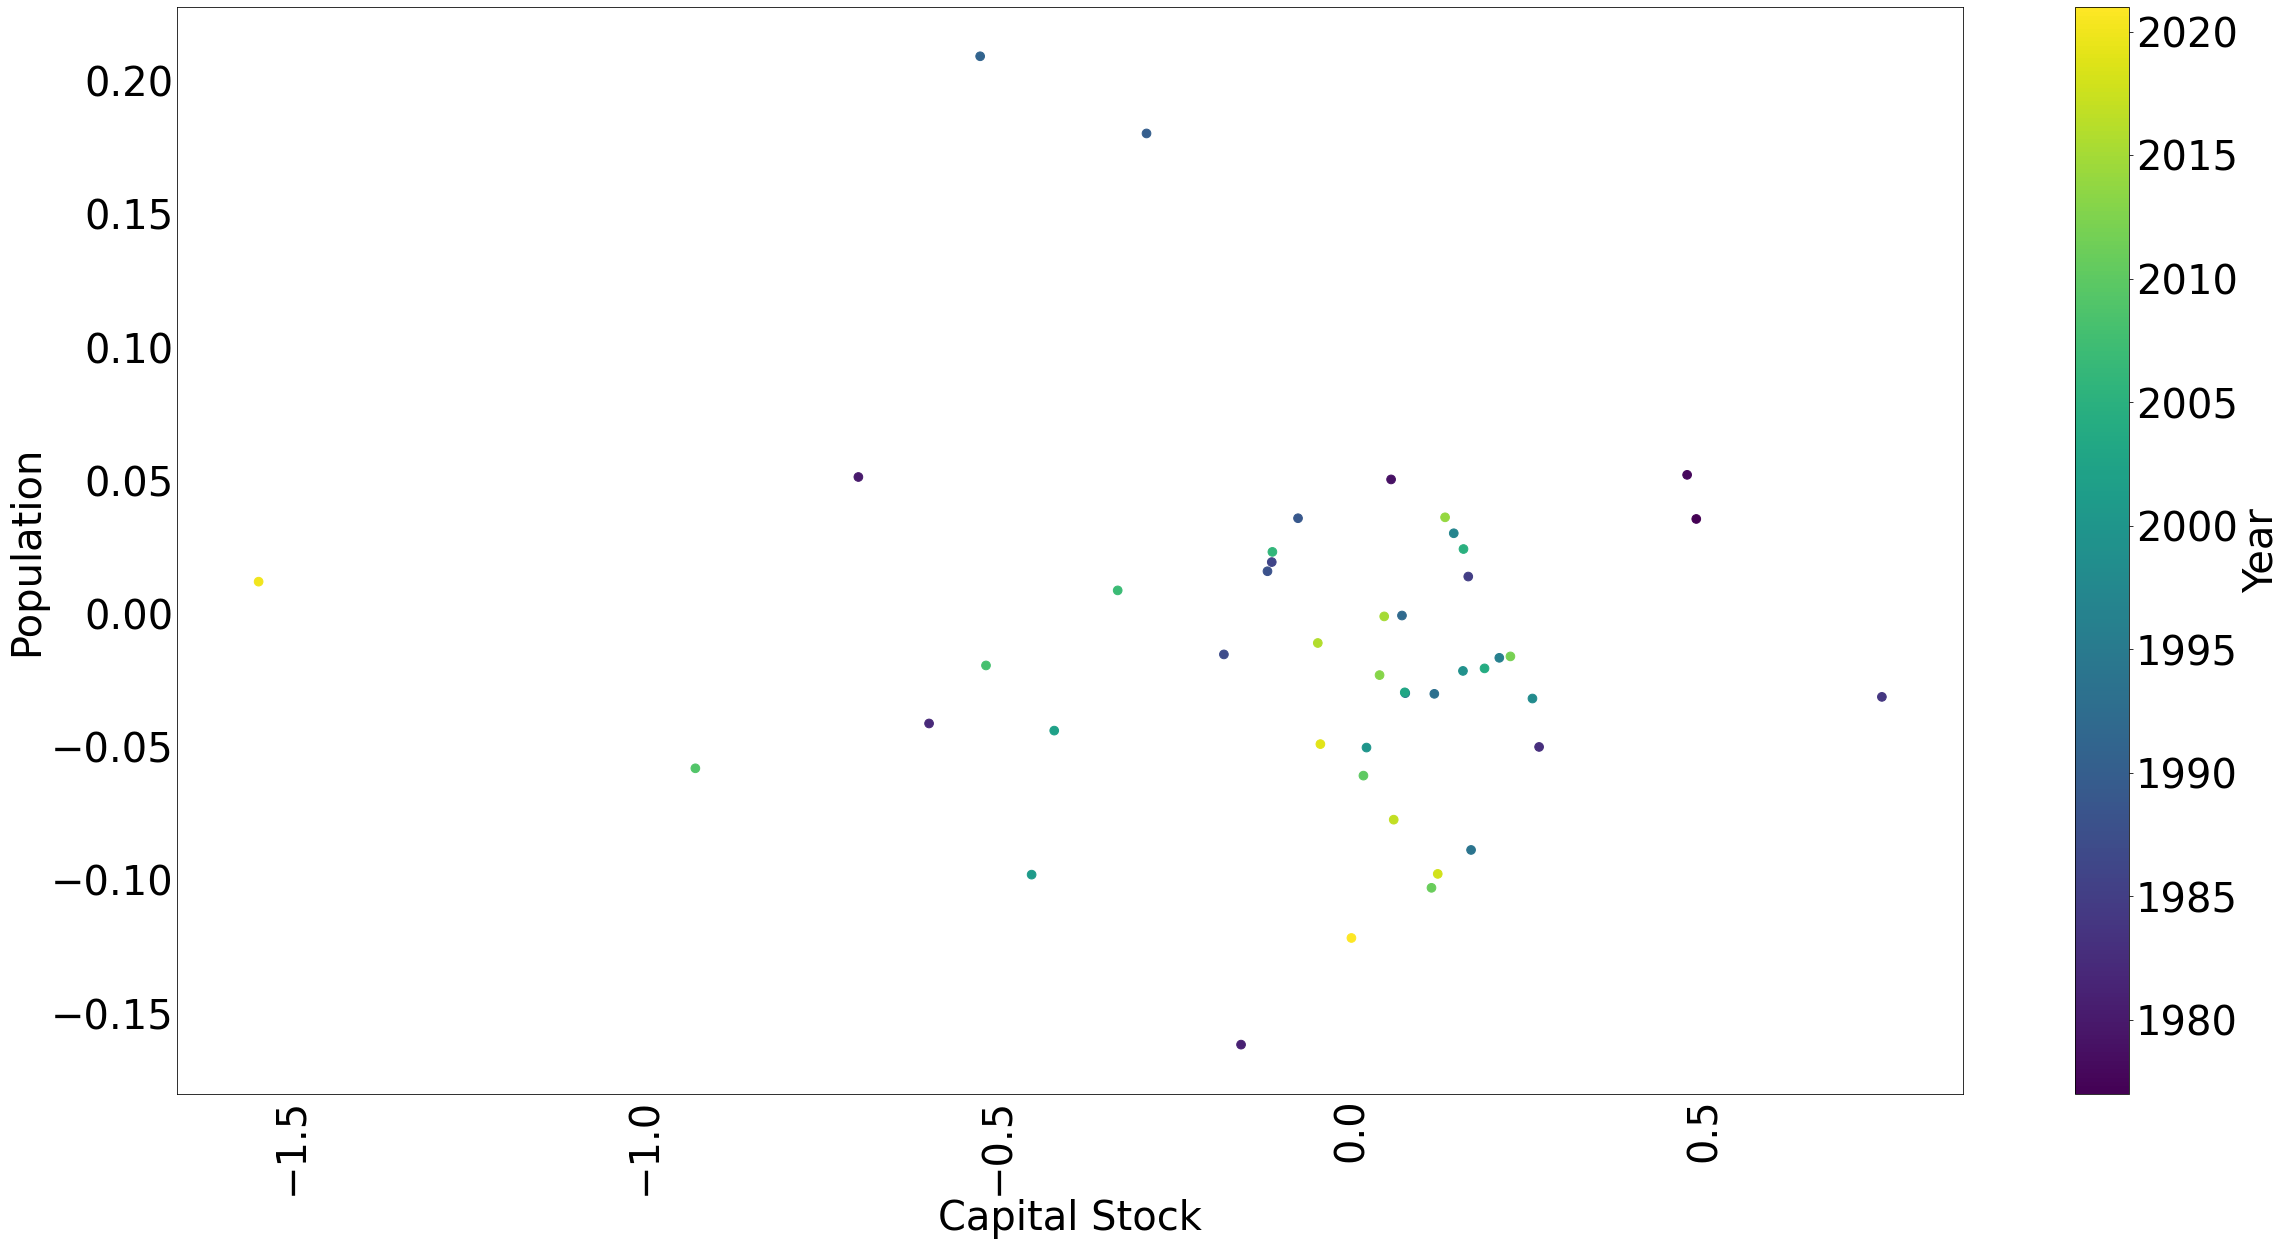

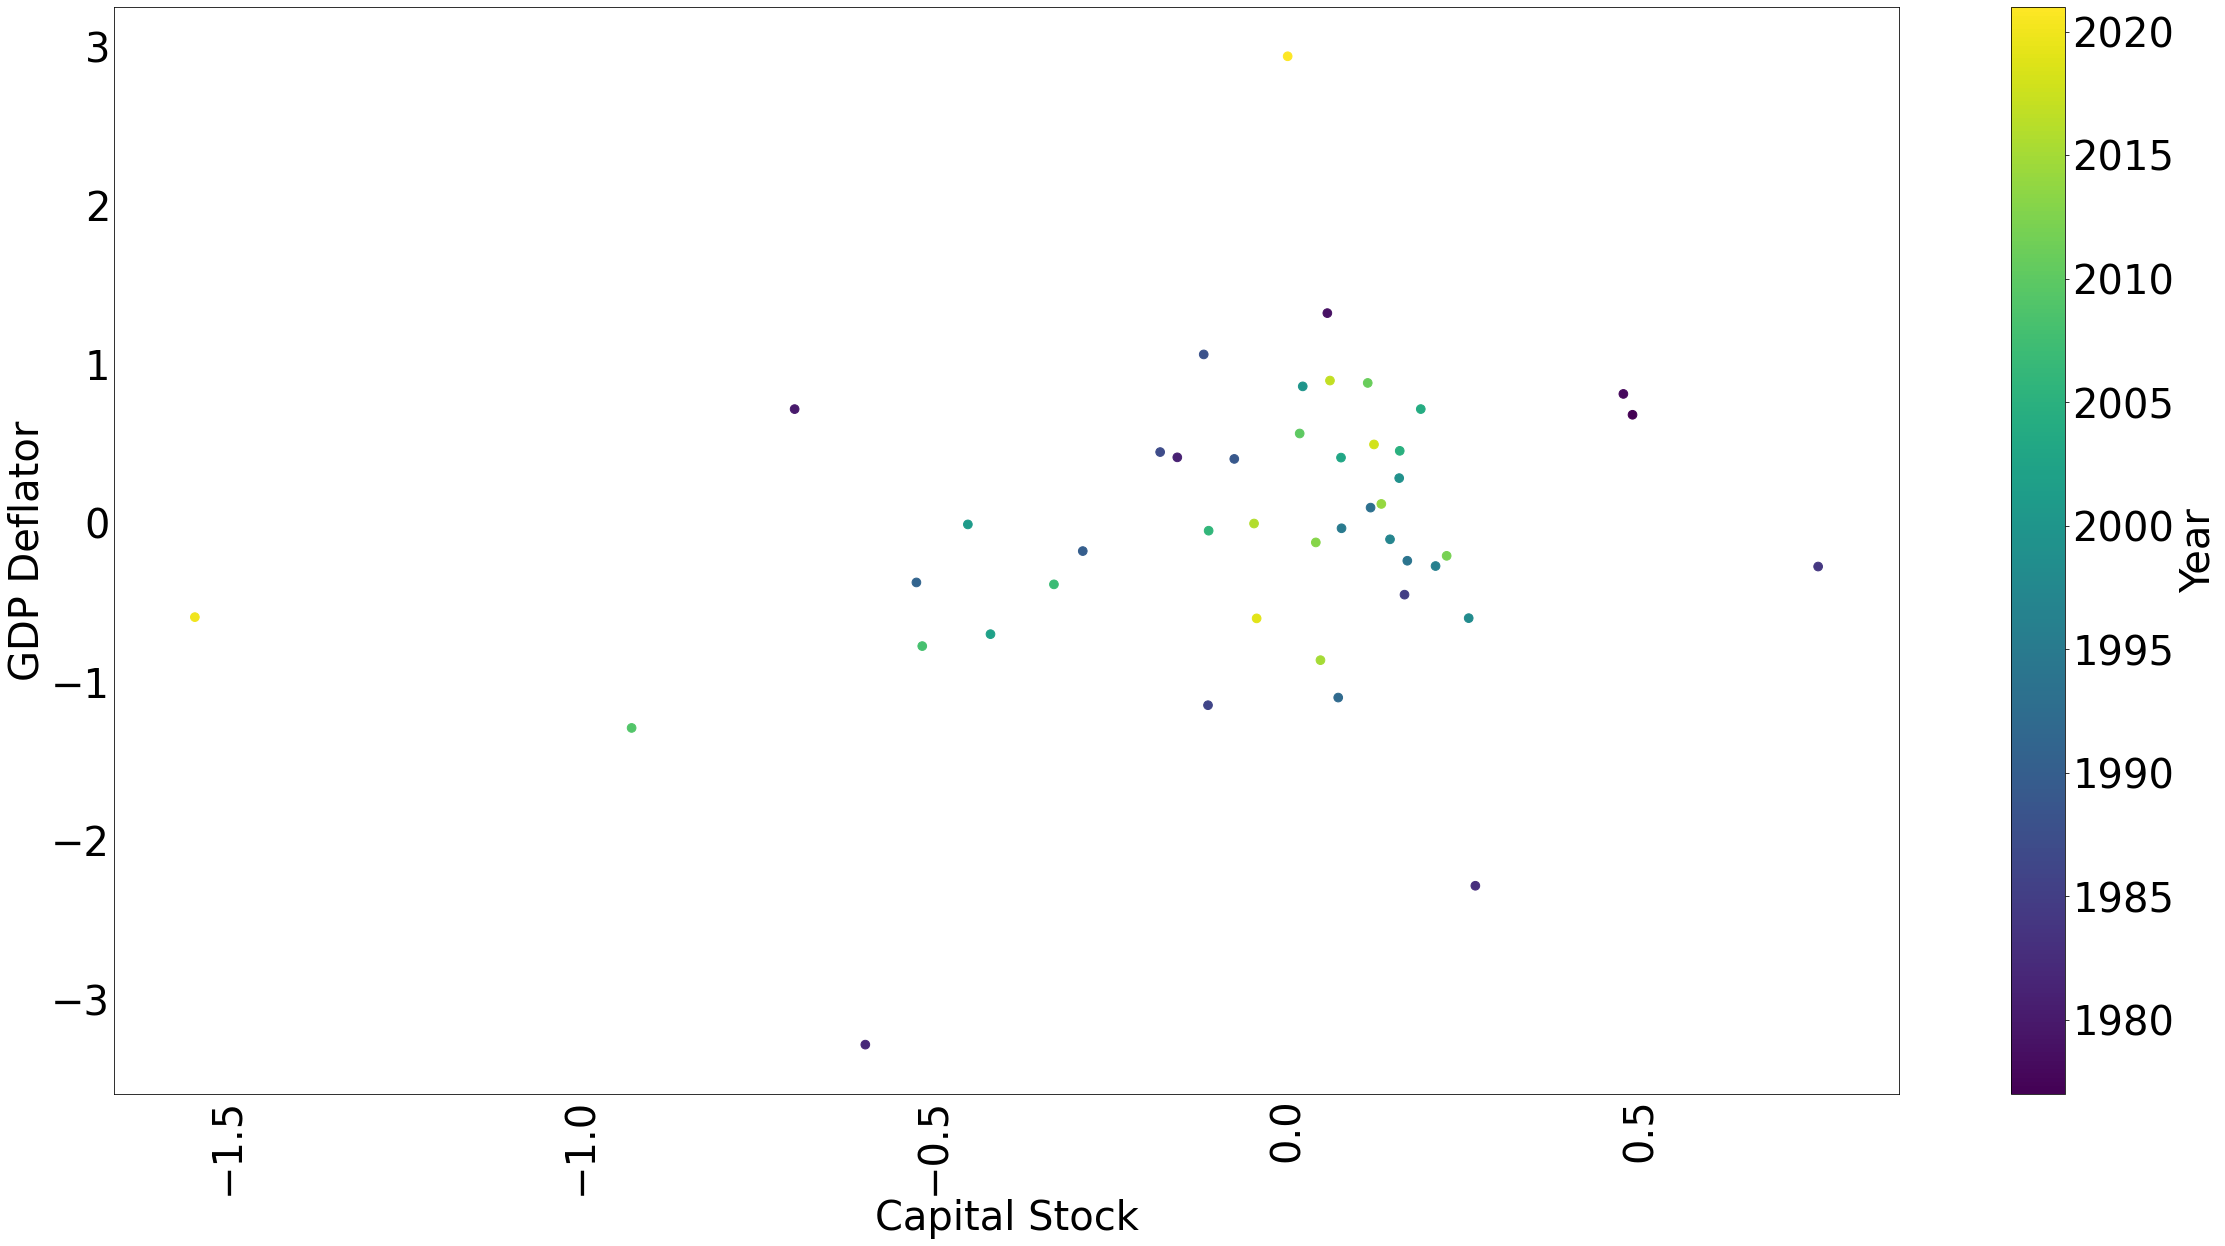

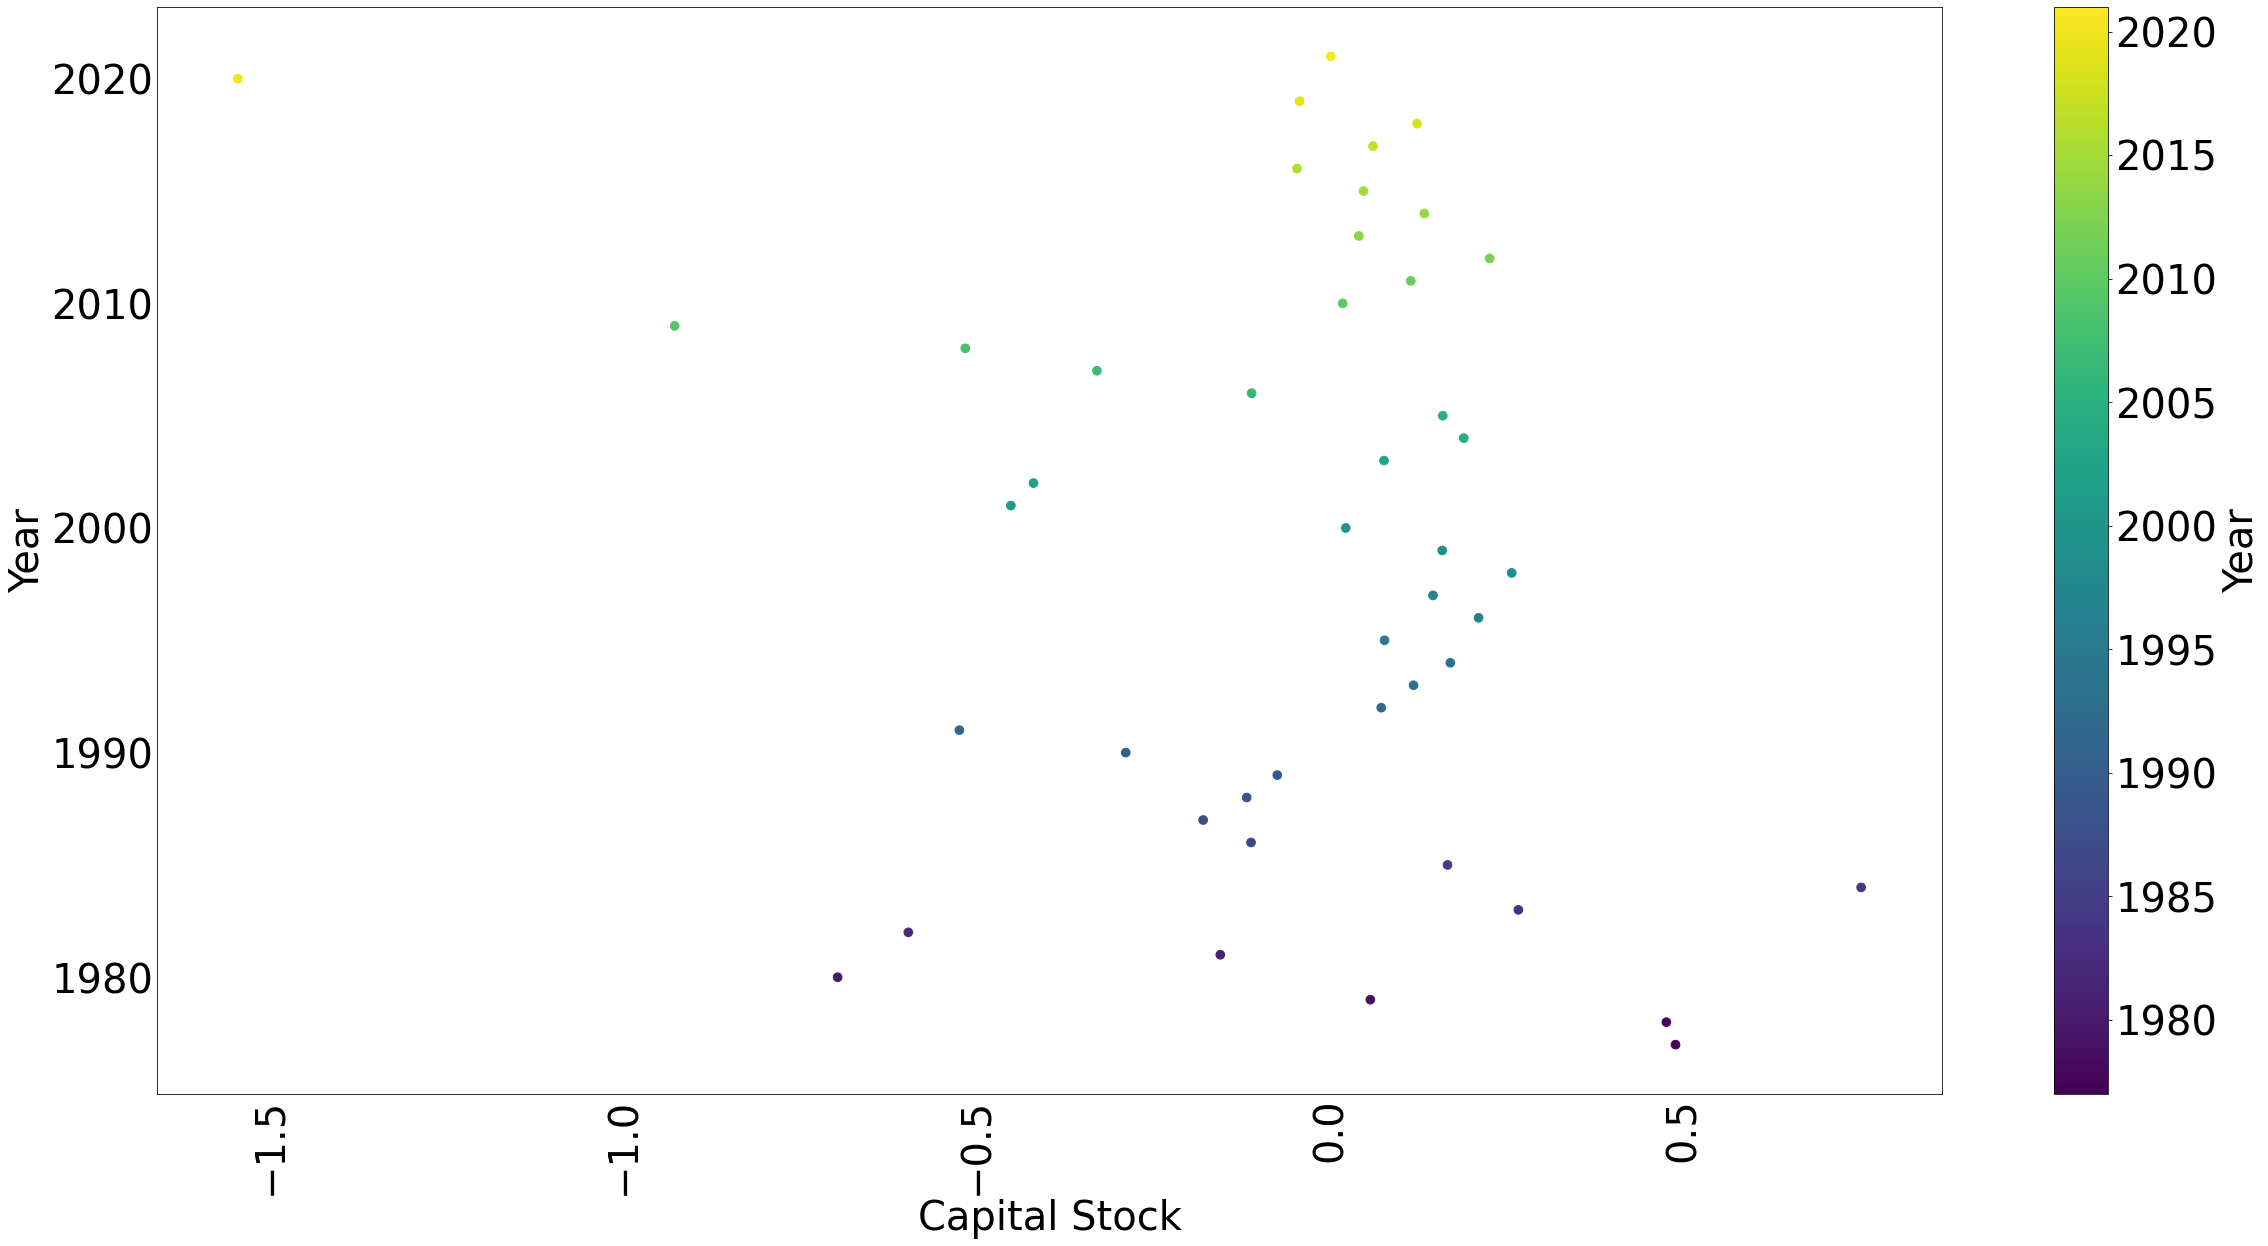

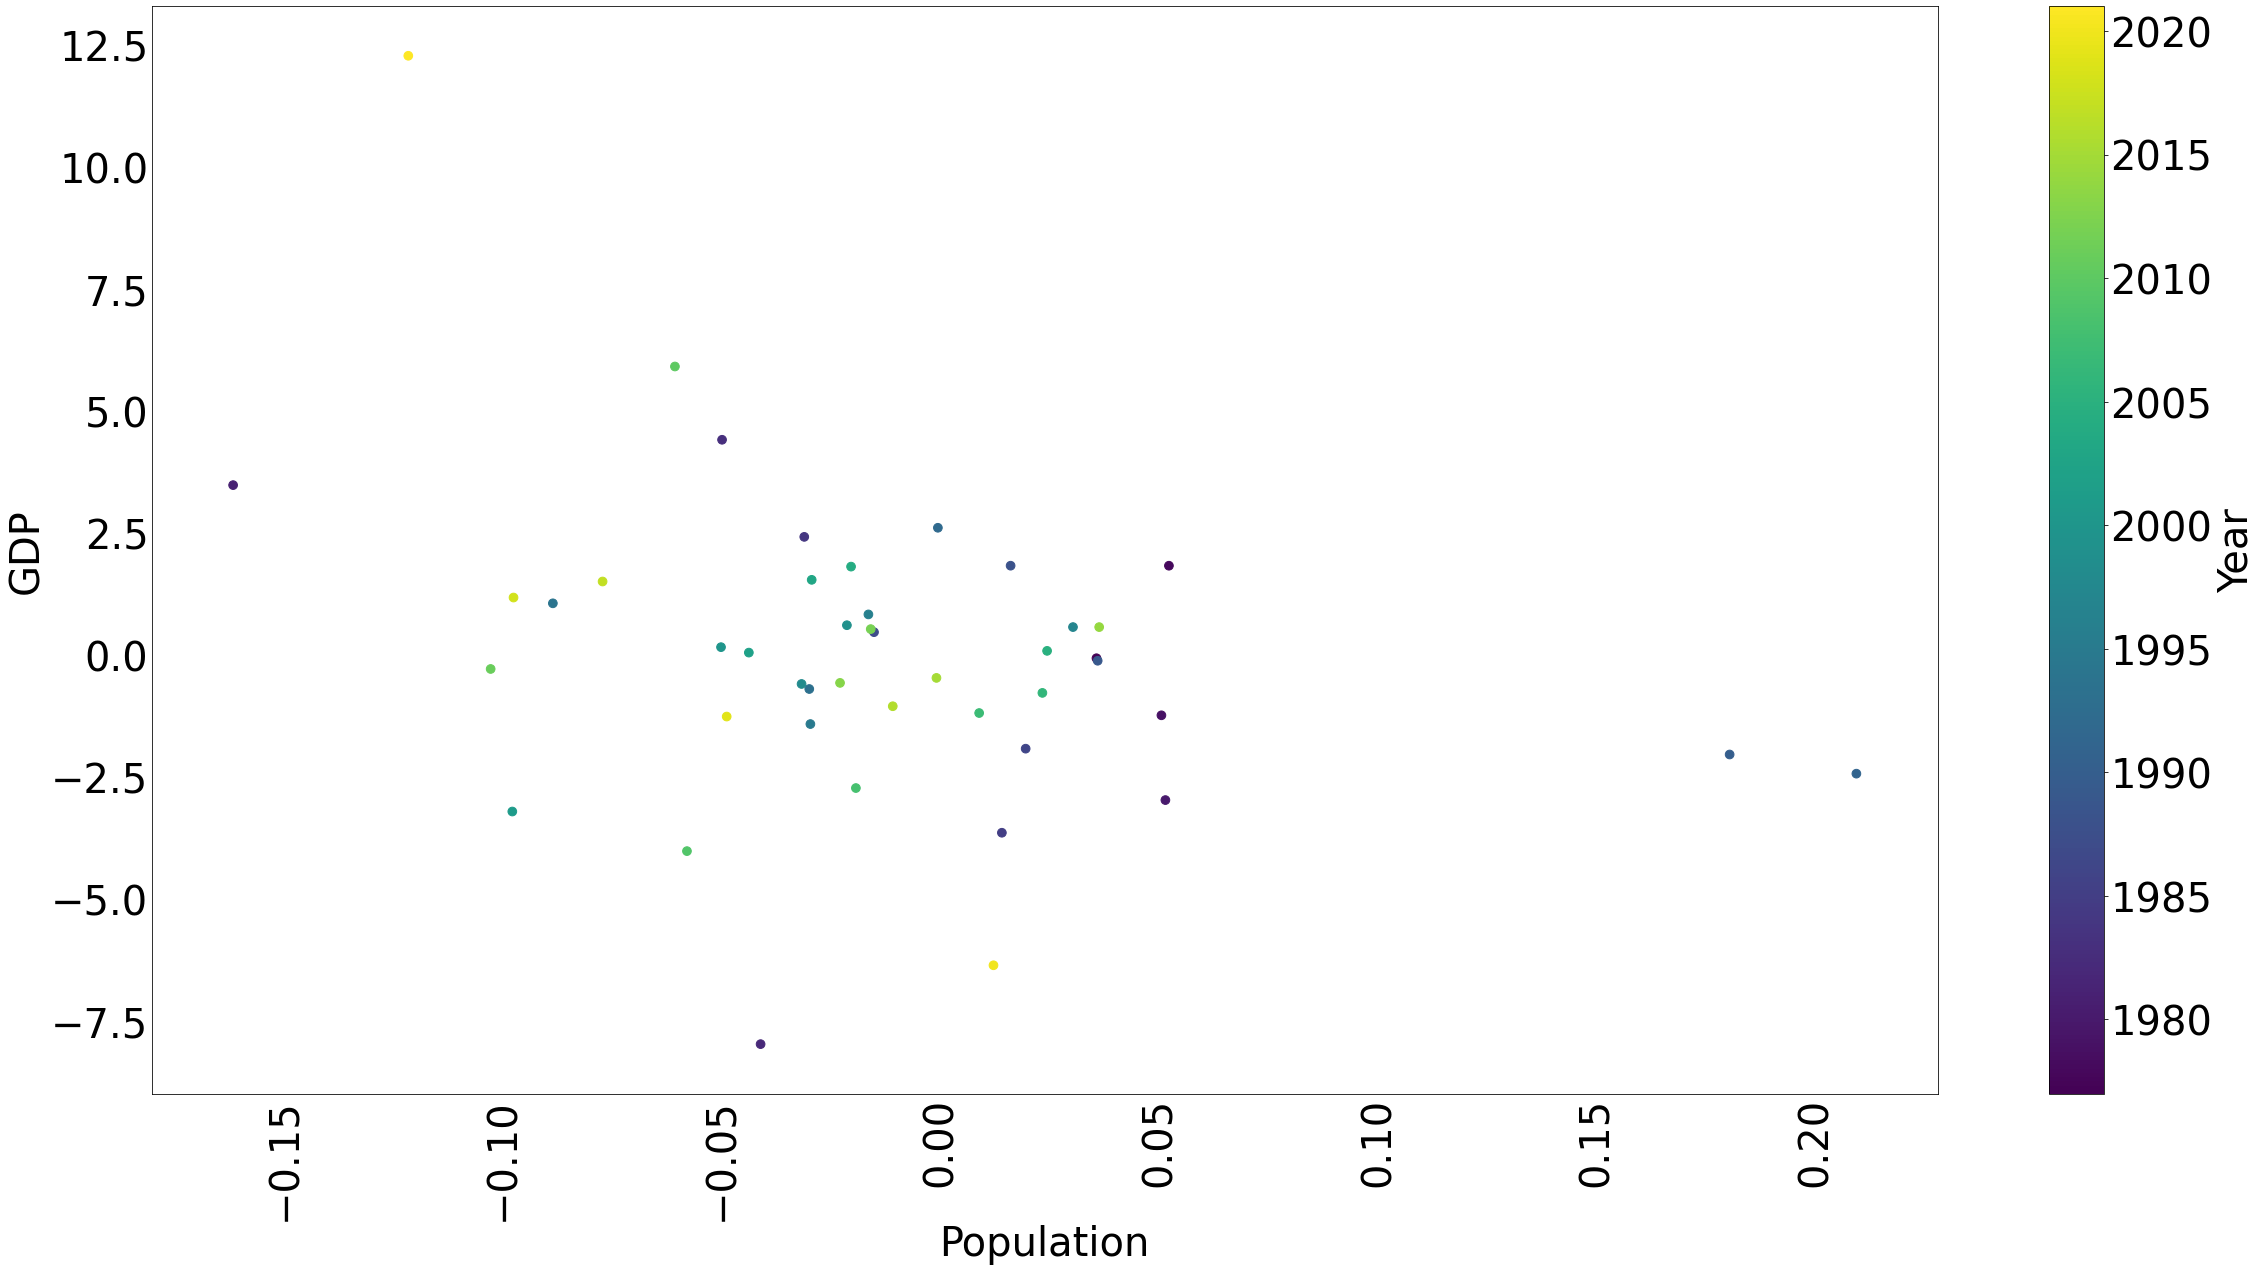

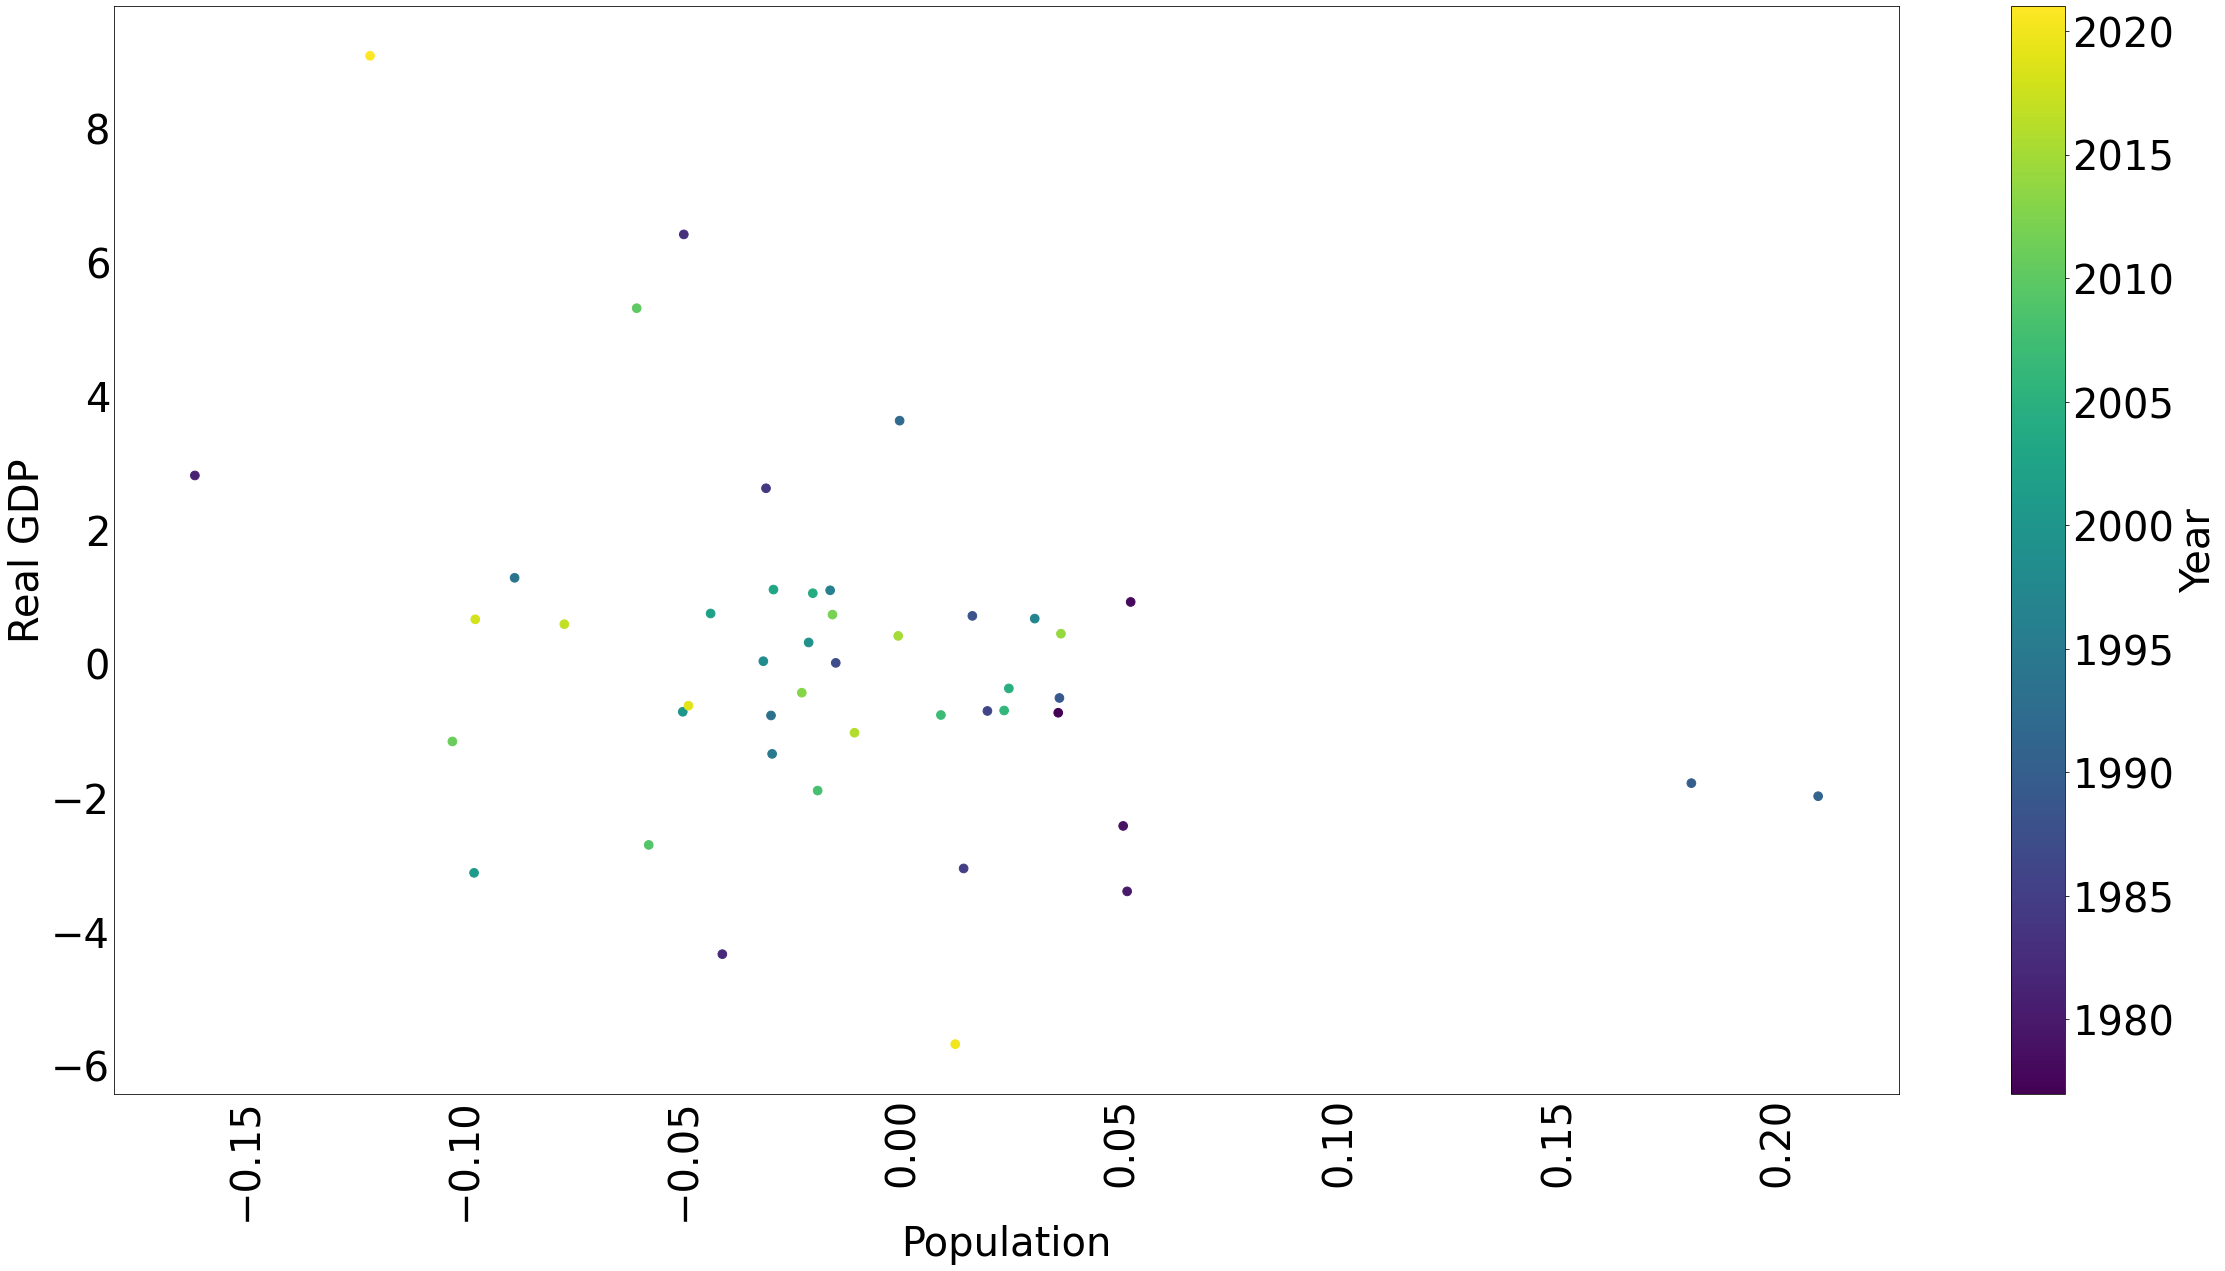

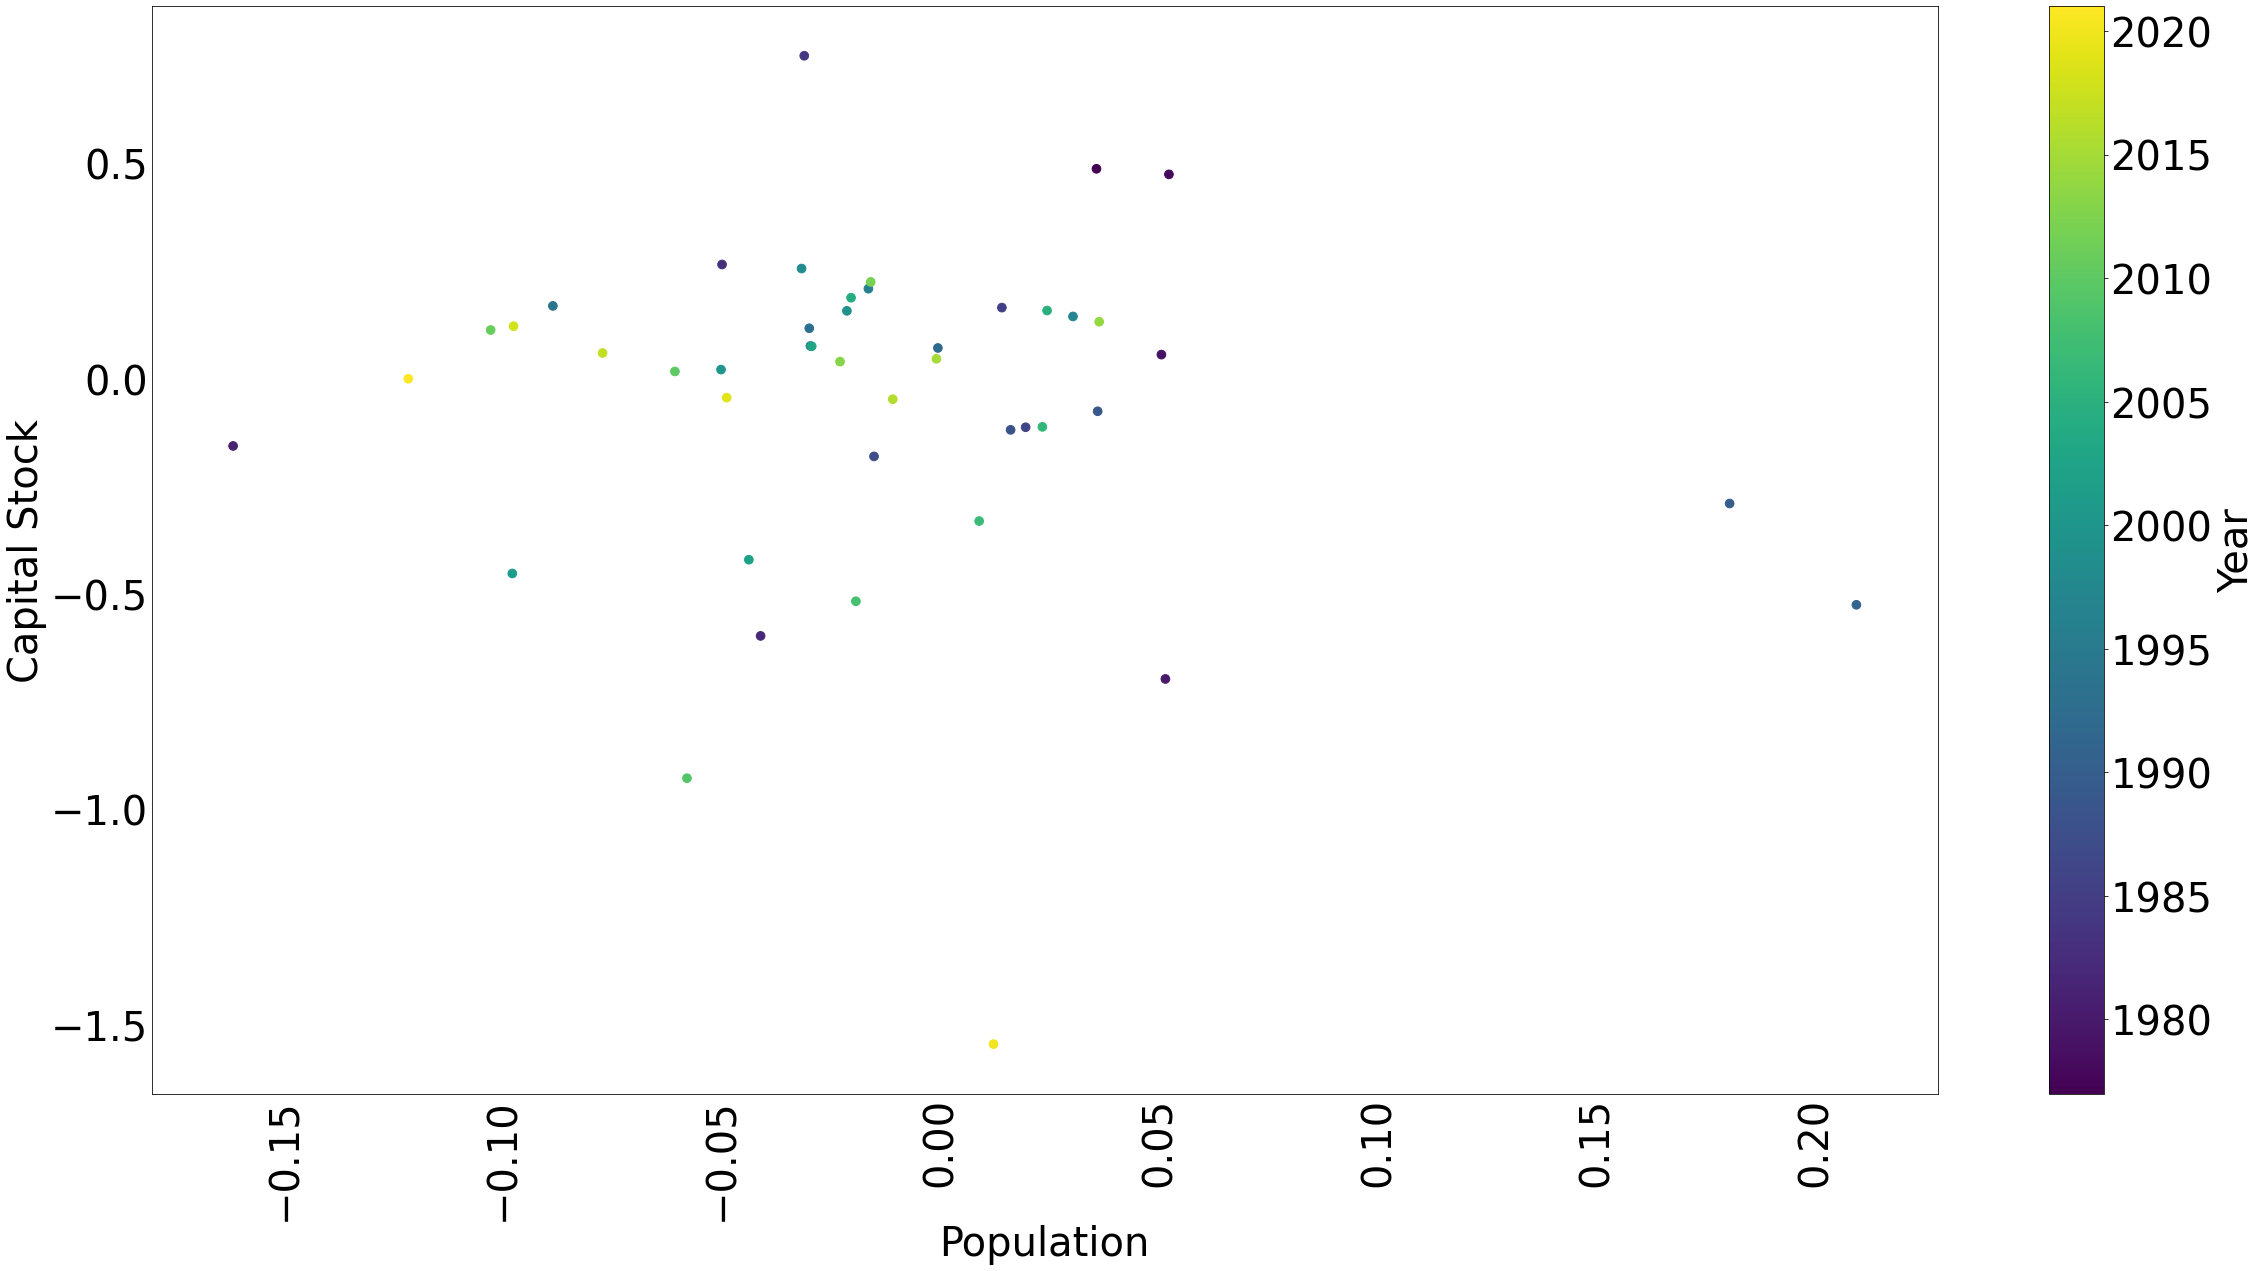

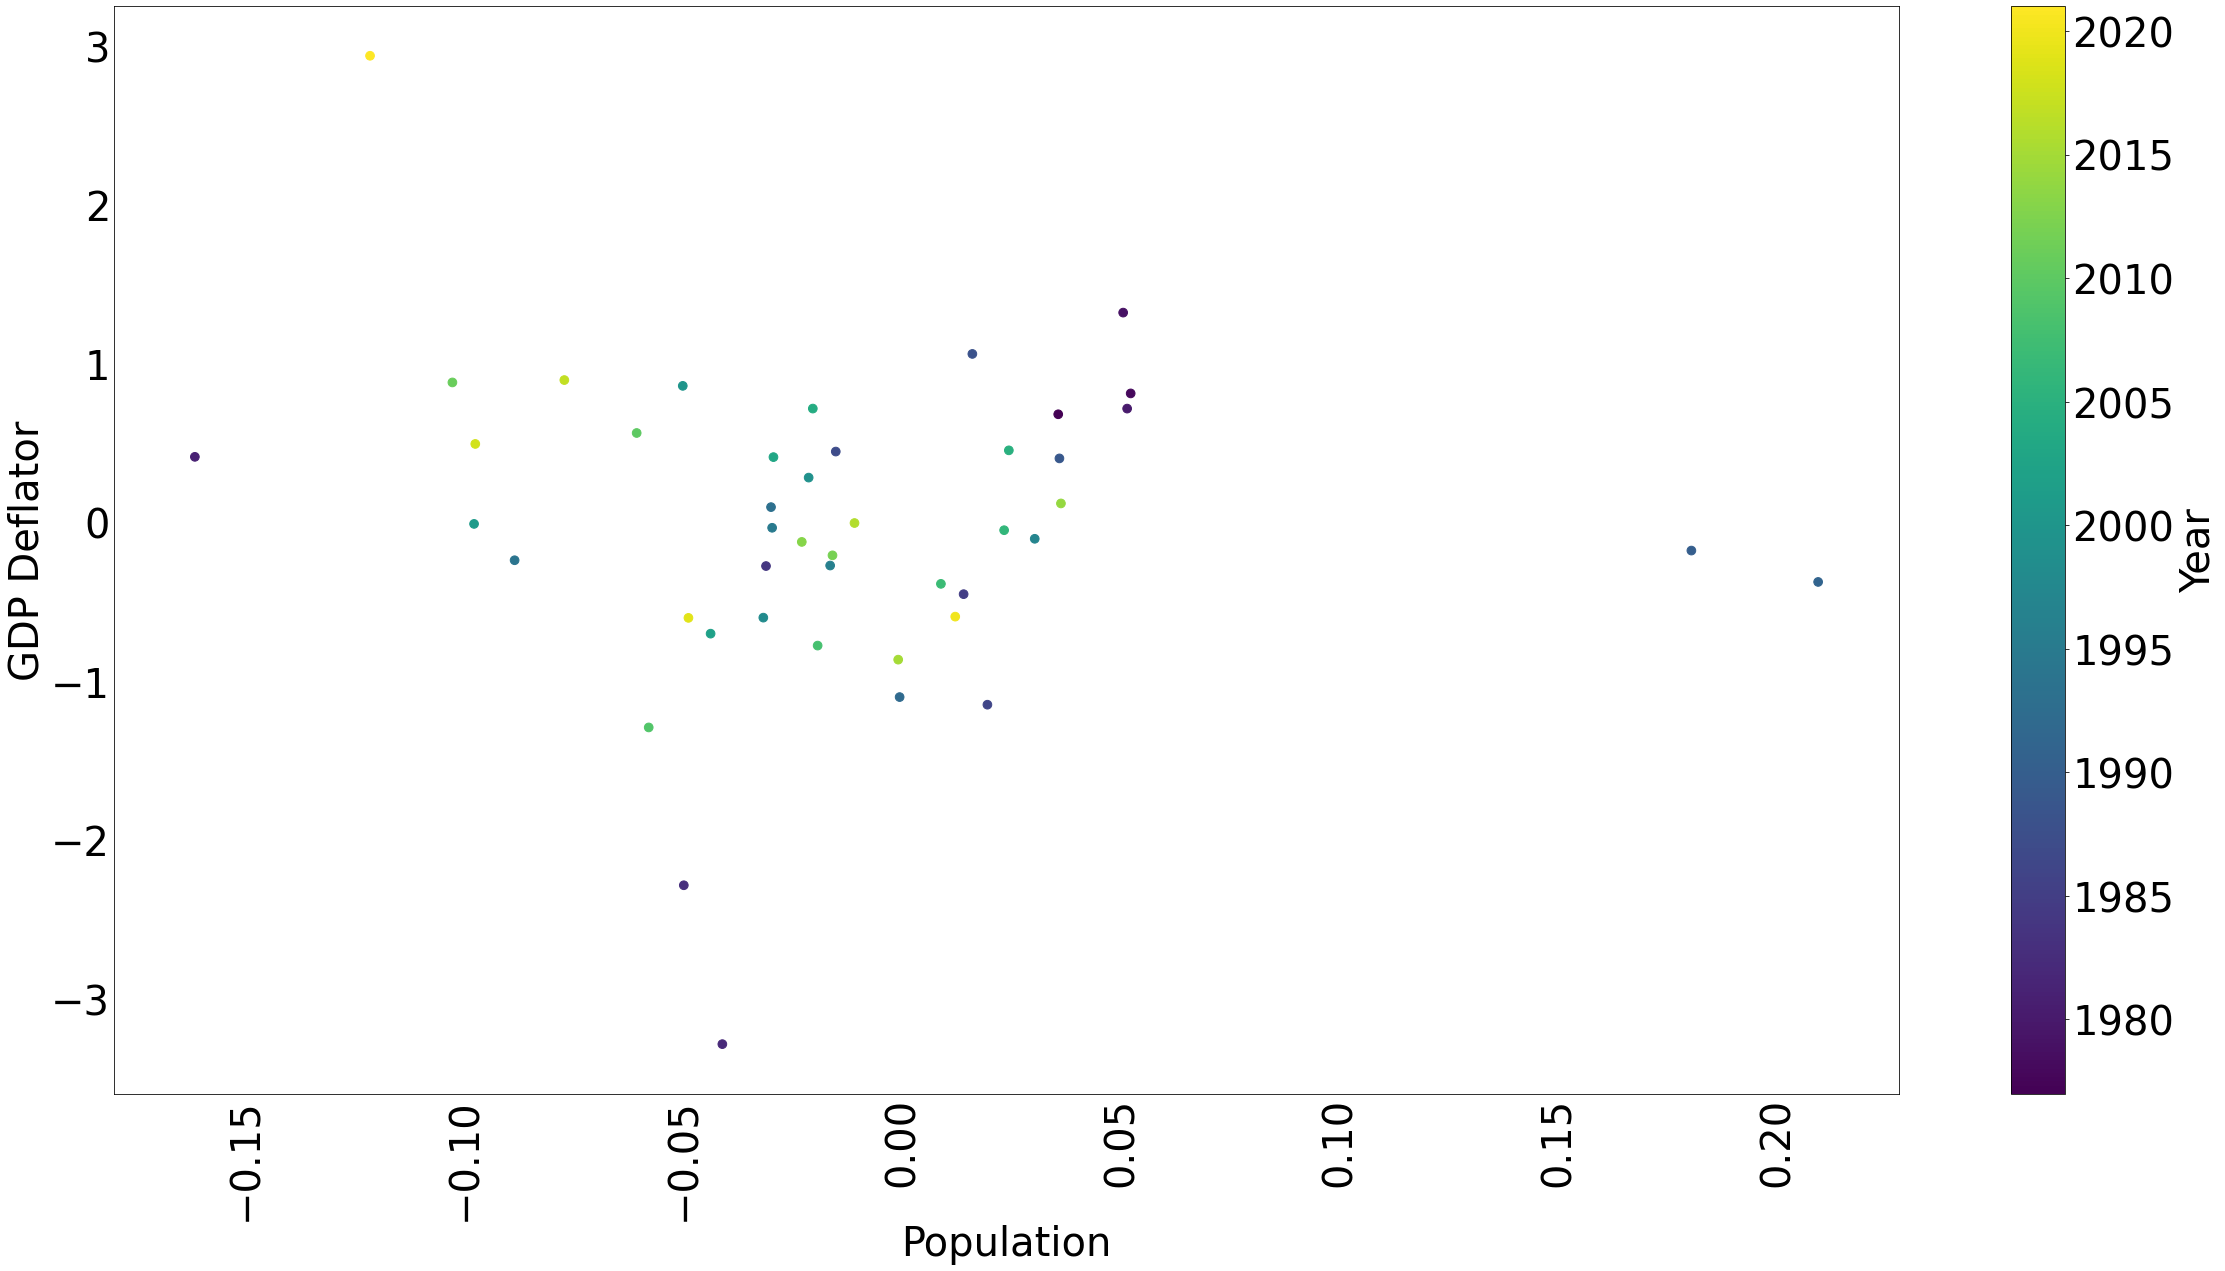

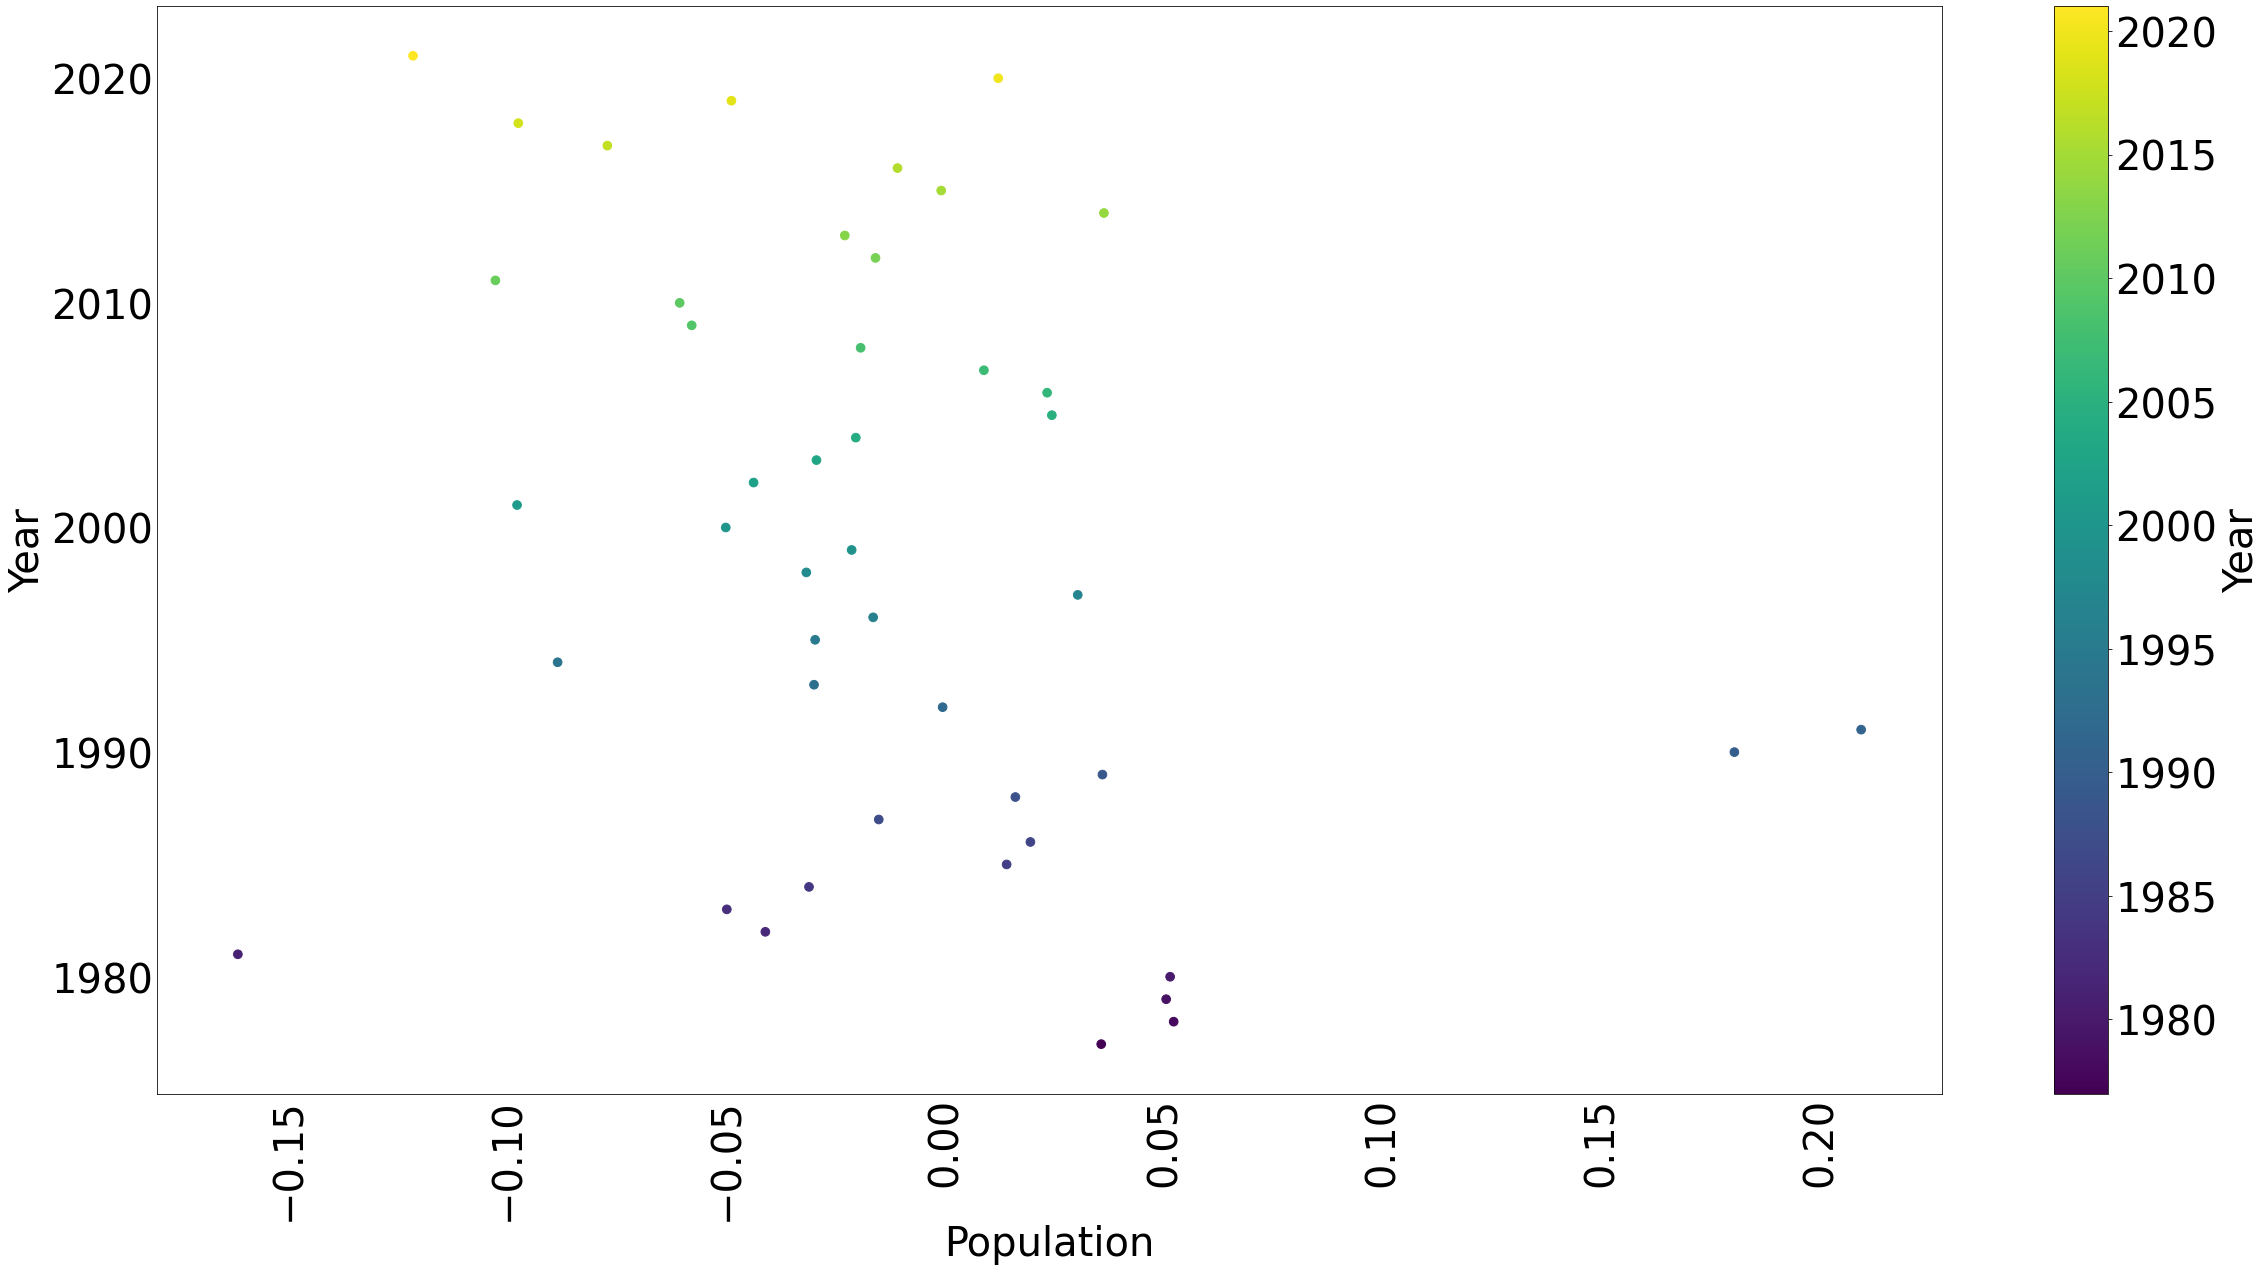

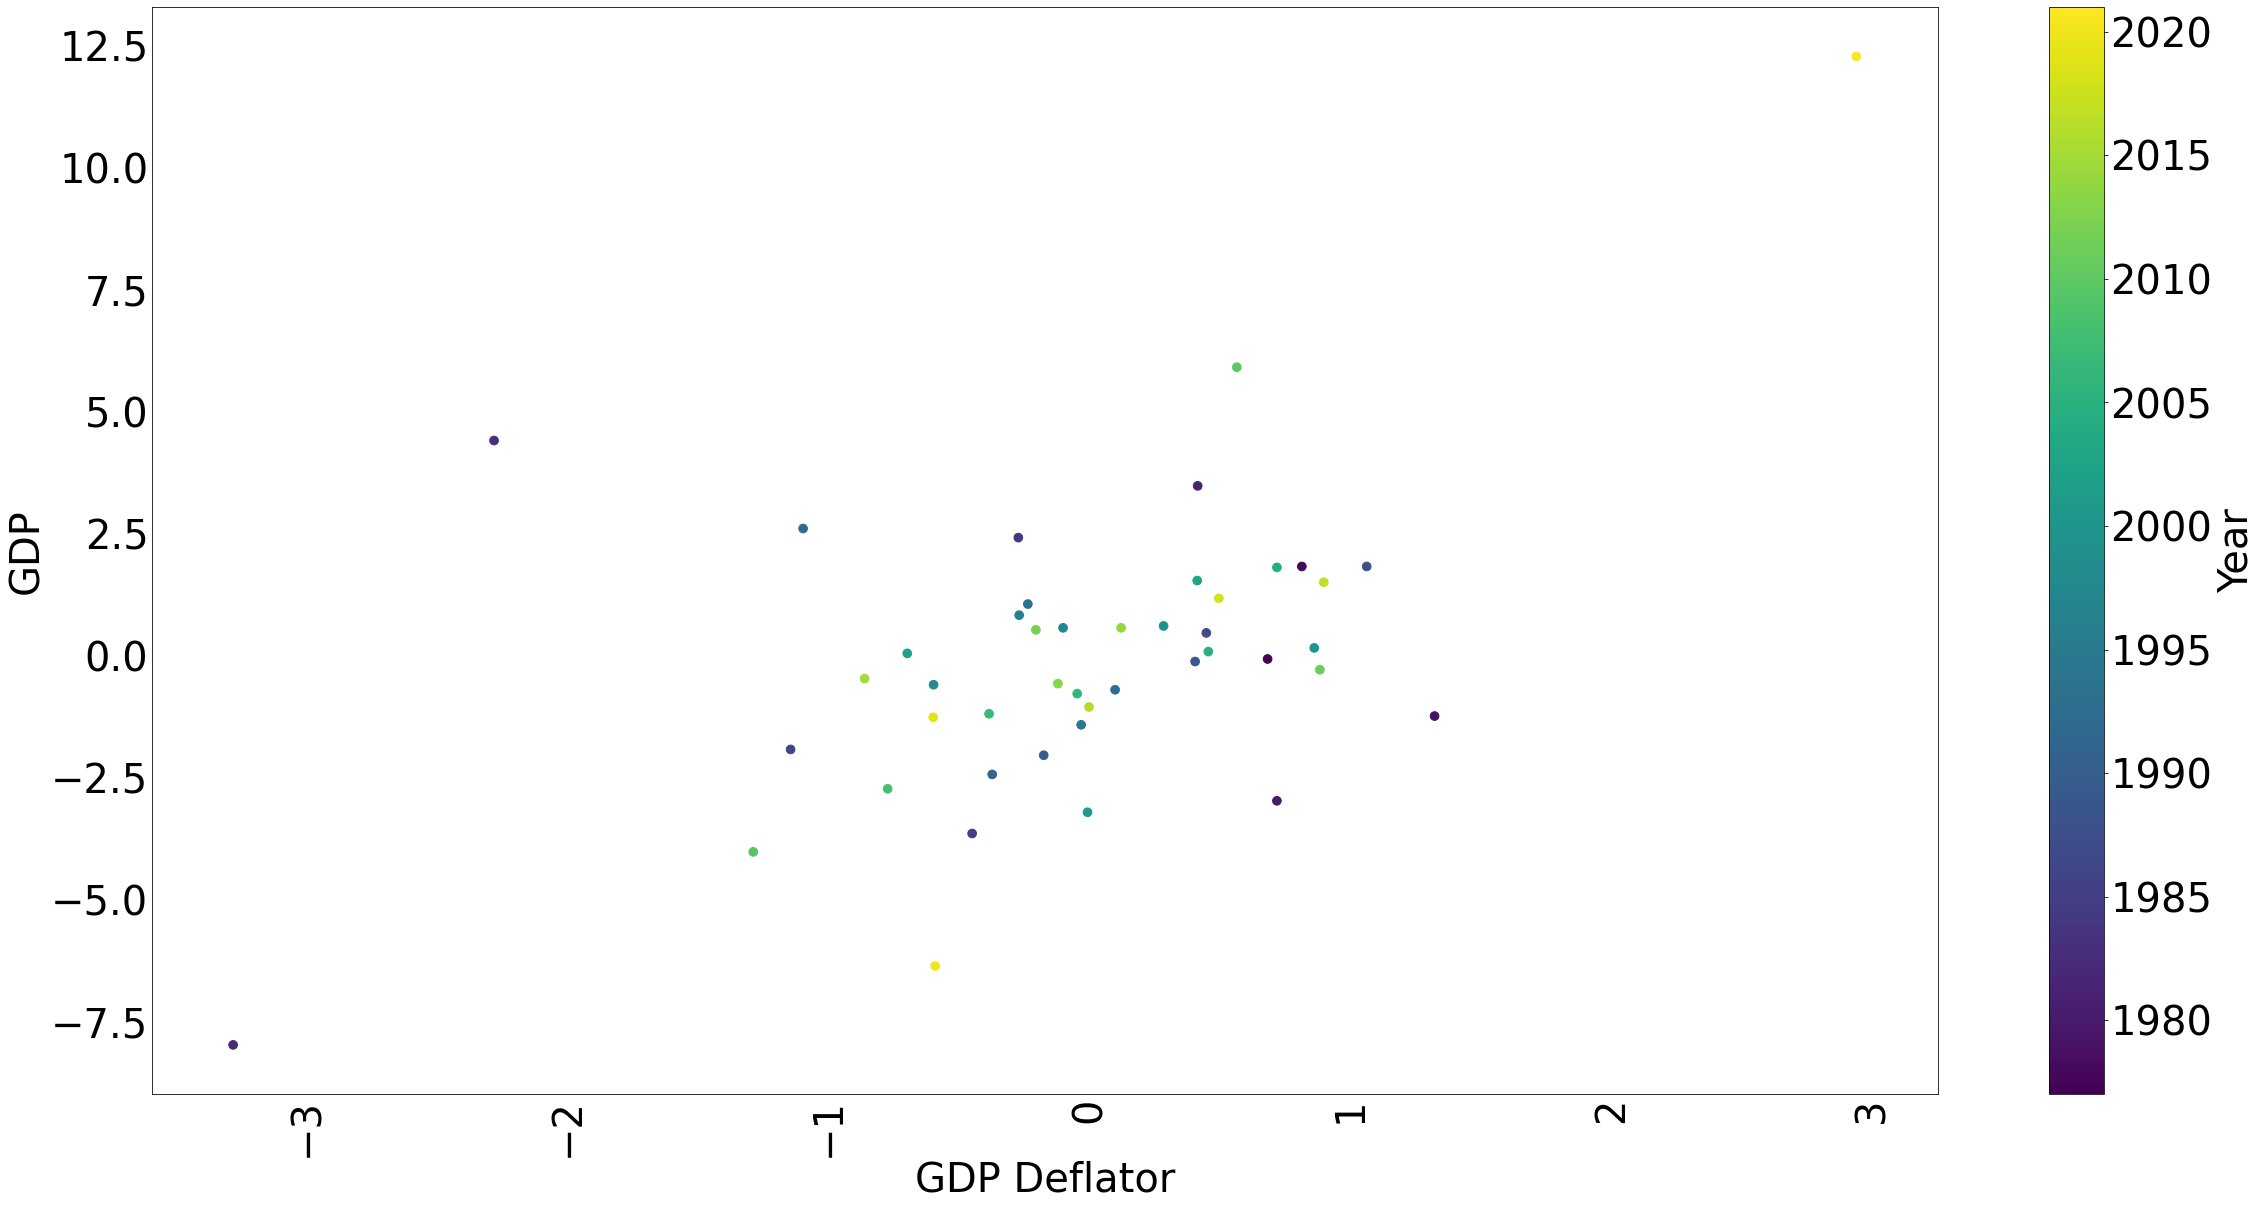

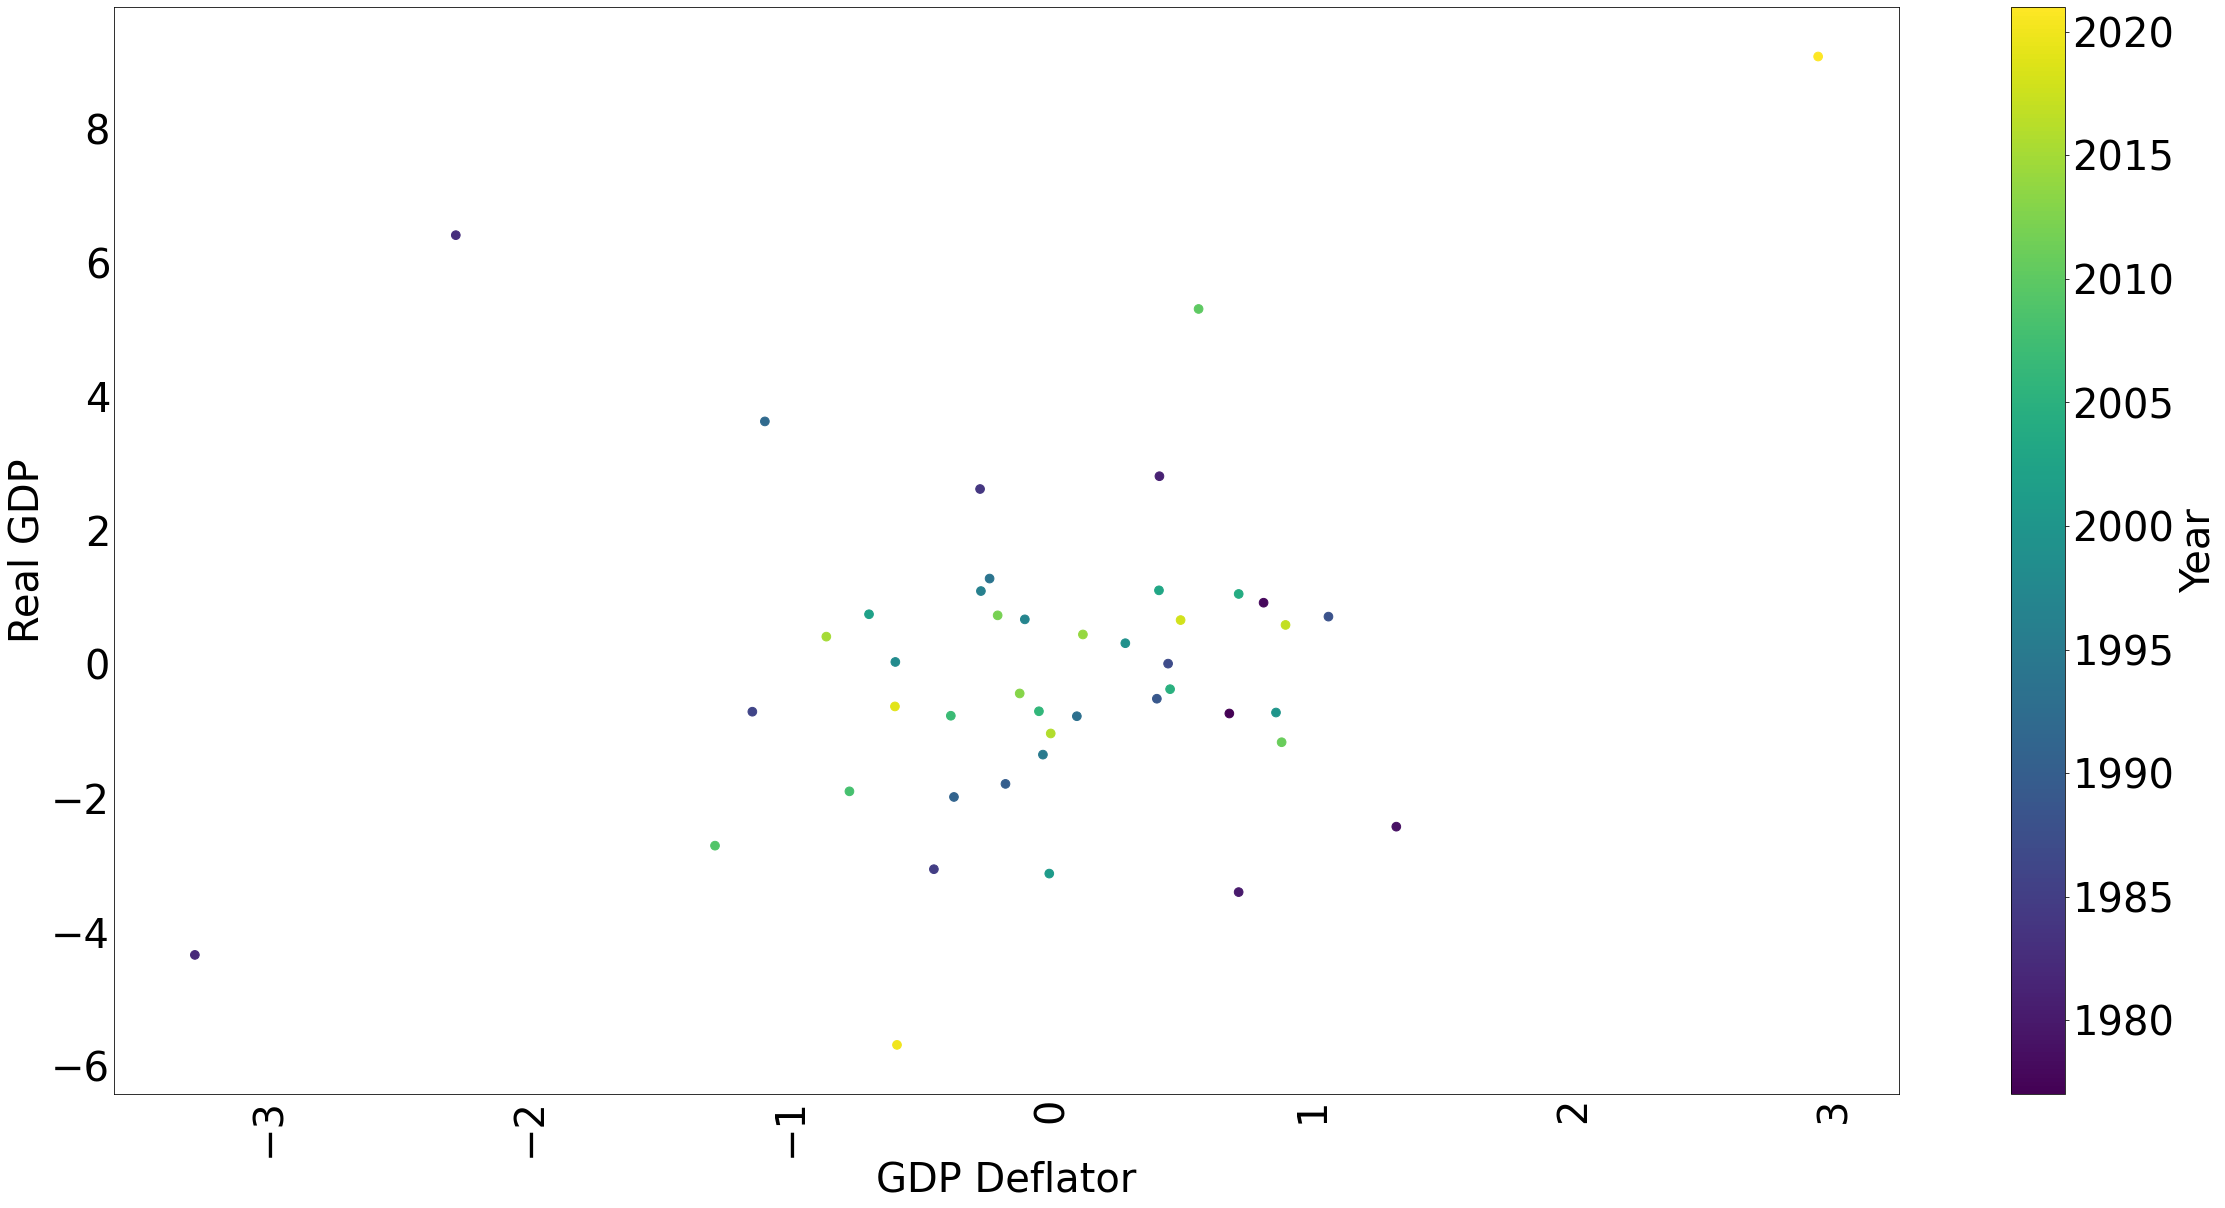

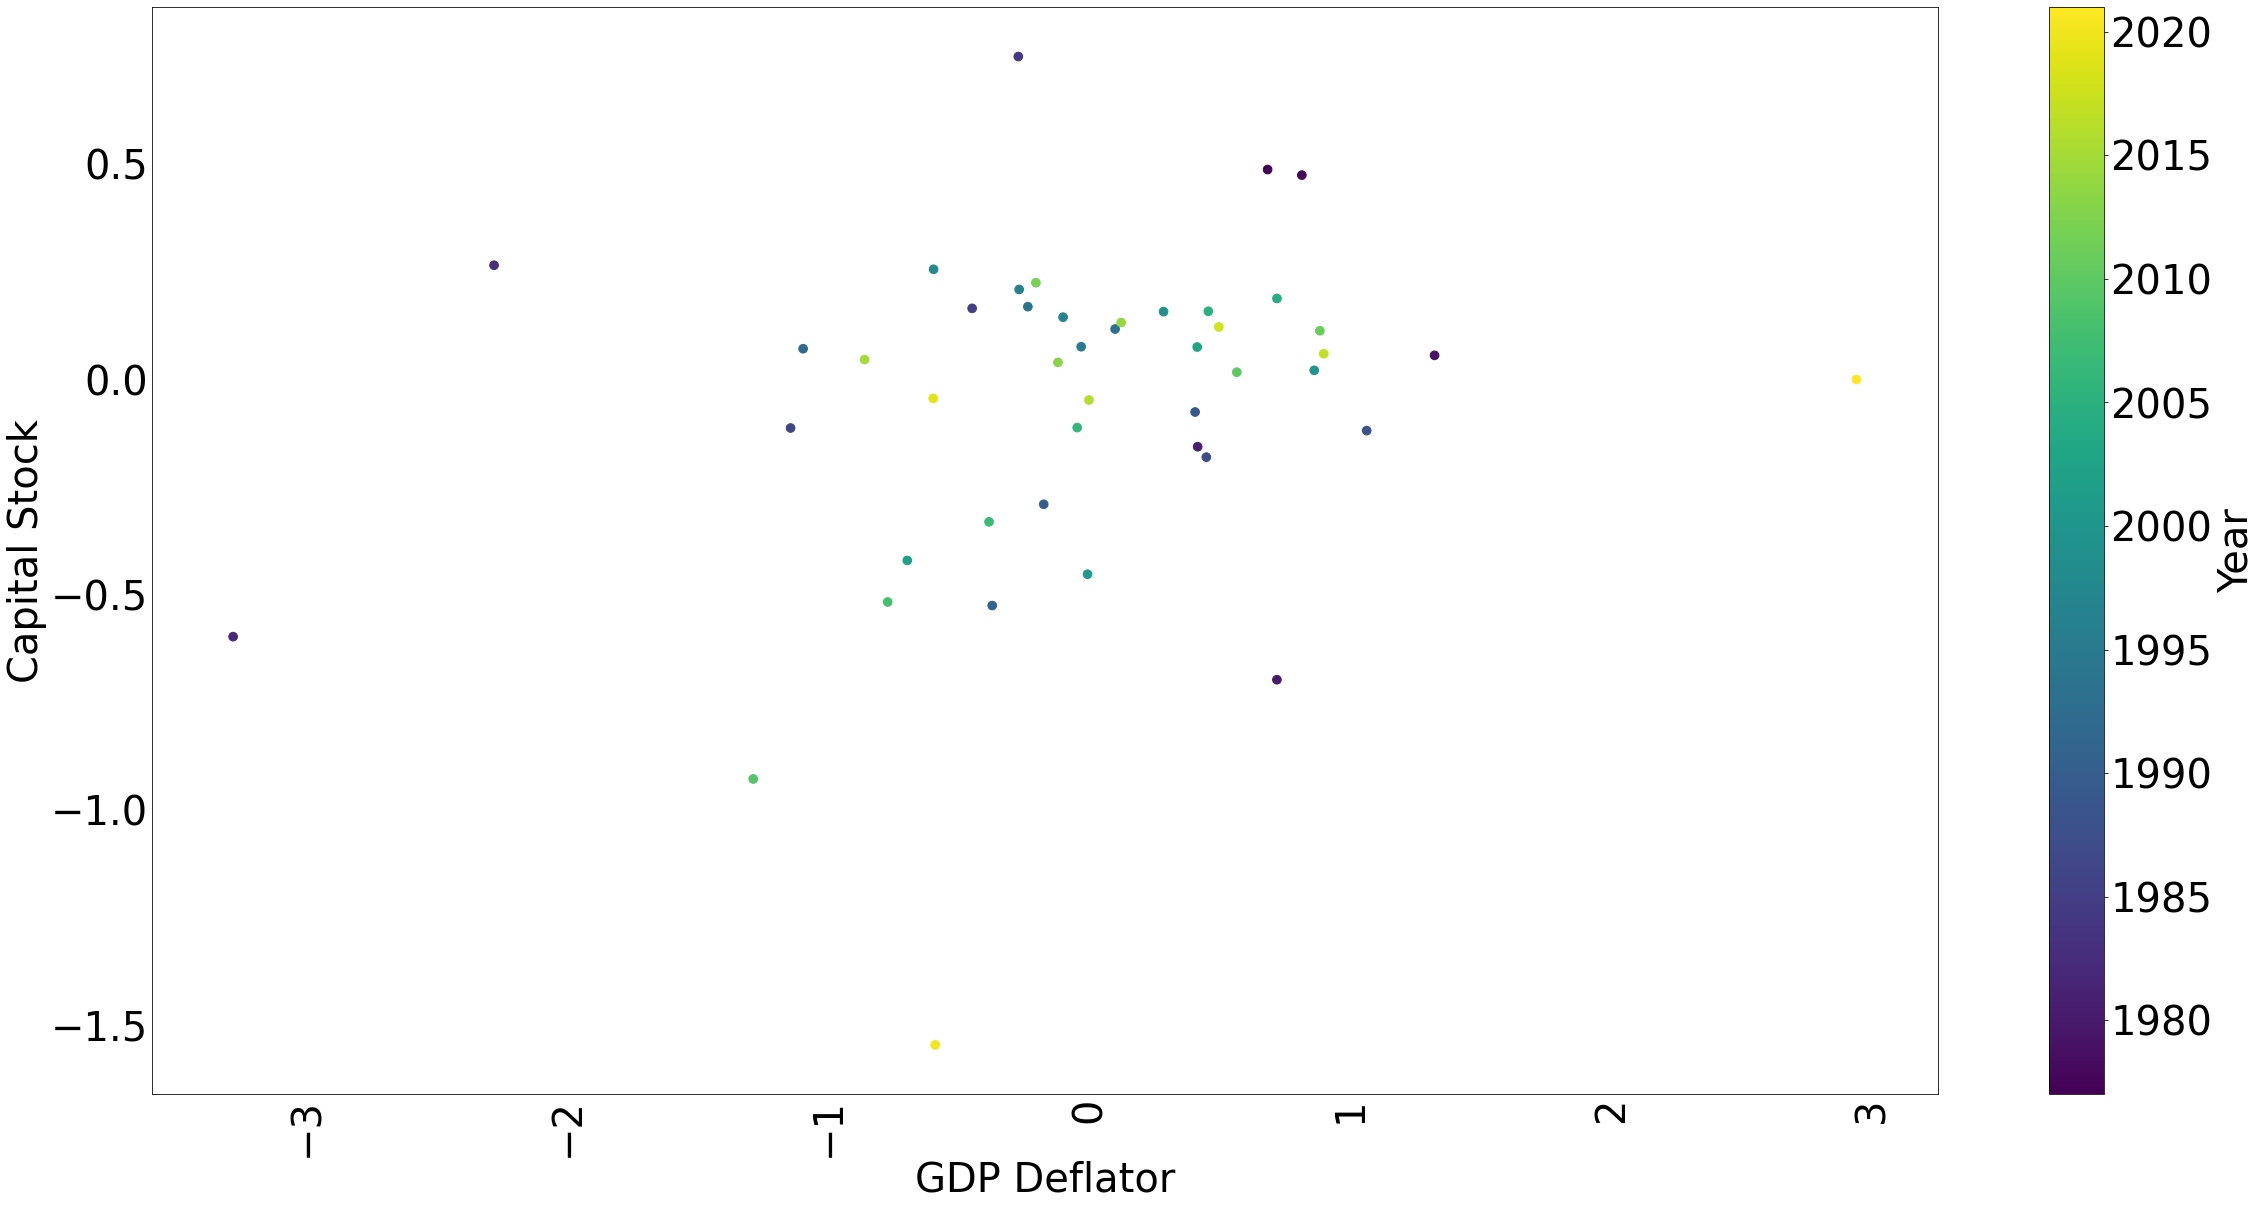

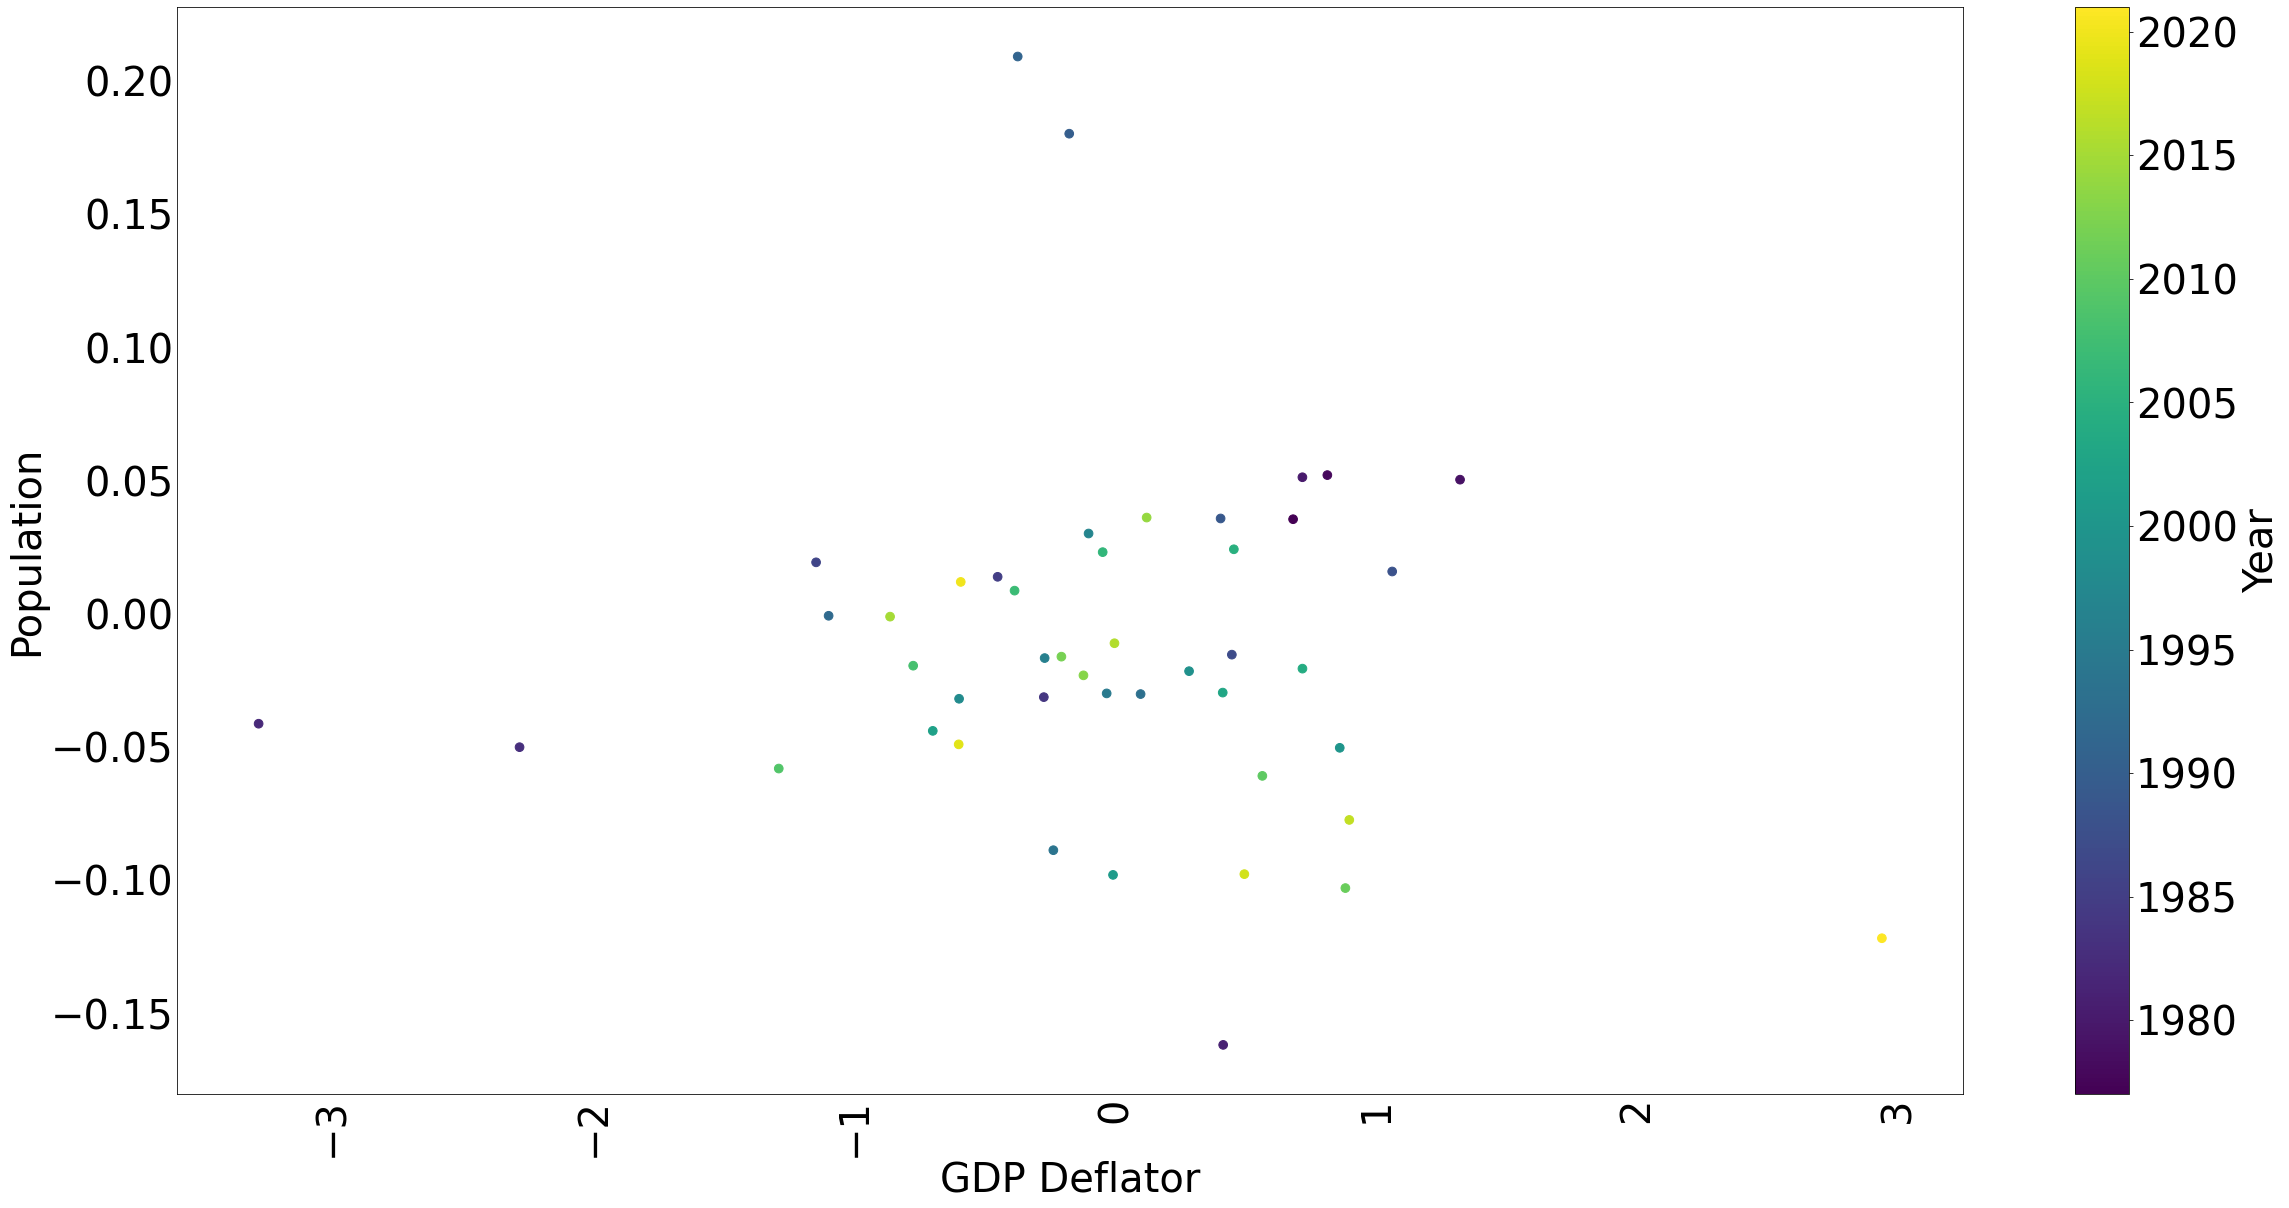

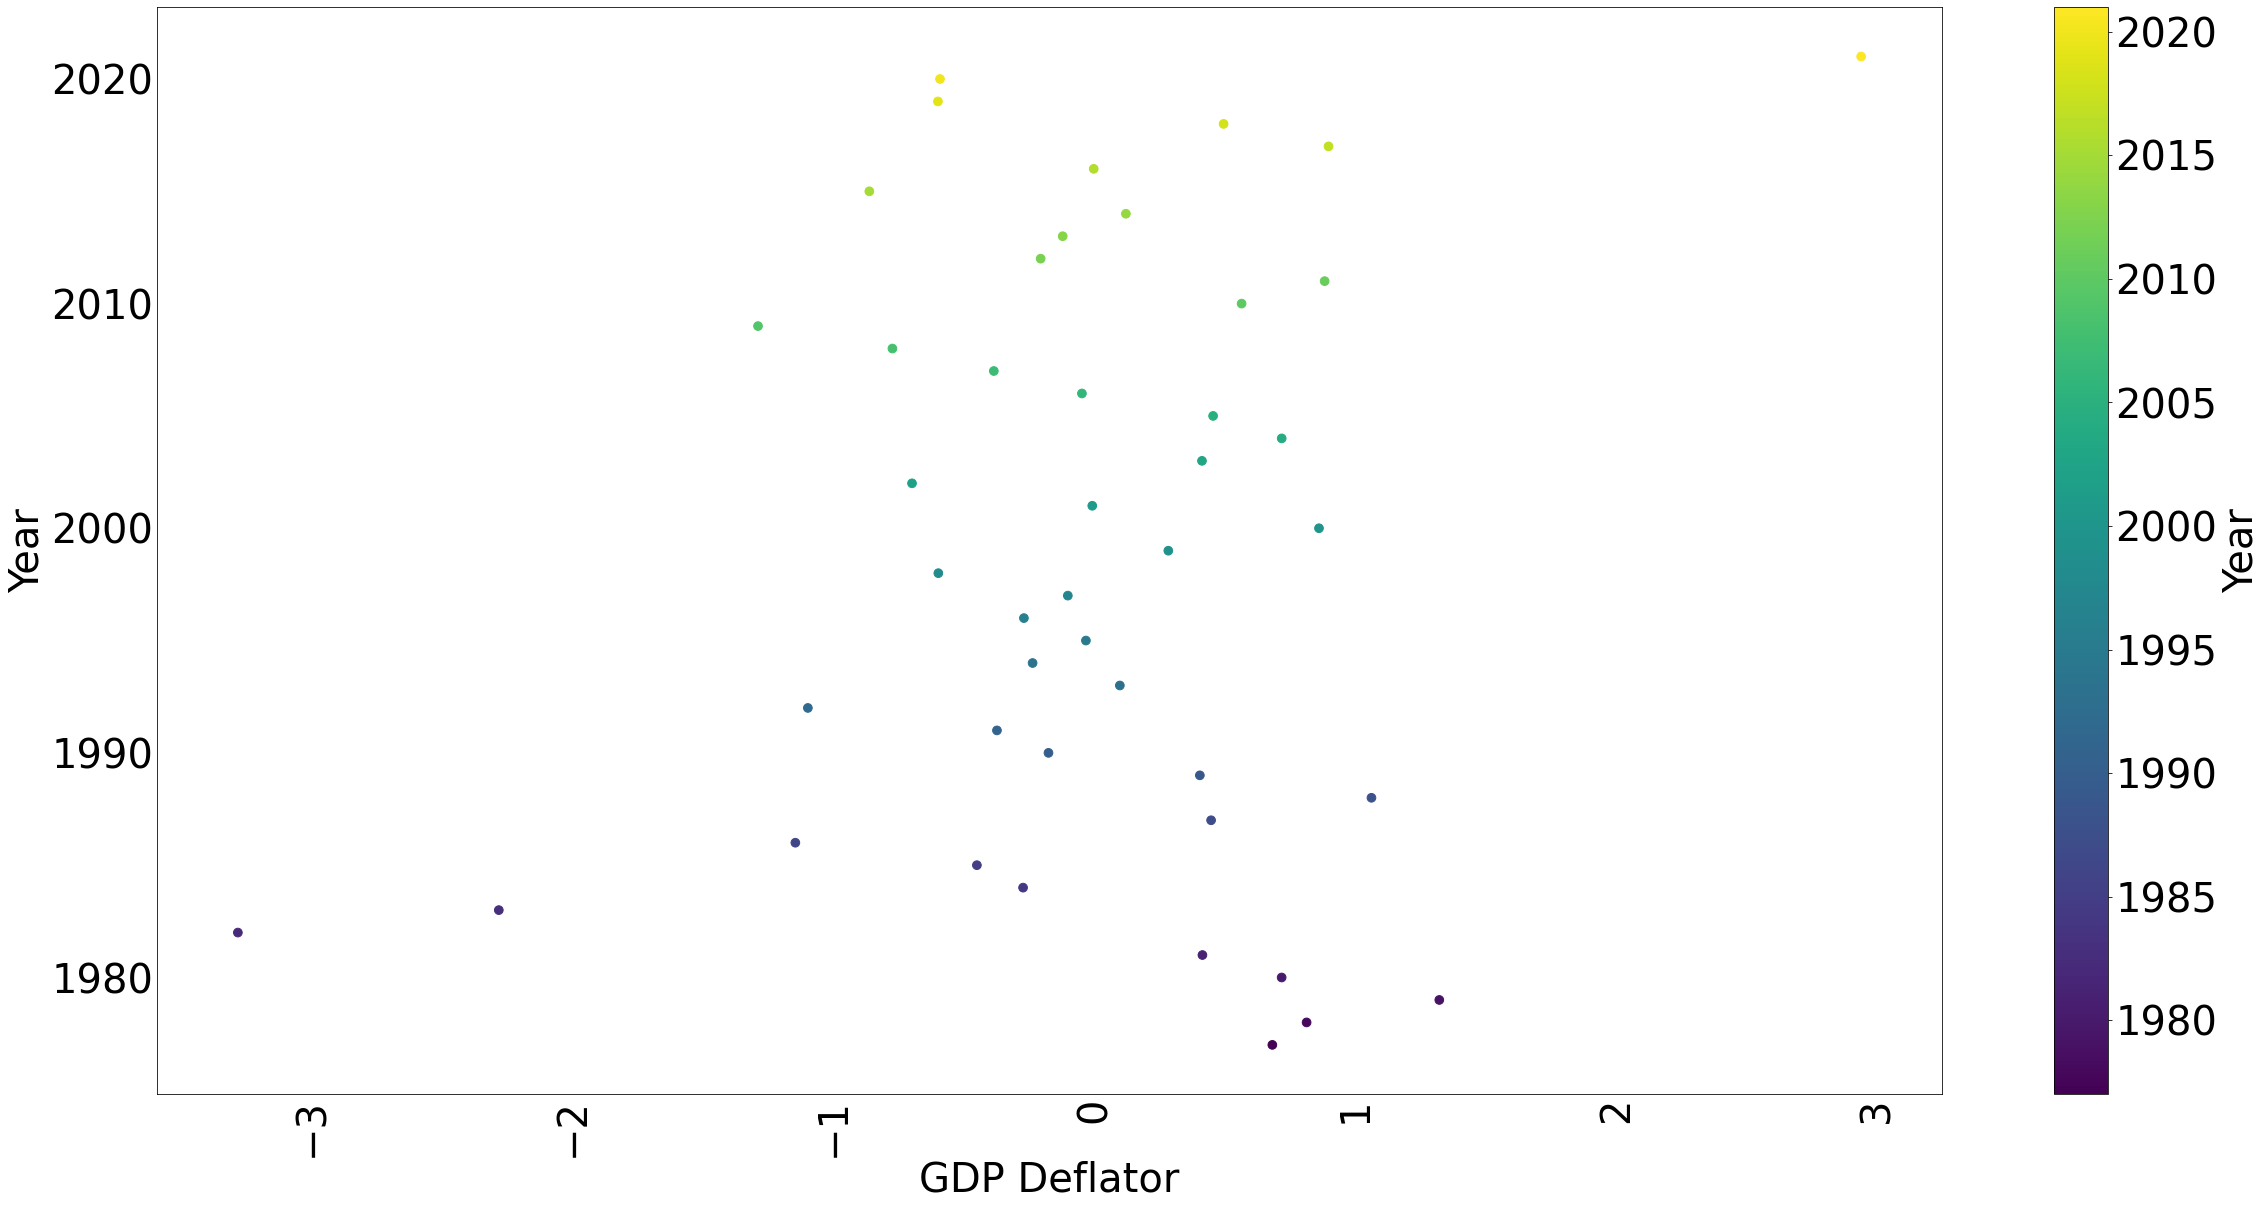

In [11]:
plot_scatter(data.pct_change().mul(100).diff())